# Classification
### Step 1: resize/crop images
Requires having run: `beescrape.py`
Depends on yolov5 and `shutil`

In [2]:
import os
from os import listdir
from shutil import copyfile
import shutil
from PIL import Image
import skimage
import random
import numpy as np

# Directories
DATA_DIR = '/home/wilber/Documents/RESEARCH/research/beespotter'
OUT_DIR = '/m2docs/res/data'
CROPPED_PATH = '/m2docs/res/cropped_imgs'
cropped_files = listdir(CROPPED_PATH)

%rm -R /m2docs/res/data/*

# Args:
VAL_SIZE = 256
TEST_SIZE = 64
preprocess = True
resize = True
size = (512, 512)

# Species with >= 1000 images:
classes = ['Apis_mellifera','Bombus_impatiens','Bombus_auricomus','Bombus_bimaculatus','Bombus_griseocollis']

# from https://gist.github.com/Prasad9/28f6a2df8e8d463c6ddd040f4f6a028a
noise_modes = [None,'salt','pepper','s&p']
NOISE_AMOUNT = .01 # default amount
def add_noise(img, mode, noise_amount = .03):
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode = mode, amount = random.uniform(0,noise_amount))
        return gimg
    else:
        print("oops, you shouldn't see this")

total_skipped = 0
for label in classes:  # for each type of bee
    skipnum = 0
    classID = classes.index(label)
    
    input_path = os.path.join(DATA_DIR, label)
    im_list = os.listdir(input_path)
    random.shuffle(im_list)
    
    # Attempt to create directories:
    if not os.path.exists(OUT_DIR + '/train/' + label):
        os.makedirs(OUT_DIR + '/train/' + label)
    if not os.path.exists(OUT_DIR + '/test/' + label):
        os.makedirs(OUT_DIR + '/test/' + label)
    if not os.path.exists(OUT_DIR + '/valid/' + label):
        os.makedirs(OUT_DIR + '/valid/' + label)
        
    train_path = os.path.join(OUT_DIR,'train/'+ label + '/')
    test_path  = os.path.join(OUT_DIR,'test/' + label + '/')
    valid_path = os.path.join(OUT_DIR,'valid/' + label + '/')
    
    index = 0
    for img in im_list:
        if img in cropped_files:
            pic = Image.open(os.path.join(CROPPED_PATH,img))
            
            if resize: #resize image
                out = pic.resize(size)
            else:
                out = pic
            
            if index < VAL_SIZE:
                out.save(os.path.join(valid_path,img))
            elif index < VAL_SIZE + TEST_SIZE:
                out.save(os.path.join(test_path,img))
            else:    #training set, rotate
                out.save(os.path.join(train_path,img.replace('.jpg','-0.jpg')))
                if preprocess:
                    for rot,mode,ext in zip([random.randint(0,359),random.randint(0,359),random.randint(0,359)],[random.choice(noise_modes),random.choice(noise_modes),random.choice(noise_modes)],[1,2,3]):
                        print(' ',img,rot,mode,ext,pic.mode)
                        if mode is not None:
                            Image.fromarray((add_noise(np.array(out.rotate(rot)),mode,NOISE_AMOUNT)*255).astype(np.uint8),pic.mode).save(os.path.join(train_path,img.replace('.jpg','-'+str(ext)+'.jpg')))
                        else:
                            out.rotate(rot).save(os.path.join(train_path,img.replace('.jpg','-'+str(ext)+'.jpg')))
                        
                
        else:
            skipnum += 1
            index -= 1
            pass
        index += 1
    print(label, "skipped", skipnum)
    print(label, "total", index)
    
    total_skipped += skipnum
    
print("Images moved and rotated. Skipped ", total_skipped)

  7259-1.jpg 12 pepper 1 RGB
  7259-1.jpg 284 pepper 2 RGB
  7259-1.jpg 137 None 3 RGB
  8304-1.jpg 127 salt 1 RGB
  8304-1.jpg 291 pepper 2 RGB
  8304-1.jpg 68 s&p 3 RGB
  2434-1.jpg 330 s&p 1 RGB
  2434-1.jpg 77 salt 2 RGB
  2434-1.jpg 22 s&p 3 RGB
  6522-15.jpg 329 pepper 1 RGB
  6522-15.jpg 187 s&p 2 RGB
  6522-15.jpg 27 s&p 3 RGB
  5624-1.jpg 223 salt 1 RGB
  5624-1.jpg 321 pepper 2 RGB
  5624-1.jpg 275 pepper 3 RGB
  2981-1.jpg 66 salt 1 RGB
  2981-1.jpg 182 salt 2 RGB
  2981-1.jpg 76 salt 3 RGB
  1231-1.jpg 300 None 1 RGB
  1231-1.jpg 207 None 2 RGB
  1231-1.jpg 190 salt 3 RGB
  8136-1.jpg 1 pepper 1 RGB
  8136-1.jpg 317 None 2 RGB
  8136-1.jpg 110 s&p 3 RGB
  6516-1.jpg 6 None 1 RGB
  6516-1.jpg 207 pepper 2 RGB
  6516-1.jpg 359 s&p 3 RGB
  6521-1.jpg 9 pepper 1 RGB
  6521-1.jpg 357 None 2 RGB
  6521-1.jpg 49 pepper 3 RGB
  8108-1.jpg 27 salt 1 RGB
  8108-1.jpg 229 salt 2 RGB
  8108-1.jpg 138 pepper 3 RGB
  8305-1.jpg 252 pepper 1 RGB
  8305-1.jpg 47 pepper 2 RGB
  8305-1.jpg 2

  6524-20.jpg 103 pepper 1 RGB
  6524-20.jpg 191 pepper 2 RGB
  6524-20.jpg 194 salt 3 RGB
  2032-1.jpg 279 s&p 1 RGB
  2032-1.jpg 31 salt 2 RGB
  2032-1.jpg 51 pepper 3 RGB
  5775-4.jpg 146 None 1 RGB
  5775-4.jpg 240 None 2 RGB
  5775-4.jpg 196 s&p 3 RGB
  5789-1.jpg 83 pepper 1 RGB
  5789-1.jpg 120 salt 2 RGB
  5789-1.jpg 33 pepper 3 RGB
  2643-3.jpg 96 salt 1 RGB
  2643-3.jpg 72 salt 2 RGB
  2643-3.jpg 286 s&p 3 RGB
  1105-1.jpg 257 None 1 RGB
  1105-1.jpg 245 None 2 RGB
  1105-1.jpg 174 pepper 3 RGB
  7965-1.jpg 45 None 1 RGB
  7965-1.jpg 288 salt 2 RGB
  7965-1.jpg 103 s&p 3 RGB
  7629-2.jpg 153 salt 1 RGB
  7629-2.jpg 96 s&p 2 RGB
  7629-2.jpg 188 salt 3 RGB
  5165-1.jpg 90 s&p 1 RGB
  5165-1.jpg 103 None 2 RGB
  5165-1.jpg 127 None 3 RGB
  4895-2.jpg 252 s&p 1 RGB
  4895-2.jpg 128 pepper 2 RGB
  4895-2.jpg 167 s&p 3 RGB
  2316-1.jpg 228 s&p 1 RGB
  2316-1.jpg 64 s&p 2 RGB
  2316-1.jpg 40 pepper 3 RGB
  2379-2.jpg 240 None 1 RGB
  2379-2.jpg 242 salt 2 RGB
  2379-2.jpg 206 peppe

  1208-2.jpg 185 s&p 3 RGB
  8278-1.jpg 49 pepper 1 RGB
  8278-1.jpg 190 pepper 2 RGB
  8278-1.jpg 136 pepper 3 RGB
  7857-2.jpg 149 None 1 RGB
  7857-2.jpg 337 pepper 2 RGB
  7857-2.jpg 113 s&p 3 RGB
  4566-1.jpg 341 None 1 RGB
  4566-1.jpg 230 pepper 2 RGB
  4566-1.jpg 225 salt 3 RGB
  3851-1.jpg 186 salt 1 RGB
  3851-1.jpg 228 salt 2 RGB
  3851-1.jpg 336 pepper 3 RGB
  560-1.jpg 149 pepper 1 RGB
  560-1.jpg 196 s&p 2 RGB
  560-1.jpg 287 salt 3 RGB
  9437-2.jpg 52 pepper 1 RGB
  9437-2.jpg 179 pepper 2 RGB
  9437-2.jpg 50 pepper 3 RGB
  5136-3.jpg 193 pepper 1 RGB
  5136-3.jpg 353 None 2 RGB
  5136-3.jpg 356 s&p 3 RGB
  6202-1.jpg 223 pepper 1 RGB
  6202-1.jpg 24 None 2 RGB
  6202-1.jpg 76 pepper 3 RGB
  6521-5.jpg 154 None 1 RGB
  6521-5.jpg 88 pepper 2 RGB
  6521-5.jpg 181 s&p 3 RGB
  5742-1.jpg 248 salt 1 RGB
  5742-1.jpg 304 s&p 2 RGB
  5742-1.jpg 203 s&p 3 RGB
  4031-1.jpg 8 s&p 1 RGB
  4031-1.jpg 205 None 2 RGB
  4031-1.jpg 263 pepper 3 RGB
  5780-2.jpg 96 None 1 RGB
  5780-2.j

  7867-1.jpg 352 None 1 RGB
  7867-1.jpg 272 s&p 2 RGB
  7867-1.jpg 301 pepper 3 RGB
  6334-3.jpg 195 None 1 RGB
  6334-3.jpg 77 pepper 2 RGB
  6334-3.jpg 243 None 3 RGB
  5704-17.jpg 148 s&p 1 RGB
  5704-17.jpg 17 pepper 2 RGB
  5704-17.jpg 83 salt 3 RGB
  4609-1.jpg 146 salt 1 RGB
  4609-1.jpg 15 None 2 RGB
  4609-1.jpg 108 s&p 3 RGB
  6280-1.jpg 252 s&p 1 RGB
  6280-1.jpg 283 pepper 2 RGB
  6280-1.jpg 251 pepper 3 RGB
  1796-1.jpg 350 s&p 1 RGB
  1796-1.jpg 267 s&p 2 RGB
  1796-1.jpg 1 None 3 RGB
  8093-1.jpg 356 s&p 1 RGB
  8093-1.jpg 80 None 2 RGB
  8093-1.jpg 309 salt 3 RGB
  5998-2.jpg 244 salt 1 RGB
  5998-2.jpg 221 salt 2 RGB
  5998-2.jpg 309 s&p 3 RGB
  2983-2.jpg 358 pepper 1 RGB
  2983-2.jpg 199 pepper 2 RGB
  2983-2.jpg 39 None 3 RGB
  2850-1.jpg 308 pepper 1 RGB
  2850-1.jpg 129 salt 2 RGB
  2850-1.jpg 31 None 3 RGB
  5136-18.jpg 326 salt 1 RGB
  5136-18.jpg 232 s&p 2 RGB
  5136-18.jpg 341 None 3 RGB
  5562-1.jpg 64 s&p 1 RGB
  5562-1.jpg 131 pepper 2 RGB
  5562-1.jpg 203

  7917-1.jpg 99 salt 2 RGB
  7917-1.jpg 344 s&p 3 RGB
  5968-3.jpg 270 salt 1 RGB
  5968-3.jpg 124 pepper 2 RGB
  5968-3.jpg 22 pepper 3 RGB
  6598-2.jpg 163 salt 1 RGB
  6598-2.jpg 202 s&p 2 RGB
  6598-2.jpg 167 pepper 3 RGB
  8795-3.jpg 297 salt 1 RGB
  8795-3.jpg 184 salt 2 RGB
  8795-3.jpg 330 salt 3 RGB
  7092-1.jpg 133 salt 1 RGB
  7092-1.jpg 307 s&p 2 RGB
  7092-1.jpg 259 pepper 3 RGB
  4519-1.jpg 325 pepper 1 RGB
  4519-1.jpg 113 pepper 2 RGB
  4519-1.jpg 80 None 3 RGB
  7905-1.jpg 86 s&p 1 RGB
  7905-1.jpg 232 s&p 2 RGB
  7905-1.jpg 95 None 3 RGB
  7894-3.jpg 47 s&p 1 RGB
  7894-3.jpg 259 pepper 2 RGB
  7894-3.jpg 353 pepper 3 RGB
  5704-37.jpg 174 None 1 RGB
  5704-37.jpg 44 None 2 RGB
  5704-37.jpg 242 None 3 RGB
  4162-2.jpg 289 pepper 1 RGB
  4162-2.jpg 326 s&p 2 RGB
  4162-2.jpg 60 None 3 RGB
  8078-2.jpg 27 s&p 1 RGB
  8078-2.jpg 299 pepper 2 RGB
  8078-2.jpg 226 None 3 RGB
  2102-2.jpg 146 None 1 RGB
  2102-2.jpg 111 None 2 RGB
  2102-2.jpg 28 pepper 3 RGB
  7136-2.jpg 

  532-1.jpg 359 s&p 2 RGB
  532-1.jpg 313 s&p 3 RGB
  1634-1.jpg 278 None 1 RGB
  1634-1.jpg 333 s&p 2 RGB
  1634-1.jpg 114 s&p 3 RGB
  7268-2.jpg 204 s&p 1 RGB
  7268-2.jpg 237 None 2 RGB
  7268-2.jpg 262 salt 3 RGB
  4187-1.jpg 112 pepper 1 RGB
  4187-1.jpg 319 pepper 2 RGB
  4187-1.jpg 16 pepper 3 RGB
  388-1.jpg 64 None 1 RGB
  388-1.jpg 177 s&p 2 RGB
  388-1.jpg 8 pepper 3 RGB
  5648-1.jpg 129 salt 1 RGB
  5648-1.jpg 38 pepper 2 RGB
  5648-1.jpg 23 salt 3 RGB
  7863-3.jpg 173 pepper 1 RGB
  7863-3.jpg 82 salt 2 RGB
  7863-3.jpg 1 pepper 3 RGB
  2643-4.jpg 130 salt 1 RGB
  2643-4.jpg 129 pepper 2 RGB
  2643-4.jpg 165 salt 3 RGB
  7361-4.jpg 311 pepper 1 RGB
  7361-4.jpg 169 None 2 RGB
  7361-4.jpg 235 pepper 3 RGB
  128-1.jpg 204 salt 1 RGB
  128-1.jpg 226 salt 2 RGB
  128-1.jpg 231 salt 3 RGB
  6516-7.jpg 209 pepper 1 RGB
  6516-7.jpg 229 None 2 RGB
  6516-7.jpg 250 pepper 3 RGB
  2487-1.jpg 165 salt 1 RGB
  2487-1.jpg 164 s&p 2 RGB
  2487-1.jpg 0 salt 3 RGB
  9433-3.jpg 167 peppe

  6280-3.jpg 216 salt 1 RGB
  6280-3.jpg 320 None 2 RGB
  6280-3.jpg 236 salt 3 RGB
  4027-2.jpg 174 None 1 RGB
  4027-2.jpg 104 s&p 2 RGB
  4027-2.jpg 145 s&p 3 RGB
  8150-1.jpg 337 s&p 1 RGB
  8150-1.jpg 22 s&p 2 RGB
  8150-1.jpg 173 pepper 3 RGB
  8086-1.jpg 310 None 1 RGB
  8086-1.jpg 177 None 2 RGB
  8086-1.jpg 253 s&p 3 RGB
  4073-1.jpg 72 salt 1 RGB
  4073-1.jpg 238 pepper 2 RGB
  4073-1.jpg 170 pepper 3 RGB
  6525-11.jpg 159 s&p 1 RGB
  6525-11.jpg 75 s&p 2 RGB
  6525-11.jpg 33 pepper 3 RGB
  8695-1.jpg 252 salt 1 RGB
  8695-1.jpg 178 salt 2 RGB
  8695-1.jpg 138 None 3 RGB
  8245-4.jpg 212 salt 1 RGB
  8245-4.jpg 83 salt 2 RGB
  8245-4.jpg 313 salt 3 RGB
  7991-2.jpg 221 s&p 1 RGB
  7991-2.jpg 298 pepper 2 RGB
  7991-2.jpg 231 s&p 3 RGB
  5324-3.jpg 158 pepper 1 RGB
  5324-3.jpg 301 s&p 2 RGB
  5324-3.jpg 82 s&p 3 RGB
  5995-3.jpg 19 s&p 1 RGB
  5995-3.jpg 109 pepper 2 RGB
  5995-3.jpg 340 None 3 RGB
  7573-3.jpg 123 s&p 1 RGB
  7573-3.jpg 191 pepper 2 RGB
  7573-3.jpg 124 s&p 

  1699-1.jpg 100 salt 1 RGB
  1699-1.jpg 273 None 2 RGB
  1699-1.jpg 136 None 3 RGB
  8626-3.jpg 293 None 1 RGB
  8626-3.jpg 129 pepper 2 RGB
  8626-3.jpg 135 None 3 RGB
  6522-5.jpg 240 salt 1 RGB
  6522-5.jpg 251 salt 2 RGB
  6522-5.jpg 151 pepper 3 RGB
  5059-3.jpg 1 s&p 1 RGB
  5059-3.jpg 17 salt 2 RGB
  5059-3.jpg 182 pepper 3 RGB
  3066-1.jpg 223 None 1 RGB
  3066-1.jpg 143 pepper 2 RGB
  3066-1.jpg 125 pepper 3 RGB
  4383-1.jpg 97 s&p 1 RGB
  4383-1.jpg 341 salt 2 RGB
  4383-1.jpg 294 salt 3 RGB
  4459-1.jpg 231 pepper 1 RGB
  4459-1.jpg 27 pepper 2 RGB
  4459-1.jpg 321 salt 3 RGB
  5116-4.jpg 4 None 1 RGB
  5116-4.jpg 69 s&p 2 RGB
  5116-4.jpg 205 pepper 3 RGB
  4592-1.jpg 212 pepper 1 RGB
  4592-1.jpg 107 s&p 2 RGB
  4592-1.jpg 65 s&p 3 RGB
  8110-1.jpg 209 s&p 1 RGB
  8110-1.jpg 255 pepper 2 RGB
  8110-1.jpg 192 None 3 RGB
  5704-21.jpg 102 None 1 RGB
  5704-21.jpg 243 salt 2 RGB
  5704-21.jpg 296 s&p 3 RGB
  1953-3.jpg 122 None 1 RGB
  1953-3.jpg 154 salt 2 RGB
  1953-3.jpg 

  5569-1.jpg 320 s&p 1 RGB
  5569-1.jpg 84 pepper 2 RGB
  5569-1.jpg 107 salt 3 RGB
  4266-2.jpg 245 s&p 1 RGB
  4266-2.jpg 241 pepper 2 RGB
  4266-2.jpg 167 pepper 3 RGB
  4866-1.jpg 301 salt 1 RGB
  4866-1.jpg 169 s&p 2 RGB
  4866-1.jpg 90 salt 3 RGB
  7905-2.jpg 244 s&p 1 RGB
  7905-2.jpg 297 s&p 2 RGB
  7905-2.jpg 208 salt 3 RGB
  7896-1.jpg 60 s&p 1 RGB
  7896-1.jpg 152 pepper 2 RGB
  7896-1.jpg 294 None 3 RGB
  5136-5.jpg 31 pepper 1 RGB
  5136-5.jpg 270 s&p 2 RGB
  5136-5.jpg 141 s&p 3 RGB
  4221-1.jpg 184 salt 1 RGB
  4221-1.jpg 208 s&p 2 RGB
  4221-1.jpg 214 s&p 3 RGB
  5893-1.jpg 233 s&p 1 RGB
  5893-1.jpg 155 None 2 RGB
  5893-1.jpg 167 pepper 3 RGB
  6516-4.jpg 218 None 1 RGB
  6516-4.jpg 290 pepper 2 RGB
  6516-4.jpg 184 pepper 3 RGB
  3644-1.jpg 114 salt 1 RGB
  3644-1.jpg 316 s&p 2 RGB
  3644-1.jpg 100 None 3 RGB
  6499-4.jpg 245 salt 1 RGB
  6499-4.jpg 245 pepper 2 RGB
  6499-4.jpg 147 s&p 3 RGB
  1608-1.jpg 204 None 1 RGB
  1608-1.jpg 110 s&p 2 RGB
  1608-1.jpg 19 salt

  7970-1.jpg 177 pepper 2 RGB
  7970-1.jpg 323 pepper 3 RGB
  5121-2.jpg 196 s&p 1 RGB
  5121-2.jpg 133 salt 2 RGB
  5121-2.jpg 111 salt 3 RGB
  3136-1.jpg 47 salt 1 RGB
  3136-1.jpg 135 pepper 2 RGB
  3136-1.jpg 355 salt 3 RGB
  2862-1.jpg 66 salt 1 RGB
  2862-1.jpg 43 pepper 2 RGB
  2862-1.jpg 173 s&p 3 RGB
  6000-3.jpg 114 pepper 1 RGB
  6000-3.jpg 234 pepper 2 RGB
  6000-3.jpg 136 s&p 3 RGB
  6525-5.jpg 32 salt 1 RGB
  6525-5.jpg 170 None 2 RGB
  6525-5.jpg 189 salt 3 RGB
  5100-1.jpg 307 None 1 RGB
  5100-1.jpg 347 None 2 RGB
  5100-1.jpg 53 salt 3 RGB
  1820-4.jpg 242 pepper 1 RGB
  1820-4.jpg 212 salt 2 RGB
  1820-4.jpg 178 s&p 3 RGB
Apis_mellifera skipped 1540
Apis_mellifera total 1217
  9557-6.jpg 159 s&p 1 RGB
  9557-6.jpg 2 salt 2 RGB
  9557-6.jpg 39 salt 3 RGB
  6081-2.jpg 25 None 1 RGB
  6081-2.jpg 295 pepper 2 RGB
  6081-2.jpg 326 None 3 RGB
  9443-1.jpg 328 salt 1 RGB
  9443-1.jpg 189 salt 2 RGB
  9443-1.jpg 174 salt 3 RGB
  8842-1.jpg 193 None 1 RGB
  8842-1.jpg 248 s&p

  9499-3.jpg 48 pepper 3 RGB
  5683-2.jpg 82 salt 1 RGB
  5683-2.jpg 143 s&p 2 RGB
  5683-2.jpg 56 s&p 3 RGB
  5133-1.jpg 332 None 1 RGB
  5133-1.jpg 78 s&p 2 RGB
  5133-1.jpg 243 salt 3 RGB
  7967-1.jpg 69 pepper 1 RGB
  7967-1.jpg 251 s&p 2 RGB
  7967-1.jpg 252 None 3 RGB
  6118-1.jpg 52 pepper 1 RGB
  6118-1.jpg 331 None 2 RGB
  6118-1.jpg 31 s&p 3 RGB
  8289-1.jpg 85 salt 1 RGB
  8289-1.jpg 46 salt 2 RGB
  8289-1.jpg 179 None 3 RGB
  6966-3.jpg 274 None 1 RGB
  6966-3.jpg 208 None 2 RGB
  6966-3.jpg 328 salt 3 RGB
  7946-3.jpg 309 pepper 1 RGB
  7946-3.jpg 5 salt 2 RGB
  7946-3.jpg 252 s&p 3 RGB
  5443-1.jpg 139 pepper 1 RGB
  5443-1.jpg 106 pepper 2 RGB
  5443-1.jpg 216 pepper 3 RGB
  1581-3.jpg 338 salt 1 RGB
  1581-3.jpg 103 pepper 2 RGB
  1581-3.jpg 261 salt 3 RGB
  3248-1.jpg 122 None 1 RGB
  3248-1.jpg 235 None 2 RGB
  3248-1.jpg 157 pepper 3 RGB
  8200-2.jpg 91 None 1 RGB
  8200-2.jpg 35 s&p 2 RGB
  8200-2.jpg 99 salt 3 RGB
  4405-2.jpg 117 salt 1 RGB
  4405-2.jpg 132 s&p 2 

  6691-1.jpg 114 None 2 RGB
  6691-1.jpg 26 None 3 RGB
  8647-2.jpg 243 None 1 RGB
  8647-2.jpg 11 s&p 2 RGB
  8647-2.jpg 181 salt 3 RGB
  4597-1.jpg 206 salt 1 RGB
  4597-1.jpg 119 None 2 RGB
  4597-1.jpg 220 None 3 RGB
  4743-2.jpg 283 salt 1 RGB
  4743-2.jpg 289 s&p 2 RGB
  4743-2.jpg 327 pepper 3 RGB
  8000-1.jpg 139 s&p 1 RGB
  8000-1.jpg 191 pepper 2 RGB
  8000-1.jpg 31 s&p 3 RGB
  1773-3.jpg 64 pepper 1 RGB
  1773-3.jpg 345 salt 2 RGB
  1773-3.jpg 53 pepper 3 RGB
  2887-2.jpg 46 s&p 1 RGB
  2887-2.jpg 259 salt 2 RGB
  2887-2.jpg 192 salt 3 RGB
  6078-1.jpg 182 salt 1 RGB
  6078-1.jpg 155 salt 2 RGB
  6078-1.jpg 321 salt 3 RGB
  8755-2.jpg 66 s&p 1 RGB
  8755-2.jpg 143 None 2 RGB
  8755-2.jpg 7 None 3 RGB
  6400-3.jpg 204 salt 1 RGB
  6400-3.jpg 232 s&p 2 RGB
  6400-3.jpg 129 pepper 3 RGB
  9583-3.jpg 281 None 1 RGB
  9583-3.jpg 207 s&p 2 RGB
  9583-3.jpg 294 pepper 3 RGB
  9562-3.jpg 188 salt 1 RGB
  9562-3.jpg 150 s&p 2 RGB
  9562-3.jpg 18 s&p 3 RGB
  6276-2.jpg 71 s&p 1 RGB
  

  9440-2.jpg 133 pepper 1 RGB
  9440-2.jpg 263 None 2 RGB
  9440-2.jpg 358 salt 3 RGB
  4276-1.jpg 9 pepper 1 RGB
  4276-1.jpg 160 salt 2 RGB
  4276-1.jpg 355 s&p 3 RGB
  6493-2.jpg 91 None 1 RGB
  6493-2.jpg 68 salt 2 RGB
  6493-2.jpg 152 pepper 3 RGB
  8437-1.jpg 122 salt 1 RGB
  8437-1.jpg 176 s&p 2 RGB
  8437-1.jpg 138 pepper 3 RGB
  6777-4.jpg 192 pepper 1 RGB
  6777-4.jpg 291 None 2 RGB
  6777-4.jpg 60 pepper 3 RGB
  3827-1.jpg 99 pepper 1 RGB
  3827-1.jpg 275 None 2 RGB
  3827-1.jpg 347 salt 3 RGB
  3245-4.jpg 119 s&p 1 RGB
  3245-4.jpg 272 salt 2 RGB
  3245-4.jpg 66 None 3 RGB
  9219-1.jpg 255 pepper 1 RGB
  9219-1.jpg 343 None 2 RGB
  9219-1.jpg 242 s&p 3 RGB
  4210-2.jpg 257 None 1 RGB
  4210-2.jpg 91 s&p 2 RGB
  4210-2.jpg 281 salt 3 RGB
  6951-2.jpg 197 None 1 RGB
  6951-2.jpg 250 s&p 2 RGB
  6951-2.jpg 29 None 3 RGB
  6978-2.jpg 127 None 1 RGB
  6978-2.jpg 230 s&p 2 RGB
  6978-2.jpg 2 pepper 3 RGB
  7841-2.jpg 256 None 1 RGB
  7841-2.jpg 357 None 2 RGB
  7841-2.jpg 168 sal

  9202-1.jpg 19 salt 2 RGB
  9202-1.jpg 272 pepper 3 RGB
  3954-2.jpg 227 s&p 1 RGB
  3954-2.jpg 26 pepper 2 RGB
  3954-2.jpg 120 salt 3 RGB
  6239-6.jpg 6 salt 1 RGB
  6239-6.jpg 331 None 2 RGB
  6239-6.jpg 126 None 3 RGB
  4624-1.jpg 127 None 1 RGB
  4624-1.jpg 254 pepper 2 RGB
  4624-1.jpg 110 s&p 3 RGB
  339-3.jpg 259 salt 1 RGB
  339-3.jpg 305 s&p 2 RGB
  339-3.jpg 237 pepper 3 RGB
  5582-1.jpg 113 s&p 1 RGB
  5582-1.jpg 155 pepper 2 RGB
  5582-1.jpg 204 None 3 RGB
  3016-2.jpg 61 s&p 1 RGB
  3016-2.jpg 164 None 2 RGB
  3016-2.jpg 148 None 3 RGB
  6138-1.jpg 325 s&p 1 RGB
  6138-1.jpg 168 salt 2 RGB
  6138-1.jpg 239 pepper 3 RGB
  3271-4.jpg 325 s&p 1 RGB
  3271-4.jpg 67 pepper 2 RGB
  3271-4.jpg 194 pepper 3 RGB
  1897-3.jpg 145 salt 1 RGB
  1897-3.jpg 219 pepper 2 RGB
  1897-3.jpg 51 None 3 RGB
  85-3.jpg 24 pepper 1 RGB
  85-3.jpg 29 s&p 2 RGB
  85-3.jpg 180 None 3 RGB
  2711-1.jpg 219 salt 1 RGB
  2711-1.jpg 104 salt 2 RGB
  2711-1.jpg 45 s&p 3 RGB
  7297-1.jpg 143 salt 1 RGB


  7836-1.jpg 198 salt 3 RGB
  7986-1.jpg 186 pepper 1 RGB
  7986-1.jpg 284 salt 2 RGB
  7986-1.jpg 226 s&p 3 RGB
  2415-1.jpg 108 None 1 RGB
  2415-1.jpg 18 pepper 2 RGB
  2415-1.jpg 292 s&p 3 RGB
  3928-2.jpg 164 s&p 1 RGB
  3928-2.jpg 51 s&p 2 RGB
  3928-2.jpg 100 s&p 3 RGB
  759-1.jpg 89 pepper 1 RGB
  759-1.jpg 52 s&p 2 RGB
  759-1.jpg 208 salt 3 RGB
  7854-3.jpg 123 pepper 1 RGB
  7854-3.jpg 12 salt 2 RGB
  7854-3.jpg 32 None 3 RGB
  466-1.jpg 33 pepper 1 RGB
  466-1.jpg 139 salt 2 RGB
  466-1.jpg 265 s&p 3 RGB
  6505-2.jpg 261 salt 1 RGB
  6505-2.jpg 93 pepper 2 RGB
  6505-2.jpg 217 s&p 3 RGB
  8766-1.jpg 98 pepper 1 RGB
  8766-1.jpg 72 salt 2 RGB
  8766-1.jpg 134 salt 3 RGB
  6963-1.jpg 12 pepper 1 RGB
  6963-1.jpg 22 None 2 RGB
  6963-1.jpg 76 pepper 3 RGB
  5332-3.jpg 199 pepper 1 RGB
  5332-3.jpg 247 pepper 2 RGB
  5332-3.jpg 47 None 3 RGB
  9389-2.jpg 211 s&p 1 RGB
  9389-2.jpg 75 pepper 2 RGB
  9389-2.jpg 76 s&p 3 RGB
  6367-1.jpg 170 s&p 1 RGB
  6367-1.jpg 278 pepper 2 RGB

  5026-1.jpg 73 salt 2 RGB
  5026-1.jpg 61 s&p 3 RGB
  5331-2.jpg 272 salt 1 RGB
  5331-2.jpg 259 None 2 RGB
  5331-2.jpg 185 pepper 3 RGB
  7958-3.jpg 301 salt 1 RGB
  7958-3.jpg 81 pepper 2 RGB
  7958-3.jpg 150 salt 3 RGB
  5319-1.jpg 162 pepper 1 RGB
  5319-1.jpg 20 s&p 2 RGB
  5319-1.jpg 90 salt 3 RGB
  3232-3.jpg 46 s&p 1 RGB
  3232-3.jpg 340 s&p 2 RGB
  3232-3.jpg 283 pepper 3 RGB
  9566-4.jpg 331 None 1 RGB
  9566-4.jpg 205 salt 2 RGB
  9566-4.jpg 78 salt 3 RGB
  9486-2.jpg 357 None 1 RGB
  9486-2.jpg 219 salt 2 RGB
  9486-2.jpg 89 s&p 3 RGB
  1264-2.jpg 152 s&p 1 RGB
  1264-2.jpg 55 s&p 2 RGB
  1264-2.jpg 97 salt 3 RGB
  7846-2.jpg 314 None 1 RGB
  7846-2.jpg 262 None 2 RGB
  7846-2.jpg 212 pepper 3 RGB
  2018-1.jpg 234 s&p 1 RGB
  2018-1.jpg 283 pepper 2 RGB
  2018-1.jpg 154 s&p 3 RGB
  9202-3.jpg 314 salt 1 RGB
  9202-3.jpg 124 s&p 2 RGB
  9202-3.jpg 245 salt 3 RGB
  9506-2.jpg 14 salt 1 RGB
  9506-2.jpg 212 s&p 2 RGB
  9506-2.jpg 296 pepper 3 RGB
  1348-3.jpg 246 s&p 1 RGB
 

  8565-3.jpg 274 salt 3 RGB
  6182-3.jpg 144 pepper 1 RGB
  6182-3.jpg 291 salt 2 RGB
  6182-3.jpg 277 None 3 RGB
  3095-1.jpg 140 None 1 RGB
  3095-1.jpg 264 salt 2 RGB
  3095-1.jpg 128 s&p 3 RGB
  6277-1.jpg 248 pepper 1 RGB
  6277-1.jpg 171 pepper 2 RGB
  6277-1.jpg 49 s&p 3 RGB
  9114-2.jpg 258 pepper 1 RGB
  9114-2.jpg 285 pepper 2 RGB
  9114-2.jpg 225 None 3 RGB
  5525-1.jpg 359 None 1 RGB
  5525-1.jpg 295 None 2 RGB
  5525-1.jpg 316 s&p 3 RGB
  1126-2.jpg 193 None 1 RGB
  1126-2.jpg 85 None 2 RGB
  1126-2.jpg 37 s&p 3 RGB
  6968-3.jpg 2 salt 1 RGB
  6968-3.jpg 263 s&p 2 RGB
  6968-3.jpg 67 s&p 3 RGB
  4878-3.jpg 244 s&p 1 RGB
  4878-3.jpg 42 None 2 RGB
  4878-3.jpg 299 salt 3 RGB
  9534-3.jpg 232 pepper 1 RGB
  9534-3.jpg 221 None 2 RGB
  9534-3.jpg 82 pepper 3 RGB
  777-1.jpg 48 s&p 1 RGB
  777-1.jpg 265 None 2 RGB
  777-1.jpg 233 pepper 3 RGB
  1898-1.jpg 108 s&p 1 RGB
  1898-1.jpg 155 pepper 2 RGB
  1898-1.jpg 317 None 3 RGB
  9452-5.jpg 190 s&p 1 RGB
  9452-5.jpg 214 pepper 

  5319-4.jpg 243 pepper 3 RGB
  8967-1.jpg 209 pepper 1 RGB
  8967-1.jpg 122 salt 2 RGB
  8967-1.jpg 199 None 3 RGB
  9499-1.jpg 329 pepper 1 RGB
  9499-1.jpg 93 None 2 RGB
  9499-1.jpg 147 s&p 3 RGB
  7095-1.jpg 11 salt 1 RGB
  7095-1.jpg 94 salt 2 RGB
  7095-1.jpg 56 s&p 3 RGB
  9050-2.jpg 281 pepper 1 RGB
  9050-2.jpg 92 None 2 RGB
  9050-2.jpg 82 salt 3 RGB
  3823-1.jpg 66 s&p 1 RGB
  3823-1.jpg 338 pepper 2 RGB
  3823-1.jpg 291 salt 3 RGB
  9526-4.jpg 218 s&p 1 RGB
  9526-4.jpg 242 s&p 2 RGB
  9526-4.jpg 333 None 3 RGB
  566-1.jpg 254 pepper 1 RGB
  566-1.jpg 111 s&p 2 RGB
  566-1.jpg 221 pepper 3 RGB
  2853-2.jpg 210 pepper 1 RGB
  2853-2.jpg 0 None 2 RGB
  2853-2.jpg 82 s&p 3 RGB
  7959-3.jpg 207 salt 1 RGB
  7959-3.jpg 207 pepper 2 RGB
  7959-3.jpg 115 pepper 3 RGB
  906-1.jpg 108 s&p 1 RGB
  906-1.jpg 305 None 2 RGB
  906-1.jpg 19 None 3 RGB
  9502-2.jpg 216 s&p 1 RGB
  9502-2.jpg 193 s&p 2 RGB
  9502-2.jpg 284 salt 3 RGB
  1574-1.jpg 170 None 1 RGB
  1574-1.jpg 243 s&p 2 RGB


  4033-1.jpg 236 s&p 2 RGB
  4033-1.jpg 332 salt 3 RGB
  5634-1.jpg 117 None 1 RGB
  5634-1.jpg 306 None 2 RGB
  5634-1.jpg 4 None 3 RGB
  1384-1.jpg 137 salt 1 RGB
  1384-1.jpg 342 None 2 RGB
  1384-1.jpg 149 s&p 3 RGB
  8001-2.jpg 321 s&p 1 RGB
  8001-2.jpg 111 pepper 2 RGB
  8001-2.jpg 131 salt 3 RGB
  2357-1.jpg 26 s&p 1 RGB
  2357-1.jpg 87 pepper 2 RGB
  2357-1.jpg 343 salt 3 RGB
  4587-1.jpg 129 pepper 1 RGB
  4587-1.jpg 323 None 2 RGB
  4587-1.jpg 320 None 3 RGB
  6778-3.jpg 124 salt 1 RGB
  6778-3.jpg 225 pepper 2 RGB
  6778-3.jpg 345 s&p 3 RGB
  8975-1.jpg 55 s&p 1 RGB
  8975-1.jpg 274 salt 2 RGB
  8975-1.jpg 339 s&p 3 RGB
  5450-1.jpg 212 None 1 RGB
  5450-1.jpg 189 salt 2 RGB
  5450-1.jpg 42 None 3 RGB
  5464-1.jpg 214 None 1 RGB
  5464-1.jpg 34 pepper 2 RGB
  5464-1.jpg 13 salt 3 RGB
  2642-3.jpg 266 pepper 1 RGB
  2642-3.jpg 18 s&p 2 RGB
  2642-3.jpg 304 pepper 3 RGB
  9049-2.jpg 232 s&p 1 RGB
  9049-2.jpg 217 None 2 RGB
  9049-2.jpg 151 None 3 RGB
  2642-2.jpg 172 None 1 

  6291-5.jpg 281 None 1 RGB
  6291-5.jpg 10 pepper 2 RGB
  6291-5.jpg 196 pepper 3 RGB
  7581-1.jpg 359 pepper 1 RGB
  7581-1.jpg 165 None 2 RGB
  7581-1.jpg 189 None 3 RGB
  6478-2.jpg 108 salt 1 RGB
  6478-2.jpg 2 pepper 2 RGB
  6478-2.jpg 30 salt 3 RGB
  1891-4.jpg 207 s&p 1 RGB
  1891-4.jpg 64 salt 2 RGB
  1891-4.jpg 144 salt 3 RGB
  8130-2.jpg 72 s&p 1 RGB
  8130-2.jpg 254 None 2 RGB
  8130-2.jpg 175 salt 3 RGB
  9398-3.jpg 245 pepper 1 RGB
  9398-3.jpg 266 None 2 RGB
  9398-3.jpg 225 None 3 RGB
  4916-2.jpg 289 salt 1 RGB
  4916-2.jpg 5 None 2 RGB
  4916-2.jpg 154 salt 3 RGB
  6086-1.jpg 19 salt 1 RGB
  6086-1.jpg 159 pepper 2 RGB
  6086-1.jpg 59 None 3 RGB
  2635-4.jpg 174 salt 1 RGB
  2635-4.jpg 97 s&p 2 RGB
  2635-4.jpg 158 pepper 3 RGB
  2323-2.jpg 7 salt 1 RGB
  2323-2.jpg 247 salt 2 RGB
  2323-2.jpg 109 pepper 3 RGB
  4230-3.jpg 275 s&p 1 RGB
  4230-3.jpg 117 None 2 RGB
  4230-3.jpg 295 salt 3 RGB
  5564-1.jpg 262 None 1 RGB
  5564-1.jpg 104 pepper 2 RGB
  5564-1.jpg 352 pe

  6176-1.jpg 251 salt 3 RGB
  6777-2.jpg 207 s&p 1 RGB
  6777-2.jpg 359 s&p 2 RGB
  6777-2.jpg 251 salt 3 RGB
  3337-1.jpg 61 None 1 RGB
  3337-1.jpg 254 pepper 2 RGB
  3337-1.jpg 96 None 3 RGB
  7985-2.jpg 55 s&p 1 RGB
  7985-2.jpg 141 salt 2 RGB
  7985-2.jpg 18 s&p 3 RGB
  9573-6.jpg 86 salt 1 RGB
  9573-6.jpg 75 None 2 RGB
  9573-6.jpg 358 None 3 RGB
  3287-1.jpg 110 pepper 1 RGB
  3287-1.jpg 291 s&p 2 RGB
  3287-1.jpg 77 s&p 3 RGB
  7815-5.jpg 348 pepper 1 RGB
  7815-5.jpg 298 None 2 RGB
  7815-5.jpg 348 None 3 RGB
  2656-2.jpg 78 None 1 RGB
  2656-2.jpg 89 None 2 RGB
  2656-2.jpg 93 s&p 3 RGB
  4405-1.jpg 228 salt 1 RGB
  4405-1.jpg 352 None 2 RGB
  4405-1.jpg 356 None 3 RGB
  8102-1.jpg 17 None 1 RGB
  8102-1.jpg 318 None 2 RGB
  8102-1.jpg 323 s&p 3 RGB
  9483-2.jpg 306 None 1 RGB
  9483-2.jpg 174 None 2 RGB
  9483-2.jpg 17 s&p 3 RGB
  777-2.jpg 75 salt 1 RGB
  777-2.jpg 92 salt 2 RGB
  777-2.jpg 267 None 3 RGB
  9508-3.jpg 314 None 1 RGB
  9508-3.jpg 139 None 2 RGB
  9508-3.jpg

  7597-1.jpg 334 s&p 3 RGB
  6932-5.jpg 56 salt 1 RGB
  6932-5.jpg 42 salt 2 RGB
  6932-5.jpg 285 s&p 3 RGB
  9221-1.jpg 275 salt 1 RGB
  9221-1.jpg 159 salt 2 RGB
  9221-1.jpg 132 None 3 RGB
  2650-4.jpg 117 pepper 1 RGB
  2650-4.jpg 33 salt 2 RGB
  2650-4.jpg 254 pepper 3 RGB
  5263-2.jpg 180 None 1 RGB
  5263-2.jpg 25 salt 2 RGB
  5263-2.jpg 137 pepper 3 RGB
  7946-2.jpg 65 s&p 1 RGB
  7946-2.jpg 91 salt 2 RGB
  7946-2.jpg 0 s&p 3 RGB
  3242-2.jpg 48 pepper 1 RGB
  3242-2.jpg 129 None 2 RGB
  3242-2.jpg 214 None 3 RGB
  4634-2.jpg 294 s&p 1 RGB
  4634-2.jpg 196 None 2 RGB
  4634-2.jpg 76 None 3 RGB
  183-3.jpg 55 s&p 1 RGB
  183-3.jpg 186 s&p 2 RGB
  183-3.jpg 78 s&p 3 RGB
  3424-3.jpg 129 None 1 RGB
  3424-3.jpg 247 salt 2 RGB
  3424-3.jpg 212 pepper 3 RGB
  5026-2.jpg 15 salt 1 RGB
  5026-2.jpg 240 salt 2 RGB
  5026-2.jpg 138 pepper 3 RGB
  3958-1.jpg 279 pepper 1 RGB
  3958-1.jpg 344 salt 2 RGB
  3958-1.jpg 225 pepper 3 RGB
  7939-2.jpg 166 pepper 1 RGB
  7939-2.jpg 171 salt 2 RG

  9571-3.jpg 18 pepper 3 RGB
  4435-1.jpg 94 salt 1 RGB
  4435-1.jpg 127 s&p 2 RGB
  4435-1.jpg 44 s&p 3 RGB
  7964-4.jpg 331 salt 1 RGB
  7964-4.jpg 210 None 2 RGB
  7964-4.jpg 213 s&p 3 RGB
  5247-2.jpg 103 pepper 1 RGB
  5247-2.jpg 292 pepper 2 RGB
  5247-2.jpg 5 None 3 RGB
  7972-2.jpg 10 s&p 1 RGB
  7972-2.jpg 52 None 2 RGB
  7972-2.jpg 131 None 3 RGB
  3275-3.jpg 228 None 1 RGB
  3275-3.jpg 247 salt 2 RGB
  3275-3.jpg 195 s&p 3 RGB
  6676-2.jpg 20 salt 1 RGB
  6676-2.jpg 171 s&p 2 RGB
  6676-2.jpg 283 None 3 RGB
  2948-3.jpg 22 pepper 1 RGB
  2948-3.jpg 135 pepper 2 RGB
  2948-3.jpg 140 s&p 3 RGB
  6196-2.jpg 59 s&p 1 RGB
  6196-2.jpg 268 s&p 2 RGB
  6196-2.jpg 153 s&p 3 RGB
  5024-2.jpg 140 pepper 1 RGB
  5024-2.jpg 90 salt 2 RGB
  5024-2.jpg 11 pepper 3 RGB
  4454-4.jpg 200 pepper 1 RGB
  4454-4.jpg 358 None 2 RGB
  4454-4.jpg 274 salt 3 RGB
  8598-1.jpg 223 s&p 1 RGB
  8598-1.jpg 254 pepper 2 RGB
  8598-1.jpg 67 None 3 RGB
  3642-2.jpg 233 salt 1 RGB
  3642-2.jpg 48 s&p 2 RGB


  5909-1.jpg 104 pepper 3 RGB
  160-1.jpg 286 salt 1 RGB
  160-1.jpg 34 s&p 2 RGB
  160-1.jpg 194 pepper 3 RGB
  4739-1.jpg 79 s&p 1 RGB
  4739-1.jpg 303 None 2 RGB
  4739-1.jpg 205 pepper 3 RGB
  7817-4.jpg 3 None 1 RGB
  7817-4.jpg 235 s&p 2 RGB
  7817-4.jpg 307 s&p 3 RGB
  5331-3.jpg 30 s&p 1 RGB
  5331-3.jpg 202 pepper 2 RGB
  5331-3.jpg 163 s&p 3 RGB
  5186-8.jpg 72 None 1 RGB
  5186-8.jpg 348 None 2 RGB
  5186-8.jpg 108 pepper 3 RGB
  5527-1.jpg 224 pepper 1 RGB
  5527-1.jpg 29 None 2 RGB
  5527-1.jpg 247 pepper 3 RGB
  9398-2.jpg 93 pepper 1 RGB
  9398-2.jpg 83 salt 2 RGB
  9398-2.jpg 89 salt 3 RGB
  5336-1.jpg 168 None 1 RGB
  5336-1.jpg 45 None 2 RGB
  5336-1.jpg 75 pepper 3 RGB
  8951-2.jpg 163 s&p 1 RGB
  8951-2.jpg 164 s&p 2 RGB
  8951-2.jpg 130 None 3 RGB
  3692-1.jpg 9 None 1 RGB
  3692-1.jpg 350 s&p 2 RGB
  3692-1.jpg 357 pepper 3 RGB
  8981-2.jpg 357 None 1 RGB
  8981-2.jpg 200 None 2 RGB
  8981-2.jpg 310 None 3 RGB
  4331-2.jpg 3 None 1 RGB
  4331-2.jpg 279 salt 2 RGB


  1906-1.jpg 348 None 1 RGB
  1906-1.jpg 99 pepper 2 RGB
  1906-1.jpg 292 None 3 RGB
  9609-1.jpg 131 salt 1 RGB
  9609-1.jpg 104 None 2 RGB
  9609-1.jpg 23 pepper 3 RGB
  4745-4.jpg 236 None 1 RGB
  4745-4.jpg 63 pepper 2 RGB
  4745-4.jpg 246 salt 3 RGB
  2466-1.jpg 200 s&p 1 RGB
  2466-1.jpg 311 None 2 RGB
  2466-1.jpg 163 s&p 3 RGB
  1662-2.jpg 124 None 1 RGB
  1662-2.jpg 87 pepper 2 RGB
  1662-2.jpg 93 None 3 RGB
  6353-2.jpg 355 salt 1 RGB
  6353-2.jpg 129 None 2 RGB
  6353-2.jpg 99 None 3 RGB
  5478-1.jpg 262 s&p 1 RGB
  5478-1.jpg 121 None 2 RGB
  5478-1.jpg 68 None 3 RGB
  8645-3.jpg 299 s&p 1 RGB
  8645-3.jpg 157 pepper 2 RGB
  8645-3.jpg 330 salt 3 RGB
  8010-2.jpg 268 None 1 RGB
  8010-2.jpg 51 salt 2 RGB
  8010-2.jpg 42 None 3 RGB
  7814-3.jpg 50 pepper 1 RGB
  7814-3.jpg 94 s&p 2 RGB
  7814-3.jpg 56 None 3 RGB
  7728-3.jpg 293 pepper 1 RGB
  7728-3.jpg 178 pepper 2 RGB
  7728-3.jpg 30 None 3 RGB
  8374-3.jpg 97 None 1 RGB
  8374-3.jpg 267 salt 2 RGB
  8374-3.jpg 8 s&p 3 RG

  5513-3.jpg 212 None 3 RGB
  3856-2.jpg 315 s&p 1 RGB
  3856-2.jpg 108 salt 2 RGB
  3856-2.jpg 175 s&p 3 RGB
  3857-2.jpg 191 None 1 RGB
  3857-2.jpg 311 None 2 RGB
  3857-2.jpg 71 None 3 RGB
  6968-2.jpg 187 salt 1 RGB
  6968-2.jpg 31 s&p 2 RGB
  6968-2.jpg 20 salt 3 RGB
  7815-3.jpg 82 pepper 1 RGB
  7815-3.jpg 235 None 2 RGB
  7815-3.jpg 330 salt 3 RGB
  4964-1.jpg 239 pepper 1 RGB
  4964-1.jpg 78 s&p 2 RGB
  4964-1.jpg 232 s&p 3 RGB
  4195-1.jpg 323 pepper 1 RGB
  4195-1.jpg 14 pepper 2 RGB
  4195-1.jpg 223 pepper 3 RGB
  4745-5.jpg 265 salt 1 RGB
  4745-5.jpg 334 None 2 RGB
  4745-5.jpg 232 None 3 RGB
  1868-2.jpg 165 pepper 1 RGB
  1868-2.jpg 193 None 2 RGB
  1868-2.jpg 355 s&p 3 RGB
  5464-3.jpg 2 pepper 1 RGB
  5464-3.jpg 223 pepper 2 RGB
  5464-3.jpg 101 salt 3 RGB
  7689-3.jpg 206 pepper 1 RGB
  7689-3.jpg 244 s&p 2 RGB
  7689-3.jpg 228 None 3 RGB
  1402-1.jpg 23 s&p 1 RGB
  1402-1.jpg 67 pepper 2 RGB
  1402-1.jpg 23 None 3 RGB
  9519-1.jpg 10 s&p 1 RGB
  9519-1.jpg 284 s&p 

  2556-1.jpg 80 None 1 RGB
  2556-1.jpg 166 s&p 2 RGB
  2556-1.jpg 9 s&p 3 RGB
  1332-1.jpg 157 s&p 1 RGB
  1332-1.jpg 17 pepper 2 RGB
  1332-1.jpg 328 None 3 RGB
  9226-1.jpg 276 None 1 RGB
  9226-1.jpg 132 pepper 2 RGB
  9226-1.jpg 178 pepper 3 RGB
  6990-1.jpg 235 pepper 1 RGB
  6990-1.jpg 246 salt 2 RGB
  6990-1.jpg 285 None 3 RGB
  3160-3.jpg 140 s&p 1 RGB
  3160-3.jpg 163 salt 2 RGB
  3160-3.jpg 260 None 3 RGB
  8764-1.jpg 90 None 1 RGB
  8764-1.jpg 44 s&p 2 RGB
  8764-1.jpg 179 salt 3 RGB
  580-1.jpg 93 pepper 1 RGB
  580-1.jpg 256 salt 2 RGB
  580-1.jpg 76 None 3 RGB
  5461-2.jpg 116 salt 1 RGB
  5461-2.jpg 358 pepper 2 RGB
  5461-2.jpg 189 salt 3 RGB
  3147-1.jpg 183 pepper 1 RGB
  3147-1.jpg 255 s&p 2 RGB
  3147-1.jpg 39 None 3 RGB
  7993-2.jpg 89 pepper 1 RGB
  7993-2.jpg 353 salt 2 RGB
  7993-2.jpg 177 None 3 RGB
  656-2.jpg 88 pepper 1 RGB
  656-2.jpg 217 salt 2 RGB
  656-2.jpg 30 pepper 3 RGB
  4207-2.jpg 271 salt 1 RGB
  4207-2.jpg 53 salt 2 RGB
  4207-2.jpg 178 pepper 3

  7779-1.jpg 178 s&p 1 RGB
  7779-1.jpg 287 salt 2 RGB
  7779-1.jpg 297 salt 3 RGB
  6812-1.jpg 140 s&p 1 RGB
  6812-1.jpg 305 None 2 RGB
  6812-1.jpg 43 None 3 RGB
  4514-2.jpg 237 salt 1 RGB
  4514-2.jpg 128 s&p 2 RGB
  4514-2.jpg 113 salt 3 RGB
  757-3.jpg 90 pepper 1 RGB
  757-3.jpg 351 s&p 2 RGB
  757-3.jpg 126 salt 3 RGB
  7750-1.jpg 199 s&p 1 RGB
  7750-1.jpg 160 None 2 RGB
  7750-1.jpg 80 None 3 RGB
  3626-3.jpg 228 salt 1 RGB
  3626-3.jpg 68 pepper 2 RGB
  3626-3.jpg 151 None 3 RGB
  865-2.jpg 103 None 1 RGB
  865-2.jpg 359 s&p 2 RGB
  865-2.jpg 255 None 3 RGB
  9478-3.jpg 174 None 1 RGB
  9478-3.jpg 228 pepper 2 RGB
  9478-3.jpg 70 s&p 3 RGB
  4909-1.jpg 299 None 1 RGB
  4909-1.jpg 328 None 2 RGB
  4909-1.jpg 95 None 3 RGB
  1850-5.jpg 94 pepper 1 RGB
  1850-5.jpg 195 pepper 2 RGB
  1850-5.jpg 268 None 3 RGB
  775-2.jpg 47 s&p 1 RGB
  775-2.jpg 193 pepper 2 RGB
  775-2.jpg 286 pepper 3 RGB
  1172-1.jpg 18 salt 1 RGB
  1172-1.jpg 180 None 2 RGB
  1172-1.jpg 112 s&p 3 RGB
  631

  7062-3.jpg 124 pepper 2 RGB
  7062-3.jpg 334 s&p 3 RGB
  1920-2.jpg 34 salt 1 RGB
  1920-2.jpg 130 pepper 2 RGB
  1920-2.jpg 328 pepper 3 RGB
  6336-8.jpg 251 salt 1 RGB
  6336-8.jpg 53 pepper 2 RGB
  6336-8.jpg 30 s&p 3 RGB
  2954-1.jpg 340 salt 1 RGB
  2954-1.jpg 122 pepper 2 RGB
  2954-1.jpg 201 salt 3 RGB
  2963-3.jpg 132 s&p 1 RGB
  2963-3.jpg 213 pepper 2 RGB
  2963-3.jpg 220 salt 3 RGB
  8066-1.jpg 268 pepper 1 RGB
  8066-1.jpg 78 s&p 2 RGB
  8066-1.jpg 232 None 3 RGB
  1167-2.jpg 122 None 1 RGB
  1167-2.jpg 238 s&p 2 RGB
  1167-2.jpg 130 None 3 RGB
  6332-3.jpg 153 s&p 1 RGB
  6332-3.jpg 310 pepper 2 RGB
  6332-3.jpg 218 None 3 RGB
  8519-2.jpg 354 pepper 1 RGB
  8519-2.jpg 202 None 2 RGB
  8519-2.jpg 238 None 3 RGB
  7695-2.jpg 47 salt 1 RGB
  7695-2.jpg 339 pepper 2 RGB
  7695-2.jpg 342 s&p 3 RGB
  7200-2.jpg 120 s&p 1 RGB
  7200-2.jpg 26 s&p 2 RGB
  7200-2.jpg 312 s&p 3 RGB
  6916-1.jpg 200 pepper 1 RGB
  6916-1.jpg 322 pepper 2 RGB
  6916-1.jpg 102 salt 3 RGB
  6336-6.jpg

  7700-1.jpg 5 s&p 1 RGB
  7700-1.jpg 307 salt 2 RGB
  7700-1.jpg 56 pepper 3 RGB
  7257-1.jpg 93 salt 1 RGB
  7257-1.jpg 112 pepper 2 RGB
  7257-1.jpg 175 salt 3 RGB
  8070-9.jpg 13 None 1 RGB
  8070-9.jpg 39 pepper 2 RGB
  8070-9.jpg 53 pepper 3 RGB
  6336-7.jpg 126 s&p 1 RGB
  6336-7.jpg 230 s&p 2 RGB
  6336-7.jpg 68 salt 3 RGB
  9128-1.jpg 200 None 1 RGB
  9128-1.jpg 153 salt 2 RGB
  9128-1.jpg 177 pepper 3 RGB
  3087-3.jpg 114 salt 1 RGB
  3087-3.jpg 56 salt 2 RGB
  3087-3.jpg 200 s&p 3 RGB
  6346-5.jpg 247 s&p 1 RGB
  6346-5.jpg 170 None 2 RGB
  6346-5.jpg 5 None 3 RGB
  3036-1.jpg 276 pepper 1 RGB
  3036-1.jpg 126 salt 2 RGB
  3036-1.jpg 192 salt 3 RGB
  7223-2.jpg 349 pepper 1 RGB
  7223-2.jpg 236 None 2 RGB
  7223-2.jpg 188 s&p 3 RGB
  3299-1.jpg 298 pepper 1 RGB
  3299-1.jpg 88 pepper 2 RGB
  3299-1.jpg 313 s&p 3 RGB
  6336-1.jpg 230 s&p 1 RGB
  6336-1.jpg 225 pepper 2 RGB
  6336-1.jpg 139 s&p 3 RGB
  9477-5.jpg 4 s&p 1 RGB
  9477-5.jpg 4 None 2 RGB
  9477-5.jpg 54 s&p 3 RGB


  6146-1.jpg 290 s&p 1 RGB
  6146-1.jpg 195 s&p 2 RGB
  6146-1.jpg 342 s&p 3 RGB
  7496-2.jpg 96 None 1 RGB
  7496-2.jpg 295 s&p 2 RGB
  7496-2.jpg 69 s&p 3 RGB
  9604-2.jpg 230 salt 1 RGB
  9604-2.jpg 341 None 2 RGB
  9604-2.jpg 104 None 3 RGB
  5975-1.jpg 216 None 1 RGB
  5975-1.jpg 33 s&p 2 RGB
  5975-1.jpg 336 salt 3 RGB
  9588-2.jpg 106 salt 1 RGB
  9588-2.jpg 4 None 2 RGB
  9588-2.jpg 135 pepper 3 RGB
  6872-1.jpg 236 pepper 1 RGB
  6872-1.jpg 351 pepper 2 RGB
  6872-1.jpg 229 salt 3 RGB
  8693-2.jpg 86 None 1 RGB
  8693-2.jpg 277 pepper 2 RGB
  8693-2.jpg 252 s&p 3 RGB
  6729-3.jpg 294 pepper 1 RGB
  6729-3.jpg 156 pepper 2 RGB
  6729-3.jpg 37 None 3 RGB
  7790-2.jpg 90 s&p 1 RGB
  7790-2.jpg 82 s&p 2 RGB
  7790-2.jpg 33 pepper 3 RGB
  6348-3.jpg 281 salt 1 RGB
  6348-3.jpg 311 None 2 RGB
  6348-3.jpg 220 None 3 RGB
  6311-1.jpg 218 None 1 RGB
  6311-1.jpg 59 None 2 RGB
  6311-1.jpg 153 s&p 3 RGB
  9013-1.jpg 152 salt 1 RGB
  9013-1.jpg 215 s&p 2 RGB
  9013-1.jpg 140 pepper 3 RG

  7261-1.jpg 177 salt 1 RGB
  7261-1.jpg 136 None 2 RGB
  7261-1.jpg 286 None 3 RGB
  3146-3.jpg 193 pepper 1 RGB
  3146-3.jpg 139 s&p 2 RGB
  3146-3.jpg 330 None 3 RGB
  3279-2.jpg 260 s&p 1 RGB
  3279-2.jpg 342 salt 2 RGB
  3279-2.jpg 174 None 3 RGB
  7488-2.jpg 237 s&p 1 RGB
  7488-2.jpg 13 None 2 RGB
  7488-2.jpg 79 s&p 3 RGB
  3127-1.jpg 227 None 1 RGB
  3127-1.jpg 129 salt 2 RGB
  3127-1.jpg 311 None 3 RGB
  423-2.jpg 162 pepper 1 RGB
  423-2.jpg 188 None 2 RGB
  423-2.jpg 105 salt 3 RGB
  6790-3.jpg 152 None 1 RGB
  6790-3.jpg 193 pepper 2 RGB
  6790-3.jpg 154 None 3 RGB
  8303-2.jpg 237 salt 1 RGB
  8303-2.jpg 6 pepper 2 RGB
  8303-2.jpg 46 pepper 3 RGB
  4531-2.jpg 326 salt 1 RGB
  4531-2.jpg 113 s&p 2 RGB
  4531-2.jpg 286 pepper 3 RGB
  1658-7.jpg 3 None 1 RGB
  1658-7.jpg 151 s&p 2 RGB
  1658-7.jpg 228 s&p 3 RGB
  3078-1.jpg 108 salt 1 RGB
  3078-1.jpg 87 s&p 2 RGB
  3078-1.jpg 336 pepper 3 RGB
  6165-3.jpg 220 salt 1 RGB
  6165-3.jpg 248 pepper 2 RGB
  6165-3.jpg 328 None 3

  1732-1.jpg 264 pepper 3 RGB
  1181-2.jpg 23 pepper 1 RGB
  1181-2.jpg 239 salt 2 RGB
  1181-2.jpg 169 pepper 3 RGB
  7455-2.jpg 177 s&p 1 RGB
  7455-2.jpg 188 s&p 2 RGB
  7455-2.jpg 64 pepper 3 RGB
  1798-7.jpg 113 None 1 RGB
  1798-7.jpg 296 None 2 RGB
  1798-7.jpg 15 pepper 3 RGB
  7367-2.jpg 13 pepper 1 RGB
  7367-2.jpg 11 salt 2 RGB
  7367-2.jpg 239 pepper 3 RGB
  8640-6.jpg 112 s&p 1 RGB
  8640-6.jpg 358 None 2 RGB
  8640-6.jpg 338 salt 3 RGB
  9113-1.jpg 175 s&p 1 RGB
  9113-1.jpg 4 salt 2 RGB
  9113-1.jpg 119 pepper 3 RGB
  8684-1.jpg 141 s&p 1 RGB
  8684-1.jpg 183 None 2 RGB
  8684-1.jpg 284 s&p 3 RGB
  3233-4.jpg 177 pepper 1 RGB
  3233-4.jpg 155 None 2 RGB
  3233-4.jpg 180 pepper 3 RGB
  3058-2.jpg 299 s&p 1 RGB
  3058-2.jpg 183 salt 2 RGB
  3058-2.jpg 171 None 3 RGB
  1798-1.jpg 112 s&p 1 RGB
  1798-1.jpg 201 pepper 2 RGB
  1798-1.jpg 146 salt 3 RGB
  8544-2.jpg 1 pepper 1 RGB
  8544-2.jpg 266 pepper 2 RGB
  8544-2.jpg 210 None 3 RGB
  3674-1.jpg 171 salt 1 RGB
  3674-1.jp

  2852-3.jpg 343 None 1 RGB
  2852-3.jpg 236 s&p 2 RGB
  2852-3.jpg 228 None 3 RGB
  752-1.jpg 6 salt 1 RGB
  752-1.jpg 99 pepper 2 RGB
  752-1.jpg 46 s&p 3 RGB
  4961-1.jpg 145 None 1 RGB
  4961-1.jpg 332 salt 2 RGB
  4961-1.jpg 125 None 3 RGB
  8959-1.jpg 4 salt 1 RGB
  8959-1.jpg 131 salt 2 RGB
  8959-1.jpg 237 salt 3 RGB
  5795-1.jpg 114 salt 1 RGB
  5795-1.jpg 294 s&p 2 RGB
  5795-1.jpg 130 s&p 3 RGB
  3109-2.jpg 310 None 1 RGB
  3109-2.jpg 286 pepper 2 RGB
  3109-2.jpg 161 s&p 3 RGB
  4313-5.jpg 141 salt 1 RGB
  4313-5.jpg 43 s&p 2 RGB
  4313-5.jpg 240 pepper 3 RGB
  2093-3.jpg 223 None 1 RGB
  2093-3.jpg 301 salt 2 RGB
  2093-3.jpg 281 pepper 3 RGB
  1691-8.jpg 274 pepper 1 RGB
  1691-8.jpg 265 pepper 2 RGB
  1691-8.jpg 71 pepper 3 RGB
  6985-1.jpg 175 s&p 1 RGB
  6985-1.jpg 57 salt 2 RGB
  6985-1.jpg 250 None 3 RGB
  2380-2.jpg 74 pepper 1 RGB
  2380-2.jpg 308 None 2 RGB
  2380-2.jpg 308 pepper 3 RGB
  3241-1.jpg 344 s&p 1 RGB
  3241-1.jpg 88 None 2 RGB
  3241-1.jpg 152 s&p 3 R

  1323-2.jpg 78 pepper 1 RGB
  1323-2.jpg 353 pepper 2 RGB
  1323-2.jpg 93 s&p 3 RGB
  2465-1.jpg 16 None 1 RGB
  2465-1.jpg 107 s&p 2 RGB
  2465-1.jpg 179 s&p 3 RGB
  5034-1.jpg 130 salt 1 RGB
  5034-1.jpg 358 None 2 RGB
  5034-1.jpg 155 salt 3 RGB
  1830-2.jpg 198 pepper 1 RGB
  1830-2.jpg 340 pepper 2 RGB
  1830-2.jpg 114 salt 3 RGB
  7264-1.jpg 302 None 1 RGB
  7264-1.jpg 67 salt 2 RGB
  7264-1.jpg 231 None 3 RGB
  9370-3.jpg 76 s&p 1 RGB
  9370-3.jpg 145 pepper 2 RGB
  9370-3.jpg 94 salt 3 RGB
  304-1.jpg 326 s&p 1 RGB
  304-1.jpg 195 pepper 2 RGB
  304-1.jpg 30 salt 3 RGB
  9370-2.jpg 138 None 1 RGB
  9370-2.jpg 208 s&p 2 RGB
  9370-2.jpg 338 s&p 3 RGB
  8624-3.jpg 249 salt 1 RGB
  8624-3.jpg 346 salt 2 RGB
  8624-3.jpg 278 salt 3 RGB
  7037-3.jpg 192 s&p 1 RGB
  7037-3.jpg 189 None 2 RGB
  7037-3.jpg 233 pepper 3 RGB
  8984-1.jpg 178 salt 1 RGB
  8984-1.jpg 168 s&p 2 RGB
  8984-1.jpg 191 s&p 3 RGB
  8802-4.jpg 328 s&p 1 RGB
  8802-4.jpg 153 s&p 2 RGB
  8802-4.jpg 125 pepper 3 RG

  8990-3.jpg 198 pepper 3 RGB
  331-1.jpg 116 s&p 1 RGB
  331-1.jpg 12 pepper 2 RGB
  331-1.jpg 36 pepper 3 RGB
  7455-1.jpg 259 s&p 1 RGB
  7455-1.jpg 96 None 2 RGB
  7455-1.jpg 191 salt 3 RGB
  8922-2.jpg 42 None 1 RGB
  8922-2.jpg 212 pepper 2 RGB
  8922-2.jpg 296 salt 3 RGB
  2586-3.jpg 55 s&p 1 RGB
  2586-3.jpg 190 pepper 2 RGB
  2586-3.jpg 205 pepper 3 RGB
  8642-1.jpg 62 salt 1 RGB
  8642-1.jpg 256 pepper 2 RGB
  8642-1.jpg 140 salt 3 RGB
  1692-4.jpg 203 pepper 1 RGB
  1692-4.jpg 198 salt 2 RGB
  1692-4.jpg 146 None 3 RGB
  8447-1.jpg 225 None 1 RGB
  8447-1.jpg 233 pepper 2 RGB
  8447-1.jpg 334 salt 3 RGB
  3729-1.jpg 313 s&p 1 RGB
  3729-1.jpg 49 None 2 RGB
  3729-1.jpg 355 pepper 3 RGB
  297-1.jpg 110 s&p 1 RGB
  297-1.jpg 179 s&p 2 RGB
  297-1.jpg 98 pepper 3 RGB
  3020-1.jpg 157 s&p 1 RGB
  3020-1.jpg 265 s&p 2 RGB
  3020-1.jpg 168 None 3 RGB
  3174-2.jpg 8 salt 1 RGB
  3174-2.jpg 299 None 2 RGB
  3174-2.jpg 37 s&p 3 RGB
  8802-1.jpg 353 None 1 RGB
  8802-1.jpg 125 None 2 

  5876-13.jpg 73 salt 2 RGB
  5876-13.jpg 355 pepper 3 RGB
  4313-3.jpg 103 salt 1 RGB
  4313-3.jpg 34 pepper 2 RGB
  4313-3.jpg 154 s&p 3 RGB
  535-1.jpg 50 s&p 1 RGB
  535-1.jpg 50 None 2 RGB
  535-1.jpg 147 pepper 3 RGB
  3148-2.jpg 193 s&p 1 RGB
  3148-2.jpg 150 s&p 2 RGB
  3148-2.jpg 354 salt 3 RGB
  4961-3.jpg 327 s&p 1 RGB
  4961-3.jpg 122 pepper 2 RGB
  4961-3.jpg 46 pepper 3 RGB
  822-1.jpg 60 pepper 1 RGB
  822-1.jpg 182 salt 2 RGB
  822-1.jpg 42 s&p 3 RGB
  9129-1.jpg 255 salt 1 RGB
  9129-1.jpg 272 pepper 2 RGB
  9129-1.jpg 331 pepper 3 RGB
  1241-2.jpg 196 salt 1 RGB
  1241-2.jpg 350 None 2 RGB
  1241-2.jpg 210 pepper 3 RGB
  3279-1.jpg 200 None 1 RGB
  3279-1.jpg 224 None 2 RGB
  3279-1.jpg 16 pepper 3 RGB
  3611-1.jpg 345 s&p 1 RGB
  3611-1.jpg 114 None 2 RGB
  3611-1.jpg 67 s&p 3 RGB
  4152-1.jpg 50 pepper 1 RGB
  4152-1.jpg 127 None 2 RGB
  4152-1.jpg 218 None 3 RGB
  8802-7.jpg 87 salt 1 RGB
  8802-7.jpg 136 s&p 2 RGB
  8802-7.jpg 323 s&p 3 RGB
  8291-1.jpg 209 s&p 1 

  1642-1.jpg 312 pepper 2 RGB
  1642-1.jpg 220 salt 3 RGB
  8640-3.jpg 170 salt 1 RGB
  8640-3.jpg 244 s&p 2 RGB
  8640-3.jpg 336 None 3 RGB
  2468-1.jpg 111 None 1 RGB
  2468-1.jpg 69 None 2 RGB
  2468-1.jpg 251 salt 3 RGB
  5876-8.jpg 152 s&p 1 RGB
  5876-8.jpg 102 s&p 2 RGB
  5876-8.jpg 148 salt 3 RGB
  8553-5.jpg 165 salt 1 RGB
  8553-5.jpg 187 s&p 2 RGB
  8553-5.jpg 60 s&p 3 RGB
  731-1.jpg 254 pepper 1 RGB
  731-1.jpg 220 salt 2 RGB
  731-1.jpg 15 None 3 RGB
  4313-7.jpg 240 pepper 1 RGB
  4313-7.jpg 71 s&p 2 RGB
  4313-7.jpg 298 pepper 3 RGB
  825-1.jpg 323 pepper 1 RGB
  825-1.jpg 106 s&p 2 RGB
  825-1.jpg 104 None 3 RGB
  5844-2.jpg 187 salt 1 RGB
  5844-2.jpg 39 pepper 2 RGB
  5844-2.jpg 179 salt 3 RGB
  2744-1.jpg 67 None 1 RGB
  2744-1.jpg 92 pepper 2 RGB
  2744-1.jpg 340 pepper 3 RGB
  7333-1.jpg 163 salt 1 RGB
  7333-1.jpg 258 pepper 2 RGB
  7333-1.jpg 121 pepper 3 RGB
  2444-1.jpg 277 s&p 1 RGB
  2444-1.jpg 110 pepper 2 RGB
  2444-1.jpg 283 pepper 3 RGB
  8792-3.jpg 44 s

  1658-6.jpg 163 None 3 RGB
  7037-1.jpg 342 pepper 1 RGB
  7037-1.jpg 57 salt 2 RGB
  7037-1.jpg 172 None 3 RGB
  3241-3.jpg 78 pepper 1 RGB
  3241-3.jpg 68 None 2 RGB
  3241-3.jpg 287 pepper 3 RGB
  3093-4.jpg 313 salt 1 RGB
  3093-4.jpg 175 s&p 2 RGB
  3093-4.jpg 306 salt 3 RGB
  3652-1.jpg 172 pepper 1 RGB
  3652-1.jpg 299 None 2 RGB
  3652-1.jpg 65 salt 3 RGB
  3815-1.jpg 166 s&p 1 RGB
  3815-1.jpg 35 pepper 2 RGB
  3815-1.jpg 134 salt 3 RGB
  425-1.jpg 40 None 1 RGB
  425-1.jpg 327 None 2 RGB
  425-1.jpg 358 salt 3 RGB
  202-1.jpg 259 s&p 1 RGB
  202-1.jpg 252 None 2 RGB
  202-1.jpg 31 None 3 RGB
  1430-1.jpg 143 salt 1 RGB
  1430-1.jpg 225 None 2 RGB
  1430-1.jpg 284 None 3 RGB
  5460-1.jpg 217 None 1 RGB
  5460-1.jpg 61 salt 2 RGB
  5460-1.jpg 339 salt 3 RGB
  4531-1.jpg 198 None 1 RGB
  4531-1.jpg 108 None 2 RGB
  4531-1.jpg 185 s&p 3 RGB
  3652-2.jpg 112 pepper 1 RGB
  3652-2.jpg 93 s&p 2 RGB
  3652-2.jpg 172 salt 3 RGB
  5805-1.jpg 207 pepper 1 RGB
  5805-1.jpg 312 pepper 2 

  6302-1.jpg 346 None 2 RGB
  6302-1.jpg 72 salt 3 RGB
  577-1.jpg 326 salt 1 RGB
  577-1.jpg 131 None 2 RGB
  577-1.jpg 118 pepper 3 RGB
  5618-2.jpg 163 s&p 1 RGB
  5618-2.jpg 131 pepper 2 RGB
  5618-2.jpg 219 None 3 RGB
  8958-4.jpg 188 s&p 1 RGB
  8958-4.jpg 231 None 2 RGB
  8958-4.jpg 156 s&p 3 RGB
  6286-3.jpg 203 None 1 RGB
  6286-3.jpg 162 pepper 2 RGB
  6286-3.jpg 38 salt 3 RGB
  418-1.jpg 255 salt 1 RGB
  418-1.jpg 245 salt 2 RGB
  418-1.jpg 232 s&p 3 RGB
  1764-2.jpg 8 salt 1 RGB
  1764-2.jpg 313 salt 2 RGB
  1764-2.jpg 235 salt 3 RGB
  6122-2.jpg 230 s&p 1 RGB
  6122-2.jpg 135 None 2 RGB
  6122-2.jpg 355 s&p 3 RGB
  5657-3.jpg 38 s&p 1 RGB
  5657-3.jpg 214 s&p 2 RGB
  5657-3.jpg 173 pepper 3 RGB
  5794-2.jpg 350 None 1 RGB
  5794-2.jpg 219 None 2 RGB
  5794-2.jpg 264 salt 3 RGB
  4182-4.jpg 29 pepper 1 RGB
  4182-4.jpg 284 s&p 2 RGB
  4182-4.jpg 102 pepper 3 RGB
  5677-4.jpg 122 s&p 1 RGB
  5677-4.jpg 254 s&p 2 RGB
  5677-4.jpg 329 None 3 RGB
  9424-1.jpg 81 None 1 RGB
  94

  4855-2.jpg 186 pepper 3 RGB
  5546-1.jpg 26 s&p 1 RGB
  5546-1.jpg 256 s&p 2 RGB
  5546-1.jpg 97 salt 3 RGB
  1237-1.jpg 318 None 1 RGB
  1237-1.jpg 248 pepper 2 RGB
  1237-1.jpg 191 None 3 RGB
  8486-2.jpg 285 s&p 1 RGB
  8486-2.jpg 131 pepper 2 RGB
  8486-2.jpg 157 s&p 3 RGB
  1513-1.jpg 101 salt 1 RGB
  1513-1.jpg 249 salt 2 RGB
  1513-1.jpg 163 pepper 3 RGB
  8955-1.jpg 38 s&p 1 RGB
  8955-1.jpg 212 s&p 2 RGB
  8955-1.jpg 116 None 3 RGB
  3627-3.jpg 323 None 1 RGB
  3627-3.jpg 93 pepper 2 RGB
  3627-3.jpg 241 None 3 RGB
  7751-9.jpg 228 s&p 1 RGB
  7751-9.jpg 85 None 2 RGB
  7751-9.jpg 306 None 3 RGB
  5806-2.jpg 306 pepper 1 RGB
  5806-2.jpg 271 pepper 2 RGB
  5806-2.jpg 253 None 3 RGB
  8549-2.jpg 190 s&p 1 RGB
  8549-2.jpg 23 pepper 2 RGB
  8549-2.jpg 15 pepper 3 RGB
  8583-3.jpg 249 salt 1 RGB
  8583-3.jpg 45 pepper 2 RGB
  8583-3.jpg 359 salt 3 RGB
  5811-1.jpg 23 salt 1 RGB
  5811-1.jpg 120 pepper 2 RGB
  5811-1.jpg 325 s&p 3 RGB
  3752-6.jpg 137 None 1 RGB
  3752-6.jpg 182

  7076-3.jpg 44 salt 3 RGB
  8300-2.jpg 124 None 1 RGB
  8300-2.jpg 176 s&p 2 RGB
  8300-2.jpg 128 pepper 3 RGB
  5174-1.jpg 89 salt 1 RGB
  5174-1.jpg 262 salt 2 RGB
  5174-1.jpg 90 s&p 3 RGB
  4513-3.jpg 303 pepper 1 RGB
  4513-3.jpg 322 salt 2 RGB
  4513-3.jpg 62 pepper 3 RGB
  6726-4.jpg 84 salt 1 RGB
  6726-4.jpg 201 s&p 2 RGB
  6726-4.jpg 26 salt 3 RGB
  8583-5.jpg 27 pepper 1 RGB
  8583-5.jpg 280 pepper 2 RGB
  8583-5.jpg 218 None 3 RGB
  4163-3.jpg 293 None 1 RGB
  4163-3.jpg 304 s&p 2 RGB
  4163-3.jpg 209 pepper 3 RGB
  7219-1.jpg 111 pepper 1 RGB
  7219-1.jpg 355 s&p 2 RGB
  7219-1.jpg 277 s&p 3 RGB
  5924-3.jpg 51 pepper 1 RGB
  5924-3.jpg 262 salt 2 RGB
  5924-3.jpg 37 salt 3 RGB
  6747-3.jpg 304 s&p 1 RGB
  6747-3.jpg 277 salt 2 RGB
  6747-3.jpg 117 s&p 3 RGB
  6339-2.jpg 111 s&p 1 RGB
  6339-2.jpg 313 None 2 RGB
  6339-2.jpg 243 s&p 3 RGB
  8897-1.jpg 59 s&p 1 RGB
  8897-1.jpg 71 None 2 RGB
  8897-1.jpg 83 pepper 3 RGB
  6342-3.jpg 49 s&p 1 RGB
  6342-3.jpg 269 pepper 2 R

  8616-1.jpg 8 None 2 RGB
  8616-1.jpg 71 None 3 RGB
  6050-5.jpg 129 s&p 1 RGB
  6050-5.jpg 91 s&p 2 RGB
  6050-5.jpg 22 pepper 3 RGB
  9378-2.jpg 202 s&p 1 RGB
  9378-2.jpg 245 pepper 2 RGB
  9378-2.jpg 82 s&p 3 RGB
  8549-3.jpg 235 None 1 RGB
  8549-3.jpg 341 None 2 RGB
  8549-3.jpg 345 pepper 3 RGB
  5858-4.jpg 93 pepper 1 RGB
  5858-4.jpg 308 None 2 RGB
  5858-4.jpg 310 salt 3 RGB
  5858-3.jpg 82 None 1 RGB
  5858-3.jpg 281 pepper 2 RGB
  5858-3.jpg 297 None 3 RGB
  4980-3.jpg 211 salt 1 RGB
  4980-3.jpg 334 s&p 2 RGB
  4980-3.jpg 189 salt 3 RGB
  8728-1.jpg 16 s&p 1 RGB
  8728-1.jpg 46 s&p 2 RGB
  8728-1.jpg 190 None 3 RGB
  6159-4.jpg 104 s&p 1 RGB
  6159-4.jpg 42 s&p 2 RGB
  6159-4.jpg 268 s&p 3 RGB
  4903-1.jpg 309 s&p 1 RGB
  4903-1.jpg 7 None 2 RGB
  4903-1.jpg 92 salt 3 RGB
  8219-4.jpg 281 None 1 RGB
  8219-4.jpg 259 s&p 2 RGB
  8219-4.jpg 71 s&p 3 RGB
  2169-2.jpg 25 s&p 1 RGB
  2169-2.jpg 118 None 2 RGB
  2169-2.jpg 227 salt 3 RGB
  8424-1.jpg 183 salt 1 RGB
  8424-1.jpg

  6747-5.jpg 258 pepper 1 RGB
  6747-5.jpg 132 pepper 2 RGB
  6747-5.jpg 336 salt 3 RGB
  5830-1.jpg 180 salt 1 RGB
  5830-1.jpg 319 pepper 2 RGB
  5830-1.jpg 2 salt 3 RGB
  1755-1.jpg 306 None 1 RGB
  1755-1.jpg 31 salt 2 RGB
  1755-1.jpg 168 None 3 RGB
  8916-3.jpg 20 s&p 1 RGB
  8916-3.jpg 331 None 2 RGB
  8916-3.jpg 265 None 3 RGB
  5924-2.jpg 58 None 1 RGB
  5924-2.jpg 81 salt 2 RGB
  5924-2.jpg 109 None 3 RGB
  3752-5.jpg 270 None 1 RGB
  3752-5.jpg 145 salt 2 RGB
  3752-5.jpg 307 salt 3 RGB
  5128-1.jpg 181 pepper 1 RGB
  5128-1.jpg 333 salt 2 RGB
  5128-1.jpg 220 pepper 3 RGB
  5551-2.jpg 142 None 1 RGB
  5551-2.jpg 303 pepper 2 RGB
  5551-2.jpg 154 pepper 3 RGB
  5830-4.jpg 338 None 1 RGB
  5830-4.jpg 96 salt 2 RGB
  5830-4.jpg 49 None 3 RGB
  4919-1.jpg 57 None 1 RGB
  4919-1.jpg 298 s&p 2 RGB
  4919-1.jpg 18 None 3 RGB
  2964-1.jpg 28 pepper 1 RGB
  2964-1.jpg 236 pepper 2 RGB
  2964-1.jpg 75 s&p 3 RGB
  9235-4.jpg 152 salt 1 RGB
  9235-4.jpg 335 None 2 RGB
  9235-4.jpg 303 

  1303-3.jpg 61 None 2 RGB
  1303-3.jpg 96 salt 3 RGB
  5566-1.jpg 66 pepper 1 RGB
  5566-1.jpg 83 salt 2 RGB
  5566-1.jpg 201 s&p 3 RGB
  8763-1.jpg 333 s&p 1 RGB
  8763-1.jpg 51 None 2 RGB
  8763-1.jpg 331 pepper 3 RGB
  3005-1.jpg 20 s&p 1 RGB
  3005-1.jpg 8 s&p 2 RGB
  3005-1.jpg 37 None 3 RGB
  4958-1.jpg 93 s&p 1 RGB
  4958-1.jpg 290 pepper 2 RGB
  4958-1.jpg 95 salt 3 RGB
  7535-1.jpg 350 None 1 RGB
  7535-1.jpg 205 s&p 2 RGB
  7535-1.jpg 287 s&p 3 RGB
  6933-6.jpg 299 salt 1 RGB
  6933-6.jpg 104 None 2 RGB
  6933-6.jpg 82 s&p 3 RGB
  8616-4.jpg 142 salt 1 RGB
  8616-4.jpg 110 pepper 2 RGB
  8616-4.jpg 138 s&p 3 RGB
  7247-3.jpg 285 pepper 1 RGB
  7247-3.jpg 311 salt 2 RGB
  7247-3.jpg 314 pepper 3 RGB
  8790-1.jpg 22 None 1 RGB
  8790-1.jpg 7 s&p 2 RGB
  8790-1.jpg 144 pepper 3 RGB
  6727-3.jpg 45 s&p 1 RGB
  6727-3.jpg 309 salt 2 RGB
  6727-3.jpg 177 s&p 3 RGB
  8339-1.jpg 218 None 1 RGB
  8339-1.jpg 253 salt 2 RGB
  8339-1.jpg 30 pepper 3 RGB
  5182-3.jpg 175 pepper 1 RGB
  5

  9056-3.jpg 147 None 1 RGB
  9056-3.jpg 78 None 2 RGB
  9056-3.jpg 133 s&p 3 RGB
  4042-1.jpg 144 salt 1 RGB
  4042-1.jpg 129 salt 2 RGB
  4042-1.jpg 226 salt 3 RGB
  5807-7.jpg 156 s&p 1 RGB
  5807-7.jpg 13 None 2 RGB
  5807-7.jpg 163 salt 3 RGB
  8907-2.jpg 205 s&p 1 RGB
  8907-2.jpg 88 None 2 RGB
  8907-2.jpg 51 None 3 RGB
  5192-3.jpg 155 salt 1 RGB
  5192-3.jpg 112 None 2 RGB
  5192-3.jpg 295 None 3 RGB
  5106-2.jpg 208 s&p 1 RGB
  5106-2.jpg 359 s&p 2 RGB
  5106-2.jpg 293 salt 3 RGB
  4183-1.jpg 314 s&p 1 RGB
  4183-1.jpg 40 None 2 RGB
  4183-1.jpg 41 salt 3 RGB
  4432-2.jpg 132 pepper 1 RGB
  4432-2.jpg 150 salt 2 RGB
  4432-2.jpg 264 s&p 3 RGB
  2442-1.jpg 346 salt 1 RGB
  2442-1.jpg 41 pepper 2 RGB
  2442-1.jpg 191 None 3 RGB
  6237-5.jpg 314 pepper 1 RGB
  6237-5.jpg 94 salt 2 RGB
  6237-5.jpg 229 salt 3 RGB
  6994-1.jpg 252 None 1 RGB
  6994-1.jpg 240 s&p 2 RGB
  6994-1.jpg 246 pepper 3 RGB
  1274-1.jpg 255 salt 1 RGB
  1274-1.jpg 135 salt 2 RGB
  1274-1.jpg 301 salt 3 RGB


  4474-1.jpg 129 s&p 1 RGB
  4474-1.jpg 181 s&p 2 RGB
  4474-1.jpg 311 pepper 3 RGB
  6204-1.jpg 147 pepper 1 RGB
  6204-1.jpg 284 salt 2 RGB
  6204-1.jpg 282 None 3 RGB
  4222-3.jpg 152 s&p 1 RGB
  4222-3.jpg 127 salt 2 RGB
  4222-3.jpg 319 s&p 3 RGB
  3788-2.jpg 50 s&p 1 RGB
  3788-2.jpg 62 pepper 2 RGB
  3788-2.jpg 280 s&p 3 RGB
  5879-2.jpg 82 s&p 1 RGB
  5879-2.jpg 73 salt 2 RGB
  5879-2.jpg 176 None 3 RGB
  8760-1.jpg 260 pepper 1 RGB
  8760-1.jpg 42 pepper 2 RGB
  8760-1.jpg 116 None 3 RGB
  8902-1.jpg 323 salt 1 RGB
  8902-1.jpg 282 salt 2 RGB
  8902-1.jpg 34 s&p 3 RGB
  7495-2.jpg 280 None 1 RGB
  7495-2.jpg 179 pepper 2 RGB
  7495-2.jpg 341 pepper 3 RGB
  6693-1.jpg 23 None 1 RGB
  6693-1.jpg 320 pepper 2 RGB
  6693-1.jpg 21 pepper 3 RGB
  8607-2.jpg 56 pepper 1 RGB
  8607-2.jpg 7 salt 2 RGB
  8607-2.jpg 286 pepper 3 RGB
  1555-3.jpg 40 pepper 1 RGB
  1555-3.jpg 359 pepper 2 RGB
  1555-3.jpg 232 None 3 RGB
  4905-1.jpg 258 s&p 1 RGB
  4905-1.jpg 284 s&p 2 RGB
  4905-1.jpg 142

  9485-3.jpg 107 s&p 3 RGB
  5161-2.jpg 67 None 1 RGB
  5161-2.jpg 296 pepper 2 RGB
  5161-2.jpg 336 None 3 RGB
  3097-2.jpg 212 pepper 1 RGB
  3097-2.jpg 254 pepper 2 RGB
  3097-2.jpg 95 s&p 3 RGB
  4890-2.jpg 247 salt 1 RGB
  4890-2.jpg 270 s&p 2 RGB
  4890-2.jpg 265 s&p 3 RGB
  6151-2.jpg 229 pepper 1 RGB
  6151-2.jpg 227 pepper 2 RGB
  6151-2.jpg 262 s&p 3 RGB
  6295-3.jpg 77 None 1 RGB
  6295-3.jpg 146 salt 2 RGB
  6295-3.jpg 146 s&p 3 RGB
  4163-4.jpg 107 None 1 RGB
  4163-4.jpg 48 None 2 RGB
  4163-4.jpg 37 salt 3 RGB
  7305-1.jpg 240 salt 1 RGB
  7305-1.jpg 125 s&p 2 RGB
  7305-1.jpg 40 salt 3 RGB
  5134-5.jpg 116 None 1 RGB
  5134-5.jpg 65 pepper 2 RGB
  5134-5.jpg 354 pepper 3 RGB
  478-1.jpg 340 pepper 1 RGB
  478-1.jpg 29 None 2 RGB
  478-1.jpg 44 pepper 3 RGB
  6871-4.jpg 164 salt 1 RGB
  6871-4.jpg 6 pepper 2 RGB
  6871-4.jpg 186 salt 3 RGB
  521-3.jpg 126 s&p 1 RGB
  521-3.jpg 110 pepper 2 RGB
  521-3.jpg 106 None 3 RGB
  1674-1.jpg 146 s&p 1 RGB
  1674-1.jpg 197 s&p 2 R

  1084-1.jpg 41 s&p 1 RGB
  1084-1.jpg 32 salt 2 RGB
  1084-1.jpg 12 None 3 RGB
  9032-6.jpg 334 s&p 1 RGB
  9032-6.jpg 263 s&p 2 RGB
  9032-6.jpg 237 s&p 3 RGB
  6286-4.jpg 198 s&p 1 RGB
  6286-4.jpg 121 salt 2 RGB
  6286-4.jpg 188 s&p 3 RGB
  5794-1.jpg 318 None 1 RGB
  5794-1.jpg 321 s&p 2 RGB
  5794-1.jpg 308 salt 3 RGB
  2084-2.jpg 322 salt 1 RGB
  2084-2.jpg 295 salt 2 RGB
  2084-2.jpg 46 salt 3 RGB
  6234-6.jpg 49 None 1 RGB
  6234-6.jpg 238 s&p 2 RGB
  6234-6.jpg 141 s&p 3 RGB
  3019-1.jpg 107 None 1 RGB
  3019-1.jpg 28 salt 2 RGB
  3019-1.jpg 96 pepper 3 RGB
  6159-6.jpg 69 None 1 RGB
  6159-6.jpg 207 salt 2 RGB
  6159-6.jpg 226 salt 3 RGB
  5269-3.jpg 235 None 1 RGB
  5269-3.jpg 296 salt 2 RGB
  5269-3.jpg 118 None 3 RGB
  5115-5.jpg 277 salt 1 RGB
  5115-5.jpg 264 s&p 2 RGB
  5115-5.jpg 219 None 3 RGB
  8616-2.jpg 47 None 1 RGB
  8616-2.jpg 79 None 2 RGB
  8616-2.jpg 116 salt 3 RGB
  5694-3.jpg 25 salt 1 RGB
  5694-3.jpg 257 salt 2 RGB
  5694-3.jpg 68 None 3 RGB
  5855-1.jpg

  4082-1.jpg 343 None 3 RGB
  6204-2.jpg 332 None 1 RGB
  6204-2.jpg 250 pepper 2 RGB
  6204-2.jpg 282 salt 3 RGB
  7394-2.jpg 155 s&p 1 RGB
  7394-2.jpg 130 None 2 RGB
  7394-2.jpg 185 pepper 3 RGB
  3251-4.jpg 48 pepper 1 RGB
  3251-4.jpg 116 salt 2 RGB
  3251-4.jpg 219 None 3 RGB
  5554-3.jpg 258 pepper 1 RGB
  5554-3.jpg 63 pepper 2 RGB
  5554-3.jpg 348 pepper 3 RGB
  6373-2.jpg 97 None 1 RGB
  6373-2.jpg 214 salt 2 RGB
  6373-2.jpg 338 pepper 3 RGB
  7786-3.jpg 304 pepper 1 RGB
  7786-3.jpg 245 salt 2 RGB
  7786-3.jpg 241 None 3 RGB
  6935-2.jpg 205 salt 1 RGB
  6935-2.jpg 265 None 2 RGB
  6935-2.jpg 11 None 3 RGB
  1303-2.jpg 118 pepper 1 RGB
  1303-2.jpg 337 pepper 2 RGB
  1303-2.jpg 66 pepper 3 RGB
  3182-2.jpg 94 salt 1 RGB
  3182-2.jpg 194 salt 2 RGB
  3182-2.jpg 210 None 3 RGB
  8791-1.jpg 163 pepper 1 RGB
  8791-1.jpg 285 salt 2 RGB
  8791-1.jpg 25 salt 3 RGB
  3461-3.jpg 308 s&p 1 RGB
  3461-3.jpg 271 s&p 2 RGB
  3461-3.jpg 164 pepper 3 RGB
  741-1.jpg 36 s&p 1 RGB
  741-1

  7517-1.jpg 172 salt 3 RGB
  4920-2.jpg 321 pepper 1 RGB
  4920-2.jpg 215 None 2 RGB
  4920-2.jpg 354 s&p 3 RGB
  6841-2.jpg 51 pepper 1 RGB
  6841-2.jpg 261 pepper 2 RGB
  6841-2.jpg 75 s&p 3 RGB
  7673-4.jpg 100 s&p 1 RGB
  7673-4.jpg 66 s&p 2 RGB
  7673-4.jpg 290 None 3 RGB
  7359-1.jpg 302 pepper 1 RGB
  7359-1.jpg 161 s&p 2 RGB
  7359-1.jpg 79 salt 3 RGB
  6107-1.jpg 324 salt 1 RGB
  6107-1.jpg 86 pepper 2 RGB
  6107-1.jpg 337 None 3 RGB
  8955-4.jpg 104 salt 1 RGB
  8955-4.jpg 317 salt 2 RGB
  8955-4.jpg 5 None 3 RGB
  2454-2.jpg 325 None 1 RGB
  2454-2.jpg 223 salt 2 RGB
  2454-2.jpg 315 salt 3 RGB
  5172-1.jpg 61 None 1 RGB
  5172-1.jpg 154 pepper 2 RGB
  5172-1.jpg 270 s&p 3 RGB
  697-2.jpg 325 s&p 1 RGB
  697-2.jpg 222 None 2 RGB
  697-2.jpg 59 pepper 3 RGB
  8018-2.jpg 55 salt 1 RGB
  8018-2.jpg 310 None 2 RGB
  8018-2.jpg 194 s&p 3 RGB
  5666-4.jpg 36 pepper 1 RGB
  5666-4.jpg 148 pepper 2 RGB
  5666-4.jpg 295 s&p 3 RGB
  8310-1.jpg 40 None 1 RGB
  8310-1.jpg 326 None 2 RG

  5873-5.jpg 238 None 1 RGB
  5873-5.jpg 97 None 2 RGB
  5873-5.jpg 353 pepper 3 RGB
  6209-5.jpg 313 s&p 1 RGB
  6209-5.jpg 86 salt 2 RGB
  6209-5.jpg 347 salt 3 RGB
  7601-3.jpg 355 pepper 1 RGB
  7601-3.jpg 322 salt 2 RGB
  7601-3.jpg 346 pepper 3 RGB
  4376-2.jpg 177 None 1 RGB
  4376-2.jpg 193 pepper 2 RGB
  4376-2.jpg 89 salt 3 RGB
  3710-2.jpg 241 salt 1 RGB
  3710-2.jpg 7 s&p 2 RGB
  3710-2.jpg 63 pepper 3 RGB
  5161-5.jpg 4 pepper 1 RGB
  5161-5.jpg 318 None 2 RGB
  5161-5.jpg 245 s&p 3 RGB
  7533-3.jpg 290 None 1 RGB
  7533-3.jpg 301 s&p 2 RGB
  7533-3.jpg 49 None 3 RGB
  6161-4.jpg 124 salt 1 RGB
  6161-4.jpg 265 pepper 2 RGB
  6161-4.jpg 80 pepper 3 RGB
  4163-2.jpg 53 s&p 1 RGB
  4163-2.jpg 140 pepper 2 RGB
  4163-2.jpg 41 None 3 RGB
  7726-2.jpg 9 None 1 RGB
  7726-2.jpg 352 None 2 RGB
  7726-2.jpg 158 salt 3 RGB
  6415-1.jpg 67 salt 1 RGB
  6415-1.jpg 166 s&p 2 RGB
  6415-1.jpg 224 pepper 3 RGB
  6302-2.jpg 242 s&p 1 RGB
  6302-2.jpg 170 None 2 RGB
  6302-2.jpg 19 None 3

  6341-4.jpg 127 None 2 RGB
  6341-4.jpg 37 salt 3 RGB
  8930-2.jpg 352 None 1 RGB
  8930-2.jpg 77 pepper 2 RGB
  8930-2.jpg 134 pepper 3 RGB
  8800-2.jpg 46 s&p 1 RGB
  8800-2.jpg 128 salt 2 RGB
  8800-2.jpg 255 salt 3 RGB
  4391-1.jpg 42 salt 1 RGB
  4391-1.jpg 304 s&p 2 RGB
  4391-1.jpg 208 None 3 RGB
  5722-1.jpg 88 None 1 RGB
  5722-1.jpg 68 None 2 RGB
  5722-1.jpg 215 salt 3 RGB
  8607-1.jpg 332 salt 1 RGB
  8607-1.jpg 338 pepper 2 RGB
  8607-1.jpg 208 None 3 RGB
  3862-2.jpg 46 pepper 1 RGB
  3862-2.jpg 160 s&p 2 RGB
  3862-2.jpg 35 None 3 RGB
  6300-1.jpg 20 salt 1 RGB
  6300-1.jpg 298 s&p 2 RGB
  6300-1.jpg 203 None 3 RGB
  2602-2.jpg 336 pepper 1 RGB
  2602-2.jpg 77 pepper 2 RGB
  2602-2.jpg 300 s&p 3 RGB
  5925-11.jpg 43 None 1 RGB
  5925-11.jpg 294 pepper 2 RGB
  5925-11.jpg 214 salt 3 RGB
  9242-2.jpg 218 s&p 1 RGB
  9242-2.jpg 171 s&p 2 RGB
  9242-2.jpg 212 pepper 3 RGB
  7673-5.jpg 281 s&p 1 RGB
  7673-5.jpg 28 pepper 2 RGB
  7673-5.jpg 267 s&p 3 RGB
  2538-3.jpg 346 Non

  9481-3.jpg 42 pepper 1 RGB
  9481-3.jpg 351 pepper 2 RGB
  9481-3.jpg 263 None 3 RGB
  6977-2.jpg 220 None 1 RGB
  6977-2.jpg 174 None 2 RGB
  6977-2.jpg 344 salt 3 RGB
  7371-2.jpg 85 None 1 RGB
  7371-2.jpg 346 pepper 2 RGB
  7371-2.jpg 176 s&p 3 RGB
  5697-17.jpg 84 s&p 1 RGB
  5697-17.jpg 8 None 2 RGB
  5697-17.jpg 116 s&p 3 RGB
  428-1.jpg 90 pepper 1 RGB
  428-1.jpg 91 pepper 2 RGB
  428-1.jpg 67 None 3 RGB
  3752-7.jpg 127 salt 1 RGB
  3752-7.jpg 327 s&p 2 RGB
  3752-7.jpg 111 s&p 3 RGB
  7228-1.jpg 92 None 1 RGB
  7228-1.jpg 344 pepper 2 RGB
  7228-1.jpg 302 None 3 RGB
  4182-3.jpg 86 salt 1 RGB
  4182-3.jpg 65 None 2 RGB
  4182-3.jpg 126 pepper 3 RGB
  8904-1.jpg 97 pepper 1 RGB
  8904-1.jpg 162 None 2 RGB
  8904-1.jpg 302 None 3 RGB
  4748-1.jpg 36 pepper 1 RGB
  4748-1.jpg 244 None 2 RGB
  4748-1.jpg 326 salt 3 RGB
  8554-3.jpg 204 s&p 1 RGB
  8554-3.jpg 30 salt 2 RGB
  8554-3.jpg 45 salt 3 RGB
  7533-1.jpg 70 pepper 1 RGB
  7533-1.jpg 13 None 2 RGB
  7533-1.jpg 91 s&p 3 R

In [3]:
# Flip images over axes to even out training sets:
import fnmatch
import os
from PIL import Image
import random
import skimage

classes = ['Apis_mellifera','Bombus_impatiens','Bombus_auricomus','Bombus_bimaculatus','Bombus_griseocollis']
ABS_PATH_TRAIN = '/m2docs/res/data/train'
c_count = [len(fnmatch.filter(os.listdir(os.path.join(ABS_PATH_TRAIN,c_name)), '*')) for c_name in classes]
print(classes)
print(c_count)

# add 25% more images to largest class,
# and bring the others to the same count
target = max(c_count) * 1.5
print("Target count: n =",target)

noise_modes = [None,'salt','pepper','s&p']
NOISE_AMOUNT = .01 # default amount
def add_noise(img, mode, noise_amount = .03):
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode = mode, amount = random.uniform(0, noise_amount))
        return gimg
    else:
        print("oops, you shouldn't see this")

for c_name in classes:
    current = c_count[classes.index(c_name)]
    print(c_name, current, "->", target)
    im_list = os.listdir(os.path.join(ABS_PATH_TRAIN, c_name))
    while current < target:
        filename = random.choice(im_list)
        print(filename)
        out = Image.open(os.path.join(ABS_PATH_TRAIN, c_name, filename))
        
        rot = random.randint(0,359)
        mode = random.choice(noise_modes)
        print(filename,rot,mode,out.mode)
        print(filename.replace('.jpg','-x'+str(current)+'.jpg'))
        if mode is not None:
            Image.fromarray((add_noise(np.array(out.rotate(rot)),mode,NOISE_AMOUNT)*255).astype(np.uint8),pic.mode).save(os.path.join(ABS_PATH_TRAIN, c_name, filename.replace('.jpg','-x'+str(current)+'.jpg')))
        else:
            out.rotate(rot).save(os.path.join(ABS_PATH_TRAIN, c_name, filename.replace('.jpg','-x'+str(current)+'.jpg')))
        current += 1

c_count = [len(fnmatch.filter(os.listdir(os.path.join(ABS_PATH_TRAIN,c_name)), '*')) for c_name in classes]
print(c_count)


['Apis_mellifera', 'Bombus_impatiens', 'Bombus_auricomus', 'Bombus_bimaculatus', 'Bombus_griseocollis']
[3588, 6788, 1616, 3164, 6044]
Target count: n = 10182.0
Apis_mellifera 3588 -> 10182.0
4501-1-2.jpg
4501-1-2.jpg 259 salt RGB
4501-1-2-x3588.jpg
5121-2-3.jpg
5121-2-3.jpg 56 pepper RGB
5121-2-3-x3589.jpg
5704-8-0.jpg
5704-8-0.jpg 233 salt RGB
5704-8-0-x3590.jpg
5656-1-2.jpg
5656-1-2.jpg 278 pepper RGB
5656-1-2-x3591.jpg
9610-1-2.jpg
9610-1-2.jpg 141 s&p RGB
9610-1-2-x3592.jpg
9433-2-0.jpg
9433-2-0.jpg 22 pepper RGB
9433-2-0-x3593.jpg
7105-1-0.jpg
7105-1-0.jpg 43 s&p RGB
7105-1-0-x3594.jpg
8795-6-2.jpg
8795-6-2.jpg 289 s&p RGB
8795-6-2-x3595.jpg
6914-1-2.jpg
6914-1-2.jpg 257 salt RGB
6914-1-2-x3596.jpg
7105-2-3.jpg
7105-2-3.jpg 342 salt RGB
7105-2-3-x3597.jpg
8082-2-0.jpg
8082-2-0.jpg 37 s&p RGB
8082-2-0-x3598.jpg
5959-1-2.jpg
5959-1-2.jpg 324 None RGB
5959-1-2-x3599.jpg
7882-2-3.jpg
7882-2-3.jpg 214 s&p RGB
7882-2-3-x3600.jpg
9189-1-3.jpg
9189-1-3.jpg 284 salt RGB
9189-1-3-x3601.jpg

1796-1-3.jpg
1796-1-3.jpg 9 pepper RGB
1796-1-3-x3731.jpg
6522-3-0.jpg
6522-3-0.jpg 286 salt RGB
6522-3-0-x3732.jpg
2643-3-3.jpg
2643-3-3.jpg 16 salt RGB
2643-3-3-x3733.jpg
9437-1-3.jpg
9437-1-3.jpg 186 pepper RGB
9437-1-3-x3734.jpg
6501-3-2.jpg
6501-3-2.jpg 89 s&p RGB
6501-3-2-x3735.jpg
8086-1-1.jpg
8086-1-1.jpg 60 salt RGB
8086-1-1-x3736.jpg
4073-1-3.jpg
4073-1-3.jpg 267 salt RGB
4073-1-3-x3737.jpg
2648-2-3.jpg
2648-2-3.jpg 49 s&p RGB
2648-2-3-x3738.jpg
6351-2-2.jpg
6351-2-2.jpg 95 s&p RGB
6351-2-2-x3739.jpg
4023-1-2.jpg
4023-1-2.jpg 66 salt RGB
4023-1-2-x3740.jpg
285-2-3.jpg
285-2-3.jpg 139 None RGB
285-2-3-x3741.jpg
3432-1-0.jpg
3432-1-0.jpg 184 None RGB
3432-1-0-x3742.jpg
7287-3-0.jpg
7287-3-0.jpg 151 salt RGB
7287-3-0-x3743.jpg
2983-2-2.jpg
2983-2-2.jpg 301 s&p RGB
2983-2-2-x3744.jpg
7981-1-0.jpg
7981-1-0.jpg 20 None RGB
7981-1-0-x3745.jpg
7111-2-2.jpg
7111-2-2.jpg 205 salt RGB
7111-2-2-x3746.jpg
270-1-2.jpg
270-1-2.jpg 5 None RGB
270-1-2-x3747.jpg
2126-2-2.jpg
2126-2-2.jpg 191 p

5704-30-1.jpg
5704-30-1.jpg 229 None RGB
5704-30-1-x3875.jpg
6525-9-1.jpg
6525-9-1.jpg 155 pepper RGB
6525-9-1-x3876.jpg
5116-1-2.jpg
5116-1-2.jpg 252 salt RGB
5116-1-2-x3877.jpg
1315-1-2.jpg
1315-1-2.jpg 8 salt RGB
1315-1-2-x3878.jpg
5150-2-0.jpg
5150-2-0.jpg 133 pepper RGB
5150-2-0-x3879.jpg
2014-1-3.jpg
2014-1-3.jpg 181 None RGB
2014-1-3-x3880.jpg
5698-2-3.jpg
5698-2-3.jpg 246 None RGB
5698-2-3-x3881.jpg
1141-1-0.jpg
1141-1-0.jpg 332 None RGB
1141-1-0-x3882.jpg
230-1-2.jpg
230-1-2.jpg 180 s&p RGB
230-1-2-x3883.jpg
7969-2-1.jpg
7969-2-1.jpg 234 pepper RGB
7969-2-1-x3884.jpg
2403-2-0.jpg
2403-2-0.jpg 103 None RGB
2403-2-0-x3885.jpg
1588-1-3.jpg
1588-1-3.jpg 225 salt RGB
1588-1-3-x3886.jpg
1699-1-3.jpg
1699-1-3.jpg 9 pepper RGB
1699-1-3-x3887.jpg
1378-1-3.jpg
1378-1-3.jpg 205 salt RGB
1378-1-3-x3888.jpg
6521-2-3.jpg
6521-2-3.jpg 293 salt RGB
6521-2-3-x3889.jpg
8081-3-1.jpg
8081-3-1.jpg 37 salt RGB
8081-3-1-x3890.jpg
5839-1-3.jpg
5839-1-3.jpg 104 salt RGB
5839-1-3-x3891.jpg
3851-1-0.jpg

6525-1-0.jpg
6525-1-0.jpg 168 salt RGB
6525-1-0-x4017.jpg
8108-1-1.jpg
8108-1-1.jpg 39 pepper RGB
8108-1-1-x4018.jpg
6523-3-2.jpg
6523-3-2.jpg 152 s&p RGB
6523-3-2-x4019.jpg
6280-7-0.jpg
6280-7-0.jpg 141 pepper RGB
6280-7-0-x4020.jpg
9610-1-3.jpg
9610-1-3.jpg 123 salt RGB
9610-1-3-x4021.jpg
5129-2-3.jpg
5129-2-3.jpg 311 pepper RGB
5129-2-3-x4022.jpg
2581-1-3.jpg
2581-1-3.jpg 332 salt RGB
2581-1-3-x4023.jpg
5916-2-0.jpg
5916-2-0.jpg 287 pepper RGB
5916-2-0-x4024.jpg
1820-4-0.jpg
1820-4-0.jpg 324 pepper RGB
1820-4-0-x4025.jpg
6516-4-0.jpg
6516-4-0.jpg 167 salt RGB
6516-4-0-x4026.jpg
2264-3-1.jpg
2264-3-1.jpg 66 pepper RGB
2264-3-1-x4027.jpg
6316-2-2.jpg
6316-2-2.jpg 278 pepper RGB
6316-2-2-x4028.jpg
6310-3-1.jpg
6310-3-1.jpg 83 s&p RGB
6310-3-1-x4029.jpg
1171-1-2.jpg
1171-1-2.jpg 28 None RGB
1171-1-2-x4030.jpg
6401-2-2.jpg
6401-2-2.jpg 159 salt RGB
6401-2-2-x4031.jpg
7287-1-0.jpg
7287-1-0.jpg 182 None RGB
7287-1-0-x4032.jpg
6523-4-1.jpg
6523-4-1.jpg 57 s&p RGB
6523-4-1-x4033.jpg
1620-2-2

2919-2-1.jpg
2919-2-1.jpg 237 pepper RGB
2919-2-1-x4160.jpg
674-1-2.jpg
674-1-2.jpg 69 None RGB
674-1-2-x4161.jpg
4877-1-1.jpg
4877-1-1.jpg 268 pepper RGB
4877-1-1-x4162.jpg
9333-2-0.jpg
9333-2-0.jpg 157 pepper RGB
9333-2-0-x4163.jpg
5614-1-2.jpg
5614-1-2.jpg 164 None RGB
5614-1-2-x4164.jpg
5701-1-3.jpg
5701-1-3.jpg 263 salt RGB
5701-1-3-x4165.jpg
2151-1-0.jpg
2151-1-0.jpg 349 None RGB
2151-1-0-x4166.jpg
5116-1-1.jpg
5116-1-1.jpg 356 s&p RGB
5116-1-1-x4167.jpg
6522-3-1.jpg
6522-3-1.jpg 318 None RGB
6522-3-1-x4168.jpg
7862-1-1.jpg
7862-1-1.jpg 136 s&p RGB
7862-1-1-x4169.jpg
3066-1-0.jpg
3066-1-0.jpg 312 pepper RGB
3066-1-0-x4170.jpg
4955-1-2.jpg
4955-1-2.jpg 214 None RGB
4955-1-2-x4171.jpg
5780-2-1.jpg
5780-2-1.jpg 54 pepper RGB
5780-2-1-x4172.jpg
9437-3-3.jpg
9437-3-3.jpg 291 s&p RGB
9437-3-3-x4173.jpg
6499-4-1.jpg
6499-4-1.jpg 301 salt RGB
6499-4-1-x4174.jpg
5166-1-0.jpg
5166-1-0.jpg 339 salt RGB
5166-1-0-x4175.jpg
3655-1-1.jpg
3655-1-1.jpg 112 salt RGB
3655-1-1-x4176.jpg
5150-1-2.jpg

3432-1-1.jpg
3432-1-1.jpg 106 s&p RGB
3432-1-1-x4302.jpg
8649-2-2.jpg
8649-2-2.jpg 67 None RGB
8649-2-2-x4303.jpg
7863-2-2.jpg
7863-2-2.jpg 231 salt RGB
7863-2-2-x4304.jpg
8081-3-3.jpg
8081-3-3.jpg 155 salt RGB
8081-3-3-x4305.jpg
1473-1-2.jpg
1473-1-2.jpg 81 None RGB
1473-1-2-x4306.jpg
6525-12-3.jpg
6525-12-3.jpg 191 None RGB
6525-12-3-x4307.jpg
5160-1-3.jpg
5160-1-3.jpg 72 salt RGB
5160-1-3-x4308.jpg
6524-3-1.jpg
6524-3-1.jpg 260 None RGB
6524-3-1-x4309.jpg
7287-2-0.jpg
7287-2-0.jpg 274 s&p RGB
7287-2-0-x4310.jpg
8100-1-3.jpg
8100-1-3.jpg 56 salt RGB
8100-1-3-x4311.jpg
1561-1-1.jpg
1561-1-1.jpg 65 None RGB
1561-1-1-x4312.jpg
4609-1-0.jpg
4609-1-0.jpg 260 None RGB
4609-1-0-x4313.jpg
1231-1-3.jpg
1231-1-3.jpg 212 None RGB
1231-1-3-x4314.jpg
6522-8-2.jpg
6522-8-2.jpg 196 salt RGB
6522-8-2-x4315.jpg
1062-1-1.jpg
1062-1-1.jpg 4 pepper RGB
1062-1-1-x4316.jpg
5503-2-2.jpg
5503-2-2.jpg 0 salt RGB
5503-2-2-x4317.jpg
6499-3-2.jpg
6499-3-2.jpg 224 s&p RGB
6499-3-2-x4318.jpg
7871-1-3.jpg
7871-1-3

6334-3-1.jpg
6334-3-1.jpg 25 s&p RGB
6334-3-1-x4450.jpg
7905-1-0.jpg
7905-1-0.jpg 3 None RGB
7905-1-0-x4451.jpg
6913-1-0.jpg
6913-1-0.jpg 20 None RGB
6913-1-0-x4452.jpg
5162-1-3.jpg
5162-1-3.jpg 277 pepper RGB
5162-1-3-x4453.jpg
2644-1-1.jpg
2644-1-1.jpg 104 None RGB
2644-1-1-x4454.jpg
7970-1-3.jpg
7970-1-3.jpg 51 salt RGB
7970-1-3-x4455.jpg
674-1-2.jpg
674-1-2.jpg 273 None RGB
674-1-2-x4456.jpg
6903-1-3.jpg
6903-1-3.jpg 229 None RGB
6903-1-3-x4457.jpg
8109-1-1.jpg
8109-1-1.jpg 107 pepper RGB
8109-1-1-x4458.jpg
1333-1-3.jpg
1333-1-3.jpg 169 None RGB
1333-1-3-x4459.jpg
7268-1-2.jpg
7268-1-2.jpg 157 s&p RGB
7268-1-2-x4460.jpg
7975-1-1.jpg
7975-1-1.jpg 61 salt RGB
7975-1-1-x4461.jpg
1611-1-1.jpg
1611-1-1.jpg 85 salt RGB
1611-1-1-x4462.jpg
4883-5-0.jpg
4883-5-0.jpg 98 salt RGB
4883-5-0-x4463.jpg
4073-1-2.jpg
4073-1-2.jpg 121 salt RGB
4073-1-2-x4464.jpg
4623-2-0.jpg
4623-2-0.jpg 32 pepper RGB
4623-2-0-x4465.jpg
7105-1-2.jpg
7105-1-2.jpg 305 salt RGB
7105-1-2-x4466.jpg
2643-3-0.jpg
2643-3-0.

4402-4-1.jpg
4402-4-1.jpg 49 pepper RGB
4402-4-1-x4598.jpg
5165-1-0.jpg
5165-1-0.jpg 37 s&p RGB
5165-1-0-x4599.jpg
6523-3-3.jpg
6523-3-3.jpg 9 pepper RGB
6523-3-3-x4600.jpg
8245-2-3.jpg
8245-2-3.jpg 321 s&p RGB
8245-2-3-x4601.jpg
6312-5-3.jpg
6312-5-3.jpg 146 salt RGB
6312-5-3-x4602.jpg
8080-3-2.jpg
8080-3-2.jpg 306 salt RGB
8080-3-2-x4603.jpg
6604-1-0.jpg
6604-1-0.jpg 220 None RGB
6604-1-0-x4604.jpg
2085-1-2.jpg
2085-1-2.jpg 261 s&p RGB
2085-1-2-x4605.jpg
726-1-3.jpg
726-1-3.jpg 350 None RGB
726-1-3-x4606.jpg
6281-4-1.jpg
6281-4-1.jpg 185 s&p RGB
6281-4-1-x4607.jpg
7885-4-2.jpg
7885-4-2.jpg 320 salt RGB
7885-4-2-x4608.jpg
7361-1-1.jpg
7361-1-1.jpg 187 pepper RGB
7361-1-1-x4609.jpg
4154-1-0.jpg
4154-1-0.jpg 36 None RGB
4154-1-0-x4610.jpg
5775-7-1.jpg
5775-7-1.jpg 323 None RGB
5775-7-1-x4611.jpg
101-6-3.jpg
101-6-3.jpg 273 salt RGB
101-6-3-x4612.jpg
7866-2-3.jpg
7866-2-3.jpg 350 pepper RGB
7866-2-3-x4613.jpg
5775-4-3.jpg
5775-4-3.jpg 99 None RGB
5775-4-3-x4614.jpg
6524-10-3.jpg
6524-10-

5495-1-0.jpg
5495-1-0.jpg 281 pepper RGB
5495-1-0-x4745.jpg
6167-1-1.jpg
6167-1-1.jpg 154 salt RGB
6167-1-1-x4746.jpg
9321-2-1.jpg
9321-2-1.jpg 211 pepper RGB
9321-2-1-x4747.jpg
1473-1-3.jpg
1473-1-3.jpg 305 None RGB
1473-1-3-x4748.jpg
8499-1-2.jpg
8499-1-2.jpg 133 None RGB
8499-1-2-x4749.jpg
1605-1-3.jpg
1605-1-3.jpg 15 pepper RGB
1605-1-3-x4750.jpg
5614-1-3.jpg
5614-1-3.jpg 287 None RGB
5614-1-3-x4751.jpg
6517-4-1.jpg
6517-4-1.jpg 286 s&p RGB
6517-4-1-x4752.jpg
5121-1-2.jpg
5121-1-2.jpg 320 pepper RGB
5121-1-2-x4753.jpg
5837-3-1.jpg
5837-3-1.jpg 54 s&p RGB
5837-3-1-x4754.jpg
5165-1-0.jpg
5165-1-0.jpg 177 None RGB
5165-1-0-x4755.jpg
1419-1-0.jpg
1419-1-0.jpg 307 s&p RGB
1419-1-0-x4756.jpg
5210-1-0.jpg
5210-1-0.jpg 236 s&p RGB
5210-1-0-x4757.jpg
5998-2-0.jpg
5998-2-0.jpg 50 s&p RGB
5998-2-0-x4758.jpg
6406-1-0.jpg
6406-1-0.jpg 15 salt RGB
6406-1-0-x4759.jpg
4621-1-1.jpg
4621-1-1.jpg 161 s&p RGB
4621-1-1-x4760.jpg
6045-1-0.jpg
6045-1-0.jpg 218 salt RGB
6045-1-0-x4761.jpg
5789-4-1.jpg
578

5836-3-1.jpg
5836-3-1.jpg 147 pepper RGB
5836-3-1-x4890.jpg
2151-1-1.jpg
2151-1-1.jpg 42 None RGB
2151-1-1-x4891.jpg
8795-3-3.jpg
8795-3-3.jpg 245 None RGB
8795-3-3-x4892.jpg
2316-1-3.jpg
2316-1-3.jpg 311 pepper RGB
2316-1-3-x4893.jpg
560-1-2.jpg
560-1-2.jpg 347 salt RGB
560-1-2-x4894.jpg
5827-1-1.jpg
5827-1-1.jpg 146 salt RGB
5827-1-1-x4895.jpg
7773-1-0.jpg
7773-1-0.jpg 81 s&p RGB
7773-1-0-x4896.jpg
6453-1-2.jpg
6453-1-2.jpg 324 salt RGB
6453-1-2-x4897.jpg
9435-3-3.jpg
9435-3-3.jpg 95 salt RGB
9435-3-3-x4898.jpg
1744-1-0.jpg
1744-1-0.jpg 18 salt RGB
1744-1-0-x4899.jpg
5965-2-3.jpg
5965-2-3.jpg 71 s&p RGB
5965-2-3-x4900.jpg
6523-6-1.jpg
6523-6-1.jpg 301 None RGB
6523-6-1-x4901.jpg
6404-1-0.jpg
6404-1-0.jpg 20 salt RGB
6404-1-0-x4902.jpg
5171-2-2.jpg
5171-2-2.jpg 98 salt RGB
5171-2-2-x4903.jpg
4031-1-3.jpg
4031-1-3.jpg 158 salt RGB
4031-1-3-x4904.jpg
270-1-0.jpg
270-1-0.jpg 122 pepper RGB
270-1-0-x4905.jpg
5775-5-3.jpg
5775-5-3.jpg 242 salt RGB
5775-5-3-x4906.jpg
8150-1-2.jpg
8150-1-2.j

8225-1-3.jpg
8225-1-3.jpg 12 None RGB
8225-1-3-x5037.jpg
6524-6-0.jpg
6524-6-0.jpg 284 None RGB
6524-6-0-x5038.jpg
6331-1-1.jpg
6331-1-1.jpg 199 None RGB
6331-1-1-x5039.jpg
5648-1-3.jpg
5648-1-3.jpg 63 s&p RGB
5648-1-3-x5040.jpg
3801-1-2.jpg
3801-1-2.jpg 12 None RGB
3801-1-2-x5041.jpg
4868-1-0.jpg
4868-1-0.jpg 55 salt RGB
4868-1-0-x5042.jpg
6517-4-3.jpg
6517-4-3.jpg 153 salt RGB
6517-4-3-x5043.jpg
9321-2-1.jpg
9321-2-1.jpg 158 pepper RGB
9321-2-1-x5044.jpg
6914-1-0.jpg
6914-1-0.jpg 208 pepper RGB
6914-1-0-x5045.jpg
8119-1-3.jpg
8119-1-3.jpg 171 s&p RGB
8119-1-3-x5046.jpg
7629-1-3.jpg
7629-1-3.jpg 157 salt RGB
7629-1-3-x5047.jpg
7866-2-3.jpg
7866-2-3.jpg 87 s&p RGB
7866-2-3-x5048.jpg
7885-2-1.jpg
7885-2-1.jpg 86 pepper RGB
7885-2-1-x5049.jpg
7906-2-2.jpg
7906-2-2.jpg 10 s&p RGB
7906-2-2-x5050.jpg
8499-1-1.jpg
8499-1-1.jpg 43 salt RGB
8499-1-1-x5051.jpg
8604-4-3.jpg
8604-4-3.jpg 227 pepper RGB
8604-4-3-x5052.jpg
8080-3-1.jpg
8080-3-1.jpg 184 salt RGB
8080-3-1-x5053.jpg
3126-1-2.jpg
3126-

6310-1-2.jpg 31 pepper RGB
6310-1-2-x5180.jpg
5995-4-0.jpg
5995-4-0.jpg 147 s&p RGB
5995-4-0-x5181.jpg
7092-1-2.jpg
7092-1-2.jpg 2 s&p RGB
7092-1-2-x5182.jpg
5163-1-2.jpg
5163-1-2.jpg 34 s&p RGB
5163-1-2-x5183.jpg
8991-3-1.jpg
8991-3-1.jpg 208 None RGB
8991-3-1-x5184.jpg
6281-4-1.jpg
6281-4-1.jpg 104 s&p RGB
6281-4-1-x5185.jpg
8836-1-2.jpg
8836-1-2.jpg 108 salt RGB
8836-1-2-x5186.jpg
2150-1-1.jpg
2150-1-1.jpg 306 salt RGB
2150-1-1-x5187.jpg
8499-1-0.jpg
8499-1-0.jpg 289 pepper RGB
8499-1-0-x5188.jpg
5715-1-2.jpg
5715-1-2.jpg 181 None RGB
5715-1-2-x5189.jpg
4475-3-0.jpg
4475-3-0.jpg 4 salt RGB
4475-3-0-x5190.jpg
3268-1-3.jpg
3268-1-3.jpg 322 s&p RGB
3268-1-3-x5191.jpg
2196-1-2.jpg
2196-1-2.jpg 79 pepper RGB
2196-1-2-x5192.jpg
8095-2-3.jpg
8095-2-3.jpg 209 pepper RGB
8095-2-3-x5193.jpg
2105-2-2.jpg
2105-2-2.jpg 282 pepper RGB
2105-2-2-x5194.jpg
4027-2-2.jpg
4027-2-2.jpg 239 None RGB
4027-2-2-x5195.jpg
1131-1-3.jpg
1131-1-3.jpg 319 salt RGB
1131-1-3-x5196.jpg
2461-1-2.jpg
2461-1-2.jpg 268

8795-6-1.jpg
8795-6-1.jpg 330 salt RGB
8795-6-1-x5323.jpg
5837-3-3.jpg
5837-3-3.jpg 32 None RGB
5837-3-3-x5324.jpg
8105-1-1.jpg
8105-1-1.jpg 99 salt RGB
8105-1-1-x5325.jpg
9021-1-3.jpg
9021-1-3.jpg 212 salt RGB
9021-1-3-x5326.jpg
6816-3-3.jpg
6816-3-3.jpg 248 None RGB
6816-3-3-x5327.jpg
5789-4-3.jpg
5789-4-3.jpg 209 pepper RGB
5789-4-3-x5328.jpg
5704-2-3.jpg
5704-2-3.jpg 304 s&p RGB
5704-2-3-x5329.jpg
4877-1-3.jpg
4877-1-3.jpg 143 None RGB
4877-1-3-x5330.jpg
5699-1-3.jpg
5699-1-3.jpg 100 s&p RGB
5699-1-3-x5331.jpg
8985-1-0.jpg
8985-1-0.jpg 48 pepper RGB
8985-1-0-x5332.jpg
9570-1-3.jpg
9570-1-3.jpg 102 s&p RGB
9570-1-3-x5333.jpg
8245-4-2.jpg
8245-4-2.jpg 162 pepper RGB
8245-4-2-x5334.jpg
6005-3-3.jpg
6005-3-3.jpg 301 salt RGB
6005-3-3-x5335.jpg
5775-3-2.jpg
5775-3-2.jpg 150 pepper RGB
5775-3-2-x5336.jpg
139-1-0.jpg
139-1-0.jpg 223 pepper RGB
139-1-0-x5337.jpg
4805-1-2.jpg
4805-1-2.jpg 345 salt RGB
4805-1-2-x5338.jpg
5704-30-1.jpg
5704-30-1.jpg 138 None RGB
5704-30-1-x5339.jpg
2979-1-3.j

5837-2-3.jpg
5837-2-3.jpg 291 None RGB
5837-2-3-x5466.jpg
2643-3-1.jpg
2643-3-1.jpg 190 salt RGB
2643-3-1-x5467.jpg
6598-1-2.jpg
6598-1-2.jpg 287 salt RGB
6598-1-2-x5468.jpg
6280-1-0.jpg
6280-1-0.jpg 209 None RGB
6280-1-0-x5469.jpg
8282-1-2.jpg
8282-1-2.jpg 113 pepper RGB
8282-1-2-x5470.jpg
6522-15-3.jpg
6522-15-3.jpg 70 salt RGB
6522-15-3-x5471.jpg
2027-1-2.jpg
2027-1-2.jpg 69 s&p RGB
2027-1-2-x5472.jpg
3294-1-3.jpg
3294-1-3.jpg 30 pepper RGB
3294-1-3-x5473.jpg
5287-6-0.jpg
5287-6-0.jpg 143 s&p RGB
5287-6-0-x5474.jpg
4475-3-0.jpg
4475-3-0.jpg 35 pepper RGB
4475-3-0-x5475.jpg
8194-2-2.jpg
8194-2-2.jpg 52 pepper RGB
8194-2-2-x5476.jpg
1441-1-2.jpg
1441-1-2.jpg 34 pepper RGB
1441-1-2-x5477.jpg
6337-3-3.jpg
6337-3-3.jpg 202 s&p RGB
6337-3-3-x5478.jpg
5839-1-2.jpg
5839-1-2.jpg 112 None RGB
5839-1-2-x5479.jpg
388-1-0.jpg
388-1-0.jpg 82 s&p RGB
388-1-0-x5480.jpg
1003-1-1.jpg
1003-1-1.jpg 333 None RGB
1003-1-1-x5481.jpg
2578-1-2.jpg
2578-1-2.jpg 310 s&p RGB
2578-1-2-x5482.jpg
6280-1-1.jpg
628

7361-4-1.jpg
7361-4-1.jpg 187 s&p RGB
7361-4-1-x5610.jpg
9437-1-0.jpg
9437-1-0.jpg 141 salt RGB
9437-1-0-x5611.jpg
7336-1-3.jpg
7336-1-3.jpg 272 None RGB
7336-1-3-x5612.jpg
6156-1-0.jpg
6156-1-0.jpg 85 s&p RGB
6156-1-0-x5613.jpg
6516-1-2.jpg
6516-1-2.jpg 309 pepper RGB
6516-1-2-x5614.jpg
458-2-2.jpg
458-2-2.jpg 280 None RGB
458-2-2-x5615.jpg
9310-4-3.jpg
9310-4-3.jpg 95 s&p RGB
9310-4-3-x5616.jpg
1620-2-0.jpg
1620-2-0.jpg 353 salt RGB
1620-2-0-x5617.jpg
6337-3-3.jpg
6337-3-3.jpg 142 pepper RGB
6337-3-3-x5618.jpg
6102-1-1.jpg
6102-1-1.jpg 9 None RGB
6102-1-1-x5619.jpg
5503-5-3.jpg
5503-5-3.jpg 324 s&p RGB
5503-5-3-x5620.jpg
8252-1-0.jpg
8252-1-0.jpg 168 salt RGB
8252-1-0-x5621.jpg
9272-2-3.jpg
9272-2-3.jpg 44 None RGB
9272-2-3-x5622.jpg
6392-1-0.jpg
6392-1-0.jpg 20 salt RGB
6392-1-0-x5623.jpg
6524-21-1.jpg
6524-21-1.jpg 132 None RGB
6524-21-1-x5624.jpg
8574-1-3.jpg
8574-1-3.jpg 65 salt RGB
8574-1-3-x5625.jpg
6525-9-2.jpg
6525-9-2.jpg 113 pepper RGB
6525-9-2-x5626.jpg
4297-2-2.jpg
4297-2

7409-1-2.jpg
7409-1-2.jpg 333 s&p RGB
7409-1-2-x5752.jpg
4162-2-3.jpg
4162-2-3.jpg 152 None RGB
4162-2-3-x5753.jpg
5624-1-1.jpg
5624-1-1.jpg 7 pepper RGB
5624-1-1-x5754.jpg
836-2-1.jpg
836-2-1.jpg 187 None RGB
836-2-1-x5755.jpg
7916-1-2.jpg
7916-1-2.jpg 140 None RGB
7916-1-2-x5756.jpg
6502-2-1.jpg
6502-2-1.jpg 189 None RGB
6502-2-1-x5757.jpg
5704-30-0.jpg
5704-30-0.jpg 36 salt RGB
5704-30-0-x5758.jpg
6326-1-1.jpg
6326-1-1.jpg 274 salt RGB
6326-1-1-x5759.jpg
9442-1-0.jpg
9442-1-0.jpg 298 pepper RGB
9442-1-0-x5760.jpg
4883-5-3.jpg
4883-5-3.jpg 193 None RGB
4883-5-3-x5761.jpg
4226-1-0.jpg
4226-1-0.jpg 259 salt RGB
4226-1-0-x5762.jpg
5154-1-2.jpg
5154-1-2.jpg 146 salt RGB
5154-1-2-x5763.jpg
7864-1-1.jpg
7864-1-1.jpg 98 pepper RGB
7864-1-1-x5764.jpg
1116-1-3.jpg
1116-1-3.jpg 283 pepper RGB
1116-1-3-x5765.jpg
4475-1-1.jpg
4475-1-1.jpg 333 s&p RGB
4475-1-1-x5766.jpg
8466-1-3.jpg
8466-1-3.jpg 295 s&p RGB
8466-1-3-x5767.jpg
8131-1-2.jpg
8131-1-2.jpg 102 s&p RGB
8131-1-2-x5768.jpg
8152-1-1.jpg
8

6501-4-2.jpg
6501-4-2.jpg 48 s&p RGB
6501-4-2-x5894.jpg
8063-1-3.jpg
8063-1-3.jpg 258 None RGB
8063-1-3-x5895.jpg
7906-3-3.jpg
7906-3-3.jpg 156 s&p RGB
7906-3-3-x5896.jpg
7195-1-3.jpg
7195-1-3.jpg 290 None RGB
7195-1-3-x5897.jpg
7102-1-1.jpg
7102-1-1.jpg 337 None RGB
7102-1-1-x5898.jpg
7343-1-3.jpg
7343-1-3.jpg 95 pepper RGB
7343-1-3-x5899.jpg
6499-2-0.jpg
6499-2-0.jpg 344 pepper RGB
6499-2-0-x5900.jpg
7906-2-3.jpg
7906-2-3.jpg 340 s&p RGB
7906-2-3-x5901.jpg
3677-1-0.jpg
3677-1-0.jpg 233 s&p RGB
3677-1-0-x5902.jpg
2487-1-0.jpg
2487-1-0.jpg 203 s&p RGB
2487-1-0-x5903.jpg
6280-7-1.jpg
6280-7-1.jpg 185 salt RGB
6280-7-1-x5904.jpg
5624-1-0.jpg
5624-1-0.jpg 127 salt RGB
5624-1-0-x5905.jpg
7857-2-1.jpg
7857-2-1.jpg 325 None RGB
7857-2-1-x5906.jpg
4877-1-2.jpg
4877-1-2.jpg 201 pepper RGB
4877-1-2-x5907.jpg
3482-1-1.jpg
3482-1-1.jpg 212 pepper RGB
3482-1-1-x5908.jpg
5965-1-1.jpg
5965-1-1.jpg 263 salt RGB
5965-1-1-x5909.jpg
6515-2-0.jpg
6515-2-0.jpg 292 pepper RGB
6515-2-0-x5910.jpg
532-1-2.jpg

8442-1-0.jpg
8442-1-0.jpg 90 pepper RGB
8442-1-0-x6040.jpg
1605-1-0.jpg
1605-1-0.jpg 214 pepper RGB
1605-1-0-x6041.jpg
4519-1-2.jpg
4519-1-2.jpg 86 salt RGB
4519-1-2-x6042.jpg
1962-1-0.jpg
1962-1-0.jpg 207 None RGB
1962-1-0-x6043.jpg
7287-5-1.jpg
7287-5-1.jpg 262 salt RGB
7287-5-1-x6044.jpg
5775-5-1.jpg
5775-5-1.jpg 117 pepper RGB
5775-5-1-x6045.jpg
6167-1-3.jpg
6167-1-3.jpg 222 salt RGB
6167-1-3-x6046.jpg
3172-1-0.jpg
3172-1-0.jpg 261 s&p RGB
3172-1-0-x6047.jpg
4566-1-2.jpg
4566-1-2.jpg 29 pepper RGB
4566-1-2-x6048.jpg
356-2-3.jpg
356-2-3.jpg 124 pepper RGB
356-2-3-x6049.jpg
5121-2-1.jpg
5121-2-1.jpg 235 salt RGB
5121-2-1-x6050.jpg
1605-1-0.jpg
1605-1-0.jpg 325 salt RGB
1605-1-0-x6051.jpg
9491-4-3.jpg
9491-4-3.jpg 155 pepper RGB
9491-4-3-x6052.jpg
1554-1-3.jpg
1554-1-3.jpg 274 pepper RGB
1554-1-3-x6053.jpg
6331-1-3.jpg
6331-1-3.jpg 258 salt RGB
6331-1-3-x6054.jpg
7630-2-1.jpg
7630-2-1.jpg 251 s&p RGB
7630-2-1-x6055.jpg
7111-1-1.jpg
7111-1-1.jpg 217 s&p RGB
7111-1-1-x6056.jpg
8245-3-2.

2296-1-0.jpg
2296-1-0.jpg 269 s&p RGB
2296-1-0-x6184.jpg
575-2-0.jpg
575-2-0.jpg 8 pepper RGB
575-2-0-x6185.jpg
7057-1-2.jpg
7057-1-2.jpg 297 None RGB
7057-1-2-x6186.jpg
2644-1-1.jpg
2644-1-1.jpg 185 pepper RGB
2644-1-1-x6187.jpg
7632-2-3.jpg
7632-2-3.jpg 259 s&p RGB
7632-2-3-x6188.jpg
6516-7-2.jpg
6516-7-2.jpg 70 s&p RGB
6516-7-2-x6189.jpg
5031-1-3.jpg
5031-1-3.jpg 12 s&p RGB
5031-1-3-x6190.jpg
7287-3-3.jpg
7287-3-3.jpg 1 salt RGB
7287-3-3-x6191.jpg
4519-2-2.jpg
4519-2-2.jpg 326 None RGB
4519-2-2-x6192.jpg
5998-4-2.jpg
5998-4-2.jpg 343 None RGB
5998-4-2-x6193.jpg
6202-1-0.jpg
6202-1-0.jpg 351 s&p RGB
6202-1-0-x6194.jpg
5837-2-1.jpg
5837-2-1.jpg 21 pepper RGB
5837-2-1-x6195.jpg
7991-2-3.jpg
7991-2-3.jpg 305 salt RGB
7991-2-3-x6196.jpg
5736-1-3.jpg
5736-1-3.jpg 314 s&p RGB
5736-1-3-x6197.jpg
6202-1-0.jpg
6202-1-0.jpg 195 salt RGB
6202-1-0-x6198.jpg
5121-2-3.jpg
5121-2-3.jpg 187 None RGB
5121-2-3-x6199.jpg
7969-2-3.jpg
7969-2-3.jpg 16 salt RGB
7969-2-3-x6200.jpg
4402-4-2.jpg
4402-4-2.jpg

5702-1-2.jpg
5702-1-2.jpg 138 None RGB
5702-1-2-x6328.jpg
8612-1-0.jpg
8612-1-0.jpg 245 s&p RGB
8612-1-0-x6329.jpg
6524-6-0.jpg
6524-6-0.jpg 37 None RGB
6524-6-0-x6330.jpg
8080-1-0.jpg
8080-1-0.jpg 121 salt RGB
8080-1-0-x6331.jpg
8466-1-2.jpg
8466-1-2.jpg 236 salt RGB
8466-1-2-x6332.jpg
8498-1-3.jpg
8498-1-3.jpg 177 pepper RGB
8498-1-3-x6333.jpg
4031-1-3.jpg
4031-1-3.jpg 281 pepper RGB
4031-1-3-x6334.jpg
1699-1-1.jpg
1699-1-1.jpg 344 pepper RGB
1699-1-1-x6335.jpg
5998-2-3.jpg
5998-2-3.jpg 4 s&p RGB
5998-2-3-x6336.jpg
1135-1-3.jpg
1135-1-3.jpg 215 s&p RGB
1135-1-3-x6337.jpg
8244-2-3.jpg
8244-2-3.jpg 45 pepper RGB
8244-2-3-x6338.jpg
323-2-1.jpg
323-2-1.jpg 56 None RGB
323-2-1-x6339.jpg
4592-1-3.jpg
4592-1-3.jpg 204 None RGB
4592-1-3-x6340.jpg
7166-1-2.jpg
7166-1-2.jpg 245 s&p RGB
7166-1-2-x6341.jpg
6076-5-0.jpg
6076-5-0.jpg 351 salt RGB
6076-5-0-x6342.jpg
4266-2-0.jpg
4266-2-0.jpg 232 s&p RGB
4266-2-0-x6343.jpg
4220-1-3.jpg
4220-1-3.jpg 101 None RGB
4220-1-3-x6344.jpg
7287-5-1.jpg
7287-5

5736-2-2.jpg
5736-2-2.jpg 98 s&p RGB
5736-2-2-x6474.jpg
2578-2-0.jpg
2578-2-0.jpg 109 pepper RGB
2578-2-0-x6475.jpg
5775-5-1.jpg
5775-5-1.jpg 70 None RGB
5775-5-1-x6476.jpg
4154-1-2.jpg
4154-1-2.jpg 276 pepper RGB
4154-1-2-x6477.jpg
1996-1-2.jpg
1996-1-2.jpg 235 s&p RGB
1996-1-2-x6478.jpg
5803-2-0.jpg
5803-2-0.jpg 61 s&p RGB
5803-2-0-x6479.jpg
9492-1-2.jpg
9492-1-2.jpg 55 None RGB
9492-1-2-x6480.jpg
1608-1-0.jpg
1608-1-0.jpg 258 salt RGB
1608-1-0-x6481.jpg
1635-1-2.jpg
1635-1-2.jpg 337 s&p RGB
1635-1-2-x6482.jpg
7105-1-3.jpg
7105-1-3.jpg 87 s&p RGB
7105-1-3-x6483.jpg
2217-2-1.jpg
2217-2-1.jpg 4 pepper RGB
2217-2-1-x6484.jpg
5168-2-3.jpg
5168-2-3.jpg 176 pepper RGB
5168-2-3-x6485.jpg
7868-1-3.jpg
7868-1-3.jpg 308 None RGB
7868-1-3-x6486.jpg
5031-1-3.jpg
5031-1-3.jpg 154 None RGB
5031-1-3-x6487.jpg
9592-1-1.jpg
9592-1-1.jpg 15 salt RGB
9592-1-1-x6488.jpg
5131-10-2.jpg
5131-10-2.jpg 11 pepper RGB
5131-10-2-x6489.jpg
6330-2-2.jpg
6330-2-2.jpg 51 s&p RGB
6330-2-2-x6490.jpg
8245-3-2.jpg
8245

1333-1-0.jpg
1333-1-0.jpg 246 s&p RGB
1333-1-0-x6619.jpg
6523-3-3.jpg
6523-3-3.jpg 76 None RGB
6523-3-3-x6620.jpg
2318-2-0.jpg
2318-2-0.jpg 116 None RGB
2318-2-0-x6621.jpg
7884-2-2.jpg
7884-2-2.jpg 114 salt RGB
7884-2-2-x6622.jpg
9437-3-1.jpg
9437-3-1.jpg 106 salt RGB
9437-3-1-x6623.jpg
7878-3-0.jpg
7878-3-0.jpg 79 salt RGB
7878-3-0-x6624.jpg
6525-8-2.jpg
6525-8-2.jpg 332 s&p RGB
6525-8-2-x6625.jpg
3303-1-3.jpg
3303-1-3.jpg 63 salt RGB
3303-1-3-x6626.jpg
8128-1-2.jpg
8128-1-2.jpg 176 None RGB
8128-1-2-x6627.jpg
8985-1-2.jpg
8985-1-2.jpg 336 None RGB
8985-1-2-x6628.jpg
5704-2-0.jpg
5704-2-0.jpg 260 None RGB
5704-2-0-x6629.jpg
6351-1-3.jpg
6351-1-3.jpg 83 salt RGB
6351-1-3-x6630.jpg
7632-2-0.jpg
7632-2-0.jpg 152 salt RGB
7632-2-0-x6631.jpg
2101-1-3.jpg
2101-1-3.jpg 282 salt RGB
2101-1-3-x6632.jpg
3505-2-0.jpg
3505-2-0.jpg 28 pepper RGB
3505-2-0-x6633.jpg
8649-2-1.jpg
8649-2-1.jpg 40 salt RGB
8649-2-1-x6634.jpg
1441-1-3.jpg
1441-1-3.jpg 61 s&p RGB
1441-1-3-x6635.jpg
3852-1-2.jpg
3852-1-2.

1516-1-0.jpg
1516-1-0.jpg 289 s&p RGB
1516-1-0-x6767.jpg
7409-1-0.jpg
7409-1-0.jpg 135 salt RGB
7409-1-0-x6768.jpg
8119-1-2.jpg
8119-1-2.jpg 339 salt RGB
8119-1-2-x6769.jpg
146-1-0.jpg
146-1-0.jpg 25 pepper RGB
146-1-0-x6770.jpg
4609-1-1.jpg
4609-1-1.jpg 253 salt RGB
4609-1-1-x6771.jpg
4866-1-3.jpg
4866-1-3.jpg 281 salt RGB
4866-1-3-x6772.jpg
7905-3-3.jpg
7905-3-3.jpg 14 pepper RGB
7905-3-3-x6773.jpg
2217-2-2.jpg
2217-2-2.jpg 160 s&p RGB
2217-2-2-x6774.jpg
5893-1-0.jpg
5893-1-0.jpg 259 None RGB
5893-1-0-x6775.jpg
4566-1-3.jpg
4566-1-3.jpg 151 s&p RGB
4566-1-3-x6776.jpg
7871-4-0.jpg
7871-4-0.jpg 299 None RGB
7871-4-0-x6777.jpg
7905-2-2.jpg
7905-2-2.jpg 61 None RGB
7905-2-2-x6778.jpg
9437-2-3.jpg
9437-2-3.jpg 51 salt RGB
9437-2-3-x6779.jpg
6516-4-0.jpg
6516-4-0.jpg 332 pepper RGB
6516-4-0-x6780.jpg
8244-2-2.jpg
8244-2-2.jpg 289 salt RGB
8244-2-2-x6781.jpg
2105-2-0.jpg
2105-2-0.jpg 2 s&p RGB
2105-2-0-x6782.jpg
458-1-0.jpg
458-1-0.jpg 20 s&p RGB
458-1-0-x6783.jpg
9021-1-1.jpg
9021-1-1.jpg 

8466-1-3.jpg
8466-1-3.jpg 217 salt RGB
8466-1-3-x6909.jpg
7905-1-0.jpg
7905-1-0.jpg 94 pepper RGB
7905-1-0-x6910.jpg
6699-1-3.jpg
6699-1-3.jpg 207 salt RGB
6699-1-3-x6911.jpg
179-1-1.jpg
179-1-1.jpg 210 None RGB
179-1-1-x6912.jpg
925-1-2.jpg
925-1-2.jpg 295 pepper RGB
925-1-2-x6913.jpg
5674-1-0.jpg
5674-1-0.jpg 294 None RGB
5674-1-0-x6914.jpg
7615-2-3.jpg
7615-2-3.jpg 259 pepper RGB
7615-2-3-x6915.jpg
1554-1-3.jpg
1554-1-3.jpg 190 s&p RGB
1554-1-3-x6916.jpg
6831-1-3.jpg
6831-1-3.jpg 19 salt RGB
6831-1-3-x6917.jpg
9393-1-0.jpg
9393-1-0.jpg 102 s&p RGB
9393-1-0-x6918.jpg
7629-1-0.jpg
7629-1-0.jpg 80 salt RGB
7629-1-0-x6919.jpg
2318-2-2.jpg
2318-2-2.jpg 45 salt RGB
2318-2-2-x6920.jpg
8080-2-3.jpg
8080-2-3.jpg 253 salt RGB
8080-2-3-x6921.jpg
8795-3-3.jpg
8795-3-3.jpg 100 None RGB
8795-3-3-x6922.jpg
2936-1-2.jpg
2936-1-2.jpg 265 None RGB
2936-1-2-x6923.jpg
3501-1-2.jpg
3501-1-2.jpg 88 s&p RGB
3501-1-2-x6924.jpg
8831-1-1.jpg
8831-1-1.jpg 170 None RGB
8831-1-1-x6925.jpg
8831-1-1.jpg
8831-1-1.

4883-4-2.jpg
4883-4-2.jpg 30 None RGB
4883-4-2-x7054.jpg
2101-1-1.jpg
2101-1-1.jpg 97 pepper RGB
2101-1-1-x7055.jpg
2085-1-0.jpg
2085-1-0.jpg 305 s&p RGB
2085-1-0-x7056.jpg
7357-2-0.jpg
7357-2-0.jpg 82 None RGB
7357-2-0-x7057.jpg
7235-1-0.jpg
7235-1-0.jpg 144 pepper RGB
7235-1-0-x7058.jpg
6316-2-3.jpg
6316-2-3.jpg 78 None RGB
6316-2-3-x7059.jpg
7906-2-3.jpg
7906-2-3.jpg 221 salt RGB
7906-2-3-x7060.jpg
4226-1-2.jpg
4226-1-2.jpg 227 s&p RGB
4226-1-2-x7061.jpg
3420-1-1.jpg
3420-1-1.jpg 133 None RGB
3420-1-1-x7062.jpg
5135-4-3.jpg
5135-4-3.jpg 188 salt RGB
5135-4-3-x7063.jpg
6522-3-1.jpg
6522-3-1.jpg 269 salt RGB
6522-3-1-x7064.jpg
2578-2-0.jpg
2578-2-0.jpg 91 pepper RGB
2578-2-0-x7065.jpg
5998-2-0.jpg
5998-2-0.jpg 19 s&p RGB
5998-2-0-x7066.jpg
323-2-1.jpg
323-2-1.jpg 72 s&p RGB
323-2-1-x7067.jpg
9393-1-1.jpg
9393-1-1.jpg 333 s&p RGB
9393-1-1-x7068.jpg
6523-2-2.jpg
6523-2-2.jpg 291 salt RGB
6523-2-2-x7069.jpg
7107-1-3.jpg
7107-1-3.jpg 225 salt RGB
7107-1-3-x7070.jpg
5736-2-2.jpg
5736-2-2.j

6903-1-2.jpg
6903-1-2.jpg 277 salt RGB
6903-1-2-x7197.jpg
8132-1-0.jpg
8132-1-0.jpg 241 pepper RGB
8132-1-0-x7198.jpg
7287-4-1.jpg
7287-4-1.jpg 230 None RGB
7287-4-1-x7199.jpg
2126-1-3.jpg
2126-1-3.jpg 343 None RGB
2126-1-3-x7200.jpg
8244-3-0.jpg
8244-3-0.jpg 332 None RGB
8244-3-0-x7201.jpg
6499-3-3.jpg
6499-3-3.jpg 166 None RGB
6499-3-3-x7202.jpg
6314-2-1.jpg
6314-2-1.jpg 159 s&p RGB
6314-2-1-x7203.jpg
6516-7-3.jpg
6516-7-3.jpg 302 pepper RGB
6516-7-3-x7204.jpg
5162-1-1.jpg
5162-1-1.jpg 97 pepper RGB
5162-1-1-x7205.jpg
8604-4-1.jpg
8604-4-1.jpg 292 s&p RGB
8604-4-1-x7206.jpg
6280-7-1.jpg
6280-7-1.jpg 118 pepper RGB
6280-7-1-x7207.jpg
7908-1-0.jpg
7908-1-0.jpg 317 None RGB
7908-1-0-x7208.jpg
5535-2-2.jpg
5535-2-2.jpg 63 salt RGB
5535-2-2-x7209.jpg
7136-2-3.jpg
7136-2-3.jpg 158 salt RGB
7136-2-3-x7210.jpg
6525-10-3.jpg
6525-10-3.jpg 203 None RGB
6525-10-3-x7211.jpg
7085-3-2.jpg
7085-3-2.jpg 277 s&p RGB
7085-3-2-x7212.jpg
7877-2-2.jpg
7877-2-2.jpg 252 s&p RGB
7877-2-2-x7213.jpg
6524-6-1.

7970-1-3.jpg
7970-1-3.jpg 198 s&p RGB
7970-1-3-x7340.jpg
6406-2-2.jpg
6406-2-2.jpg 282 pepper RGB
6406-2-2-x7341.jpg
6280-6-3.jpg
6280-6-3.jpg 81 None RGB
6280-6-3-x7342.jpg
5678-2-3.jpg
5678-2-3.jpg 217 s&p RGB
5678-2-3-x7343.jpg
6000-6-0.jpg
6000-6-0.jpg 225 None RGB
6000-6-0-x7344.jpg
7906-3-2.jpg
7906-3-2.jpg 126 pepper RGB
7906-3-2-x7345.jpg
6525-3-2.jpg
6525-3-2.jpg 294 s&p RGB
6525-3-2-x7346.jpg
1436-1-0.jpg
1436-1-0.jpg 292 None RGB
1436-1-0-x7347.jpg
5168-1-3.jpg
5168-1-3.jpg 248 s&p RGB
5168-1-3-x7348.jpg
7105-2-3.jpg
7105-2-3.jpg 60 s&p RGB
7105-2-3-x7349.jpg
5168-2-0.jpg
5168-2-0.jpg 32 salt RGB
5168-2-0-x7350.jpg
1996-1-3.jpg
1996-1-3.jpg 347 salt RGB
1996-1-3-x7351.jpg
5803-2-3.jpg
5803-2-3.jpg 164 pepper RGB
5803-2-3-x7352.jpg
7894-1-3.jpg
7894-1-3.jpg 261 pepper RGB
7894-1-3-x7353.jpg
1003-1-3.jpg
1003-1-3.jpg 74 salt RGB
1003-1-3-x7354.jpg
9592-1-2.jpg
9592-1-2.jpg 285 None RGB
9592-1-2-x7355.jpg
2027-1-2.jpg
2027-1-2.jpg 188 salt RGB
2027-1-2-x7356.jpg
5585-1-2.jpg
55

7099-1-0.jpg
7099-1-0.jpg 356 s&p RGB
7099-1-0-x7483.jpg
6515-2-0.jpg
6515-2-0.jpg 184 salt RGB
6515-2-0-x7484.jpg
6043-1-0.jpg
6043-1-0.jpg 26 None RGB
6043-1-0-x7485.jpg
2933-1-3.jpg
2933-1-3.jpg 52 None RGB
2933-1-3-x7486.jpg
560-1-0.jpg
560-1-0.jpg 14 None RGB
560-1-0-x7487.jpg
2983-3-1.jpg
2983-3-1.jpg 134 salt RGB
2983-3-1-x7488.jpg
3636-1-0.jpg
3636-1-0.jpg 126 s&p RGB
3636-1-0-x7489.jpg
3420-1-1.jpg
3420-1-1.jpg 10 s&p RGB
3420-1-1-x7490.jpg
5150-2-1.jpg
5150-2-1.jpg 27 pepper RGB
5150-2-1-x7491.jpg
6053-1-0.jpg
6053-1-0.jpg 91 pepper RGB
6053-1-0-x7492.jpg
4293-1-2.jpg
4293-1-2.jpg 270 s&p RGB
4293-1-2-x7493.jpg
8144-1-0.jpg
8144-1-0.jpg 337 pepper RGB
8144-1-0-x7494.jpg
6520-6-2.jpg
6520-6-2.jpg 128 s&p RGB
6520-6-2-x7495.jpg
8244-3-0.jpg
8244-3-0.jpg 24 pepper RGB
8244-3-0-x7496.jpg
1907-1-0.jpg
1907-1-0.jpg 15 pepper RGB
1907-1-0-x7497.jpg
9597-1-0.jpg
9597-1-0.jpg 331 pepper RGB
9597-1-0-x7498.jpg
3942-1-0.jpg
3942-1-0.jpg 59 pepper RGB
3942-1-0-x7499.jpg
6334-1-2.jpg
6334

8080-2-3.jpg
8080-2-3.jpg 13 pepper RGB
8080-2-3-x7628.jpg
2848-1-2.jpg
2848-1-2.jpg 286 None RGB
2848-1-2-x7629.jpg
6523-4-2.jpg
6523-4-2.jpg 191 pepper RGB
6523-4-2-x7630.jpg
6516-1-3.jpg
6516-1-3.jpg 270 pepper RGB
6516-1-3-x7631.jpg
2125-2-1.jpg
2125-2-1.jpg 310 s&p RGB
2125-2-1-x7632.jpg
5672-1-3.jpg
5672-1-3.jpg 214 None RGB
5672-1-3-x7633.jpg
3985-1-0.jpg
3985-1-0.jpg 313 salt RGB
3985-1-0-x7634.jpg
6520-8-1.jpg
6520-8-1.jpg 342 s&p RGB
6520-8-1-x7635.jpg
7099-1-2.jpg
7099-1-2.jpg 83 s&p RGB
7099-1-2-x7636.jpg
5965-2-1.jpg
5965-2-1.jpg 229 None RGB
5965-2-1-x7637.jpg
7102-1-3.jpg
7102-1-3.jpg 264 None RGB
7102-1-3-x7638.jpg
8133-1-1.jpg
8133-1-1.jpg 319 s&p RGB
8133-1-1-x7639.jpg
271-1-2.jpg
271-1-2.jpg 209 salt RGB
271-1-2-x7640.jpg
5674-1-3.jpg
5674-1-3.jpg 46 pepper RGB
5674-1-3-x7641.jpg
8100-1-1.jpg
8100-1-1.jpg 340 salt RGB
8100-1-1-x7642.jpg
4402-4-0.jpg
4402-4-0.jpg 29 pepper RGB
4402-4-0-x7643.jpg
458-1-0.jpg
458-1-0.jpg 5 s&p RGB
458-1-0-x7644.jpg
2919-2-1.jpg
2919-2-1

8133-1-0.jpg
8133-1-0.jpg 183 None RGB
8133-1-0-x7776.jpg
7287-4-0.jpg
7287-4-0.jpg 83 s&p RGB
7287-4-0-x7777.jpg
4154-1-3.jpg
4154-1-3.jpg 210 salt RGB
4154-1-3-x7778.jpg
6453-1-1.jpg
6453-1-1.jpg 354 pepper RGB
6453-1-1-x7779.jpg
3017-1-2.jpg
3017-1-2.jpg 290 s&p RGB
3017-1-2-x7780.jpg
5672-1-3.jpg
5672-1-3.jpg 312 None RGB
5672-1-3-x7781.jpg
4073-1-2.jpg
4073-1-2.jpg 15 pepper RGB
4073-1-2-x7782.jpg
6316-2-3.jpg
6316-2-3.jpg 229 salt RGB
6316-2-3-x7783.jpg
9210-1-2.jpg
9210-1-2.jpg 46 s&p RGB
9210-1-2-x7784.jpg
4284-1-0.jpg
4284-1-0.jpg 12 None RGB
4284-1-0-x7785.jpg
7906-1-1.jpg
7906-1-1.jpg 214 pepper RGB
7906-1-1-x7786.jpg
8081-3-3.jpg
8081-3-3.jpg 78 pepper RGB
8081-3-3-x7787.jpg
5825-2-1.jpg
5825-2-1.jpg 253 s&p RGB
5825-2-1-x7788.jpg
2480-2-2.jpg
2480-2-2.jpg 109 None RGB
2480-2-2-x7789.jpg
7287-3-3.jpg
7287-3-3.jpg 85 None RGB
7287-3-3-x7790.jpg
2848-1-1.jpg
2848-1-1.jpg 313 salt RGB
2848-1-1-x7791.jpg
2644-1-0.jpg
2644-1-0.jpg 246 pepper RGB
2644-1-0-x7792.jpg
5210-1-3.jpg
5

3067-1-2.jpg
3067-1-2.jpg 247 None RGB
3067-1-2-x7919.jpg
4293-1-1.jpg
4293-1-1.jpg 226 salt RGB
4293-1-1-x7920.jpg
7773-1-0.jpg
7773-1-0.jpg 214 pepper RGB
7773-1-0-x7921.jpg
9565-1-3.jpg
9565-1-3.jpg 299 s&p RGB
9565-1-3-x7922.jpg
3680-1-0.jpg
3680-1-0.jpg 115 salt RGB
3680-1-0-x7923.jpg
5162-1-2.jpg
5162-1-2.jpg 281 None RGB
5162-1-2-x7924.jpg
8100-1-2.jpg
8100-1-2.jpg 215 None RGB
8100-1-2-x7925.jpg
6316-2-1.jpg
6316-2-1.jpg 25 pepper RGB
6316-2-1-x7926.jpg
6280-2-1.jpg
6280-2-1.jpg 334 pepper RGB
6280-2-1-x7927.jpg
5232-1-0.jpg
5232-1-0.jpg 253 pepper RGB
5232-1-0-x7928.jpg
1749-1-3.jpg
1749-1-3.jpg 250 salt RGB
1749-1-3-x7929.jpg
833-2-2.jpg
833-2-2.jpg 177 None RGB
833-2-2-x7930.jpg
2394-1-1.jpg
2394-1-1.jpg 340 s&p RGB
2394-1-1-x7931.jpg
7987-2-2.jpg
7987-2-2.jpg 185 None RGB
7987-2-2-x7932.jpg
6521-12-2.jpg
6521-12-2.jpg 344 pepper RGB
6521-12-2-x7933.jpg
3268-1-1.jpg
3268-1-1.jpg 182 pepper RGB
3268-1-1-x7934.jpg
6351-1-3.jpg
6351-1-3.jpg 101 salt RGB
6351-1-3-x7935.jpg
7862-

1579-1-3.jpg
1579-1-3.jpg 88 pepper RGB
1579-1-3-x8063.jpg
2014-1-0.jpg
2014-1-0.jpg 95 None RGB
2014-1-0-x8064.jpg
2049-1-2.jpg
2049-1-2.jpg 231 pepper RGB
2049-1-2-x8065.jpg
7382-1-2.jpg
7382-1-2.jpg 136 None RGB
7382-1-2-x8066.jpg
4815-1-3.jpg
4815-1-3.jpg 13 None RGB
4815-1-3-x8067.jpg
8545-1-2.jpg
8545-1-2.jpg 327 None RGB
8545-1-2-x8068.jpg
8119-1-1.jpg
8119-1-1.jpg 295 pepper RGB
8119-1-1-x8069.jpg
5753-1-0.jpg
5753-1-0.jpg 164 None RGB
5753-1-0-x8070.jpg
6521-2-1.jpg
6521-2-1.jpg 64 salt RGB
6521-2-1-x8071.jpg
8194-2-3.jpg
8194-2-3.jpg 46 None RGB
8194-2-3-x8072.jpg
2680-3-0.jpg
2680-3-0.jpg 209 pepper RGB
2680-3-0-x8073.jpg
2862-1-2.jpg
2862-1-2.jpg 268 pepper RGB
2862-1-2-x8074.jpg
5165-1-0.jpg
5165-1-0.jpg 265 s&p RGB
5165-1-0-x8075.jpg
7268-2-3.jpg
7268-2-3.jpg 201 salt RGB
7268-2-3-x8076.jpg
7871-1-3.jpg
7871-1-3.jpg 202 salt RGB
7871-1-3-x8077.jpg
8646-1-0.jpg
8646-1-0.jpg 177 pepper RGB
8646-1-0-x8078.jpg
6522-5-0.jpg
6522-5-0.jpg 78 s&p RGB
6522-5-0-x8079.jpg
6515-1-0.j

5789-5-3.jpg
5789-5-3.jpg 325 pepper RGB
5789-5-3-x8205.jpg
7151-1-3.jpg
7151-1-3.jpg 337 salt RGB
7151-1-3-x8206.jpg
9517-1-1.jpg
9517-1-1.jpg 264 salt RGB
9517-1-1-x8207.jpg
2067-1-0.jpg
2067-1-0.jpg 220 salt RGB
2067-1-0-x8208.jpg
6280-3-3.jpg
6280-3-3.jpg 173 None RGB
6280-3-3-x8209.jpg
6520-4-0.jpg
6520-4-0.jpg 96 pepper RGB
6520-4-0-x8210.jpg
7917-1-2.jpg
7917-1-2.jpg 313 pepper RGB
7917-1-2-x8211.jpg
3237-3-3.jpg
3237-3-3.jpg 146 pepper RGB
3237-3-3-x8212.jpg
6285-1-2.jpg
6285-1-2.jpg 48 salt RGB
6285-1-2-x8213.jpg
2126-3-3.jpg
2126-3-3.jpg 58 salt RGB
2126-3-3-x8214.jpg
1971-2-1.jpg
1971-2-1.jpg 203 None RGB
1971-2-1-x8215.jpg
6816-1-0.jpg
6816-1-0.jpg 194 pepper RGB
6816-1-0-x8216.jpg
8545-2-1.jpg
8545-2-1.jpg 176 None RGB
8545-2-1-x8217.jpg
323-3-1.jpg
323-3-1.jpg 230 salt RGB
323-3-1-x8218.jpg
6525-9-3.jpg
6525-9-3.jpg 218 pepper RGB
6525-9-3-x8219.jpg
6831-1-2.jpg
6831-1-2.jpg 152 None RGB
6831-1-2-x8220.jpg
7857-2-0.jpg
7857-2-0.jpg 56 None RGB
7857-2-0-x8221.jpg
2460-1-3.

6524-6-0.jpg
6524-6-0.jpg 328 s&p RGB
6524-6-0-x8348.jpg
6524-10-0.jpg
6524-10-0.jpg 260 s&p RGB
6524-10-0-x8349.jpg
6524-3-3.jpg
6524-3-3.jpg 336 salt RGB
6524-3-3-x8350.jpg
7863-2-1.jpg
7863-2-1.jpg 241 s&p RGB
7863-2-1-x8351.jpg
7905-1-1.jpg
7905-1-1.jpg 117 salt RGB
7905-1-1-x8352.jpg
5116-4-0.jpg
5116-4-0.jpg 87 pepper RGB
5116-4-0-x8353.jpg
6281-4-3.jpg
6281-4-3.jpg 344 None RGB
6281-4-3-x8354.jpg
6525-11-3.jpg
6525-11-3.jpg 200 s&p RGB
6525-11-3-x8355.jpg
7361-1-3.jpg
7361-1-3.jpg 17 salt RGB
7361-1-3-x8356.jpg
6522-5-1.jpg
6522-5-1.jpg 295 pepper RGB
6522-5-1-x8357.jpg
5140-2-0.jpg
5140-2-0.jpg 127 s&p RGB
5140-2-0-x8358.jpg
8144-1-1.jpg
8144-1-1.jpg 50 pepper RGB
8144-1-1-x8359.jpg
8097-1-0.jpg
8097-1-0.jpg 332 None RGB
8097-1-0-x8360.jpg
285-2-0.jpg
285-2-0.jpg 207 pepper RGB
285-2-0-x8361.jpg
4519-2-1.jpg
4519-2-1.jpg 257 None RGB
4519-2-1-x8362.jpg
8269-2-0.jpg
8269-2-0.jpg 271 salt RGB
8269-2-0-x8363.jpg
8109-1-1.jpg
8109-1-1.jpg 203 pepper RGB
8109-1-1-x8364.jpg
2012-1-2.

4814-1-0.jpg
4814-1-0.jpg 306 salt RGB
4814-1-0-x8495.jpg
4866-1-1.jpg
4866-1-1.jpg 290 salt RGB
4866-1-1-x8496.jpg
9491-4-2.jpg
9491-4-2.jpg 279 s&p RGB
9491-4-2-x8497.jpg
5183-5-3.jpg
5183-5-3.jpg 250 None RGB
5183-5-3-x8498.jpg
139-1-1.jpg
139-1-1.jpg 30 s&p RGB
139-1-1-x8499.jpg
5768-1-1.jpg
5768-1-1.jpg 246 s&p RGB
5768-1-1-x8500.jpg
2040-1-2.jpg
2040-1-2.jpg 276 s&p RGB
2040-1-2-x8501.jpg
8440-1-2.jpg
8440-1-2.jpg 149 None RGB
8440-1-2-x8502.jpg
6069-1-0.jpg
6069-1-0.jpg 347 None RGB
6069-1-0-x8503.jpg
101-5-2.jpg
101-5-2.jpg 356 None RGB
101-5-2-x8504.jpg
4019-2-3.jpg
4019-2-3.jpg 180 None RGB
4019-2-3-x8505.jpg
5775-5-1.jpg
5775-5-1.jpg 178 salt RGB
5775-5-1-x8506.jpg
7863-3-1.jpg
7863-3-1.jpg 207 s&p RGB
7863-3-1-x8507.jpg
6330-2-3.jpg
6330-2-3.jpg 240 salt RGB
6330-2-3-x8508.jpg
2264-3-0.jpg
2264-3-0.jpg 21 s&p RGB
2264-3-0-x8509.jpg
1907-1-0.jpg
1907-1-0.jpg 208 pepper RGB
1907-1-0-x8510.jpg
3069-1-3.jpg
3069-1-3.jpg 284 pepper RGB
3069-1-3-x8511.jpg
8604-4-1.jpg
8604-4-1.jp

7871-4-0.jpg
7871-4-0.jpg 197 salt RGB
7871-4-0-x8638.jpg
4623-2-0.jpg
4623-2-0.jpg 196 salt RGB
4623-2-0-x8639.jpg
6076-3-1.jpg
6076-3-1.jpg 14 s&p RGB
6076-3-1-x8640.jpg
5171-2-0.jpg
5171-2-0.jpg 86 salt RGB
5171-2-0-x8641.jpg
7287-2-3.jpg
7287-2-3.jpg 276 s&p RGB
7287-2-3-x8642.jpg
6522-15-3.jpg
6522-15-3.jpg 96 salt RGB
6522-15-3-x8643.jpg
1987-1-3.jpg
1987-1-3.jpg 240 salt RGB
1987-1-3-x8644.jpg
5648-1-1.jpg
5648-1-1.jpg 175 s&p RGB
5648-1-1-x8645.jpg
5704-28-2.jpg
5704-28-2.jpg 50 pepper RGB
5704-28-2-x8646.jpg
8194-1-3.jpg
8194-1-3.jpg 296 pepper RGB
8194-1-3-x8647.jpg
1135-1-3.jpg
1135-1-3.jpg 30 None RGB
1135-1-3-x8648.jpg
4623-2-2.jpg
4623-2-2.jpg 62 salt RGB
4623-2-2-x8649.jpg
4284-1-2.jpg
4284-1-2.jpg 71 pepper RGB
4284-1-2-x8650.jpg
5704-21-1.jpg
5704-21-1.jpg 258 s&p RGB
5704-21-1-x8651.jpg
3603-3-2.jpg
3603-3-2.jpg 182 salt RGB
3603-3-2-x8652.jpg
6699-1-0.jpg
6699-1-0.jpg 112 None RGB
6699-1-0-x8653.jpg
6285-3-2.jpg
6285-3-2.jpg 316 salt RGB
6285-3-2-x8654.jpg
6351-4-2.j

532-1-1.jpg
532-1-1.jpg 115 s&p RGB
532-1-1-x8784.jpg
6831-1-1.jpg
6831-1-1.jpg 359 salt RGB
6831-1-1-x8785.jpg
6522-16-1.jpg
6522-16-1.jpg 145 s&p RGB
6522-16-1-x8786.jpg
532-1-2.jpg
532-1-2.jpg 69 None RGB
532-1-2-x8787.jpg
5503-5-2.jpg
5503-5-2.jpg 105 salt RGB
5503-5-2-x8788.jpg
2919-2-3.jpg
2919-2-3.jpg 8 pepper RGB
2919-2-3-x8789.jpg
2862-1-1.jpg
2862-1-1.jpg 4 pepper RGB
2862-1-1-x8790.jpg
4162-1-3.jpg
4162-1-3.jpg 29 pepper RGB
4162-1-3-x8791.jpg
3172-1-3.jpg
3172-1-3.jpg 183 s&p RGB
3172-1-3-x8792.jpg
9491-2-2.jpg
9491-2-2.jpg 169 pepper RGB
9491-2-2-x8793.jpg
4600-1-0.jpg
4600-1-0.jpg 204 salt RGB
4600-1-0-x8794.jpg
9310-3-0.jpg
9310-3-0.jpg 224 s&p RGB
9310-3-0-x8795.jpg
2984-3-3.jpg
2984-3-3.jpg 60 pepper RGB
2984-3-3-x8796.jpg
1635-1-0.jpg
1635-1-0.jpg 23 None RGB
1635-1-0-x8797.jpg
5160-1-0.jpg
5160-1-0.jpg 212 s&p RGB
5160-1-0-x8798.jpg
1436-1-3.jpg
1436-1-3.jpg 96 pepper RGB
1436-1-3-x8799.jpg
7871-3-3.jpg
7871-3-3.jpg 167 pepper RGB
7871-3-3-x8800.jpg
4297-1-2.jpg
4297

3313-1-0.jpg
3313-1-0.jpg 265 salt RGB
3313-1-0-x8928.jpg
2027-1-0.jpg
2027-1-0.jpg 25 s&p RGB
2027-1-0-x8929.jpg
2101-1-3.jpg
2101-1-3.jpg 120 pepper RGB
2101-1-3-x8930.jpg
2101-1-1.jpg
2101-1-1.jpg 112 salt RGB
2101-1-1-x8931.jpg
8545-2-1.jpg
8545-2-1.jpg 258 s&p RGB
8545-2-1-x8932.jpg
726-1-2.jpg
726-1-2.jpg 264 None RGB
726-1-2-x8933.jpg
2264-3-3.jpg
2264-3-3.jpg 356 pepper RGB
2264-3-3-x8934.jpg
4459-1-3.jpg
4459-1-3.jpg 51 None RGB
4459-1-3-x8935.jpg
8080-1-1.jpg
8080-1-1.jpg 6 None RGB
8080-1-1-x8936.jpg
6167-1-1.jpg
6167-1-1.jpg 122 None RGB
6167-1-1-x8937.jpg
2040-1-0.jpg
2040-1-0.jpg 330 s&p RGB
2040-1-0-x8938.jpg
674-1-3.jpg
674-1-3.jpg 76 s&p RGB
674-1-3-x8939.jpg
8245-2-3.jpg
8245-2-3.jpg 183 salt RGB
8245-2-3-x8940.jpg
7878-3-2.jpg
7878-3-2.jpg 203 salt RGB
7878-3-2-x8941.jpg
5789-2-0.jpg
5789-2-0.jpg 63 s&p RGB
5789-2-0-x8942.jpg
7235-1-2.jpg
7235-1-2.jpg 47 pepper RGB
7235-1-2-x8943.jpg
1426-1-3.jpg
1426-1-3.jpg 244 pepper RGB
1426-1-3-x8944.jpg
5995-4-0.jpg
5995-4-0.jp

7287-2-3.jpg
7287-2-3.jpg 169 s&p RGB
7287-2-3-x9075.jpg
5836-1-1.jpg
5836-1-1.jpg 254 s&p RGB
5836-1-1-x9076.jpg
5801-2-2.jpg
5801-2-2.jpg 355 salt RGB
5801-2-2-x9077.jpg
2984-3-0.jpg
2984-3-0.jpg 200 s&p RGB
2984-3-0-x9078.jpg
5715-3-1.jpg
5715-3-1.jpg 33 pepper RGB
5715-3-1-x9079.jpg
8836-1-0.jpg
8836-1-0.jpg 279 pepper RGB
8836-1-0-x9080.jpg
2296-1-1.jpg
2296-1-1.jpg 198 None RGB
2296-1-1-x9081.jpg
5736-2-3.jpg
5736-2-3.jpg 128 None RGB
5736-2-3-x9082.jpg
6516-3-1.jpg
6516-3-1.jpg 164 None RGB
6516-3-1-x9083.jpg
8083-2-3.jpg
8083-2-3.jpg 290 s&p RGB
8083-2-3-x9084.jpg
7785-1-1.jpg
7785-1-1.jpg 319 None RGB
7785-1-1-x9085.jpg
5503-2-2.jpg
5503-2-2.jpg 230 pepper RGB
5503-2-2-x9086.jpg
1422-1-3.jpg
1422-1-3.jpg 238 salt RGB
1422-1-3-x9087.jpg
6406-2-0.jpg
6406-2-0.jpg 297 pepper RGB
6406-2-0-x9088.jpg
2643-3-3.jpg
2643-3-3.jpg 5 salt RGB
2643-3-3-x9089.jpg
5951-1-0.jpg
5951-1-0.jpg 299 pepper RGB
5951-1-0-x9090.jpg
8077-4-3.jpg
8077-4-3.jpg 62 salt RGB
8077-4-3-x9091.jpg
7906-1-2.jpg

5118-3-3.jpg
5118-3-3.jpg 28 s&p RGB
5118-3-3-x9222.jpg
1378-1-3.jpg
1378-1-3.jpg 78 None RGB
1378-1-3-x9223.jpg
3749-1-2.jpg
3749-1-2.jpg 248 salt RGB
3749-1-2-x9224.jpg
2460-1-3.jpg
2460-1-3.jpg 266 salt RGB
2460-1-3-x9225.jpg
8470-1-1.jpg
8470-1-1.jpg 98 salt RGB
8470-1-1-x9226.jpg
8063-1-0.jpg
8063-1-0.jpg 276 salt RGB
8063-1-0-x9227.jpg
6331-1-3.jpg
6331-1-3.jpg 139 pepper RGB
6331-1-3-x9228.jpg
9404-2-2.jpg
9404-2-2.jpg 98 pepper RGB
9404-2-2-x9229.jpg
3237-3-0.jpg
3237-3-0.jpg 270 pepper RGB
3237-3-0-x9230.jpg
7632-2-2.jpg
7632-2-2.jpg 104 None RGB
7632-2-2-x9231.jpg
6913-1-1.jpg
6913-1-1.jpg 14 pepper RGB
6913-1-1-x9232.jpg
5140-10-1.jpg
5140-10-1.jpg 294 salt RGB
5140-10-1-x9233.jpg
6816-3-3.jpg
6816-3-3.jpg 10 salt RGB
6816-3-3-x9234.jpg
5704-22-1.jpg
5704-22-1.jpg 254 salt RGB
5704-22-1-x9235.jpg
1419-1-0.jpg
1419-1-0.jpg 298 pepper RGB
1419-1-0-x9236.jpg
5775-4-1.jpg
5775-4-1.jpg 259 salt RGB
5775-4-1-x9237.jpg
7856-1-1.jpg
7856-1-1.jpg 158 pepper RGB
7856-1-1-x9238.jpg
825

5994-4-2.jpg
5994-4-2.jpg 352 s&p RGB
5994-4-2-x9364.jpg
726-1-2.jpg
726-1-2.jpg 291 s&p RGB
726-1-2-x9365.jpg
5140-10-1.jpg
5140-10-1.jpg 230 s&p RGB
5140-10-1-x9366.jpg
5140-2-3.jpg
5140-2-3.jpg 14 s&p RGB
5140-2-3-x9367.jpg
139-1-3.jpg
139-1-3.jpg 153 pepper RGB
139-1-3-x9368.jpg
3294-1-3.jpg
3294-1-3.jpg 36 pepper RGB
3294-1-3-x9369.jpg
1480-1-1.jpg
1480-1-1.jpg 263 salt RGB
1480-1-1-x9370.jpg
5232-1-3.jpg
5232-1-3.jpg 306 s&p RGB
5232-1-3-x9371.jpg
7857-2-3.jpg
7857-2-3.jpg 285 s&p RGB
7857-2-3-x9372.jpg
7863-3-1.jpg
7863-3-1.jpg 246 pepper RGB
7863-3-1-x9373.jpg
8495-1-2.jpg
8495-1-2.jpg 125 pepper RGB
8495-1-2-x9374.jpg
7629-2-0.jpg
7629-2-0.jpg 227 s&p RGB
7629-2-0-x9375.jpg
3319-1-0.jpg
3319-1-0.jpg 107 pepper RGB
3319-1-0-x9376.jpg
184-2-1.jpg
184-2-1.jpg 186 salt RGB
184-2-1-x9377.jpg
6515-3-3.jpg
6515-3-3.jpg 220 None RGB
6515-3-3-x9378.jpg
3432-2-2.jpg
3432-2-2.jpg 32 pepper RGB
3432-2-2-x9379.jpg
3545-2-0.jpg
3545-2-0.jpg 74 s&p RGB
3545-2-0-x9380.jpg
8985-1-1.jpg
8985-1-

7322-1-3.jpg
7322-1-3.jpg 50 pepper RGB
7322-1-3-x9509.jpg
4684-1-3.jpg
4684-1-3.jpg 70 s&p RGB
4684-1-3-x9510.jpg
2680-3-3.jpg
2680-3-3.jpg 11 s&p RGB
2680-3-3-x9511.jpg
7218-1-2.jpg
7218-1-2.jpg 0 None RGB
7218-1-2-x9512.jpg
1450-1-2.jpg
1450-1-2.jpg 291 pepper RGB
1450-1-2-x9513.jpg
5753-1-3.jpg
5753-1-3.jpg 13 s&p RGB
5753-1-3-x9514.jpg
2984-3-0.jpg
2984-3-0.jpg 293 None RGB
2984-3-0-x9515.jpg
712-1-1.jpg
712-1-1.jpg 106 pepper RGB
712-1-1-x9516.jpg
1579-1-2.jpg
1579-1-2.jpg 237 salt RGB
1579-1-2-x9517.jpg
726-1-2.jpg
726-1-2.jpg 30 pepper RGB
726-1-2-x9518.jpg
7105-2-3.jpg
7105-2-3.jpg 160 salt RGB
7105-2-3-x9519.jpg
4642-1-3.jpg
4642-1-3.jpg 124 salt RGB
4642-1-3-x9520.jpg
2394-1-1.jpg
2394-1-1.jpg 134 s&p RGB
2394-1-1-x9521.jpg
6502-2-0.jpg
6502-2-0.jpg 342 s&p RGB
6502-2-0-x9522.jpg
6502-3-0.jpg
6502-3-0.jpg 67 salt RGB
6502-3-0-x9523.jpg
4475-1-3.jpg
4475-1-3.jpg 188 pepper RGB
4475-1-3-x9524.jpg
6524-21-2.jpg
6524-21-2.jpg 220 pepper RGB
6524-21-2-x9525.jpg
5580-7-2.jpg
5580-

4162-3-0.jpg
4162-3-0.jpg 159 pepper RGB
4162-3-0-x9653.jpg
6043-1-3.jpg
6043-1-3.jpg 10 s&p RGB
6043-1-3-x9654.jpg
8495-1-0.jpg
8495-1-0.jpg 267 salt RGB
8495-1-0-x9655.jpg
5704-9-1.jpg
5704-9-1.jpg 150 s&p RGB
5704-9-1-x9656.jpg
9272-2-2.jpg
9272-2-2.jpg 262 salt RGB
9272-2-2-x9657.jpg
6516-7-2.jpg
6516-7-2.jpg 222 None RGB
6516-7-2-x9658.jpg
1997-1-0.jpg
1997-1-0.jpg 236 None RGB
1997-1-0-x9659.jpg
8077-4-2.jpg
8077-4-2.jpg 204 pepper RGB
8077-4-2-x9660.jpg
5183-5-1.jpg
5183-5-1.jpg 210 s&p RGB
5183-5-1-x9661.jpg
7868-1-1.jpg
7868-1-1.jpg 74 s&p RGB
7868-1-1-x9662.jpg
6351-2-0.jpg
6351-2-0.jpg 256 s&p RGB
6351-2-0-x9663.jpg
6502-6-2.jpg
6502-6-2.jpg 41 salt RGB
6502-6-2-x9664.jpg
1987-1-0.jpg
1987-1-0.jpg 162 salt RGB
1987-1-0-x9665.jpg
4023-1-0.jpg
4023-1-0.jpg 320 pepper RGB
4023-1-0-x9666.jpg
1141-1-1.jpg
1141-1-1.jpg 25 None RGB
1141-1-1-x9667.jpg
4363-1-3.jpg
4363-1-3.jpg 296 s&p RGB
4363-1-3-x9668.jpg
3294-1-3.jpg
3294-1-3.jpg 328 s&p RGB
3294-1-3-x9669.jpg
5715-3-0.jpg
5715-3

6740-2-3.jpg
6740-2-3.jpg 48 salt RGB
6740-2-3-x9800.jpg
9570-1-0.jpg
9570-1-0.jpg 303 salt RGB
9570-1-0-x9801.jpg
3319-1-2.jpg
3319-1-2.jpg 152 s&p RGB
3319-1-2-x9802.jpg
6406-1-2.jpg
6406-1-2.jpg 82 None RGB
6406-1-2-x9803.jpg
8831-1-3.jpg
8831-1-3.jpg 10 salt RGB
8831-1-3-x9804.jpg
5789-4-2.jpg
5789-4-2.jpg 282 salt RGB
5789-4-2-x9805.jpg
5150-2-3.jpg
5150-2-3.jpg 11 pepper RGB
5150-2-3-x9806.jpg
4154-1-0.jpg
4154-1-0.jpg 162 salt RGB
4154-1-0-x9807.jpg
934-1-0.jpg
934-1-0.jpg 147 None RGB
934-1-0-x9808.jpg
7884-2-2.jpg
7884-2-2.jpg 306 None RGB
7884-2-2-x9809.jpg
6500-1-3.jpg
6500-1-3.jpg 2 s&p RGB
6500-1-3-x9810.jpg
2217-2-2.jpg
2217-2-2.jpg 205 s&p RGB
2217-2-2-x9811.jpg
8080-3-3.jpg
8080-3-3.jpg 25 pepper RGB
8080-3-3-x9812.jpg
6522-7-2.jpg
6522-7-2.jpg 48 s&p RGB
6522-7-2-x9813.jpg
7905-2-2.jpg
7905-2-2.jpg 354 salt RGB
7905-2-2-x9814.jpg
5648-1-1.jpg
5648-1-1.jpg 261 salt RGB
5648-1-1-x9815.jpg
4162-1-1.jpg
4162-1-1.jpg 202 pepper RGB
4162-1-1-x9816.jpg
5768-1-0.jpg
5768-1-0.j

7111-3-2.jpg
7111-3-2.jpg 274 salt RGB
7111-3-2-x9945.jpg
5715-2-0.jpg
5715-2-0.jpg 254 None RGB
5715-2-0-x9946.jpg
8144-1-3.jpg
8144-1-3.jpg 274 pepper RGB
8144-1-3-x9947.jpg
8795-3-1.jpg
8795-3-1.jpg 263 salt RGB
8795-3-1-x9948.jpg
1744-1-3.jpg
1744-1-3.jpg 246 pepper RGB
1744-1-3-x9949.jpg
4284-1-0.jpg
4284-1-0.jpg 194 salt RGB
4284-1-0-x9950.jpg
8109-1-2.jpg
8109-1-2.jpg 134 None RGB
8109-1-2-x9951.jpg
7885-3-1.jpg
7885-3-1.jpg 197 None RGB
7885-3-1-x9952.jpg
2973-1-1.jpg
2973-1-1.jpg 305 None RGB
2973-1-1-x9953.jpg
6500-1-2.jpg
6500-1-2.jpg 261 None RGB
6500-1-2-x9954.jpg
5768-1-2.jpg
5768-1-2.jpg 359 pepper RGB
5768-1-2-x9955.jpg
7863-1-1.jpg
7863-1-1.jpg 294 s&p RGB
7863-1-1-x9956.jpg
4866-1-1.jpg
4866-1-1.jpg 108 salt RGB
4866-1-1-x9957.jpg
388-1-3.jpg
388-1-3.jpg 43 None RGB
388-1-3-x9958.jpg
5163-1-2.jpg
5163-1-2.jpg 195 s&p RGB
5163-1-2-x9959.jpg
4955-1-1.jpg
4955-1-1.jpg 218 pepper RGB
4955-1-1-x9960.jpg
3545-2-1.jpg
3545-2-1.jpg 182 salt RGB
3545-2-1-x9961.jpg
5565-1-1.jpg

2196-1-0.jpg
2196-1-0.jpg 166 None RGB
2196-1-0-x10089.jpg
3680-1-2.jpg
3680-1-2.jpg 10 pepper RGB
3680-1-2-x10090.jpg
952-1-2.jpg
952-1-2.jpg 100 pepper RGB
952-1-2-x10091.jpg
5801-2-2.jpg
5801-2-2.jpg 146 pepper RGB
5801-2-2-x10092.jpg
7965-1-3.jpg
7965-1-3.jpg 290 s&p RGB
7965-1-3-x10093.jpg
5131-13-0.jpg
5131-13-0.jpg 50 pepper RGB
5131-13-0-x10094.jpg
8105-1-0.jpg
8105-1-0.jpg 273 s&p RGB
8105-1-0-x10095.jpg
5154-1-3.jpg
5154-1-3.jpg 133 None RGB
5154-1-3-x10096.jpg
4162-3-2.jpg
4162-3-2.jpg 247 s&p RGB
4162-3-2-x10097.jpg
7268-1-2.jpg
7268-1-2.jpg 208 None RGB
7268-1-2-x10098.jpg
6334-2-2.jpg
6334-2-2.jpg 299 salt RGB
6334-2-2-x10099.jpg
5892-2-1.jpg
5892-2-1.jpg 102 None RGB
5892-2-1-x10100.jpg
7894-1-2.jpg
7894-1-2.jpg 212 pepper RGB
7894-1-2-x10101.jpg
2013-1-1.jpg
2013-1-1.jpg 185 None RGB
2013-1-1-x10102.jpg
7146-1-3.jpg
7146-1-3.jpg 239 None RGB
7146-1-3-x10103.jpg
1606-1-0.jpg
1606-1-0.jpg 301 pepper RGB
1606-1-0-x10104.jpg
6903-1-3.jpg
6903-1-3.jpg 123 salt RGB
6903-1-3-x

4627-2-0.jpg
4627-2-0.jpg 258 pepper RGB
4627-2-0-x6837.jpg
8835-3-2.jpg
8835-3-2.jpg 144 s&p RGB
8835-3-2-x6838.jpg
6090-1-0.jpg
6090-1-0.jpg 278 None RGB
6090-1-0-x6839.jpg
9557-5-2.jpg
9557-5-2.jpg 36 None RGB
9557-5-2-x6840.jpg
7489-3-0.jpg
7489-3-0.jpg 197 s&p RGB
7489-3-0-x6841.jpg
7815-6-0.jpg
7815-6-0.jpg 162 pepper RGB
7815-6-0-x6842.jpg
1428-1-0.jpg
1428-1-0.jpg 216 None RGB
1428-1-0-x6843.jpg
5920-1-2.jpg
5920-1-2.jpg 205 salt RGB
5920-1-2-x6844.jpg
2466-1-2.jpg
2466-1-2.jpg 326 s&p RGB
2466-1-2-x6845.jpg
5319-2-3.jpg
5319-2-3.jpg 96 None RGB
5319-2-3-x6846.jpg
7634-2-2.jpg
7634-2-2.jpg 273 None RGB
7634-2-2-x6847.jpg
4033-1-0.jpg
4033-1-0.jpg 220 None RGB
4033-1-0-x6848.jpg
3377-3-0.jpg
3377-3-0.jpg 256 None RGB
3377-3-0-x6849.jpg
6496-3-3.jpg
6496-3-3.jpg 55 pepper RGB
6496-3-3-x6850.jpg
1773-2-0.jpg
1773-2-0.jpg 84 None RGB
1773-2-0-x6851.jpg
9489-2-0.jpg
9489-2-0.jpg 89 pepper RGB
9489-2-0-x6852.jpg
6376-1-3.jpg
6376-1-3.jpg 267 salt RGB
6376-1-3-x6853.jpg
1364-1-3.jpg
1

4526-3-1.jpg
4526-3-1.jpg 306 salt RGB
4526-3-1-x6985.jpg
5390-1-0.jpg
5390-1-0.jpg 44 s&p RGB
5390-1-0-x6986.jpg
6496-1-0.jpg
6496-1-0.jpg 281 s&p RGB
6496-1-0-x6987.jpg
6572-1-1.jpg
6572-1-1.jpg 200 pepper RGB
6572-1-1-x6988.jpg
4454-1-3.jpg
4454-1-3.jpg 115 salt RGB
4454-1-3-x6989.jpg
9117-1-0.jpg
9117-1-0.jpg 238 None RGB
9117-1-0-x6990.jpg
3828-2-1.jpg
3828-2-1.jpg 102 s&p RGB
3828-2-1-x6991.jpg
8010-1-0.jpg
8010-1-0.jpg 177 salt RGB
8010-1-0-x6992.jpg
3243-1-1.jpg
3243-1-1.jpg 333 salt RGB
3243-1-1-x6993.jpg
7922-3-2.jpg
7922-3-2.jpg 166 None RGB
7922-3-2-x6994.jpg
1126-2-0.jpg
1126-2-0.jpg 223 salt RGB
1126-2-0-x6995.jpg
7559-3-3.jpg
7559-3-3.jpg 244 pepper RGB
7559-3-3-x6996.jpg
843-1-0.jpg
843-1-0.jpg 160 pepper RGB
843-1-0-x6997.jpg
9546-4-1.jpg
9546-4-1.jpg 32 None RGB
9546-4-1-x6998.jpg
2143-8-1.jpg
2143-8-1.jpg 357 salt RGB
2143-8-1-x6999.jpg
7606-2-3.jpg
7606-2-3.jpg 198 pepper RGB
7606-2-3-x7000.jpg
1402-1-3.jpg
1402-1-3.jpg 174 pepper RGB
1402-1-3-x7001.jpg
5014-1-1.jpg

3859-2-3.jpg
3859-2-3.jpg 310 None RGB
3859-2-3-x7134.jpg
7637-2-2.jpg
7637-2-2.jpg 207 pepper RGB
7637-2-2-x7135.jpg
1965-1-0.jpg
1965-1-0.jpg 39 salt RGB
1965-1-0-x7136.jpg
5695-4-3.jpg
5695-4-3.jpg 245 pepper RGB
5695-4-3-x7137.jpg
3856-2-2.jpg
3856-2-2.jpg 298 None RGB
3856-2-2-x7138.jpg
6291-5-0.jpg
6291-5-0.jpg 312 salt RGB
6291-5-0-x7139.jpg
9542-2-1.jpg
9542-2-1.jpg 310 None RGB
9542-2-1-x7140.jpg
9412-2-1.jpg
9412-2-1.jpg 359 s&p RGB
9412-2-1-x7141.jpg
9163-2-0.jpg
9163-2-0.jpg 101 salt RGB
9163-2-0-x7142.jpg
7095-1-3.jpg
7095-1-3.jpg 173 pepper RGB
7095-1-3-x7143.jpg
4671-1-0.jpg
4671-1-0.jpg 253 salt RGB
4671-1-0-x7144.jpg
9475-2-2.jpg
9475-2-2.jpg 260 salt RGB
9475-2-2-x7145.jpg
9053-1-1.jpg
9053-1-1.jpg 32 pepper RGB
9053-1-1-x7146.jpg
2163-1-0.jpg
2163-1-0.jpg 189 salt RGB
2163-1-0-x7147.jpg
4904-1-0.jpg
4904-1-0.jpg 292 None RGB
4904-1-0-x7148.jpg
9557-2-2.jpg
9557-2-2.jpg 250 s&p RGB
9557-2-2-x7149.jpg
4286-2-1.jpg
4286-2-1.jpg 251 salt RGB
4286-2-1-x7150.jpg
4743-9-2.j

8967-1-0.jpg
8967-1-0.jpg 39 pepper RGB
8967-1-0-x7277.jpg
9569-2-1.jpg
9569-2-1.jpg 329 s&p RGB
9569-2-1-x7278.jpg
7209-1-0.jpg
7209-1-0.jpg 195 pepper RGB
7209-1-0-x7279.jpg
7782-1-1.jpg
7782-1-1.jpg 162 None RGB
7782-1-1-x7280.jpg
4879-1-1.jpg
4879-1-1.jpg 236 pepper RGB
4879-1-1-x7281.jpg
8765-1-1.jpg
8765-1-1.jpg 183 s&p RGB
8765-1-1-x7282.jpg
1276-1-3.jpg
1276-1-3.jpg 224 pepper RGB
1276-1-3-x7283.jpg
7946-3-2.jpg
7946-3-2.jpg 346 pepper RGB
7946-3-2-x7284.jpg
3203-3-1.jpg
3203-3-1.jpg 289 None RGB
3203-3-1-x7285.jpg
1662-2-3.jpg
1662-2-3.jpg 39 s&p RGB
1662-2-3-x7286.jpg
2193-8-2.jpg
2193-8-2.jpg 97 pepper RGB
2193-8-2-x7287.jpg
4878-2-0.jpg
4878-2-0.jpg 56 pepper RGB
4878-2-0-x7288.jpg
7795-2-0.jpg
7795-2-0.jpg 73 pepper RGB
7795-2-0-x7289.jpg
7645-6-0.jpg
7645-6-0.jpg 256 s&p RGB
7645-6-0-x7290.jpg
5215-2-0.jpg
5215-2-0.jpg 337 s&p RGB
5215-2-0-x7291.jpg
2948-1-1.jpg
2948-1-1.jpg 284 s&p RGB
2948-1-1-x7292.jpg
1887-2-1.jpg
1887-2-1.jpg 131 s&p RGB
1887-2-1-x7293.jpg
7924-3-0.j

5336-2-0.jpg
5336-2-0.jpg 273 pepper RGB
5336-2-0-x7424.jpg
8983-1-1.jpg
8983-1-1.jpg 72 pepper RGB
8983-1-1-x7425.jpg
3271-5-3.jpg
3271-5-3.jpg 45 s&p RGB
3271-5-3-x7426.jpg
3824-1-0.jpg
3824-1-0.jpg 88 pepper RGB
3824-1-0-x7427.jpg
5024-3-1.jpg
5024-3-1.jpg 189 s&p RGB
5024-3-1-x7428.jpg
5695-1-1.jpg
5695-1-1.jpg 15 s&p RGB
5695-1-1-x7429.jpg
7816-3-3.jpg
7816-3-3.jpg 134 salt RGB
7816-3-3-x7430.jpg
2193-1-1.jpg
2193-1-1.jpg 161 None RGB
2193-1-1-x7431.jpg
7635-1-3.jpg
7635-1-3.jpg 357 salt RGB
7635-1-3-x7432.jpg
341-4-2.jpg
341-4-2.jpg 32 salt RGB
341-4-2-x7433.jpg
9469-1-2.jpg
9469-1-2.jpg 332 pepper RGB
9469-1-2-x7434.jpg
6087-1-1.jpg
6087-1-1.jpg 137 s&p RGB
6087-1-1-x7435.jpg
6301-1-0.jpg
6301-1-0.jpg 159 s&p RGB
6301-1-0-x7436.jpg
4863-1-2.jpg
4863-1-2.jpg 49 s&p RGB
4863-1-2-x7437.jpg
4403-1-1.jpg
4403-1-1.jpg 138 None RGB
4403-1-1-x7438.jpg
5450-1-2.jpg
5450-1-2.jpg 307 pepper RGB
5450-1-2-x7439.jpg
1366-1-3.jpg
1366-1-3.jpg 42 pepper RGB
1366-1-3-x7440.jpg
6250-3-2.jpg
6250-

9534-4-0.jpg
9534-4-0.jpg 153 None RGB
9534-4-0-x7567.jpg
5319-3-0.jpg
5319-3-0.jpg 278 s&p RGB
5319-3-0-x7568.jpg
8635-2-1.jpg
8635-2-1.jpg 43 None RGB
8635-2-1-x7569.jpg
6097-1-0.jpg
6097-1-0.jpg 71 salt RGB
6097-1-0-x7570.jpg
9630-1-0.jpg
9630-1-0.jpg 203 pepper RGB
9630-1-0-x7571.jpg
7984-2-1.jpg
7984-2-1.jpg 215 pepper RGB
7984-2-1-x7572.jpg
3160-4-3.jpg
3160-4-3.jpg 173 None RGB
3160-4-3-x7573.jpg
5186-4-0.jpg
5186-4-0.jpg 312 None RGB
5186-4-0-x7574.jpg
1902-1-0.jpg
1902-1-0.jpg 43 None RGB
1902-1-0-x7575.jpg
7940-2-3.jpg
7940-2-3.jpg 58 pepper RGB
7940-2-3-x7576.jpg
9469-3-3.jpg
9469-3-3.jpg 343 pepper RGB
9469-3-3-x7577.jpg
8863-1-2.jpg
8863-1-2.jpg 251 None RGB
8863-1-2-x7578.jpg
3002-2-0.jpg
3002-2-0.jpg 9 None RGB
3002-2-0-x7579.jpg
4455-1-2.jpg
4455-1-2.jpg 244 None RGB
4455-1-2-x7580.jpg
4741-5-0.jpg
4741-5-0.jpg 291 s&p RGB
4741-5-0-x7581.jpg
7684-4-3.jpg
7684-4-3.jpg 118 pepper RGB
7684-4-3-x7582.jpg
1581-2-1.jpg
1581-2-1.jpg 0 salt RGB
1581-2-1-x7583.jpg
1531-1-0.jpg
1

6178-2-0.jpg
6178-2-0.jpg 215 pepper RGB
6178-2-0-x7714.jpg
4745-3-2.jpg
4745-3-2.jpg 124 s&p RGB
4745-3-2-x7715.jpg
4286-1-3.jpg
4286-1-3.jpg 171 s&p RGB
4286-1-3-x7716.jpg
3208-3-0.jpg
3208-3-0.jpg 161 s&p RGB
3208-3-0-x7717.jpg
4854-8-0.jpg
4854-8-0.jpg 345 pepper RGB
4854-8-0-x7718.jpg
1264-1-0.jpg
1264-1-0.jpg 50 salt RGB
1264-1-0-x7719.jpg
7817-4-2.jpg
7817-4-2.jpg 348 pepper RGB
7817-4-2-x7720.jpg
6490-1-3.jpg
6490-1-3.jpg 27 None RGB
6490-1-3-x7721.jpg
7399-1-0.jpg
7399-1-0.jpg 95 s&p RGB
7399-1-0-x7722.jpg
6954-1-0.jpg
6954-1-0.jpg 275 s&p RGB
6954-1-0-x7723.jpg
1364-3-1.jpg
1364-3-1.jpg 63 s&p RGB
1364-3-1-x7724.jpg
6104-2-1.jpg
6104-2-1.jpg 132 pepper RGB
6104-2-1-x7725.jpg
3016-2-3.jpg
3016-2-3.jpg 52 None RGB
3016-2-3-x7726.jpg
5625-1-0.jpg
5625-1-0.jpg 285 s&p RGB
5625-1-0-x7727.jpg
7209-1-1.jpg
7209-1-1.jpg 33 None RGB
7209-1-1-x7728.jpg
9526-4-1.jpg
9526-4-1.jpg 34 None RGB
9526-4-1-x7729.jpg
9311-3-2.jpg
9311-3-2.jpg 181 None RGB
9311-3-2-x7730.jpg
4744-5-2.jpg
4744-5-

5695-1-0.jpg
5695-1-0.jpg 95 s&p RGB
5695-1-0-x7860.jpg
5582-1-3.jpg
5582-1-3.jpg 268 s&p RGB
5582-1-3-x7861.jpg
4477-1-3.jpg
4477-1-3.jpg 38 salt RGB
4477-1-3-x7862.jpg
3208-3-0.jpg
3208-3-0.jpg 140 salt RGB
3208-3-0-x7863.jpg
2260-2-1.jpg
2260-2-1.jpg 283 None RGB
2260-2-1-x7864.jpg
5186-8-0.jpg
5186-8-0.jpg 310 None RGB
5186-8-0-x7865.jpg
7762-4-1.jpg
7762-4-1.jpg 74 None RGB
7762-4-1-x7866.jpg
3940-2-2.jpg
3940-2-2.jpg 224 pepper RGB
3940-2-2-x7867.jpg
5594-1-2.jpg
5594-1-2.jpg 264 pepper RGB
5594-1-2-x7868.jpg
9575-5-3.jpg
9575-5-3.jpg 248 s&p RGB
9575-5-3-x7869.jpg
274-1-0.jpg
274-1-0.jpg 254 pepper RGB
274-1-0-x7870.jpg
6277-1-0.jpg
6277-1-0.jpg 278 pepper RGB
6277-1-0-x7871.jpg
9141-1-1.jpg
9141-1-1.jpg 127 s&p RGB
9141-1-1-x7872.jpg
1196-1-3.jpg
1196-1-3.jpg 343 salt RGB
1196-1-3-x7873.jpg
9520-1-3.jpg
9520-1-3.jpg 256 None RGB
9520-1-3-x7874.jpg
8010-2-0.jpg
8010-2-0.jpg 169 pepper RGB
8010-2-0-x7875.jpg
6941-4-0.jpg
6941-4-0.jpg 173 pepper RGB
6941-4-0-x7876.jpg
9453-2-1.jpg

9544-1-2.jpg
9544-1-2.jpg 86 salt RGB
9544-1-2-x8005.jpg
9137-2-2.jpg
9137-2-2.jpg 209 None RGB
9137-2-2-x8006.jpg
7727-4-0.jpg
7727-4-0.jpg 35 None RGB
7727-4-0-x8007.jpg
3376-3-1.jpg
3376-3-1.jpg 354 s&p RGB
3376-3-1-x8008.jpg
7815-6-2.jpg
7815-6-2.jpg 79 salt RGB
7815-6-2-x8009.jpg
6951-2-0.jpg
6951-2-0.jpg 2 pepper RGB
6951-2-0-x8010.jpg
3247-1-1.jpg
3247-1-1.jpg 107 pepper RGB
3247-1-1-x8011.jpg
7612-1-3.jpg
7612-1-3.jpg 85 None RGB
7612-1-3-x8012.jpg
9053-2-1.jpg
9053-2-1.jpg 314 salt RGB
9053-2-1-x8013.jpg
3337-1-0.jpg
3337-1-0.jpg 81 None RGB
3337-1-0-x8014.jpg
4490-3-2.jpg
4490-3-2.jpg 268 salt RGB
4490-3-2-x8015.jpg
2650-3-3.jpg
2650-3-3.jpg 359 s&p RGB
2650-3-3-x8016.jpg
7244-2-0.jpg
7244-2-0.jpg 24 pepper RGB
7244-2-0-x8017.jpg
6276-2-1.jpg
6276-2-1.jpg 107 None RGB
6276-2-1-x8018.jpg
777-1-0.jpg
777-1-0.jpg 215 salt RGB
777-1-0-x8019.jpg
9545-2-2.jpg
9545-2-2.jpg 176 s&p RGB
9545-2-2-x8020.jpg
5966-3-3.jpg
5966-3-3.jpg 327 pepper RGB
5966-3-3-x8021.jpg
5327-1-0.jpg
5327-1-

6862-1-2.jpg
6862-1-2.jpg 27 salt RGB
6862-1-2-x8154.jpg
7940-2-1.jpg
7940-2-1.jpg 16 salt RGB
7940-2-1-x8155.jpg
2458-2-3.jpg
2458-2-3.jpg 309 s&p RGB
2458-2-3-x8156.jpg
9246-3-2.jpg
9246-3-2.jpg 167 salt RGB
9246-3-2-x8157.jpg
878-1-0.jpg
878-1-0.jpg 18 salt RGB
878-1-0-x8158.jpg
7489-1-2.jpg
7489-1-2.jpg 182 salt RGB
7489-1-2-x8159.jpg
3741-1-1.jpg
3741-1-1.jpg 117 salt RGB
3741-1-1-x8160.jpg
2524-1-3.jpg
2524-1-3.jpg 35 None RGB
2524-1-3-x8161.jpg
2721-2-0.jpg
2721-2-0.jpg 140 salt RGB
2721-2-0-x8162.jpg
6400-4-3.jpg
6400-4-3.jpg 321 s&p RGB
6400-4-3-x8163.jpg
7939-5-1.jpg
7939-5-1.jpg 139 pepper RGB
7939-5-1-x8164.jpg
4632-1-0.jpg
4632-1-0.jpg 239 pepper RGB
4632-1-0-x8165.jpg
351-2-3.jpg
351-2-3.jpg 136 salt RGB
351-2-3-x8166.jpg
6182-1-0.jpg
6182-1-0.jpg 310 salt RGB
6182-1-0-x8167.jpg
8598-1-0.jpg
8598-1-0.jpg 272 salt RGB
8598-1-0-x8168.jpg
5319-4-1.jpg
5319-4-1.jpg 5 salt RGB
5319-4-1-x8169.jpg
6229-1-3.jpg
6229-1-3.jpg 114 s&p RGB
6229-1-3-x8170.jpg
1264-2-0.jpg
1264-2-0.jpg

6080-2-3.jpg
6080-2-3.jpg 21 None RGB
6080-2-3-x8298.jpg
3034-1-1.jpg
3034-1-1.jpg 313 None RGB
3034-1-1-x8299.jpg
2727-1-1.jpg
2727-1-1.jpg 337 pepper RGB
2727-1-1-x8300.jpg
4685-3-0.jpg
4685-3-0.jpg 291 salt RGB
4685-3-0-x8301.jpg
4230-3-1.jpg
4230-3-1.jpg 19 s&p RGB
4230-3-1-x8302.jpg
9569-4-2.jpg
9569-4-2.jpg 247 pepper RGB
9569-4-2-x8303.jpg
7690-4-3.jpg
7690-4-3.jpg 339 salt RGB
7690-4-3-x8304.jpg
6098-1-3.jpg
6098-1-3.jpg 323 s&p RGB
6098-1-3-x8305.jpg
3208-2-3.jpg
3208-2-3.jpg 160 None RGB
3208-2-3-x8306.jpg
6968-1-3.jpg
6968-1-3.jpg 73 pepper RGB
6968-1-3-x8307.jpg
4746-4-2.jpg
4746-4-2.jpg 29 pepper RGB
4746-4-2-x8308.jpg
656-2-2.jpg
656-2-2.jpg 247 None RGB
656-2-2-x8309.jpg
6459-2-1.jpg
6459-2-1.jpg 223 pepper RGB
6459-2-1-x8310.jpg
4700-4-0.jpg
4700-4-0.jpg 52 None RGB
4700-4-0-x8311.jpg
7625-2-0.jpg
7625-2-0.jpg 318 salt RGB
7625-2-0-x8312.jpg
6098-1-2.jpg
6098-1-2.jpg 74 salt RGB
6098-1-2-x8313.jpg
7303-1-3.jpg
7303-1-3.jpg 141 None RGB
7303-1-3-x8314.jpg
7793-1-1.jpg
77

6081-2-1.jpg
6081-2-1.jpg 190 salt RGB
6081-2-1-x8446.jpg
9516-2-3.jpg
9516-2-3.jpg 105 salt RGB
9516-2-3-x8447.jpg
6497-3-1.jpg
6497-3-1.jpg 39 salt RGB
6497-3-1-x8448.jpg
3044-2-1.jpg
3044-2-1.jpg 98 salt RGB
3044-2-1-x8449.jpg
160-2-0.jpg
160-2-0.jpg 293 None RGB
160-2-0-x8450.jpg
8755-2-0.jpg
8755-2-0.jpg 24 pepper RGB
8755-2-0-x8451.jpg
4269-3-3.jpg
4269-3-3.jpg 222 pepper RGB
4269-3-3-x8452.jpg
1362-3-3.jpg
1362-3-3.jpg 64 s&p RGB
1362-3-3-x8453.jpg
4739-3-1.jpg
4739-3-1.jpg 29 pepper RGB
4739-3-1-x8454.jpg
742-3-2.jpg
742-3-2.jpg 158 salt RGB
742-3-2-x8455.jpg
6495-1-0.jpg
6495-1-0.jpg 256 pepper RGB
6495-1-0-x8456.jpg
4405-2-3.jpg
4405-2-3.jpg 341 salt RGB
4405-2-3-x8457.jpg
296-1-2.jpg
296-1-2.jpg 235 s&p RGB
296-1-2-x8458.jpg
8550-3-2.jpg
8550-3-2.jpg 311 None RGB
8550-3-2-x8459.jpg
5319-4-1.jpg
5319-4-1.jpg 301 s&p RGB
5319-4-1-x8460.jpg
4685-2-2.jpg
4685-2-2.jpg 352 s&p RGB
4685-2-2-x8461.jpg
3245-3-0.jpg
3245-3-0.jpg 107 s&p RGB
3245-3-0-x8462.jpg
4274-2-0.jpg
4274-2-0.jpg

9516-5-0.jpg
9516-5-0.jpg 114 salt RGB
9516-5-0-x8592.jpg
4466-1-3.jpg
4466-1-3.jpg 289 salt RGB
4466-1-3-x8593.jpg
4603-1-2.jpg
4603-1-2.jpg 265 s&p RGB
4603-1-2-x8594.jpg
5319-1-3.jpg
5319-1-3.jpg 210 None RGB
5319-1-3-x8595.jpg
592-1-1.jpg
592-1-1.jpg 69 salt RGB
592-1-1-x8596.jpg
278-1-1.jpg
278-1-1.jpg 287 pepper RGB
278-1-1-x8597.jpg
8260-1-3.jpg
8260-1-3.jpg 35 None RGB
8260-1-3-x8598.jpg
4454-4-1.jpg
4454-4-1.jpg 298 salt RGB
4454-4-1-x8599.jpg
5046-1-3.jpg
5046-1-3.jpg 298 None RGB
5046-1-3-x8600.jpg
4928-1-1.jpg
4928-1-1.jpg 31 s&p RGB
4928-1-1-x8601.jpg
4744-9-1.jpg
4744-9-1.jpg 105 pepper RGB
4744-9-1-x8602.jpg
9452-1-1.jpg
9452-1-1.jpg 117 s&p RGB
9452-1-1-x8603.jpg
4210-1-0.jpg
4210-1-0.jpg 193 s&p RGB
4210-1-0-x8604.jpg
9519-1-2.jpg
9519-1-2.jpg 299 salt RGB
9519-1-2-x8605.jpg
7886-1-2.jpg
7886-1-2.jpg 190 None RGB
7886-1-2-x8606.jpg
3037-1-0.jpg
3037-1-0.jpg 38 s&p RGB
3037-1-0-x8607.jpg
8581-2-1.jpg
8581-2-1.jpg 43 salt RGB
8581-2-1-x8608.jpg
2385-5-2.jpg
2385-5-2.jpg 

1402-2-3.jpg
1402-2-3.jpg 58 None RGB
1402-2-3-x8737.jpg
6077-3-3.jpg
6077-3-3.jpg 249 salt RGB
6077-3-3-x8738.jpg
7135-2-0.jpg
7135-2-0.jpg 52 pepper RGB
7135-2-0-x8739.jpg
5046-1-2.jpg
5046-1-2.jpg 347 pepper RGB
5046-1-2-x8740.jpg
6099-1-3.jpg
6099-1-3.jpg 107 salt RGB
6099-1-3-x8741.jpg
4362-1-0.jpg
4362-1-0.jpg 249 salt RGB
4362-1-0-x8742.jpg
4274-1-3.jpg
4274-1-3.jpg 356 None RGB
4274-1-3-x8743.jpg
7964-4-0.jpg
7964-4-0.jpg 91 s&p RGB
7964-4-0-x8744.jpg
9121-2-0.jpg
9121-2-0.jpg 157 None RGB
9121-2-0-x8745.jpg
9509-2-2.jpg
9509-2-2.jpg 85 pepper RGB
9509-2-2-x8746.jpg
7519-1-0.jpg
7519-1-0.jpg 295 None RGB
7519-1-0-x8747.jpg
2650-2-0.jpg
2650-2-0.jpg 195 s&p RGB
2650-2-0-x8748.jpg
5878-1-1.jpg
5878-1-1.jpg 176 s&p RGB
5878-1-1-x8749.jpg
7845-2-2.jpg
7845-2-2.jpg 107 pepper RGB
7845-2-2-x8750.jpg
9050-2-2.jpg
9050-2-2.jpg 32 salt RGB
9050-2-2-x8751.jpg
2272-2-0.jpg
2272-2-0.jpg 328 pepper RGB
2272-2-0-x8752.jpg
4627-2-2.jpg
4627-2-2.jpg 249 None RGB
4627-2-2-x8753.jpg
9408-1-2.jpg

6775-2-1.jpg
6775-2-1.jpg 18 None RGB
6775-2-1-x8881.jpg
9563-2-0.jpg
9563-2-0.jpg 300 None RGB
9563-2-0-x8882.jpg
6960-1-3.jpg
6960-1-3.jpg 321 s&p RGB
6960-1-3-x8883.jpg
7814-1-0.jpg
7814-1-0.jpg 250 pepper RGB
7814-1-0-x8884.jpg
7425-3-1.jpg
7425-3-1.jpg 130 s&p RGB
7425-3-1-x8885.jpg
6536-2-1.jpg
6536-2-1.jpg 330 salt RGB
6536-2-1-x8886.jpg
9519-2-2.jpg
9519-2-2.jpg 351 salt RGB
9519-2-2-x8887.jpg
6535-2-3.jpg
6535-2-3.jpg 233 None RGB
6535-2-3-x8888.jpg
7738-2-0.jpg
7738-2-0.jpg 7 pepper RGB
7738-2-0-x8889.jpg
6276-1-0.jpg
6276-1-0.jpg 96 salt RGB
6276-1-0-x8890.jpg
3940-1-1.jpg
3940-1-1.jpg 145 pepper RGB
3940-1-1-x8891.jpg
450-2-0.jpg
450-2-0.jpg 300 salt RGB
450-2-0-x8892.jpg
9591-1-3.jpg
9591-1-3.jpg 4 salt RGB
9591-1-3-x8893.jpg
2948-3-3.jpg
2948-3-3.jpg 220 None RGB
2948-3-3-x8894.jpg
7634-2-2.jpg
7634-2-2.jpg 352 salt RGB
7634-2-2-x8895.jpg
9591-1-1.jpg
9591-1-1.jpg 159 None RGB
9591-1-1-x8896.jpg
6572-3-3.jpg
6572-3-3.jpg 26 s&p RGB
6572-3-3-x8897.jpg
1828-2-2.jpg
1828-2-2

4231-2-0.jpg
4231-2-0.jpg 38 salt RGB
4231-2-0-x9027.jpg
7762-4-0.jpg
7762-4-0.jpg 98 salt RGB
7762-4-0-x9028.jpg
9557-6-2.jpg
9557-6-2.jpg 317 pepper RGB
9557-6-2-x9029.jpg
6503-2-3.jpg
6503-2-3.jpg 343 s&p RGB
6503-2-3-x9030.jpg
355-2-1.jpg
355-2-1.jpg 110 None RGB
355-2-1-x9031.jpg
8273-1-1.jpg
8273-1-1.jpg 106 pepper RGB
8273-1-1-x9032.jpg
3778-1-1.jpg
3778-1-1.jpg 284 salt RGB
3778-1-1-x9033.jpg
2065-1-2.jpg
2065-1-2.jpg 241 None RGB
2065-1-2-x9034.jpg
1954-1-1.jpg
1954-1-1.jpg 50 salt RGB
1954-1-1-x9035.jpg
779-1-0.jpg
779-1-0.jpg 98 s&p RGB
779-1-0-x9036.jpg
2991-1-2.jpg
2991-1-2.jpg 307 s&p RGB
2991-1-2-x9037.jpg
8010-2-0.jpg
8010-2-0.jpg 340 None RGB
8010-2-0-x9038.jpg
1196-1-2.jpg
1196-1-2.jpg 353 pepper RGB
1196-1-2-x9039.jpg
3245-4-1.jpg
3245-4-1.jpg 345 salt RGB
3245-4-1-x9040.jpg
3147-1-0.jpg
3147-1-0.jpg 79 None RGB
3147-1-0-x9041.jpg
4405-3-1.jpg
4405-3-1.jpg 21 salt RGB
4405-3-1-x9042.jpg
4603-1-0.jpg
4603-1-0.jpg 22 salt RGB
4603-1-0-x9043.jpg
339-3-1.jpg
339-3-1.jpg 

7216-1-3.jpg
7216-1-3.jpg 303 None RGB
7216-1-3-x9174.jpg
1467-1-0.jpg
1467-1-0.jpg 149 s&p RGB
1467-1-0-x9175.jpg
4921-4-2.jpg
4921-4-2.jpg 229 None RGB
4921-4-2-x9176.jpg
6497-2-3.jpg
6497-2-3.jpg 197 salt RGB
6497-2-3-x9177.jpg
1348-3-0.jpg
1348-3-0.jpg 179 s&p RGB
1348-3-0-x9178.jpg
3271-4-3.jpg
3271-4-3.jpg 301 None RGB
3271-4-3-x9179.jpg
696-1-0.jpg
696-1-0.jpg 319 salt RGB
696-1-0-x9180.jpg
1530-1-3.jpg
1530-1-3.jpg 95 pepper RGB
1530-1-3-x9181.jpg
5552-1-0.jpg
5552-1-0.jpg 234 salt RGB
5552-1-0-x9182.jpg
7859-5-3.jpg
7859-5-3.jpg 192 s&p RGB
7859-5-3-x9183.jpg
6458-2-2.jpg
6458-2-2.jpg 184 pepper RGB
6458-2-2-x9184.jpg
1349-4-3.jpg
1349-4-3.jpg 175 None RGB
1349-4-3-x9185.jpg
4746-1-3.jpg
4746-1-3.jpg 301 s&p RGB
4746-1-3-x9186.jpg
7921-3-3.jpg
7921-3-3.jpg 103 pepper RGB
7921-3-3-x9187.jpg
5364-1-3.jpg
5364-1-3.jpg 12 salt RGB
5364-1-3-x9188.jpg
4741-4-1.jpg
4741-4-1.jpg 304 s&p RGB
4741-4-1-x9189.jpg
4405-2-2.jpg
4405-2-2.jpg 74 pepper RGB
4405-2-2-x9190.jpg
6932-4-1.jpg
6932

932-1-1.jpg
932-1-1.jpg 301 salt RGB
932-1-1-x9319.jpg
1331-4-1.jpg
1331-4-1.jpg 5 pepper RGB
1331-4-1-x9320.jpg
7989-4-2.jpg
7989-4-2.jpg 272 pepper RGB
7989-4-2-x9321.jpg
2213-1-3.jpg
2213-1-3.jpg 161 s&p RGB
2213-1-3-x9322.jpg
7150-5-0.jpg
7150-5-0.jpg 303 s&p RGB
7150-5-0-x9323.jpg
6424-2-3.jpg
6424-2-3.jpg 341 None RGB
6424-2-3-x9324.jpg
5025-2-2.jpg
5025-2-2.jpg 229 s&p RGB
5025-2-2-x9325.jpg
1265-1-1.jpg
1265-1-1.jpg 283 pepper RGB
1265-1-1-x9326.jpg
878-1-2.jpg
878-1-2.jpg 289 s&p RGB
878-1-2-x9327.jpg
3124-2-0.jpg
3124-2-0.jpg 272 s&p RGB
3124-2-0-x9328.jpg
5520-1-1.jpg
5520-1-1.jpg 29 salt RGB
5520-1-1-x9329.jpg
9331-1-2.jpg
9331-1-2.jpg 179 salt RGB
9331-1-2-x9330.jpg
7964-4-2.jpg
7964-4-2.jpg 56 salt RGB
7964-4-2-x9331.jpg
9361-1-2.jpg
9361-1-2.jpg 266 s&p RGB
9361-1-2-x9332.jpg
5025-1-2.jpg
5025-1-2.jpg 216 salt RGB
5025-1-2-x9333.jpg
6777-1-1.jpg
6777-1-1.jpg 34 salt RGB
6777-1-1-x9334.jpg
5046-1-0.jpg
5046-1-0.jpg 245 s&p RGB
5046-1-0-x9335.jpg
7841-1-3.jpg
7841-1-3.jpg 

2163-1-0.jpg
2163-1-0.jpg 345 salt RGB
2163-1-0-x9465.jpg
1281-1-2.jpg
1281-1-2.jpg 261 s&p RGB
1281-1-2-x9466.jpg
4854-8-2.jpg
4854-8-2.jpg 37 s&p RGB
4854-8-2-x9467.jpg
7084-2-1.jpg
7084-2-1.jpg 15 pepper RGB
7084-2-1-x9468.jpg
2726-1-3.jpg
2726-1-3.jpg 70 pepper RGB
2726-1-3-x9469.jpg
9412-1-0.jpg
9412-1-0.jpg 261 pepper RGB
9412-1-0-x9470.jpg
2529-1-1.jpg
2529-1-1.jpg 143 salt RGB
2529-1-1-x9471.jpg
2274-1-3.jpg
2274-1-3.jpg 9 None RGB
2274-1-3-x9472.jpg
9545-2-2.jpg
9545-2-2.jpg 229 None RGB
9545-2-2-x9473.jpg
8088-1-1.jpg
8088-1-1.jpg 226 pepper RGB
8088-1-1-x9474.jpg
4637-2-3.jpg
4637-2-3.jpg 253 None RGB
4637-2-3-x9475.jpg
4279-1-3.jpg
4279-1-3.jpg 36 pepper RGB
4279-1-3-x9476.jpg
6862-1-1.jpg
6862-1-1.jpg 130 salt RGB
6862-1-1-x9477.jpg
6405-1-1.jpg
6405-1-1.jpg 203 s&p RGB
6405-1-1-x9478.jpg
2556-1-2.jpg
2556-1-2.jpg 260 salt RGB
2556-1-2-x9479.jpg
351-3-2.jpg
351-3-2.jpg 259 salt RGB
351-3-2-x9480.jpg
9473-1-3.jpg
9473-1-3.jpg 58 pepper RGB
9473-1-3-x9481.jpg
3086-1-2.jpg
30

6963-1-0.jpg
6963-1-0.jpg 57 pepper RGB
6963-1-0-x9611.jpg
4526-3-1.jpg
4526-3-1.jpg 27 pepper RGB
4526-3-1-x9612.jpg
3271-2-0.jpg
3271-2-0.jpg 243 pepper RGB
3271-2-0-x9613.jpg
9572-2-3.jpg
9572-2-3.jpg 95 s&p RGB
9572-2-3-x9614.jpg
9436-1-3.jpg
9436-1-3.jpg 353 s&p RGB
9436-1-3-x9615.jpg
9202-3-2.jpg
9202-3-2.jpg 150 s&p RGB
9202-3-2-x9616.jpg
414-2-1.jpg
414-2-1.jpg 306 None RGB
414-2-1-x9617.jpg
7938-2-1.jpg
7938-2-1.jpg 32 salt RGB
7938-2-1-x9618.jpg
5689-1-0.jpg
5689-1-0.jpg 56 s&p RGB
5689-1-0-x9619.jpg
1022-2-2.jpg
1022-2-2.jpg 216 s&p RGB
1022-2-2-x9620.jpg
2261-2-1.jpg
2261-2-1.jpg 197 None RGB
2261-2-1-x9621.jpg
7926-3-2.jpg
7926-3-2.jpg 48 pepper RGB
7926-3-2-x9622.jpg
4218-3-0.jpg
4218-3-0.jpg 18 s&p RGB
4218-3-0-x9623.jpg
9469-2-1.jpg
9469-2-1.jpg 122 s&p RGB
9469-2-1-x9624.jpg
4916-3-0.jpg
4916-3-0.jpg 81 salt RGB
4916-3-0-x9625.jpg
3928-1-2.jpg
3928-1-2.jpg 343 s&p RGB
3928-1-2-x9626.jpg
6493-3-3.jpg
6493-3-3.jpg 133 salt RGB
6493-3-3-x9627.jpg
9531-2-1.jpg
9531-2-1.jpg

9575-5-2.jpg
9575-5-2.jpg 133 pepper RGB
9575-5-2-x9757.jpg
9499-4-3.jpg
9499-4-3.jpg 254 None RGB
9499-4-3-x9758.jpg
1871-1-1.jpg
1871-1-1.jpg 340 s&p RGB
1871-1-1-x9759.jpg
1933-1-2.jpg
1933-1-2.jpg 63 salt RGB
1933-1-2-x9760.jpg
6402-5-1.jpg
6402-5-1.jpg 223 pepper RGB
6402-5-1-x9761.jpg
7197-1-3.jpg
7197-1-3.jpg 357 None RGB
7197-1-3-x9762.jpg
9621-1-3.jpg
9621-1-3.jpg 207 None RGB
9621-1-3-x9763.jpg
9443-1-2.jpg
9443-1-2.jpg 318 s&p RGB
9443-1-2-x9764.jpg
3186-1-3.jpg
3186-1-3.jpg 64 pepper RGB
3186-1-3-x9765.jpg
6459-2-2.jpg
6459-2-2.jpg 207 None RGB
6459-2-2-x9766.jpg
2260-2-2.jpg
2260-2-2.jpg 151 pepper RGB
2260-2-2-x9767.jpg
4964-1-1.jpg
4964-1-1.jpg 103 salt RGB
4964-1-1-x9768.jpg
7645-1-1.jpg
7645-1-1.jpg 170 s&p RGB
7645-1-1-x9769.jpg
7872-1-1.jpg
7872-1-1.jpg 4 salt RGB
7872-1-1-x9770.jpg
8691-1-0.jpg
8691-1-0.jpg 85 salt RGB
8691-1-0-x9771.jpg
592-1-2.jpg
592-1-2.jpg 72 None RGB
592-1-2-x9772.jpg
4490-3-1.jpg
4490-3-1.jpg 270 pepper RGB
4490-3-1-x9773.jpg
6057-3-1.jpg
605

9470-2-2.jpg
9470-2-2.jpg 200 pepper RGB
9470-2-2-x9900.jpg
8130-2-2.jpg
8130-2-2.jpg 355 pepper RGB
8130-2-2-x9901.jpg
7988-4-1.jpg
7988-4-1.jpg 15 s&p RGB
7988-4-1-x9902.jpg
1880-2-2.jpg
1880-2-2.jpg 189 pepper RGB
1880-2-2-x9903.jpg
4587-1-3.jpg
4587-1-3.jpg 319 s&p RGB
4587-1-3-x9904.jpg
6081-2-2.jpg
6081-2-2.jpg 321 salt RGB
6081-2-2-x9905.jpg
4556-1-0.jpg
4556-1-0.jpg 199 pepper RGB
4556-1-0-x9906.jpg
592-1-2.jpg
592-1-2.jpg 302 None RGB
592-1-2-x9907.jpg
6691-1-3.jpg
6691-1-3.jpg 67 salt RGB
6691-1-3-x9908.jpg
4854-6-0.jpg
4854-6-0.jpg 282 salt RGB
4854-6-0-x9909.jpg
9236-1-2.jpg
9236-1-2.jpg 207 pepper RGB
9236-1-2-x9910.jpg
3232-3-3.jpg
3232-3-3.jpg 158 s&p RGB
3232-3-3-x9911.jpg
6455-1-3.jpg
6455-1-3.jpg 86 s&p RGB
6455-1-3-x9912.jpg
9436-1-1.jpg
9436-1-1.jpg 232 s&p RGB
9436-1-1-x9913.jpg
2142-1-2.jpg
2142-1-2.jpg 2 None RGB
2142-1-2-x9914.jpg
9552-2-1.jpg
9552-2-1.jpg 276 None RGB
9552-2-1-x9915.jpg
6536-3-3.jpg
6536-3-3.jpg 60 salt RGB
6536-3-3-x9916.jpg
7957-3-2.jpg
7957-

2863-3-3.jpg
2863-3-3.jpg 162 pepper RGB
2863-3-3-x10041.jpg
4746-7-3.jpg
4746-7-3.jpg 193 s&p RGB
4746-7-3-x10042.jpg
4587-1-3.jpg
4587-1-3.jpg 213 s&p RGB
4587-1-3-x10043.jpg
9562-3-0.jpg
9562-3-0.jpg 126 salt RGB
9562-3-0-x10044.jpg
85-3-0.jpg
85-3-0.jpg 200 s&p RGB
85-3-0-x10045.jpg
1944-1-2.jpg
1944-1-2.jpg 164 s&p RGB
1944-1-2-x10046.jpg
7508-2-0.jpg
7508-2-0.jpg 261 None RGB
7508-2-0-x10047.jpg
8048-2-2.jpg
8048-2-2.jpg 300 None RGB
8048-2-2-x10048.jpg
7609-2-2.jpg
7609-2-2.jpg 291 s&p RGB
7609-2-2-x10049.jpg
2955-1-2.jpg
2955-1-2.jpg 218 s&p RGB
2955-1-2-x10050.jpg
1933-1-1.jpg
1933-1-1.jpg 36 None RGB
1933-1-1-x10051.jpg
9534-2-1.jpg
9534-2-1.jpg 53 None RGB
9534-2-1-x10052.jpg
4276-1-1.jpg
4276-1-1.jpg 247 None RGB
4276-1-1-x10053.jpg
7968-3-2.jpg
7968-3-2.jpg 268 pepper RGB
7968-3-2-x10054.jpg
899-1-0.jpg
899-1-0.jpg 158 s&p RGB
899-1-0-x10055.jpg
9312-2-3.jpg
9312-2-3.jpg 184 None RGB
9312-2-3-x10056.jpg
8010-1-2.jpg
8010-1-2.jpg 171 None RGB
8010-1-2-x10057.jpg
2731-1-2.jp

9564-1-0.jpg
9564-1-0.jpg 83 None RGB
9564-1-0-x10181.jpg
Bombus_auricomus 1616 -> 10182.0
6926-2-0.jpg
6926-2-0.jpg 324 salt RGB
6926-2-0-x1616.jpg
2986-1-3.jpg
2986-1-3.jpg 307 None RGB
2986-1-3-x1617.jpg
9607-2-3.jpg
9607-2-3.jpg 27 salt RGB
9607-2-3-x1618.jpg
6904-3-1.jpg
6904-3-1.jpg 157 salt RGB
6904-3-1-x1619.jpg
6336-5-0.jpg
6336-5-0.jpg 210 None RGB
6336-5-0-x1620.jpg
8422-1-0.jpg
8422-1-0.jpg 292 None RGB
8422-1-0-x1621.jpg
4361-1-1.jpg
4361-1-1.jpg 332 pepper RGB
4361-1-1-x1622.jpg
6346-5-0.jpg
6346-5-0.jpg 24 s&p RGB
6346-5-0-x1623.jpg
8537-6-0.jpg
8537-6-0.jpg 340 pepper RGB
8537-6-0-x1624.jpg
6926-2-3.jpg
6926-2-3.jpg 5 pepper RGB
6926-2-3-x1625.jpg
9018-1-3.jpg
9018-1-3.jpg 313 salt RGB
9018-1-3-x1626.jpg
8402-2-1.jpg
8402-2-1.jpg 4 pepper RGB
8402-2-1-x1627.jpg
4532-1-3.jpg
4532-1-3.jpg 167 pepper RGB
4532-1-3-x1628.jpg
3818-1-3.jpg
3818-1-3.jpg 35 s&p RGB
3818-1-3-x1629.jpg
4270-8-1.jpg
4270-8-1.jpg 25 salt RGB
4270-8-1-x1630.jpg
6311-2-0.jpg
6311-2-0.jpg 18 s&p RGB
63

5266-4-0.jpg
5266-4-0.jpg 102 None RGB
5266-4-0-x1758.jpg
6340-1-1.jpg
6340-1-1.jpg 239 None RGB
6340-1-1-x1759.jpg
7377-3-3.jpg
7377-3-3.jpg 113 salt RGB
7377-3-3-x1760.jpg
671-1-2.jpg
671-1-2.jpg 324 None RGB
671-1-2-x1761.jpg
9112-6-0.jpg
9112-6-0.jpg 187 pepper RGB
9112-6-0-x1762.jpg
407-2-2.jpg
407-2-2.jpg 160 s&p RGB
407-2-2-x1763.jpg
7556-4-3.jpg
7556-4-3.jpg 100 s&p RGB
7556-4-3-x1764.jpg
7700-2-2.jpg
7700-2-2.jpg 150 salt RGB
7700-2-2-x1765.jpg
3841-1-3.jpg
3841-1-3.jpg 261 s&p RGB
3841-1-3-x1766.jpg
6348-3-0.jpg
6348-3-0.jpg 351 s&p RGB
6348-3-0-x1767.jpg
7900-3-0.jpg
7900-3-0.jpg 177 s&p RGB
7900-3-0-x1768.jpg
4532-1-0.jpg
4532-1-0.jpg 32 None RGB
4532-1-0-x1769.jpg
6945-1-2.jpg
6945-1-2.jpg 321 salt RGB
6945-1-2-x1770.jpg
3122-1-2.jpg
3122-1-2.jpg 214 salt RGB
3122-1-2-x1771.jpg
7502-1-3.jpg
7502-1-3.jpg 343 salt RGB
7502-1-3-x1772.jpg
1376-1-1.jpg
1376-1-1.jpg 291 s&p RGB
1376-1-1-x1773.jpg
6926-2-3.jpg
6926-2-3.jpg 52 None RGB
6926-2-3-x1774.jpg
6320-2-2.jpg
6320-2-2.jpg 

4940-3-0.jpg
4940-3-0.jpg 85 None RGB
4940-3-0-x1901.jpg
1848-1-1.jpg
1848-1-1.jpg 108 salt RGB
1848-1-1-x1902.jpg
7223-5-2.jpg
7223-5-2.jpg 242 None RGB
7223-5-2-x1903.jpg
6888-3-0.jpg
6888-3-0.jpg 264 pepper RGB
6888-3-0-x1904.jpg
7062-3-0.jpg
7062-3-0.jpg 274 pepper RGB
7062-3-0-x1905.jpg
6813-1-2.jpg
6813-1-2.jpg 2 salt RGB
6813-1-2-x1906.jpg
1233-1-1.jpg
1233-1-1.jpg 70 None RGB
1233-1-1-x1907.jpg
6313-3-2.jpg
6313-3-2.jpg 254 s&p RGB
6313-3-2-x1908.jpg
679-4-2.jpg
679-4-2.jpg 330 None RGB
679-4-2-x1909.jpg
613-2-0.jpg
613-2-0.jpg 31 s&p RGB
613-2-0-x1910.jpg
7389-4-1.jpg
7389-4-1.jpg 111 s&p RGB
7389-4-1-x1911.jpg
6924-5-2.jpg
6924-5-2.jpg 223 salt RGB
6924-5-2-x1912.jpg
3227-1-0.jpg
3227-1-0.jpg 296 None RGB
3227-1-0-x1913.jpg
9607-2-0.jpg
9607-2-0.jpg 1 s&p RGB
9607-2-0-x1914.jpg
7672-2-0.jpg
7672-2-0.jpg 179 s&p RGB
7672-2-0-x1915.jpg
7790-4-3.jpg
7790-4-3.jpg 208 pepper RGB
7790-4-3-x1916.jpg
6336-6-3.jpg
6336-6-3.jpg 57 pepper RGB
6336-6-3-x1917.jpg
1850-5-2.jpg
1850-5-2.jpg

6346-2-0.jpg
6346-2-0.jpg 17 salt RGB
6346-2-0-x2048.jpg
1920-2-2.jpg
1920-2-2.jpg 78 s&p RGB
1920-2-2-x2049.jpg
6916-1-3.jpg
6916-1-3.jpg 72 s&p RGB
6916-1-3-x2050.jpg
6311-1-2.jpg
6311-1-2.jpg 62 s&p RGB
6311-1-2-x2051.jpg
5266-2-3.jpg
5266-2-3.jpg 231 None RGB
5266-2-3-x2052.jpg
6817-4-0.jpg
6817-4-0.jpg 61 salt RGB
6817-4-0-x2053.jpg
3818-1-1.jpg
3818-1-1.jpg 71 pepper RGB
3818-1-1-x2054.jpg
3015-2-0.jpg
3015-2-0.jpg 248 salt RGB
3015-2-0-x2055.jpg
7586-1-2.jpg
7586-1-2.jpg 267 salt RGB
7586-1-2-x2056.jpg
506-1-3.jpg
506-1-3.jpg 170 s&p RGB
506-1-3-x2057.jpg
8070-6-0.jpg
8070-6-0.jpg 4 pepper RGB
8070-6-0-x2058.jpg
1858-1-1.jpg
1858-1-1.jpg 314 None RGB
1858-1-1-x2059.jpg
7779-1-2.jpg
7779-1-2.jpg 343 None RGB
7779-1-2-x2060.jpg
277-2-3.jpg
277-2-3.jpg 206 None RGB
277-2-3-x2061.jpg
6873-2-2.jpg
6873-2-2.jpg 92 s&p RGB
6873-2-2-x2062.jpg
7750-1-3.jpg
7750-1-3.jpg 172 s&p RGB
7750-1-3-x2063.jpg
4514-2-1.jpg
4514-2-1.jpg 79 pepper RGB
4514-2-1-x2064.jpg
6243-2-3.jpg
6243-2-3.jpg 277 

7729-2-1.jpg
7729-2-1.jpg 62 pepper RGB
7729-2-1-x2195.jpg
6346-1-2.jpg
6346-1-2.jpg 142 None RGB
6346-1-2-x2196.jpg
6873-2-3.jpg
6873-2-3.jpg 143 s&p RGB
6873-2-3-x2197.jpg
3649-6-1.jpg
3649-6-1.jpg 191 s&p RGB
3649-6-1-x2198.jpg
7729-2-3.jpg
7729-2-3.jpg 95 pepper RGB
7729-2-3-x2199.jpg
671-1-0.jpg
671-1-0.jpg 335 pepper RGB
671-1-0-x2200.jpg
6888-1-2.jpg
6888-1-2.jpg 235 pepper RGB
6888-1-2-x2201.jpg
7561-1-2.jpg
7561-1-2.jpg 85 salt RGB
7561-1-2-x2202.jpg
601-1-0.jpg
601-1-0.jpg 61 None RGB
601-1-0-x2203.jpg
5910-2-2.jpg
5910-2-2.jpg 288 None RGB
5910-2-2-x2204.jpg
6902-1-3.jpg
6902-1-3.jpg 167 s&p RGB
6902-1-3-x2205.jpg
2422-1-3.jpg
2422-1-3.jpg 175 pepper RGB
2422-1-3-x2206.jpg
9478-3-0.jpg
9478-3-0.jpg 63 pepper RGB
9478-3-0-x2207.jpg
756-1-0.jpg
756-1-0.jpg 173 None RGB
756-1-0-x2208.jpg
1151-2-1.jpg
1151-2-1.jpg 122 None RGB
1151-2-1-x2209.jpg
5094-2-0.jpg
5094-2-0.jpg 221 salt RGB
5094-2-0-x2210.jpg
7077-4-0.jpg
7077-4-0.jpg 120 pepper RGB
7077-4-0-x2211.jpg
8537-5-2.jpg
8537

6817-2-3.jpg
6817-2-3.jpg 344 s&p RGB
6817-2-3-x2338.jpg
597-2-0.jpg
597-2-0.jpg 354 salt RGB
597-2-0-x2339.jpg
3084-2-1.jpg
3084-2-1.jpg 160 pepper RGB
3084-2-1-x2340.jpg
4176-3-0.jpg
4176-3-0.jpg 13 pepper RGB
4176-3-0-x2341.jpg
1849-6-2.jpg
1849-6-2.jpg 150 s&p RGB
1849-6-2-x2342.jpg
9530-1-2.jpg
9530-1-2.jpg 39 None RGB
9530-1-2-x2343.jpg
3039-1-1.jpg
3039-1-1.jpg 105 pepper RGB
3039-1-1-x2344.jpg
7062-3-2.jpg
7062-3-2.jpg 78 pepper RGB
7062-3-2-x2345.jpg
7281-1-3.jpg
7281-1-3.jpg 99 pepper RGB
7281-1-3-x2346.jpg
5088-3-0.jpg
5088-3-0.jpg 348 pepper RGB
5088-3-0-x2347.jpg
6336-1-3.jpg
6336-1-3.jpg 67 None RGB
6336-1-3-x2348.jpg
3820-1-1.jpg
3820-1-1.jpg 14 s&p RGB
3820-1-1-x2349.jpg
277-2-0.jpg
277-2-0.jpg 277 None RGB
277-2-0-x2350.jpg
9595-8-0.jpg
9595-8-0.jpg 334 s&p RGB
9595-8-0-x2351.jpg
2398-1-3.jpg
2398-1-3.jpg 75 None RGB
2398-1-3-x2352.jpg
8422-1-0.jpg
8422-1-0.jpg 122 s&p RGB
8422-1-0-x2353.jpg
1306-6-3.jpg
1306-6-3.jpg 62 s&p RGB
1306-6-3-x2354.jpg
3096-4-1.jpg
3096-4-1.

5910-2-0.jpg
5910-2-0.jpg 282 s&p RGB
5910-2-0-x2486.jpg
1158-2-2.jpg
1158-2-2.jpg 298 None RGB
1158-2-2-x2487.jpg
9112-6-2.jpg
9112-6-2.jpg 235 salt RGB
9112-6-2-x2488.jpg
865-2-2.jpg
865-2-2.jpg 150 None RGB
865-2-2-x2489.jpg
757-3-1.jpg
757-3-1.jpg 171 s&p RGB
757-3-1-x2490.jpg
6776-1-2.jpg
6776-1-2.jpg 304 salt RGB
6776-1-2-x2491.jpg
7012-1-2.jpg
7012-1-2.jpg 338 pepper RGB
7012-1-2-x2492.jpg
6340-4-1.jpg
6340-4-1.jpg 60 s&p RGB
6340-4-1-x2493.jpg
1710-2-2.jpg
1710-2-2.jpg 204 None RGB
1710-2-2-x2494.jpg
7790-4-3.jpg
7790-4-3.jpg 199 s&p RGB
7790-4-3-x2495.jpg
9588-1-1.jpg
9588-1-1.jpg 198 pepper RGB
9588-1-1-x2496.jpg
1734-1-1.jpg
1734-1-1.jpg 103 salt RGB
1734-1-1-x2497.jpg
2963-2-3.jpg
2963-2-3.jpg 273 pepper RGB
2963-2-3-x2498.jpg
6924-1-2.jpg
6924-1-2.jpg 128 salt RGB
6924-1-2-x2499.jpg
1858-1-0.jpg
1858-1-0.jpg 225 None RGB
1858-1-0-x2500.jpg
4345-1-0.jpg
4345-1-0.jpg 170 s&p RGB
4345-1-0-x2501.jpg
3087-3-3.jpg
3087-3-3.jpg 43 pepper RGB
3087-3-3-x2502.jpg
6336-8-1.jpg
6336-8

1666-1-3.jpg 232 None RGB
1666-1-3-x2629.jpg
6779-2-0.jpg
6779-2-0.jpg 8 salt RGB
6779-2-0-x2630.jpg
407-2-1.jpg
407-2-1.jpg 291 salt RGB
407-2-1-x2631.jpg
7389-4-2.jpg
7389-4-2.jpg 100 s&p RGB
7389-4-2-x2632.jpg
5097-2-3.jpg
5097-2-3.jpg 253 pepper RGB
5097-2-3-x2633.jpg
6917-2-3.jpg
6917-2-3.jpg 232 None RGB
6917-2-3-x2634.jpg
7073-4-2.jpg
7073-4-2.jpg 276 salt RGB
7073-4-2-x2635.jpg
3239-2-3.jpg
3239-2-3.jpg 240 s&p RGB
3239-2-3-x2636.jpg
5030-3-2.jpg
5030-3-2.jpg 9 pepper RGB
5030-3-2-x2637.jpg
6873-1-1.jpg
6873-1-1.jpg 228 pepper RGB
6873-1-1-x2638.jpg
8537-5-2.jpg
8537-5-2.jpg 257 salt RGB
8537-5-2-x2639.jpg
7976-3-1.jpg
7976-3-1.jpg 314 None RGB
7976-3-1-x2640.jpg
1306-5-0.jpg
1306-5-0.jpg 102 None RGB
1306-5-0-x2641.jpg
4481-3-0.jpg
4481-3-0.jpg 255 None RGB
4481-3-0-x2642.jpg
756-3-2.jpg
756-3-2.jpg 133 None RGB
756-3-2-x2643.jpg
8258-1-0.jpg
8258-1-0.jpg 70 None RGB
8258-1-0-x2644.jpg
8322-1-3.jpg
8322-1-3.jpg 280 salt RGB
8322-1-3-x2645.jpg
8238-4-1.jpg
8238-4-1.jpg 54 s&p R

4121-5-2.jpg
4121-5-2.jpg 91 pepper RGB
4121-5-2-x2773.jpg
5145-2-3.jpg
5145-2-3.jpg 241 s&p RGB
5145-2-3-x2774.jpg
8537-6-3.jpg
8537-6-3.jpg 116 None RGB
8537-6-3-x2775.jpg
6348-6-0.jpg
6348-6-0.jpg 131 pepper RGB
6348-6-0-x2776.jpg
6722-2-0.jpg
6722-2-0.jpg 165 s&p RGB
6722-2-0-x2777.jpg
3065-1-3.jpg
3065-1-3.jpg 316 s&p RGB
3065-1-3-x2778.jpg
6336-7-3.jpg
6336-7-3.jpg 66 None RGB
6336-7-3-x2779.jpg
2234-1-3.jpg
2234-1-3.jpg 158 pepper RGB
2234-1-3-x2780.jpg
9018-1-0.jpg
9018-1-0.jpg 257 s&p RGB
9018-1-0-x2781.jpg
3818-3-3.jpg
3818-3-3.jpg 5 None RGB
3818-3-3-x2782.jpg
3122-1-3.jpg
3122-1-3.jpg 345 salt RGB
3122-1-3-x2783.jpg
9540-1-1.jpg
9540-1-1.jpg 342 s&p RGB
9540-1-1-x2784.jpg
9193-2-3.jpg
9193-2-3.jpg 19 s&p RGB
9193-2-3-x2785.jpg
3096-2-0.jpg
3096-2-0.jpg 268 s&p RGB
3096-2-0-x2786.jpg
3715-1-2.jpg
3715-1-2.jpg 2 s&p RGB
3715-1-2-x2787.jpg
9600-1-3.jpg
9600-1-3.jpg 183 None RGB
9600-1-3-x2788.jpg
6817-6-3.jpg
6817-6-3.jpg 315 None RGB
6817-6-3-x2789.jpg
6817-5-2.jpg
6817-5-2.j

7389-5-2.jpg
7389-5-2.jpg 119 pepper RGB
7389-5-2-x2920.jpg
8960-1-2.jpg
8960-1-2.jpg 232 s&p RGB
8960-1-2-x2921.jpg
6888-1-1.jpg
6888-1-1.jpg 122 s&p RGB
6888-1-1-x2922.jpg
5094-2-3.jpg
5094-2-3.jpg 55 s&p RGB
5094-2-3-x2923.jpg
4345-3-2.jpg
4345-3-2.jpg 175 pepper RGB
4345-3-2-x2924.jpg
6336-3-1.jpg
6336-3-1.jpg 325 None RGB
6336-3-1-x2925.jpg
9540-1-2.jpg
9540-1-2.jpg 358 None RGB
9540-1-2-x2926.jpg
7790-4-0.jpg
7790-4-0.jpg 40 pepper RGB
7790-4-0-x2927.jpg
6336-6-1.jpg
6336-6-1.jpg 178 None RGB
6336-6-1-x2928.jpg
5145-2-3.jpg
5145-2-3.jpg 110 s&p RGB
5145-2-3-x2929.jpg
3818-3-2.jpg
3818-3-2.jpg 126 None RGB
3818-3-2-x2930.jpg
7389-2-2.jpg
7389-2-2.jpg 246 salt RGB
7389-2-2-x2931.jpg
2963-2-0.jpg
2963-2-0.jpg 13 salt RGB
2963-2-0-x2932.jpg
2986-2-2.jpg
2986-2-2.jpg 226 s&p RGB
2986-2-2-x2933.jpg
277-1-2.jpg
277-1-2.jpg 195 salt RGB
277-1-2-x2934.jpg
9595-8-3.jpg
9595-8-3.jpg 310 pepper RGB
9595-8-3-x2935.jpg
6817-3-0.jpg
6817-3-0.jpg 54 None RGB
6817-3-0-x2936.jpg
6757-1-2.jpg
6757-

3820-1-1.jpg
3820-1-1.jpg 227 salt RGB
3820-1-1-x3062.jpg
5946-1-3.jpg
5946-1-3.jpg 263 pepper RGB
5946-1-3-x3063.jpg
7223-3-3.jpg
7223-3-3.jpg 31 None RGB
7223-3-3-x3064.jpg
1434-1-0.jpg
1434-1-0.jpg 215 None RGB
1434-1-0-x3065.jpg
8070-9-0.jpg
8070-9-0.jpg 263 salt RGB
8070-9-0-x3066.jpg
6817-3-1.jpg
6817-3-1.jpg 241 pepper RGB
6817-3-1-x3067.jpg
3015-2-1.jpg
3015-2-1.jpg 328 None RGB
3015-2-1-x3068.jpg
8402-2-0.jpg
8402-2-0.jpg 41 salt RGB
8402-2-0-x3069.jpg
1233-1-3.jpg
1233-1-3.jpg 328 pepper RGB
1233-1-3-x3070.jpg
7389-4-3.jpg
7389-4-3.jpg 276 None RGB
7389-4-3-x3071.jpg
2986-1-0.jpg
2986-1-0.jpg 149 pepper RGB
2986-1-0-x3072.jpg
7672-3-1.jpg
7672-3-1.jpg 238 None RGB
7672-3-1-x3073.jpg
1158-1-2.jpg
1158-1-2.jpg 182 None RGB
1158-1-2-x3074.jpg
6812-1-3.jpg
6812-1-3.jpg 31 salt RGB
6812-1-3-x3075.jpg
7200-2-1.jpg
7200-2-1.jpg 81 s&p RGB
7200-2-1-x3076.jpg
277-1-0.jpg
277-1-0.jpg 127 salt RGB
277-1-0-x3077.jpg
3125-1-0.jpg
3125-1-0.jpg 347 pepper RGB
3125-1-0-x3078.jpg
9119-2-2.jpg

9607-1-2.jpg
9607-1-2.jpg 280 s&p RGB
9607-1-2-x3206.jpg
8693-1-2.jpg
8693-1-2.jpg 68 pepper RGB
8693-1-2-x3207.jpg
6812-1-1.jpg
6812-1-1.jpg 254 None RGB
6812-1-1-x3208.jpg
7496-2-0.jpg
7496-2-0.jpg 143 pepper RGB
7496-2-0-x3209.jpg
4494-2-1.jpg
4494-2-1.jpg 65 s&p RGB
4494-2-1-x3210.jpg
3099-2-2.jpg
3099-2-2.jpg 256 pepper RGB
3099-2-2-x3211.jpg
4121-5-3.jpg
4121-5-3.jpg 14 s&p RGB
4121-5-3-x3212.jpg
7792-1-1.jpg
7792-1-1.jpg 240 pepper RGB
7792-1-1-x3213.jpg
9588-2-0.jpg
9588-2-0.jpg 218 s&p RGB
9588-2-0-x3214.jpg
4176-2-0.jpg
4176-2-0.jpg 107 None RGB
4176-2-0-x3215.jpg
7377-2-3.jpg
7377-2-3.jpg 80 salt RGB
7377-2-3-x3216.jpg
3024-2-1.jpg
3024-2-1.jpg 71 salt RGB
3024-2-1-x3217.jpg
7389-2-0.jpg
7389-2-0.jpg 80 None RGB
7389-2-0-x3218.jpg
7012-1-0.jpg
7012-1-0.jpg 220 pepper RGB
7012-1-0-x3219.jpg
3425-2-0.jpg
3425-2-0.jpg 95 salt RGB
3425-2-0-x3220.jpg
1666-1-1.jpg
1666-1-1.jpg 213 salt RGB
1666-1-1-x3221.jpg
3301-2-1.jpg
3301-2-1.jpg 130 None RGB
3301-2-1-x3222.jpg
5910-2-3.jpg
59

3065-1-1.jpg
3065-1-1.jpg 19 s&p RGB
3065-1-1-x3353.jpg
896-1-3.jpg
896-1-3.jpg 309 None RGB
896-1-3-x3354.jpg
277-2-1.jpg
277-2-1.jpg 6 None RGB
277-2-1-x3355.jpg
407-1-2.jpg
407-1-2.jpg 74 salt RGB
407-1-2-x3356.jpg
4361-1-1.jpg
4361-1-1.jpg 187 salt RGB
4361-1-1-x3357.jpg
7281-2-2.jpg
7281-2-2.jpg 243 salt RGB
7281-2-2-x3358.jpg
2963-3-1.jpg
2963-3-1.jpg 162 None RGB
2963-3-1-x3359.jpg
3024-3-0.jpg
3024-3-0.jpg 175 s&p RGB
3024-3-0-x3360.jpg
6332-2-3.jpg
6332-2-3.jpg 152 None RGB
6332-2-3-x3361.jpg
8403-2-0.jpg
8403-2-0.jpg 162 None RGB
8403-2-0-x3362.jpg
1158-2-0.jpg
1158-2-0.jpg 44 s&p RGB
1158-2-0-x3363.jpg
3818-1-1.jpg
3818-1-1.jpg 272 s&p RGB
3818-1-1-x3364.jpg
7518-1-0.jpg
7518-1-0.jpg 8 None RGB
7518-1-0-x3365.jpg
4494-1-1.jpg
4494-1-1.jpg 273 None RGB
4494-1-1-x3366.jpg
7502-1-0.jpg
7502-1-0.jpg 217 salt RGB
7502-1-0-x3367.jpg
4176-2-2.jpg
4176-2-2.jpg 218 s&p RGB
4176-2-2-x3368.jpg
7586-1-1.jpg
7586-1-1.jpg 149 pepper RGB
7586-1-1-x3369.jpg
8744-1-2.jpg
8744-1-2.jpg 136 pep

5266-5-3.jpg
5266-5-3.jpg 63 None RGB
5266-5-3-x3497.jpg
2575-1-2.jpg
2575-1-2.jpg 92 pepper RGB
2575-1-2-x3498.jpg
3239-2-2.jpg
3239-2-2.jpg 65 s&p RGB
3239-2-2-x3499.jpg
6340-1-1.jpg
6340-1-1.jpg 105 salt RGB
6340-1-1-x3500.jpg
2234-1-2.jpg
2234-1-2.jpg 21 None RGB
2234-1-2-x3501.jpg
543-3-2.jpg
543-3-2.jpg 187 salt RGB
543-3-2-x3502.jpg
7012-1-3.jpg
7012-1-3.jpg 116 None RGB
7012-1-3-x3503.jpg
4906-1-1.jpg
4906-1-1.jpg 210 s&p RGB
4906-1-1-x3504.jpg
8403-1-0.jpg
8403-1-0.jpg 110 pepper RGB
8403-1-0-x3505.jpg
2963-3-1.jpg
2963-3-1.jpg 71 pepper RGB
2963-3-1-x3506.jpg
9115-2-2.jpg
9115-2-2.jpg 156 salt RGB
9115-2-2-x3507.jpg
6150-2-2.jpg
6150-2-2.jpg 216 s&p RGB
6150-2-2-x3508.jpg
9118-5-0.jpg
9118-5-0.jpg 162 None RGB
9118-5-0-x3509.jpg
7431-1-1.jpg
7431-1-1.jpg 174 salt RGB
7431-1-1-x3510.jpg
9115-4-0.jpg
9115-4-0.jpg 25 pepper RGB
9115-4-0-x3511.jpg
6817-3-3.jpg
6817-3-3.jpg 313 pepper RGB
6817-3-3-x3512.jpg
4361-1-0.jpg
4361-1-0.jpg 302 salt RGB
4361-1-0-x3513.jpg
756-3-3.jpg
756-

2095-1-3.jpg
2095-1-3.jpg 356 None RGB
2095-1-3-x3644.jpg
9013-1-0.jpg
9013-1-0.jpg 199 salt RGB
9013-1-0-x3645.jpg
9115-4-1.jpg
9115-4-1.jpg 50 pepper RGB
9115-4-1-x3646.jpg
7200-2-2.jpg
7200-2-2.jpg 302 None RGB
7200-2-2-x3647.jpg
8238-7-1.jpg
8238-7-1.jpg 214 None RGB
8238-7-1-x3648.jpg
9530-3-0.jpg
9530-3-0.jpg 219 None RGB
9530-3-0-x3649.jpg
7448-1-1.jpg
7448-1-1.jpg 225 s&p RGB
7448-1-1-x3650.jpg
1172-2-0.jpg
1172-2-0.jpg 204 None RGB
1172-2-0-x3651.jpg
7702-1-2.jpg
7702-1-2.jpg 312 pepper RGB
7702-1-2-x3652.jpg
7556-1-3.jpg
7556-1-3.jpg 299 salt RGB
7556-1-3-x3653.jpg
3015-1-1.jpg
3015-1-1.jpg 54 None RGB
3015-1-1-x3654.jpg
8537-5-1.jpg
8537-5-1.jpg 53 salt RGB
8537-5-1-x3655.jpg
7561-1-2.jpg
7561-1-2.jpg 23 None RGB
7561-1-2-x3656.jpg
9604-1-0.jpg
9604-1-0.jpg 322 pepper RGB
9604-1-0-x3657.jpg
9478-3-1.jpg
9478-3-1.jpg 146 None RGB
9478-3-1-x3658.jpg
6150-2-1.jpg
6150-2-1.jpg 358 salt RGB
6150-2-1-x3659.jpg
7900-3-1.jpg
7900-3-1.jpg 66 pepper RGB
7900-3-1-x3660.jpg
477-1-0.jpg


505-1-1.jpg
505-1-1.jpg 45 salt RGB
505-1-1-x3787.jpg
4494-1-3.jpg
4494-1-3.jpg 25 None RGB
4494-1-3-x3788.jpg
7554-1-3.jpg
7554-1-3.jpg 288 pepper RGB
7554-1-3-x3789.jpg
1850-4-2.jpg
1850-4-2.jpg 245 salt RGB
1850-4-2-x3790.jpg
6336-8-1.jpg
6336-8-1.jpg 157 salt RGB
6336-8-1-x3791.jpg
6945-1-1.jpg
6945-1-1.jpg 81 s&p RGB
6945-1-1-x3792.jpg
8238-4-1.jpg
8238-4-1.jpg 51 s&p RGB
8238-4-1-x3793.jpg
4345-1-3.jpg
4345-1-3.jpg 353 salt RGB
4345-1-3-x3794.jpg
9013-2-3.jpg
9013-2-3.jpg 109 pepper RGB
9013-2-3-x3795.jpg
9595-1-0.jpg
9595-1-0.jpg 34 salt RGB
9595-1-0-x3796.jpg
3847-1-3.jpg
3847-1-3.jpg 203 salt RGB
3847-1-3-x3797.jpg
505-1-3.jpg
505-1-3.jpg 51 None RGB
505-1-3-x3798.jpg
613-2-0.jpg
613-2-0.jpg 149 salt RGB
613-2-0-x3799.jpg
3750-5-1.jpg
3750-5-1.jpg 358 pepper RGB
3750-5-1-x3800.jpg
6813-1-1.jpg
6813-1-1.jpg 251 salt RGB
6813-1-1-x3801.jpg
9588-1-2.jpg
9588-1-2.jpg 170 pepper RGB
9588-1-2-x3802.jpg
4275-1-3.jpg
4275-1-3.jpg 349 s&p RGB
4275-1-3-x3803.jpg
716-2-2.jpg
716-2-2.jpg 

3301-1-1.jpg
3301-1-1.jpg 105 pepper RGB
3301-1-1-x3936.jpg
3750-5-1.jpg
3750-5-1.jpg 350 pepper RGB
3750-5-1-x3937.jpg
3703-1-1.jpg
3703-1-1.jpg 15 s&p RGB
3703-1-1-x3938.jpg
3087-3-2.jpg
3087-3-2.jpg 286 None RGB
3087-3-2-x3939.jpg
1664-2-0.jpg
1664-2-0.jpg 355 salt RGB
1664-2-0-x3940.jpg
1735-1-1.jpg
1735-1-1.jpg 207 s&p RGB
1735-1-1-x3941.jpg
8238-7-0.jpg
8238-7-0.jpg 13 salt RGB
8238-7-0-x3942.jpg
8422-1-2.jpg
8422-1-2.jpg 279 None RGB
8422-1-2-x3943.jpg
4270-2-1.jpg
4270-2-1.jpg 231 s&p RGB
4270-2-1-x3944.jpg
3096-2-0.jpg
3096-2-0.jpg 117 None RGB
3096-2-0-x3945.jpg
3084-2-1.jpg
3084-2-1.jpg 281 None RGB
3084-2-1-x3946.jpg
8537-3-3.jpg
8537-3-3.jpg 267 None RGB
8537-3-3-x3947.jpg
9018-1-2.jpg
9018-1-2.jpg 166 s&p RGB
9018-1-2-x3948.jpg
7490-4-2.jpg
7490-4-2.jpg 228 pepper RGB
7490-4-2-x3949.jpg
7012-1-3.jpg
7012-1-3.jpg 107 s&p RGB
7012-1-3-x3950.jpg
6320-2-3.jpg
6320-2-3.jpg 242 pepper RGB
6320-2-3-x3951.jpg
5266-1-1.jpg
5266-1-1.jpg 240 s&p RGB
5266-1-1-x3952.jpg
5094-1-0.jpg
5

6346-3-0.jpg
6346-3-0.jpg 161 salt RGB
6346-3-0-x4078.jpg
3648-1-0.jpg
3648-1-0.jpg 301 s&p RGB
3648-1-0-x4079.jpg
8258-1-1.jpg
8258-1-1.jpg 353 None RGB
8258-1-1-x4080.jpg
3024-2-2.jpg
3024-2-2.jpg 63 pepper RGB
3024-2-2-x4081.jpg
3084-2-2.jpg
3084-2-2.jpg 296 None RGB
3084-2-2-x4082.jpg
6873-2-2.jpg
6873-2-2.jpg 170 None RGB
6873-2-2-x4083.jpg
1306-6-0.jpg
1306-6-0.jpg 168 s&p RGB
1306-6-0-x4084.jpg
7389-1-3.jpg
7389-1-3.jpg 97 salt RGB
7389-1-3-x4085.jpg
2621-2-0.jpg
2621-2-0.jpg 246 None RGB
2621-2-0-x4086.jpg
809-3-3.jpg
809-3-3.jpg 161 None RGB
809-3-3-x4087.jpg
8047-1-2.jpg
8047-1-2.jpg 66 None RGB
8047-1-2-x4088.jpg
7672-3-0.jpg
7672-3-0.jpg 228 None RGB
7672-3-0-x4089.jpg
8070-8-1.jpg
8070-8-1.jpg 141 pepper RGB
8070-8-1-x4090.jpg
5088-3-3.jpg
5088-3-3.jpg 289 pepper RGB
5088-3-3-x4091.jpg
6817-1-0.jpg
6817-1-0.jpg 307 s&p RGB
6817-1-0-x4092.jpg
3125-2-2.jpg
3125-2-2.jpg 206 pepper RGB
3125-2-2-x4093.jpg
3847-1-0.jpg
3847-1-0.jpg 246 None RGB
3847-1-0-x4094.jpg
6332-2-3.jpg
63

2954-1-1.jpg
2954-1-1.jpg 78 pepper RGB
2954-1-1-x4222.jpg
9595-1-2.jpg
9595-1-2.jpg 310 pepper RGB
9595-1-2-x4223.jpg
1666-1-0.jpg
1666-1-0.jpg 290 None RGB
1666-1-0-x4224.jpg
6320-2-1.jpg
6320-2-1.jpg 236 salt RGB
6320-2-1-x4225.jpg
3125-2-0.jpg
3125-2-0.jpg 336 pepper RGB
3125-2-0-x4226.jpg
3354-2-0.jpg
3354-2-0.jpg 104 s&p RGB
3354-2-0-x4227.jpg
9607-2-2.jpg
9607-2-2.jpg 167 salt RGB
9607-2-2-x4228.jpg
7976-3-1.jpg
7976-3-1.jpg 14 None RGB
7976-3-1-x4229.jpg
7223-3-3.jpg
7223-3-3.jpg 172 salt RGB
7223-3-3-x4230.jpg
6313-2-3.jpg
6313-2-3.jpg 356 s&p RGB
6313-2-3-x4231.jpg
4907-1-3.jpg
4907-1-3.jpg 99 salt RGB
4907-1-3-x4232.jpg
9595-4-2.jpg
9595-4-2.jpg 180 None RGB
9595-4-2-x4233.jpg
2963-2-3.jpg
2963-2-3.jpg 30 None RGB
2963-2-3-x4234.jpg
4940-3-0.jpg
4940-3-0.jpg 307 s&p RGB
4940-3-0-x4235.jpg
8070-8-0.jpg
8070-8-0.jpg 16 None RGB
8070-8-0-x4236.jpg
3818-3-1.jpg
3818-3-1.jpg 228 s&p RGB
3818-3-1-x4237.jpg
6348-6-2.jpg
6348-6-2.jpg 126 pepper RGB
6348-6-2-x4238.jpg
8537-6-0.jpg
85

6729-3-1.jpg
6729-3-1.jpg 124 pepper RGB
6729-3-1-x4366.jpg
9588-1-3.jpg
9588-1-3.jpg 145 salt RGB
9588-1-3-x4367.jpg
9112-2-1.jpg
9112-2-1.jpg 312 salt RGB
9112-2-1-x4368.jpg
9115-2-0.jpg
9115-2-0.jpg 219 None RGB
9115-2-0-x4369.jpg
4514-2-2.jpg
4514-2-2.jpg 358 s&p RGB
4514-2-2-x4370.jpg
6336-7-1.jpg
6336-7-1.jpg 147 None RGB
6336-7-1-x4371.jpg
5266-2-3.jpg
5266-2-3.jpg 53 pepper RGB
5266-2-3-x4372.jpg
8070-9-2.jpg
8070-9-2.jpg 273 pepper RGB
8070-9-2-x4373.jpg
3087-3-1.jpg
3087-3-1.jpg 232 s&p RGB
3087-3-1-x4374.jpg
1817-3-3.jpg
1817-3-3.jpg 83 pepper RGB
1817-3-3-x4375.jpg
3820-1-2.jpg
3820-1-2.jpg 300 salt RGB
3820-1-2-x4376.jpg
6813-1-2.jpg
6813-1-2.jpg 332 s&p RGB
6813-1-2-x4377.jpg
8743-1-0.jpg
8743-1-0.jpg 309 None RGB
8743-1-0-x4378.jpg
7443-2-0.jpg
7443-2-0.jpg 153 s&p RGB
7443-2-0-x4379.jpg
6722-2-1.jpg
6722-2-1.jpg 88 None RGB
6722-2-1-x4380.jpg
8272-1-2.jpg
8272-1-2.jpg 353 None RGB
8272-1-2-x4381.jpg
5266-8-2.jpg
5266-8-2.jpg 284 pepper RGB
5266-8-2-x4382.jpg
1167-2-1.jp

7828-1-2.jpg
7828-1-2.jpg 189 None RGB
7828-1-2-x4514.jpg
7556-4-1.jpg
7556-4-1.jpg 152 s&p RGB
7556-4-1-x4515.jpg
8047-1-1.jpg
8047-1-1.jpg 224 None RGB
8047-1-1-x4516.jpg
5030-1-2.jpg
5030-1-2.jpg 355 salt RGB
5030-1-2-x4517.jpg
6336-5-0.jpg
6336-5-0.jpg 178 None RGB
6336-5-0-x4518.jpg
3018-1-3.jpg
3018-1-3.jpg 21 pepper RGB
3018-1-3-x4519.jpg
9296-1-3.jpg
9296-1-3.jpg 137 pepper RGB
9296-1-3-x4520.jpg
8744-1-0.jpg
8744-1-0.jpg 134 salt RGB
8744-1-0-x4521.jpg
3818-1-0.jpg
3818-1-0.jpg 318 None RGB
3818-1-0-x4522.jpg
2575-1-3.jpg
2575-1-3.jpg 86 None RGB
2575-1-3-x4523.jpg
5097-1-1.jpg
5097-1-1.jpg 194 None RGB
5097-1-1-x4524.jpg
6901-2-0.jpg
6901-2-0.jpg 165 salt RGB
6901-2-0-x4525.jpg
1158-1-2.jpg
1158-1-2.jpg 147 s&p RGB
1158-1-2-x4526.jpg
1850-4-3.jpg
1850-4-3.jpg 139 s&p RGB
1850-4-3-x4527.jpg
9595-8-0.jpg
9595-8-0.jpg 265 None RGB
9595-8-0-x4528.jpg
277-2-3.jpg
277-2-3.jpg 133 s&p RGB
277-2-3-x4529.jpg
3018-1-1.jpg
3018-1-1.jpg 192 salt RGB
3018-1-1-x4530.jpg
6348-3-2.jpg
6348-3

6858-1-0.jpg
6858-1-0.jpg 22 salt RGB
6858-1-0-x4656.jpg
5266-4-2.jpg
5266-4-2.jpg 165 s&p RGB
5266-4-2-x4657.jpg
5266-5-3.jpg
5266-5-3.jpg 205 salt RGB
5266-5-3-x4658.jpg
1664-2-3.jpg
1664-2-3.jpg 62 None RGB
1664-2-3-x4659.jpg
7889-1-1.jpg
7889-1-1.jpg 226 salt RGB
7889-1-1-x4660.jpg
6350-7-0.jpg
6350-7-0.jpg 188 salt RGB
6350-7-0-x4661.jpg
1849-6-1.jpg
1849-6-1.jpg 104 pepper RGB
1849-6-1-x4662.jpg
1666-1-0.jpg
1666-1-0.jpg 65 pepper RGB
1666-1-0-x4663.jpg
3084-2-3.jpg
3084-2-3.jpg 87 s&p RGB
3084-2-3-x4664.jpg
4176-2-0.jpg
4176-2-0.jpg 195 salt RGB
4176-2-0-x4665.jpg
4970-1-3.jpg
4970-1-3.jpg 158 None RGB
4970-1-3-x4666.jpg
7702-1-1.jpg
7702-1-1.jpg 231 salt RGB
7702-1-1-x4667.jpg
3818-1-3.jpg
3818-1-3.jpg 105 salt RGB
3818-1-3-x4668.jpg
9296-1-0.jpg
9296-1-0.jpg 301 s&p RGB
9296-1-0-x4669.jpg
7281-2-2.jpg
7281-2-2.jpg 335 salt RGB
7281-2-2-x4670.jpg
5145-2-0.jpg
5145-2-0.jpg 37 salt RGB
5145-2-0-x4671.jpg
8402-2-0.jpg
8402-2-0.jpg 16 s&p RGB
8402-2-0-x4672.jpg
6888-3-2.jpg
6888-3-

6348-6-3.jpg
6348-6-3.jpg 1 None RGB
6348-6-3-x4802.jpg
3125-2-1.jpg
3125-2-1.jpg 19 pepper RGB
3125-2-1-x4803.jpg
670-1-0.jpg
670-1-0.jpg 46 s&p RGB
670-1-0-x4804.jpg
3040-1-0.jpg
3040-1-0.jpg 127 s&p RGB
3040-1-0-x4805.jpg
6350-1-2.jpg
6350-1-2.jpg 203 s&p RGB
6350-1-2-x4806.jpg
8536-4-3.jpg
8536-4-3.jpg 130 None RGB
8536-4-3-x4807.jpg
670-1-3.jpg
670-1-3.jpg 225 s&p RGB
670-1-3-x4808.jpg
5266-8-1.jpg
5266-8-1.jpg 191 salt RGB
5266-8-1-x4809.jpg
6340-4-3.jpg
6340-4-3.jpg 209 salt RGB
6340-4-3-x4810.jpg
8693-2-2.jpg
8693-2-2.jpg 344 s&p RGB
8693-2-2-x4811.jpg
2986-1-2.jpg
2986-1-2.jpg 156 s&p RGB
2986-1-2-x4812.jpg
3125-2-3.jpg
3125-2-3.jpg 34 salt RGB
3125-2-3-x4813.jpg
7974-1-0.jpg
7974-1-0.jpg 244 s&p RGB
7974-1-0-x4814.jpg
7329-1-3.jpg
7329-1-3.jpg 307 s&p RGB
7329-1-3-x4815.jpg
7062-3-2.jpg
7062-3-2.jpg 6 salt RGB
7062-3-2-x4816.jpg
8322-1-0.jpg
8322-1-0.jpg 26 pepper RGB
8322-1-0-x4817.jpg
6813-1-1.jpg
6813-1-1.jpg 20 salt RGB
6813-1-1-x4818.jpg
4940-3-1.jpg
4940-3-1.jpg 151 sal

9013-1-3.jpg
9013-1-3.jpg 320 salt RGB
9013-1-3-x4947.jpg
6888-1-1.jpg
6888-1-1.jpg 17 pepper RGB
6888-1-1-x4948.jpg
6336-5-0.jpg
6336-5-0.jpg 25 pepper RGB
6336-5-0-x4949.jpg
671-1-2.jpg
671-1-2.jpg 48 salt RGB
671-1-2-x4950.jpg
3036-1-1.jpg
3036-1-1.jpg 125 salt RGB
3036-1-1-x4951.jpg
1850-5-3.jpg
1850-5-3.jpg 88 salt RGB
1850-5-3-x4952.jpg
4970-1-3.jpg
4970-1-3.jpg 227 pepper RGB
4970-1-3-x4953.jpg
7448-1-0.jpg
7448-1-0.jpg 354 None RGB
7448-1-0-x4954.jpg
8536-3-1.jpg
8536-3-1.jpg 292 salt RGB
8536-3-1-x4955.jpg
9296-1-3.jpg
9296-1-3.jpg 283 salt RGB
9296-1-3-x4956.jpg
7563-1-2.jpg
7563-1-2.jpg 71 None RGB
7563-1-2-x4957.jpg
6873-1-3.jpg
6873-1-3.jpg 73 salt RGB
6873-1-3-x4958.jpg
3820-2-3.jpg
3820-2-3.jpg 26 salt RGB
3820-2-3-x4959.jpg
8422-2-1.jpg
8422-2-1.jpg 199 s&p RGB
8422-2-1-x4960.jpg
3354-2-0.jpg
3354-2-0.jpg 173 salt RGB
3354-2-0-x4961.jpg
7672-3-0.jpg
7672-3-0.jpg 30 pepper RGB
7672-3-0-x4962.jpg
6888-2-2.jpg
6888-2-2.jpg 47 pepper RGB
6888-2-2-x4963.jpg
6888-3-1.jpg
6888

7700-1-0.jpg
7700-1-0.jpg 249 s&p RGB
7700-1-0-x5092.jpg
7387-2-1.jpg
7387-2-1.jpg 321 s&p RGB
7387-2-1-x5093.jpg
7379-2-3.jpg
7379-2-3.jpg 153 s&p RGB
7379-2-3-x5094.jpg
5910-2-1.jpg
5910-2-1.jpg 273 s&p RGB
5910-2-1-x5095.jpg
5266-7-0.jpg
5266-7-0.jpg 221 s&p RGB
5266-7-0-x5096.jpg
7828-1-0.jpg
7828-1-0.jpg 190 salt RGB
7828-1-0-x5097.jpg
601-1-2.jpg
601-1-2.jpg 233 None RGB
601-1-2-x5098.jpg
8537-3-1.jpg
8537-3-1.jpg 92 None RGB
8537-3-1-x5099.jpg
757-3-1.jpg
757-3-1.jpg 338 None RGB
757-3-1-x5100.jpg
9604-2-2.jpg
9604-2-2.jpg 149 salt RGB
9604-2-2-x5101.jpg
3024-3-1.jpg
3024-3-1.jpg 166 pepper RGB
3024-3-1-x5102.jpg
1858-1-0.jpg
1858-1-0.jpg 39 pepper RGB
1858-1-0-x5103.jpg
277-1-1.jpg
277-1-1.jpg 303 salt RGB
277-1-1-x5104.jpg
6904-3-3.jpg
6904-3-3.jpg 5 None RGB
6904-3-3-x5105.jpg
8403-1-0.jpg
8403-1-0.jpg 282 None RGB
8403-1-0-x5106.jpg
2621-2-0.jpg
2621-2-0.jpg 187 pepper RGB
2621-2-0-x5107.jpg
6888-3-0.jpg
6888-3-0.jpg 240 None RGB
6888-3-0-x5108.jpg
9540-1-1.jpg
9540-1-1.jpg 

9112-7-2.jpg
9112-7-2.jpg 89 None RGB
9112-7-2-x5234.jpg
3649-6-0.jpg
3649-6-0.jpg 345 salt RGB
3649-6-0-x5235.jpg
505-1-3.jpg
505-1-3.jpg 32 s&p RGB
505-1-3-x5236.jpg
6311-2-3.jpg
6311-2-3.jpg 269 s&p RGB
6311-2-3-x5237.jpg
7448-1-3.jpg
7448-1-3.jpg 190 pepper RGB
7448-1-3-x5238.jpg
9588-1-0.jpg
9588-1-0.jpg 99 None RGB
9588-1-0-x5239.jpg
6313-2-2.jpg
6313-2-2.jpg 75 salt RGB
6313-2-2-x5240.jpg
8743-1-3.jpg
8743-1-3.jpg 245 s&p RGB
8743-1-3-x5241.jpg
505-1-2.jpg
505-1-2.jpg 335 None RGB
505-1-2-x5242.jpg
3018-1-3.jpg
3018-1-3.jpg 77 pepper RGB
3018-1-3-x5243.jpg
9118-5-3.jpg
9118-5-3.jpg 325 s&p RGB
9118-5-3-x5244.jpg
4494-1-3.jpg
4494-1-3.jpg 184 pepper RGB
4494-1-3-x5245.jpg
4572-1-2.jpg
4572-1-2.jpg 359 pepper RGB
4572-1-2-x5246.jpg
7586-3-1.jpg
7586-3-1.jpg 6 pepper RGB
7586-3-1-x5247.jpg
3084-2-0.jpg
3084-2-0.jpg 261 s&p RGB
3084-2-0-x5248.jpg
7329-1-1.jpg
7329-1-1.jpg 186 pepper RGB
7329-1-1-x5249.jpg
6817-1-1.jpg
6817-1-1.jpg 313 None RGB
6817-1-1-x5250.jpg
8402-2-1.jpg
8402-2-

7779-1-2.jpg
7779-1-2.jpg 238 pepper RGB
7779-1-2-x5380.jpg
9018-1-0.jpg
9018-1-0.jpg 126 s&p RGB
9018-1-0-x5381.jpg
7077-4-2.jpg
7077-4-2.jpg 325 None RGB
7077-4-2-x5382.jpg
3087-2-2.jpg
3087-2-2.jpg 316 None RGB
3087-2-2-x5383.jpg
7585-2-0.jpg
7585-2-0.jpg 106 None RGB
7585-2-0-x5384.jpg
5030-3-1.jpg
5030-3-1.jpg 196 salt RGB
5030-3-1-x5385.jpg
9595-1-1.jpg
9595-1-1.jpg 322 None RGB
9595-1-1-x5386.jpg
809-3-3.jpg
809-3-3.jpg 265 salt RGB
809-3-3-x5387.jpg
6945-1-3.jpg
6945-1-3.jpg 99 None RGB
6945-1-3-x5388.jpg
6900-2-0.jpg
6900-2-0.jpg 231 pepper RGB
6900-2-0-x5389.jpg
7976-3-3.jpg
7976-3-3.jpg 342 salt RGB
7976-3-3-x5390.jpg
1849-6-3.jpg
1849-6-3.jpg 90 salt RGB
1849-6-3-x5391.jpg
5094-2-3.jpg
5094-2-3.jpg 95 salt RGB
5094-2-3-x5392.jpg
6902-1-2.jpg
6902-1-2.jpg 40 s&p RGB
6902-1-2-x5393.jpg
3099-2-2.jpg
3099-2-2.jpg 67 pepper RGB
3099-2-2-x5394.jpg
8519-2-0.jpg
8519-2-0.jpg 304 salt RGB
8519-2-0-x5395.jpg
5088-2-0.jpg
5088-2-0.jpg 305 s&p RGB
5088-2-0-x5396.jpg
3586-2-1.jpg
3586-2

6350-1-0.jpg
6350-1-0.jpg 216 s&p RGB
6350-1-0-x5525.jpg
6311-2-2.jpg
6311-2-2.jpg 229 s&p RGB
6311-2-2-x5526.jpg
7586-1-2.jpg
7586-1-2.jpg 254 salt RGB
7586-1-2-x5527.jpg
8258-1-1.jpg
8258-1-1.jpg 247 salt RGB
8258-1-1-x5528.jpg
6348-3-2.jpg
6348-3-2.jpg 121 salt RGB
6348-3-2-x5529.jpg
9115-2-3.jpg
9115-2-3.jpg 247 pepper RGB
9115-2-3-x5530.jpg
7554-1-2.jpg
7554-1-2.jpg 76 s&p RGB
7554-1-2-x5531.jpg
7729-2-3.jpg
7729-2-3.jpg 286 s&p RGB
7729-2-3-x5532.jpg
9296-1-2.jpg
9296-1-2.jpg 18 None RGB
9296-1-2-x5533.jpg
8422-1-0.jpg
8422-1-0.jpg 46 salt RGB
8422-1-0-x5534.jpg
671-1-1.jpg
671-1-1.jpg 53 s&p RGB
671-1-1-x5535.jpg
7073-4-2.jpg
7073-4-2.jpg 249 None RGB
7073-4-2-x5536.jpg
5088-3-1.jpg
5088-3-1.jpg 318 salt RGB
5088-3-1-x5537.jpg
6817-6-1.jpg
6817-6-1.jpg 212 pepper RGB
6817-6-1-x5538.jpg
6722-2-0.jpg
6722-2-0.jpg 334 s&p RGB
6722-2-0-x5539.jpg
9604-2-3.jpg
9604-2-3.jpg 202 s&p RGB
9604-2-3-x5540.jpg
3301-1-1.jpg
3301-1-1.jpg 65 pepper RGB
3301-1-1-x5541.jpg
2963-3-3.jpg
2963-3-3.j

7496-3-1.jpg
7496-3-1.jpg 333 pepper RGB
7496-3-1-x5670.jpg
6926-2-2.jpg
6926-2-2.jpg 152 None RGB
6926-2-2-x5671.jpg
679-4-1.jpg
679-4-1.jpg 301 salt RGB
679-4-1-x5672.jpg
1151-1-3.jpg
1151-1-3.jpg 250 pepper RGB
1151-1-3-x5673.jpg
9600-1-2.jpg
9600-1-2.jpg 148 None RGB
9600-1-2-x5674.jpg
3739-1-2.jpg
3739-1-2.jpg 100 pepper RGB
3739-1-2-x5675.jpg
3527-2-3.jpg
3527-2-3.jpg 240 pepper RGB
3527-2-3-x5676.jpg
8693-1-0.jpg
8693-1-0.jpg 172 pepper RGB
8693-1-0-x5677.jpg
7389-5-1.jpg
7389-5-1.jpg 126 s&p RGB
7389-5-1-x5678.jpg
6348-6-0.jpg
6348-6-0.jpg 321 salt RGB
6348-6-0-x5679.jpg
5975-1-3.jpg
5975-1-3.jpg 48 pepper RGB
5975-1-3-x5680.jpg
9530-3-3.jpg
9530-3-3.jpg 225 salt RGB
9530-3-3-x5681.jpg
9540-3-3.jpg
9540-3-3.jpg 216 None RGB
9540-3-3-x5682.jpg
3715-1-2.jpg
3715-1-2.jpg 326 None RGB
3715-1-2-x5683.jpg
3238-1-3.jpg
3238-1-3.jpg 257 pepper RGB
3238-1-3-x5684.jpg
1664-2-0.jpg
1664-2-0.jpg 251 pepper RGB
1664-2-0-x5685.jpg
1787-1-2.jpg
1787-1-2.jpg 346 pepper RGB
1787-1-2-x5686.jpg
6

6873-1-2.jpg
6873-1-2.jpg 157 salt RGB
6873-1-2-x5813.jpg
9112-6-0.jpg
9112-6-0.jpg 139 pepper RGB
9112-6-0-x5814.jpg
4345-3-2.jpg
4345-3-2.jpg 270 salt RGB
4345-3-2-x5815.jpg
7443-3-0.jpg
7443-3-0.jpg 335 None RGB
7443-3-0-x5816.jpg
3090-2-1.jpg
3090-2-1.jpg 334 pepper RGB
3090-2-1-x5817.jpg
3739-1-2.jpg
3739-1-2.jpg 157 salt RGB
3739-1-2-x5818.jpg
5266-8-2.jpg
5266-8-2.jpg 23 s&p RGB
5266-8-2-x5819.jpg
6901-2-3.jpg
6901-2-3.jpg 192 salt RGB
6901-2-3-x5820.jpg
8519-2-3.jpg
8519-2-3.jpg 335 pepper RGB
8519-2-3-x5821.jpg
362-1-0.jpg
362-1-0.jpg 268 salt RGB
362-1-0-x5822.jpg
1376-1-2.jpg
1376-1-2.jpg 142 s&p RGB
1376-1-2-x5823.jpg
7729-2-0.jpg
7729-2-0.jpg 211 s&p RGB
7729-2-0-x5824.jpg
7496-3-0.jpg
7496-3-0.jpg 20 pepper RGB
7496-3-0-x5825.jpg
7976-4-1.jpg
7976-4-1.jpg 171 None RGB
7976-4-1-x5826.jpg
506-1-1.jpg
506-1-1.jpg 317 salt RGB
506-1-1-x5827.jpg
9296-4-1.jpg
9296-4-1.jpg 76 pepper RGB
9296-4-1-x5828.jpg
1342-3-2.jpg
1342-3-2.jpg 85 pepper RGB
1342-3-2-x5829.jpg
7077-4-1.jpg
70

8402-2-0.jpg
8402-2-0.jpg 219 pepper RGB
8402-2-0-x5957.jpg
8537-4-0.jpg
8537-4-0.jpg 27 None RGB
8537-4-0-x5958.jpg
4940-3-2.jpg
4940-3-2.jpg 152 s&p RGB
4940-3-2-x5959.jpg
2575-1-3.jpg
2575-1-3.jpg 41 salt RGB
2575-1-3-x5960.jpg
7062-3-3.jpg
7062-3-3.jpg 298 s&p RGB
7062-3-3-x5961.jpg
7389-1-1.jpg
7389-1-1.jpg 228 salt RGB
7389-1-1-x5962.jpg
6348-6-1.jpg
6348-6-1.jpg 158 salt RGB
6348-6-1-x5963.jpg
4572-1-2.jpg
4572-1-2.jpg 300 salt RGB
4572-1-2-x5964.jpg
2203-2-2.jpg
2203-2-2.jpg 30 s&p RGB
2203-2-2-x5965.jpg
3039-1-2.jpg
3039-1-2.jpg 251 s&p RGB
3039-1-2-x5966.jpg
7200-2-3.jpg
7200-2-3.jpg 69 salt RGB
7200-2-3-x5967.jpg
3246-4-2.jpg
3246-4-2.jpg 21 None RGB
3246-4-2-x5968.jpg
8070-9-1.jpg
8070-9-1.jpg 216 salt RGB
8070-9-1-x5969.jpg
5266-4-1.jpg
5266-4-1.jpg 156 s&p RGB
5266-4-1-x5970.jpg
2234-1-2.jpg
2234-1-2.jpg 162 s&p RGB
2234-1-2-x5971.jpg
1817-3-0.jpg
1817-3-0.jpg 209 None RGB
1817-3-0-x5972.jpg
3354-2-3.jpg
3354-2-3.jpg 345 None RGB
3354-2-3-x5973.jpg
8238-7-0.jpg
8238-7-0.j

4514-2-1.jpg
4514-2-1.jpg 84 pepper RGB
4514-2-1-x6102.jpg
2957-2-0.jpg
2957-2-0.jpg 121 pepper RGB
2957-2-0-x6103.jpg
9477-5-1.jpg
9477-5-1.jpg 253 pepper RGB
9477-5-1-x6104.jpg
8403-1-2.jpg
8403-1-2.jpg 313 salt RGB
8403-1-2-x6105.jpg
9296-4-3.jpg
9296-4-3.jpg 104 None RGB
9296-4-3-x6106.jpg
1358-2-0.jpg
1358-2-0.jpg 205 s&p RGB
1358-2-0-x6107.jpg
5267-1-1.jpg
5267-1-1.jpg 56 pepper RGB
5267-1-1-x6108.jpg
2398-1-0.jpg
2398-1-0.jpg 105 s&p RGB
2398-1-0-x6109.jpg
1172-2-2.jpg
1172-2-2.jpg 298 s&p RGB
1172-2-2-x6110.jpg
6926-2-2.jpg
6926-2-2.jpg 83 s&p RGB
6926-2-2-x6111.jpg
6817-4-3.jpg
6817-4-3.jpg 45 pepper RGB
6817-4-3-x6112.jpg
6350-1-1.jpg
6350-1-1.jpg 341 None RGB
6350-1-1-x6113.jpg
9193-2-1.jpg
9193-2-1.jpg 306 None RGB
9193-2-1-x6114.jpg
7556-1-2.jpg
7556-1-2.jpg 81 salt RGB
7556-1-2-x6115.jpg
597-2-2.jpg
597-2-2.jpg 356 s&p RGB
597-2-2-x6116.jpg
8322-1-3.jpg
8322-1-3.jpg 118 pepper RGB
8322-1-3-x6117.jpg
6873-2-0.jpg
6873-2-0.jpg 303 s&p RGB
6873-2-0-x6118.jpg
8537-5-2.jpg
853

3096-4-1.jpg
3096-4-1.jpg 2 salt RGB
3096-4-1-x6244.jpg
2095-1-3.jpg
2095-1-3.jpg 67 s&p RGB
2095-1-3-x6245.jpg
3096-2-1.jpg
3096-2-1.jpg 276 pepper RGB
3096-2-1-x6246.jpg
7779-1-0.jpg
7779-1-0.jpg 208 None RGB
7779-1-0-x6247.jpg
1787-1-2.jpg
1787-1-2.jpg 110 s&p RGB
1787-1-2-x6248.jpg
5266-7-3.jpg
5266-7-3.jpg 226 salt RGB
5266-7-3-x6249.jpg
7389-4-3.jpg
7389-4-3.jpg 308 s&p RGB
7389-4-3-x6250.jpg
5910-2-0.jpg
5910-2-0.jpg 318 None RGB
5910-2-0-x6251.jpg
7594-3-2.jpg
7594-3-2.jpg 308 None RGB
7594-3-2-x6252.jpg
5266-8-1.jpg
5266-8-1.jpg 86 s&p RGB
5266-8-1-x6253.jpg
277-2-2.jpg
277-2-2.jpg 43 s&p RGB
277-2-2-x6254.jpg
2234-1-1.jpg
2234-1-1.jpg 332 salt RGB
2234-1-1-x6255.jpg
407-1-0.jpg
407-1-0.jpg 59 pepper RGB
407-1-0-x6256.jpg
6336-1-3.jpg
6336-1-3.jpg 4 pepper RGB
6336-1-3-x6257.jpg
716-2-3.jpg
716-2-3.jpg 86 None RGB
716-2-3-x6258.jpg
9540-1-1.jpg
9540-1-1.jpg 128 pepper RGB
9540-1-1-x6259.jpg
6346-3-3.jpg
6346-3-3.jpg 93 s&p RGB
6346-3-3-x6260.jpg
7223-3-3.jpg
7223-3-3.jpg 330 p

4930-2-1.jpg
4930-2-1.jpg 97 salt RGB
4930-2-1-x6391.jpg
8422-2-3.jpg
8422-2-3.jpg 212 None RGB
8422-2-3-x6392.jpg
2422-1-1.jpg
2422-1-1.jpg 136 s&p RGB
2422-1-1-x6393.jpg
4970-1-2.jpg
4970-1-2.jpg 278 s&p RGB
4970-1-2-x6394.jpg
3122-1-2.jpg
3122-1-2.jpg 234 s&p RGB
3122-1-2-x6395.jpg
362-1-1.jpg
362-1-1.jpg 10 None RGB
362-1-1-x6396.jpg
7448-1-2.jpg
7448-1-2.jpg 215 None RGB
7448-1-2-x6397.jpg
2575-1-2.jpg
2575-1-2.jpg 259 None RGB
2575-1-2-x6398.jpg
3238-1-3.jpg
3238-1-3.jpg 237 pepper RGB
3238-1-3-x6399.jpg
7672-3-0.jpg
7672-3-0.jpg 143 salt RGB
7672-3-0-x6400.jpg
9604-2-0.jpg
9604-2-0.jpg 180 s&p RGB
9604-2-0-x6401.jpg
9112-2-2.jpg
9112-2-2.jpg 41 s&p RGB
9112-2-2-x6402.jpg
6336-6-1.jpg
6336-6-1.jpg 338 salt RGB
6336-6-1-x6403.jpg
6965-2-1.jpg
6965-2-1.jpg 254 salt RGB
6965-2-1-x6404.jpg
4940-3-0.jpg
4940-3-0.jpg 86 None RGB
4940-3-0-x6405.jpg
1787-1-0.jpg
1787-1-0.jpg 231 s&p RGB
1787-1-0-x6406.jpg
3087-3-2.jpg
3087-3-2.jpg 10 None RGB
3087-3-2-x6407.jpg
7077-4-3.jpg
7077-4-3.jpg 

6965-2-0.jpg
6965-2-0.jpg 259 pepper RGB
6965-2-0-x6538.jpg
4361-1-3.jpg
4361-1-3.jpg 13 None RGB
4361-1-3-x6539.jpg
4532-1-1.jpg
4532-1-1.jpg 286 pepper RGB
4532-1-1-x6540.jpg
1858-1-3.jpg
1858-1-3.jpg 158 s&p RGB
1858-1-3-x6541.jpg
1623-1-2.jpg
1623-1-2.jpg 153 s&p RGB
1623-1-2-x6542.jpg
9588-2-2.jpg
9588-2-2.jpg 317 pepper RGB
9588-2-2-x6543.jpg
4909-1-0.jpg
4909-1-0.jpg 340 pepper RGB
4909-1-0-x6544.jpg
6924-1-3.jpg
6924-1-3.jpg 213 salt RGB
6924-1-3-x6545.jpg
6888-1-2.jpg
6888-1-2.jpg 303 pepper RGB
6888-1-2-x6546.jpg
601-1-1.jpg
601-1-1.jpg 341 None RGB
601-1-1-x6547.jpg
8047-1-1.jpg
8047-1-1.jpg 78 s&p RGB
8047-1-1-x6548.jpg
601-1-3.jpg
601-1-3.jpg 337 salt RGB
601-1-3-x6549.jpg
7518-1-0.jpg
7518-1-0.jpg 327 salt RGB
7518-1-0-x6550.jpg
8330-6-0.jpg
8330-6-0.jpg 202 s&p RGB
8330-6-0-x6551.jpg
3096-2-0.jpg
3096-2-0.jpg 277 salt RGB
3096-2-0-x6552.jpg
9296-2-3.jpg
9296-2-3.jpg 37 s&p RGB
9296-2-3-x6553.jpg
6346-3-0.jpg
6346-3-0.jpg 298 None RGB
6346-3-0-x6554.jpg
9540-1-3.jpg
9540-

1158-1-3.jpg
1158-1-3.jpg 206 salt RGB
1158-1-3-x6684.jpg
5607-1-3.jpg
5607-1-3.jpg 63 salt RGB
5607-1-3-x6685.jpg
6857-1-2.jpg
6857-1-2.jpg 75 pepper RGB
6857-1-2-x6686.jpg
9118-6-2.jpg
9118-6-2.jpg 225 s&p RGB
9118-6-2-x6687.jpg
6812-1-0.jpg
6812-1-0.jpg 190 s&p RGB
6812-1-0-x6688.jpg
7672-3-3.jpg
7672-3-3.jpg 180 s&p RGB
7672-3-3-x6689.jpg
3087-3-2.jpg
3087-3-2.jpg 19 pepper RGB
3087-3-2-x6690.jpg
5946-1-3.jpg
5946-1-3.jpg 208 salt RGB
5946-1-3-x6691.jpg
7556-4-3.jpg
7556-4-3.jpg 124 s&p RGB
7556-4-3-x6692.jpg
4481-2-2.jpg
4481-2-2.jpg 100 None RGB
4481-2-2-x6693.jpg
7700-1-1.jpg
7700-1-1.jpg 215 s&p RGB
7700-1-1-x6694.jpg
5145-2-3.jpg
5145-2-3.jpg 68 s&p RGB
5145-2-3-x6695.jpg
7389-2-3.jpg
7389-2-3.jpg 39 pepper RGB
7389-2-3-x6696.jpg
5094-1-0.jpg
5094-1-0.jpg 53 s&p RGB
5094-1-0-x6697.jpg
1875-1-2.jpg
1875-1-2.jpg 100 salt RGB
1875-1-2-x6698.jpg
9540-1-1.jpg
9540-1-1.jpg 307 pepper RGB
9540-1-1-x6699.jpg
3096-4-3.jpg
3096-4-3.jpg 148 salt RGB
3096-4-3-x6700.jpg
7976-3-1.jpg
7976-3

8070-6-1.jpg
8070-6-1.jpg 359 salt RGB
8070-6-1-x6828.jpg
5094-2-2.jpg
5094-2-2.jpg 145 s&p RGB
5094-2-2-x6829.jpg
1848-1-0.jpg
1848-1-0.jpg 206 s&p RGB
1848-1-0-x6830.jpg
3087-3-1.jpg
3087-3-1.jpg 272 salt RGB
3087-3-1-x6831.jpg
5030-3-0.jpg
5030-3-0.jpg 81 None RGB
5030-3-0-x6832.jpg
6336-1-1.jpg
6336-1-1.jpg 209 None RGB
6336-1-1-x6833.jpg
8070-7-3.jpg
8070-7-3.jpg 71 salt RGB
8070-7-3-x6834.jpg
6901-2-1.jpg
6901-2-1.jpg 238 s&p RGB
6901-2-1-x6835.jpg
3087-3-1.jpg
3087-3-1.jpg 36 pepper RGB
3087-3-1-x6836.jpg
9128-1-0.jpg
9128-1-0.jpg 122 salt RGB
9128-1-0-x6837.jpg
6729-3-3.jpg
6729-3-3.jpg 228 pepper RGB
6729-3-3-x6838.jpg
1306-6-2.jpg
1306-6-2.jpg 67 s&p RGB
1306-6-2-x6839.jpg
8537-4-1.jpg
8537-4-1.jpg 6 None RGB
8537-4-1-x6840.jpg
4121-5-0.jpg
4121-5-0.jpg 351 pepper RGB
4121-5-0-x6841.jpg
6336-8-0.jpg
6336-8-0.jpg 149 s&p RGB
6336-8-0-x6842.jpg
2575-1-2.jpg
2575-1-2.jpg 359 salt RGB
2575-1-2-x6843.jpg
1710-2-1.jpg
1710-2-1.jpg 70 None RGB
1710-2-1-x6844.jpg
6348-6-1.jpg
6348-6-

4345-1-0.jpg
4345-1-0.jpg 116 s&p RGB
4345-1-0-x6971.jpg
3087-3-1.jpg
3087-3-1.jpg 159 None RGB
3087-3-1-x6972.jpg
1817-3-2.jpg
1817-3-2.jpg 200 None RGB
1817-3-2-x6973.jpg
8422-1-3.jpg
8422-1-3.jpg 88 salt RGB
8422-1-3-x6974.jpg
6916-3-0.jpg
6916-3-0.jpg 194 pepper RGB
6916-3-0-x6975.jpg
5266-4-2.jpg
5266-4-2.jpg 313 pepper RGB
5266-4-2-x6976.jpg
9013-1-3.jpg
9013-1-3.jpg 201 s&p RGB
9013-1-3-x6977.jpg
7556-3-2.jpg
7556-3-2.jpg 107 pepper RGB
7556-3-2-x6978.jpg
7556-3-2.jpg
7556-3-2.jpg 217 None RGB
7556-3-2-x6979.jpg
407-1-1.jpg
407-1-1.jpg 140 pepper RGB
407-1-1-x6980.jpg
9112-6-0.jpg
9112-6-0.jpg 102 pepper RGB
9112-6-0-x6981.jpg
7443-2-0.jpg
7443-2-0.jpg 307 None RGB
7443-2-0-x6982.jpg
3122-1-2.jpg
3122-1-2.jpg 36 None RGB
3122-1-2-x6983.jpg
9296-2-0.jpg
9296-2-0.jpg 256 s&p RGB
9296-2-0-x6984.jpg
6336-6-0.jpg
6336-6-0.jpg 35 salt RGB
6336-6-0-x6985.jpg
7586-1-0.jpg
7586-1-0.jpg 251 None RGB
7586-1-0-x6986.jpg
6888-1-3.jpg
6888-1-3.jpg 260 None RGB
6888-1-3-x6987.jpg
7518-3-1.jpg


4514-1-2.jpg
4514-1-2.jpg 131 s&p RGB
4514-1-2-x7116.jpg
6346-5-1.jpg
6346-5-1.jpg 122 pepper RGB
6346-5-1-x7117.jpg
1925-1-1.jpg
1925-1-1.jpg 24 salt RGB
1925-1-1-x7118.jpg
5145-2-1.jpg
5145-2-1.jpg 110 s&p RGB
5145-2-1-x7119.jpg
5266-1-1.jpg
5266-1-1.jpg 272 pepper RGB
5266-1-1-x7120.jpg
9296-4-2.jpg
9296-4-2.jpg 174 None RGB
9296-4-2-x7121.jpg
1925-1-0.jpg
1925-1-0.jpg 169 pepper RGB
1925-1-0-x7122.jpg
7223-2-3.jpg
7223-2-3.jpg 287 salt RGB
7223-2-3-x7123.jpg
3039-1-3.jpg
3039-1-3.jpg 272 pepper RGB
3039-1-3-x7124.jpg
2203-2-1.jpg
2203-2-1.jpg 54 salt RGB
2203-2-1-x7125.jpg
9119-2-0.jpg
9119-2-0.jpg 5 s&p RGB
9119-2-0-x7126.jpg
671-1-3.jpg
671-1-3.jpg 239 salt RGB
671-1-3-x7127.jpg
7586-1-3.jpg
7586-1-3.jpg 75 None RGB
7586-1-3-x7128.jpg
7586-3-3.jpg
7586-3-3.jpg 346 s&p RGB
7586-3-3-x7129.jpg
4481-3-2.jpg
4481-3-2.jpg 288 s&p RGB
4481-3-2-x7130.jpg
3039-2-3.jpg
3039-2-3.jpg 205 pepper RGB
3039-2-3-x7131.jpg
2617-1-2.jpg
2617-1-2.jpg 80 pepper RGB
2617-1-2-x7132.jpg
6873-1-0.jpg
687

3125-1-0.jpg
3125-1-0.jpg 269 s&p RGB
3125-1-0-x7264.jpg
9193-2-1.jpg
9193-2-1.jpg 170 None RGB
9193-2-1-x7265.jpg
1664-2-3.jpg
1664-2-3.jpg 203 salt RGB
1664-2-3-x7266.jpg
6757-1-3.jpg
6757-1-3.jpg 349 None RGB
6757-1-3-x7267.jpg
1735-1-1.jpg
1735-1-1.jpg 305 salt RGB
1735-1-1-x7268.jpg
5607-1-0.jpg
5607-1-0.jpg 158 salt RGB
5607-1-0-x7269.jpg
6336-4-0.jpg
6336-4-0.jpg 5 s&p RGB
6336-4-0-x7270.jpg
2422-1-0.jpg
2422-1-0.jpg 63 s&p RGB
2422-1-0-x7271.jpg
9600-1-1.jpg
9600-1-1.jpg 19 None RGB
9600-1-1-x7272.jpg
4176-3-3.jpg
4176-3-3.jpg 44 salt RGB
4176-3-3-x7273.jpg
8070-8-0.jpg
8070-8-0.jpg 316 None RGB
8070-8-0-x7274.jpg
6817-1-0.jpg
6817-1-0.jpg 156 salt RGB
6817-1-0-x7275.jpg
7702-1-0.jpg
7702-1-0.jpg 355 s&p RGB
7702-1-0-x7276.jpg
5030-2-1.jpg
5030-2-1.jpg 258 None RGB
5030-2-1-x7277.jpg
7223-3-0.jpg
7223-3-0.jpg 203 pepper RGB
7223-3-0-x7278.jpg
8322-1-1.jpg
8322-1-1.jpg 166 s&p RGB
8322-1-1-x7279.jpg
1434-1-3.jpg
1434-1-3.jpg 214 pepper RGB
1434-1-3-x7280.jpg
3818-3-0.jpg
3818-3-

6924-1-3.jpg
6924-1-3.jpg 130 pepper RGB
6924-1-3-x7410.jpg
8070-7-2.jpg
8070-7-2.jpg 75 s&p RGB
8070-7-2-x7411.jpg
3715-1-0.jpg
3715-1-0.jpg 334 s&p RGB
3715-1-0-x7412.jpg
7702-1-0.jpg
7702-1-0.jpg 84 s&p RGB
7702-1-0-x7413.jpg
7554-5-2.jpg
7554-5-2.jpg 119 s&p RGB
7554-5-2-x7414.jpg
2963-3-2.jpg
2963-3-2.jpg 52 s&p RGB
2963-3-2-x7415.jpg
9118-5-1.jpg
9118-5-1.jpg 62 salt RGB
9118-5-1-x7416.jpg
5088-3-3.jpg
5088-3-3.jpg 62 s&p RGB
5088-3-3-x7417.jpg
6336-3-3.jpg
6336-3-3.jpg 101 None RGB
6336-3-3-x7418.jpg
9296-4-2.jpg
9296-4-2.jpg 183 salt RGB
9296-4-2-x7419.jpg
8070-1-1.jpg
8070-1-1.jpg 123 pepper RGB
8070-1-1-x7420.jpg
6340-5-3.jpg
6340-5-3.jpg 197 None RGB
6340-5-3-x7421.jpg
1623-1-1.jpg
1623-1-1.jpg 349 s&p RGB
1623-1-1-x7422.jpg
3715-1-1.jpg
3715-1-1.jpg 356 s&p RGB
3715-1-1-x7423.jpg
3036-1-1.jpg
3036-1-1.jpg 173 None RGB
3036-1-1-x7424.jpg
7518-1-0.jpg
7518-1-0.jpg 297 s&p RGB
7518-1-0-x7425.jpg
7586-1-0.jpg
7586-1-0.jpg 207 salt RGB
7586-1-0-x7426.jpg
6924-2-0.jpg
6924-2-0.jp

7062-3-2.jpg
7062-3-2.jpg 309 pepper RGB
7062-3-2-x7555.jpg
2095-1-0.jpg
2095-1-0.jpg 258 None RGB
2095-1-0-x7556.jpg
6340-1-0.jpg
6340-1-0.jpg 20 pepper RGB
6340-1-0-x7557.jpg
7389-5-3.jpg
7389-5-3.jpg 184 s&p RGB
7389-5-3-x7558.jpg
8070-2-2.jpg
8070-2-2.jpg 239 pepper RGB
8070-2-2-x7559.jpg
2986-1-2.jpg
2986-1-2.jpg 68 None RGB
2986-1-2-x7560.jpg
4270-8-2.jpg
4270-8-2.jpg 291 salt RGB
4270-8-2-x7561.jpg
6336-3-1.jpg
6336-3-1.jpg 235 s&p RGB
6336-3-1-x7562.jpg
3425-4-2.jpg
3425-4-2.jpg 181 None RGB
3425-4-2-x7563.jpg
7556-4-3.jpg
7556-4-3.jpg 246 None RGB
7556-4-3-x7564.jpg
407-2-1.jpg
407-2-1.jpg 91 salt RGB
407-2-1-x7565.jpg
774-2-3.jpg
774-2-3.jpg 123 None RGB
774-2-3-x7566.jpg
5030-3-3.jpg
5030-3-3.jpg 299 s&p RGB
5030-3-3-x7567.jpg
6336-4-3.jpg
6336-4-3.jpg 76 None RGB
6336-4-3-x7568.jpg
8070-6-1.jpg
8070-6-1.jpg 18 salt RGB
8070-6-1-x7569.jpg
1151-1-1.jpg
1151-1-1.jpg 265 s&p RGB
1151-1-1-x7570.jpg
8537-4-3.jpg
8537-4-3.jpg 181 pepper RGB
8537-4-3-x7571.jpg
5910-2-2.jpg
5910-2-2

3425-4-1.jpg
3425-4-1.jpg 227 salt RGB
3425-4-1-x7702.jpg
7556-4-2.jpg
7556-4-2.jpg 184 s&p RGB
7556-4-2-x7703.jpg
7556-4-1.jpg
7556-4-1.jpg 64 salt RGB
7556-4-1-x7704.jpg
7594-3-1.jpg
7594-3-1.jpg 146 None RGB
7594-3-1-x7705.jpg
4906-1-3.jpg
4906-1-3.jpg 349 None RGB
4906-1-3-x7706.jpg
6320-1-0.jpg
6320-1-0.jpg 338 pepper RGB
6320-1-0-x7707.jpg
4165-3-3.jpg
4165-3-3.jpg 277 s&p RGB
4165-3-3-x7708.jpg
7329-1-0.jpg
7329-1-0.jpg 144 pepper RGB
7329-1-0-x7709.jpg
4481-3-2.jpg
4481-3-2.jpg 172 salt RGB
4481-3-2-x7710.jpg
9115-4-2.jpg
9115-4-2.jpg 30 pepper RGB
9115-4-2-x7711.jpg
1306-6-1.jpg
1306-6-1.jpg 296 salt RGB
1306-6-1-x7712.jpg
3087-2-1.jpg
3087-2-1.jpg 293 pepper RGB
3087-2-1-x7713.jpg
6348-3-1.jpg
6348-3-1.jpg 354 None RGB
6348-3-1-x7714.jpg
6916-2-1.jpg
6916-2-1.jpg 292 s&p RGB
6916-2-1-x7715.jpg
6346-1-3.jpg
6346-1-3.jpg 7 salt RGB
6346-1-3-x7716.jpg
7398-1-3.jpg
7398-1-3.jpg 123 s&p RGB
7398-1-3-x7717.jpg
5144-3-2.jpg
5144-3-2.jpg 55 s&p RGB
5144-3-2-x7718.jpg
9530-1-2.jpg
953

896-1-3.jpg
896-1-3.jpg 180 pepper RGB
896-1-3-x7848.jpg
1817-3-2.jpg
1817-3-2.jpg 223 pepper RGB
1817-3-2-x7849.jpg
7779-1-3.jpg
7779-1-3.jpg 274 pepper RGB
7779-1-3-x7850.jpg
6857-1-0.jpg
6857-1-0.jpg 20 s&p RGB
6857-1-0-x7851.jpg
2575-1-2.jpg
2575-1-2.jpg 261 None RGB
2575-1-2-x7852.jpg
8402-2-3.jpg
8402-2-3.jpg 164 pepper RGB
8402-2-3-x7853.jpg
7281-2-1.jpg
7281-2-1.jpg 265 s&p RGB
7281-2-1-x7854.jpg
9607-2-1.jpg
9607-2-1.jpg 265 None RGB
9607-2-1-x7855.jpg
6924-5-2.jpg
6924-5-2.jpg 314 salt RGB
6924-5-2-x7856.jpg
7073-4-2.jpg
7073-4-2.jpg 266 salt RGB
7073-4-2-x7857.jpg
9296-4-2.jpg
9296-4-2.jpg 6 s&p RGB
9296-4-2-x7858.jpg
1666-1-1.jpg
1666-1-1.jpg 103 salt RGB
1666-1-1-x7859.jpg
5583-1-0.jpg
5583-1-0.jpg 262 salt RGB
5583-1-0-x7860.jpg
7672-2-1.jpg
7672-2-1.jpg 42 None RGB
7672-2-1-x7861.jpg
1666-1-3.jpg
1666-1-3.jpg 44 None RGB
1666-1-3-x7862.jpg
7518-1-3.jpg
7518-1-3.jpg 37 s&p RGB
7518-1-3-x7863.jpg
6888-1-2.jpg
6888-1-2.jpg 122 salt RGB
6888-1-2-x7864.jpg
3354-2-1.jpg
3354-2

756-1-2.jpg
756-1-2.jpg 24 pepper RGB
756-1-2-x7996.jpg
6311-1-1.jpg
6311-1-1.jpg 161 pepper RGB
6311-1-1-x7997.jpg
7976-4-1.jpg
7976-4-1.jpg 106 pepper RGB
7976-4-1-x7998.jpg
7672-3-2.jpg
7672-3-2.jpg 261 s&p RGB
7672-3-2-x7999.jpg
5088-2-1.jpg
5088-2-1.jpg 56 salt RGB
5088-2-1-x8000.jpg
3820-1-1.jpg
3820-1-1.jpg 167 s&p RGB
3820-1-1-x8001.jpg
9595-8-2.jpg
9595-8-2.jpg 138 pepper RGB
9595-8-2-x8002.jpg
543-3-2.jpg
543-3-2.jpg 175 None RGB
543-3-2-x8003.jpg
7490-4-0.jpg
7490-4-0.jpg 62 None RGB
7490-4-0-x8004.jpg
3039-2-2.jpg
3039-2-2.jpg 296 salt RGB
3039-2-2-x8005.jpg
9607-2-2.jpg
9607-2-2.jpg 188 None RGB
9607-2-2-x8006.jpg
1666-1-2.jpg
1666-1-2.jpg 275 s&p RGB
1666-1-2-x8007.jpg
3706-2-2.jpg
3706-2-2.jpg 266 None RGB
3706-2-2-x8008.jpg
774-2-1.jpg
774-2-1.jpg 322 None RGB
774-2-1-x8009.jpg
8070-8-2.jpg
8070-8-2.jpg 175 s&p RGB
8070-8-2-x8010.jpg
6320-1-0.jpg
6320-1-0.jpg 21 s&p RGB
6320-1-0-x8011.jpg
3015-2-3.jpg
3015-2-3.jpg 217 pepper RGB
3015-2-3-x8012.jpg
9595-8-2.jpg
9595-8-2.

5946-1-3.jpg
5946-1-3.jpg 77 None RGB
5946-1-3-x8140.jpg
6336-1-3.jpg
6336-1-3.jpg 85 None RGB
6336-1-3-x8141.jpg
5097-2-1.jpg
5097-2-1.jpg 136 salt RGB
5097-2-1-x8142.jpg
1172-2-1.jpg
1172-2-1.jpg 58 salt RGB
1172-2-1-x8143.jpg
8744-1-1.jpg
8744-1-1.jpg 90 salt RGB
8744-1-1-x8144.jpg
6320-1-0.jpg
6320-1-0.jpg 288 None RGB
6320-1-0-x8145.jpg
7431-1-2.jpg
7431-1-2.jpg 160 salt RGB
7431-1-2-x8146.jpg
613-2-0.jpg
613-2-0.jpg 182 pepper RGB
613-2-0-x8147.jpg
6916-3-1.jpg
6916-3-1.jpg 272 s&p RGB
6916-3-1-x8148.jpg
5266-5-0.jpg
5266-5-0.jpg 240 s&p RGB
5266-5-0-x8149.jpg
601-1-0.jpg
601-1-0.jpg 63 None RGB
601-1-0-x8150.jpg
7976-4-3.jpg
7976-4-3.jpg 306 salt RGB
7976-4-3-x8151.jpg
9540-3-0.jpg
9540-3-0.jpg 109 None RGB
9540-3-0-x8152.jpg
8238-7-1.jpg
8238-7-1.jpg 40 salt RGB
8238-7-1-x8153.jpg
2234-1-0.jpg
2234-1-0.jpg 79 s&p RGB
2234-1-0-x8154.jpg
4596-1-3.jpg
4596-1-3.jpg 162 s&p RGB
4596-1-3-x8155.jpg
7974-2-0.jpg
7974-2-0.jpg 163 salt RGB
7974-2-0-x8156.jpg
7695-2-2.jpg
7695-2-2.jpg 172

7242-1-0.jpg
7242-1-0.jpg 192 s&p RGB
7242-1-0-x8285.jpg
8537-5-1.jpg
8537-5-1.jpg 237 None RGB
8537-5-1-x8286.jpg
3024-3-3.jpg
3024-3-3.jpg 65 pepper RGB
3024-3-3-x8287.jpg
8537-3-2.jpg
8537-3-2.jpg 319 salt RGB
8537-3-2-x8288.jpg
9530-3-2.jpg
9530-3-2.jpg 270 None RGB
9530-3-2-x8289.jpg
1376-1-2.jpg
1376-1-2.jpg 94 s&p RGB
1376-1-2-x8290.jpg
543-3-0.jpg
543-3-0.jpg 158 pepper RGB
543-3-0-x8291.jpg
2957-2-0.jpg
2957-2-0.jpg 240 None RGB
2957-2-0-x8292.jpg
8403-2-0.jpg
8403-2-0.jpg 243 salt RGB
8403-2-0-x8293.jpg
6813-1-1.jpg
6813-1-1.jpg 232 s&p RGB
6813-1-1-x8294.jpg
3082-1-1.jpg
3082-1-1.jpg 110 pepper RGB
3082-1-1-x8295.jpg
4572-1-1.jpg
4572-1-1.jpg 229 salt RGB
4572-1-1-x8296.jpg
1233-1-0.jpg
1233-1-0.jpg 175 pepper RGB
1233-1-0-x8297.jpg
7281-2-3.jpg
7281-2-3.jpg 331 salt RGB
7281-2-3-x8298.jpg
3096-4-2.jpg
3096-4-2.jpg 65 None RGB
3096-4-2-x8299.jpg
3847-1-3.jpg
3847-1-3.jpg 264 salt RGB
3847-1-3-x8300.jpg
1850-5-0.jpg
1850-5-0.jpg 63 salt RGB
1850-5-0-x8301.jpg
6926-2-2.jpg
692

7377-3-2.jpg
7377-3-2.jpg 136 s&p RGB
7377-3-2-x8429.jpg
1284-1-3.jpg
1284-1-3.jpg 30 None RGB
1284-1-3-x8430.jpg
9118-5-0.jpg
9118-5-0.jpg 66 salt RGB
9118-5-0-x8431.jpg
3082-1-2.jpg
3082-1-2.jpg 225 s&p RGB
3082-1-2-x8432.jpg
6901-2-2.jpg
6901-2-2.jpg 181 s&p RGB
6901-2-2-x8433.jpg
3125-1-1.jpg
3125-1-1.jpg 179 pepper RGB
3125-1-1-x8434.jpg
6888-3-2.jpg
6888-3-2.jpg 219 salt RGB
6888-3-2-x8435.jpg
8419-1-2.jpg
8419-1-2.jpg 244 None RGB
8419-1-2-x8436.jpg
9588-1-0.jpg
9588-1-0.jpg 155 salt RGB
9588-1-0-x8437.jpg
9588-1-1.jpg
9588-1-1.jpg 359 pepper RGB
9588-1-1-x8438.jpg
6340-1-0.jpg
6340-1-0.jpg 91 s&p RGB
6340-1-0-x8439.jpg
4345-3-1.jpg
4345-3-1.jpg 131 pepper RGB
4345-3-1-x8440.jpg
3040-1-3.jpg
3040-1-3.jpg 247 None RGB
3040-1-3-x8441.jpg
3090-2-2.jpg
3090-2-2.jpg 284 salt RGB
3090-2-2-x8442.jpg
7223-2-2.jpg
7223-2-2.jpg 293 s&p RGB
7223-2-2-x8443.jpg
4270-2-3.jpg
4270-2-3.jpg 97 s&p RGB
4270-2-3-x8444.jpg
8238-7-1.jpg
8238-7-1.jpg 206 s&p RGB
8238-7-1-x8445.jpg
7073-4-1.jpg
7073-4

2621-2-2.jpg
2621-2-2.jpg 62 salt RGB
2621-2-2-x8573.jpg
3425-4-1.jpg
3425-4-1.jpg 218 pepper RGB
3425-4-1-x8574.jpg
4176-2-2.jpg
4176-2-2.jpg 338 s&p RGB
4176-2-2-x8575.jpg
7976-4-3.jpg
7976-4-3.jpg 338 None RGB
7976-4-3-x8576.jpg
3715-1-0.jpg
3715-1-0.jpg 188 salt RGB
3715-1-0-x8577.jpg
6926-2-2.jpg
6926-2-2.jpg 322 None RGB
6926-2-2-x8578.jpg
679-4-2.jpg
679-4-2.jpg 5 s&p RGB
679-4-2-x8579.jpg
6336-6-0.jpg
6336-6-0.jpg 146 s&p RGB
6336-6-0-x8580.jpg
9477-5-1.jpg
9477-5-1.jpg 201 pepper RGB
9477-5-1-x8581.jpg
6917-2-0.jpg
6917-2-0.jpg 61 None RGB
6917-2-0-x8582.jpg
8537-5-3.jpg
8537-5-3.jpg 23 None RGB
8537-5-3-x8583.jpg
6243-2-2.jpg
6243-2-2.jpg 65 salt RGB
6243-2-2-x8584.jpg
3818-1-2.jpg
3818-1-2.jpg 39 None RGB
3818-1-2-x8585.jpg
757-3-3.jpg
757-3-3.jpg 14 salt RGB
757-3-3-x8586.jpg
5097-2-1.jpg
5097-2-1.jpg 17 salt RGB
5097-2-1-x8587.jpg
671-1-1.jpg
671-1-1.jpg 71 s&p RGB
671-1-1-x8588.jpg
1325-2-0.jpg
1325-2-0.jpg 203 None RGB
1325-2-0-x8589.jpg
3818-3-3.jpg
3818-3-3.jpg 253 Non

8322-1-2.jpg
8322-1-2.jpg 36 pepper RGB
8322-1-2-x8721.jpg
1623-1-1.jpg
1623-1-1.jpg 49 pepper RGB
1623-1-1-x8722.jpg
7594-1-3.jpg
7594-1-3.jpg 146 None RGB
7594-1-3-x8723.jpg
6336-8-0.jpg
6336-8-0.jpg 135 None RGB
6336-8-0-x8724.jpg
4907-1-0.jpg
4907-1-0.jpg 107 salt RGB
4907-1-0-x8725.jpg
9600-1-1.jpg
9600-1-1.jpg 94 salt RGB
9600-1-1-x8726.jpg
7900-2-1.jpg
7900-2-1.jpg 110 None RGB
7900-2-1-x8727.jpg
809-3-2.jpg
809-3-2.jpg 51 salt RGB
809-3-2-x8728.jpg
3084-2-3.jpg
3084-2-3.jpg 116 None RGB
3084-2-3-x8729.jpg
1325-2-2.jpg
1325-2-2.jpg 29 pepper RGB
1325-2-2-x8730.jpg
6348-3-3.jpg
6348-3-3.jpg 343 salt RGB
6348-3-3-x8731.jpg
7976-3-2.jpg
7976-3-2.jpg 297 salt RGB
7976-3-2-x8732.jpg
7377-3-3.jpg
7377-3-3.jpg 221 None RGB
7377-3-3-x8733.jpg
1850-5-1.jpg
1850-5-1.jpg 104 s&p RGB
1850-5-1-x8734.jpg
7389-5-3.jpg
7389-5-3.jpg 42 pepper RGB
7389-5-3-x8735.jpg
1817-1-2.jpg
1817-1-2.jpg 60 None RGB
1817-1-2-x8736.jpg
8330-6-3.jpg
8330-6-3.jpg 75 salt RGB
8330-6-3-x8737.jpg
7900-3-0.jpg
7900-

7281-1-1.jpg
7281-1-1.jpg 44 s&p RGB
7281-1-1-x8865.jpg
3087-2-3.jpg
3087-2-3.jpg 267 salt RGB
3087-2-3-x8866.jpg
6965-1-2.jpg
6965-1-2.jpg 121 salt RGB
6965-1-2-x8867.jpg
8419-1-0.jpg
8419-1-0.jpg 107 s&p RGB
8419-1-0-x8868.jpg
6346-1-0.jpg
6346-1-0.jpg 186 salt RGB
6346-1-0-x8869.jpg
8070-6-3.jpg
8070-6-3.jpg 79 salt RGB
8070-6-3-x8870.jpg
6336-8-0.jpg
6336-8-0.jpg 266 s&p RGB
6336-8-0-x8871.jpg
3301-1-1.jpg
3301-1-1.jpg 47 pepper RGB
3301-1-1-x8872.jpg
1925-1-3.jpg
1925-1-3.jpg 115 pepper RGB
1925-1-3-x8873.jpg
7889-1-3.jpg
7889-1-3.jpg 113 salt RGB
7889-1-3-x8874.jpg
7729-2-2.jpg
7729-2-2.jpg 281 salt RGB
7729-2-2-x8875.jpg
3040-1-1.jpg
3040-1-1.jpg 92 None RGB
3040-1-1-x8876.jpg
4361-1-3.jpg
4361-1-3.jpg 229 pepper RGB
4361-1-3-x8877.jpg
7062-3-0.jpg
7062-3-0.jpg 168 salt RGB
7062-3-0-x8878.jpg
6901-2-1.jpg
6901-2-1.jpg 190 salt RGB
6901-2-1-x8879.jpg
5030-1-1.jpg
5030-1-1.jpg 111 None RGB
5030-1-1-x8880.jpg
6346-3-3.jpg
6346-3-3.jpg 18 s&p RGB
6346-3-3-x8881.jpg
8258-1-3.jpg
8258

477-1-3.jpg
477-1-3.jpg 351 salt RGB
477-1-3-x9014.jpg
7431-1-2.jpg
7431-1-2.jpg 7 salt RGB
7431-1-2-x9015.jpg
9193-2-2.jpg
9193-2-2.jpg 25 s&p RGB
9193-2-2-x9016.jpg
9115-2-2.jpg
9115-2-2.jpg 284 pepper RGB
9115-2-2-x9017.jpg
7585-1-0.jpg
7585-1-0.jpg 199 pepper RGB
7585-1-0-x9018.jpg
505-1-1.jpg
505-1-1.jpg 65 s&p RGB
505-1-1-x9019.jpg
362-1-2.jpg
362-1-2.jpg 33 s&p RGB
362-1-2-x9020.jpg
3725-1-2.jpg
3725-1-2.jpg 80 salt RGB
3725-1-2-x9021.jpg
6729-3-2.jpg
6729-3-2.jpg 275 s&p RGB
6729-3-2-x9022.jpg
7490-4-1.jpg
7490-4-1.jpg 245 s&p RGB
7490-4-1-x9023.jpg
3015-1-2.jpg
3015-1-2.jpg 92 None RGB
3015-1-2-x9024.jpg
4514-1-1.jpg
4514-1-1.jpg 278 None RGB
4514-1-1-x9025.jpg
3301-2-1.jpg
3301-2-1.jpg 191 None RGB
3301-2-1-x9026.jpg
770-1-2.jpg
770-1-2.jpg 257 pepper RGB
770-1-2-x9027.jpg
3024-2-2.jpg
3024-2-2.jpg 49 pepper RGB
3024-2-2-x9028.jpg
7502-1-0.jpg
7502-1-0.jpg 142 s&p RGB
7502-1-0-x9029.jpg
809-3-0.jpg
809-3-0.jpg 198 pepper RGB
809-3-0-x9030.jpg
8070-9-3.jpg
8070-9-3.jpg 65 s&p 

7974-1-0.jpg
7974-1-0.jpg 340 s&p RGB
7974-1-0-x9162.jpg
3039-2-0.jpg
3039-2-0.jpg 247 s&p RGB
3039-2-0-x9163.jpg
1151-1-2.jpg
1151-1-2.jpg 137 s&p RGB
1151-1-2-x9164.jpg
1434-1-3.jpg
1434-1-3.jpg 98 pepper RGB
1434-1-3-x9165.jpg
1151-3-3.jpg
1151-3-3.jpg 39 None RGB
1151-3-3-x9166.jpg
1151-1-2.jpg
1151-1-2.jpg 155 s&p RGB
1151-1-2-x9167.jpg
861-2-3.jpg
861-2-3.jpg 189 salt RGB
861-2-3-x9168.jpg
4514-1-2.jpg
4514-1-2.jpg 318 salt RGB
4514-1-2-x9169.jpg
7223-3-3.jpg
7223-3-3.jpg 114 None RGB
7223-3-3-x9170.jpg
9112-2-0.jpg
9112-2-0.jpg 57 None RGB
9112-2-0-x9171.jpg
7073-4-3.jpg
7073-4-3.jpg 73 pepper RGB
7073-4-3-x9172.jpg
7974-4-3.jpg
7974-4-3.jpg 74 pepper RGB
7974-4-3-x9173.jpg
3527-2-3.jpg
3527-2-3.jpg 205 salt RGB
3527-2-3-x9174.jpg
8537-5-3.jpg
8537-5-3.jpg 248 None RGB
8537-5-3-x9175.jpg
7700-1-0.jpg
7700-1-0.jpg 120 pepper RGB
7700-1-0-x9176.jpg
3024-3-0.jpg
3024-3-0.jpg 1 s&p RGB
3024-3-0-x9177.jpg
3185-1-1.jpg
3185-1-1.jpg 345 s&p RGB
3185-1-1-x9178.jpg
9530-3-1.jpg
9530-3-1.

7389-4-0.jpg
7389-4-0.jpg 295 salt RGB
7389-4-0-x9310.jpg
7242-1-1.jpg
7242-1-1.jpg 344 s&p RGB
7242-1-1-x9311.jpg
9112-5-3.jpg
9112-5-3.jpg 225 pepper RGB
9112-5-3-x9312.jpg
4283-2-2.jpg
4283-2-2.jpg 229 salt RGB
4283-2-2-x9313.jpg
506-1-1.jpg
506-1-1.jpg 118 salt RGB
506-1-1-x9314.jpg
7329-1-3.jpg
7329-1-3.jpg 219 salt RGB
7329-1-3-x9315.jpg
7223-2-0.jpg
7223-2-0.jpg 204 pepper RGB
7223-2-0-x9316.jpg
5975-1-0.jpg
5975-1-0.jpg 47 pepper RGB
5975-1-0-x9317.jpg
2621-2-0.jpg
2621-2-0.jpg 236 pepper RGB
2621-2-0-x9318.jpg
7561-3-3.jpg
7561-3-3.jpg 336 None RGB
7561-3-3-x9319.jpg
6340-4-1.jpg
6340-4-1.jpg 45 None RGB
6340-4-1-x9320.jpg
6917-2-1.jpg
6917-2-1.jpg 211 salt RGB
6917-2-1-x9321.jpg
7695-2-0.jpg
7695-2-0.jpg 110 None RGB
7695-2-0-x9322.jpg
4514-2-3.jpg
4514-2-3.jpg 64 salt RGB
4514-2-3-x9323.jpg
7012-1-3.jpg
7012-1-3.jpg 109 salt RGB
7012-1-3-x9324.jpg
1787-1-2.jpg
1787-1-2.jpg 18 None RGB
1787-1-2-x9325.jpg
1840-1-0.jpg
1840-1-0.jpg 22 pepper RGB
1840-1-0-x9326.jpg
1151-1-2.jpg


3246-4-0.jpg
3246-4-0.jpg 26 pepper RGB
3246-4-0-x9457.jpg
7496-2-1.jpg
7496-2-1.jpg 313 s&p RGB
7496-2-1-x9458.jpg
1434-1-2.jpg
1434-1-2.jpg 346 salt RGB
1434-1-2-x9459.jpg
1342-3-3.jpg
1342-3-3.jpg 69 s&p RGB
1342-3-3-x9460.jpg
4176-2-1.jpg
4176-2-1.jpg 228 salt RGB
4176-2-1-x9461.jpg
3024-2-0.jpg
3024-2-0.jpg 179 s&p RGB
3024-2-0-x9462.jpg
7976-3-3.jpg
7976-3-3.jpg 35 pepper RGB
7976-3-3-x9463.jpg
1710-2-0.jpg
1710-2-0.jpg 260 salt RGB
1710-2-0-x9464.jpg
1342-3-3.jpg
1342-3-3.jpg 100 pepper RGB
1342-3-3-x9465.jpg
5946-1-1.jpg
5946-1-1.jpg 356 pepper RGB
5946-1-1-x9466.jpg
6336-7-1.jpg
6336-7-1.jpg 290 salt RGB
6336-7-1-x9467.jpg
9540-3-1.jpg
9540-3-1.jpg 248 pepper RGB
9540-3-1-x9468.jpg
7518-3-3.jpg
7518-3-3.jpg 151 salt RGB
7518-3-3-x9469.jpg
4270-2-2.jpg
4270-2-2.jpg 323 salt RGB
4270-2-2-x9470.jpg
6888-3-1.jpg
6888-3-1.jpg 289 None RGB
6888-3-1-x9471.jpg
8744-1-1.jpg
8744-1-1.jpg 150 salt RGB
8744-1-1-x9472.jpg
9112-6-0.jpg
9112-6-0.jpg 176 s&p RGB
9112-6-0-x9473.jpg
4165-3-3.jp

3841-1-3.jpg
3841-1-3.jpg 53 None RGB
3841-1-3-x9599.jpg
9594-2-3.jpg
9594-2-3.jpg 252 s&p RGB
9594-2-3-x9600.jpg
7377-3-2.jpg
7377-3-2.jpg 260 salt RGB
7377-3-2-x9601.jpg
4121-5-1.jpg
4121-5-1.jpg 126 salt RGB
4121-5-1-x9602.jpg
3015-1-0.jpg
3015-1-0.jpg 168 pepper RGB
3015-1-0-x9603.jpg
7281-2-1.jpg
7281-2-1.jpg 175 pepper RGB
7281-2-1-x9604.jpg
8519-2-1.jpg
8519-2-1.jpg 125 pepper RGB
8519-2-1-x9605.jpg
4165-1-1.jpg
4165-1-1.jpg 185 salt RGB
4165-1-1-x9606.jpg
3065-1-3.jpg
3065-1-3.jpg 39 salt RGB
3065-1-3-x9607.jpg
6336-6-2.jpg
6336-6-2.jpg 165 None RGB
6336-6-2-x9608.jpg
5030-3-0.jpg
5030-3-0.jpg 117 None RGB
5030-3-0-x9609.jpg
407-2-1.jpg
407-2-1.jpg 165 salt RGB
407-2-1-x9610.jpg
4481-1-1.jpg
4481-1-1.jpg 105 pepper RGB
4481-1-1-x9611.jpg
2422-1-1.jpg
2422-1-1.jpg 179 s&p RGB
2422-1-1-x9612.jpg
3715-1-0.jpg
3715-1-0.jpg 355 salt RGB
3715-1-0-x9613.jpg
8537-4-0.jpg
8537-4-0.jpg 127 pepper RGB
8537-4-0-x9614.jpg
3099-1-1.jpg
3099-1-1.jpg 81 pepper RGB
3099-1-1-x9615.jpg
593-1-0.jp

7502-1-3.jpg
7502-1-3.jpg 129 s&p RGB
7502-1-3-x9742.jpg
8519-2-1.jpg
8519-2-1.jpg 153 s&p RGB
8519-2-1-x9743.jpg
2986-2-2.jpg
2986-2-2.jpg 267 s&p RGB
2986-2-2-x9744.jpg
9118-5-3.jpg
9118-5-3.jpg 332 None RGB
9118-5-3-x9745.jpg
9594-2-2.jpg
9594-2-2.jpg 229 None RGB
9594-2-2-x9746.jpg
6776-2-3.jpg
6776-2-3.jpg 219 s&p RGB
6776-2-3-x9747.jpg
1920-2-3.jpg
1920-2-3.jpg 120 None RGB
1920-2-3-x9748.jpg
4902-1-1.jpg
4902-1-1.jpg 252 salt RGB
4902-1-1-x9749.jpg
6945-1-1.jpg
6945-1-1.jpg 314 s&p RGB
6945-1-1-x9750.jpg
6332-2-2.jpg
6332-2-2.jpg 216 pepper RGB
6332-2-2-x9751.jpg
6926-2-3.jpg
6926-2-3.jpg 283 salt RGB
6926-2-3-x9752.jpg
3087-3-0.jpg
3087-3-0.jpg 33 salt RGB
3087-3-0-x9753.jpg
6340-4-3.jpg
6340-4-3.jpg 174 None RGB
6340-4-3-x9754.jpg
1233-1-0.jpg
1233-1-0.jpg 79 salt RGB
1233-1-0-x9755.jpg
9607-2-1.jpg
9607-2-1.jpg 129 salt RGB
9607-2-1-x9756.jpg
7790-2-0.jpg
7790-2-0.jpg 164 pepper RGB
7790-2-0-x9757.jpg
6873-1-1.jpg
6873-1-1.jpg 287 None RGB
6873-1-1-x9758.jpg
508-1-3.jpg
508-1

7496-3-1.jpg
7496-3-1.jpg 253 salt RGB
7496-3-1-x9885.jpg
9607-1-1.jpg
9607-1-1.jpg 110 pepper RGB
9607-1-1-x9886.jpg
9594-2-2.jpg
9594-2-2.jpg 74 pepper RGB
9594-2-2-x9887.jpg
5266-8-2.jpg
5266-8-2.jpg 217 None RGB
5266-8-2-x9888.jpg
5266-4-3.jpg
5266-4-3.jpg 189 None RGB
5266-4-3-x9889.jpg
7729-2-1.jpg
7729-2-1.jpg 191 None RGB
7729-2-1-x9890.jpg
1358-2-1.jpg
1358-2-1.jpg 79 None RGB
1358-2-1-x9891.jpg
8070-8-2.jpg
8070-8-2.jpg 127 pepper RGB
8070-8-2-x9892.jpg
7729-2-2.jpg
7729-2-2.jpg 310 salt RGB
7729-2-2-x9893.jpg
6346-3-2.jpg
6346-3-2.jpg 257 pepper RGB
6346-3-2-x9894.jpg
5088-2-2.jpg
5088-2-2.jpg 151 None RGB
5088-2-2-x9895.jpg
3820-2-1.jpg
3820-2-1.jpg 19 pepper RGB
3820-2-1-x9896.jpg
6873-2-3.jpg
6873-2-3.jpg 71 s&p RGB
6873-2-3-x9897.jpg
7594-1-1.jpg
7594-1-1.jpg 336 s&p RGB
7594-1-1-x9898.jpg
8537-3-0.jpg
8537-3-0.jpg 209 s&p RGB
8537-3-0-x9899.jpg
1710-1-2.jpg
1710-1-2.jpg 115 pepper RGB
1710-1-2-x9900.jpg
6965-3-1.jpg
6965-3-1.jpg 237 salt RGB
6965-3-1-x9901.jpg
4481-1-3.

2234-1-3.jpg
2234-1-3.jpg 188 pepper RGB
2234-1-3-x10027.jpg
3586-2-0.jpg
3586-2-0.jpg 338 pepper RGB
3586-2-0-x10028.jpg
671-1-3.jpg
671-1-3.jpg 112 pepper RGB
671-1-3-x10029.jpg
7976-4-1.jpg
7976-4-1.jpg 304 None RGB
7976-4-1-x10030.jpg
756-1-3.jpg
756-1-3.jpg 50 None RGB
756-1-3-x10031.jpg
9115-2-1.jpg
9115-2-1.jpg 213 salt RGB
9115-2-1-x10032.jpg
6336-8-1.jpg
6336-8-1.jpg 155 pepper RGB
6336-8-1-x10033.jpg
9115-2-3.jpg
9115-2-3.jpg 58 None RGB
9115-2-3-x10034.jpg
6917-2-1.jpg
6917-2-1.jpg 111 None RGB
6917-2-1-x10035.jpg
5267-1-3.jpg
5267-1-3.jpg 132 salt RGB
5267-1-3-x10036.jpg
2095-1-2.jpg
2095-1-2.jpg 48 salt RGB
2095-1-2-x10037.jpg
9588-1-3.jpg
9588-1-3.jpg 140 pepper RGB
9588-1-3-x10038.jpg
1850-3-2.jpg
1850-3-2.jpg 206 None RGB
1850-3-2-x10039.jpg
6729-1-0.jpg
6729-1-0.jpg 212 None RGB
6729-1-0-x10040.jpg
3096-2-1.jpg
3096-2-1.jpg 151 salt RGB
3096-2-1-x10041.jpg
6336-8-3.jpg
6336-8-3.jpg 12 pepper RGB
6336-8-3-x10042.jpg
7379-2-1.jpg
7379-2-1.jpg 174 None RGB
7379-2-1-x10043

6917-2-0.jpg
6917-2-0.jpg 68 salt RGB
6917-2-0-x10170.jpg
1172-1-0.jpg
1172-1-0.jpg 290 s&p RGB
1172-1-0-x10171.jpg
7554-5-1.jpg
7554-5-1.jpg 351 None RGB
7554-5-1-x10172.jpg
6348-6-1.jpg
6348-6-1.jpg 220 None RGB
6348-6-1-x10173.jpg
6336-6-3.jpg
6336-6-3.jpg 262 pepper RGB
6336-6-3-x10174.jpg
9478-1-0.jpg
9478-1-0.jpg 36 salt RGB
9478-1-0-x10175.jpg
8070-4-1.jpg
8070-4-1.jpg 77 None RGB
8070-4-1-x10176.jpg
7448-1-2.jpg
7448-1-2.jpg 235 None RGB
7448-1-2-x10177.jpg
7073-4-1.jpg
7073-4-1.jpg 8 s&p RGB
7073-4-1-x10178.jpg
6350-1-1.jpg
6350-1-1.jpg 75 s&p RGB
6350-1-1-x10179.jpg
7554-5-1.jpg
7554-5-1.jpg 155 salt RGB
7554-5-1-x10180.jpg
865-2-0.jpg
865-2-0.jpg 62 salt RGB
865-2-0-x10181.jpg
Bombus_bimaculatus 3164 -> 10182.0
520-1-2.jpg
520-1-2.jpg 186 salt RGB
520-1-2-x3164.jpg
8833-2-2.jpg
8833-2-2.jpg 302 pepper RGB
8833-2-2-x3165.jpg
2097-1-3.jpg
2097-1-3.jpg 113 s&p RGB
2097-1-3-x3166.jpg
5805-6-0.jpg
5805-6-0.jpg 142 None RGB
5805-6-0-x3167.jpg
542-2-3.jpg
542-2-3.jpg 141 pepper RGB

1207-1-0.jpg
1207-1-0.jpg 34 None RGB
1207-1-0-x3297.jpg
8582-3-3.jpg
8582-3-3.jpg 187 pepper RGB
8582-3-3-x3298.jpg
8919-2-0.jpg
8919-2-0.jpg 133 pepper RGB
8919-2-0-x3299.jpg
1742-1-3.jpg
1742-1-3.jpg 271 pepper RGB
1742-1-3-x3300.jpg
2553-1-0.jpg
2553-1-0.jpg 200 salt RGB
2553-1-0-x3301.jpg
556-3-3.jpg
556-3-3.jpg 8 salt RGB
556-3-3-x3302.jpg
3107-1-1.jpg
3107-1-1.jpg 220 s&p RGB
3107-1-1-x3303.jpg
1435-1-0.jpg
1435-1-0.jpg 309 None RGB
1435-1-0-x3304.jpg
1417-3-1.jpg
1417-3-1.jpg 355 pepper RGB
1417-3-1-x3305.jpg
855-1-1.jpg
855-1-1.jpg 326 salt RGB
855-1-1-x3306.jpg
2468-1-0.jpg
2468-1-0.jpg 287 None RGB
2468-1-0-x3307.jpg
9602-2-1.jpg
9602-2-1.jpg 317 None RGB
9602-2-1-x3308.jpg
8802-1-0.jpg
8802-1-0.jpg 274 None RGB
8802-1-0-x3309.jpg
2111-3-0.jpg
2111-3-0.jpg 293 None RGB
2111-3-0-x3310.jpg
565-1-2.jpg
565-1-2.jpg 277 s&p RGB
565-1-2-x3311.jpg
2093-2-2.jpg
2093-2-2.jpg 90 pepper RGB
2093-2-2-x3312.jpg
2395-2-3.jpg
2395-2-3.jpg 262 salt RGB
2395-2-3-x3313.jpg
5001-2-0.jpg
5001-2

1211-2-2.jpg
1211-2-2.jpg 170 None RGB
1211-2-2-x3440.jpg
6893-3-3.jpg
6893-3-3.jpg 125 None RGB
6893-3-3-x3441.jpg
855-1-1.jpg
855-1-1.jpg 260 pepper RGB
855-1-1-x3442.jpg
8303-1-0.jpg
8303-1-0.jpg 52 salt RGB
8303-1-0-x3443.jpg
7037-1-0.jpg
7037-1-0.jpg 136 None RGB
7037-1-0-x3444.jpg
8423-2-2.jpg
8423-2-2.jpg 220 s&p RGB
8423-2-2-x3445.jpg
6532-5-1.jpg
6532-5-1.jpg 244 salt RGB
6532-5-1-x3446.jpg
6979-4-1.jpg
6979-4-1.jpg 229 pepper RGB
6979-4-1-x3447.jpg
8309-1-0.jpg
8309-1-0.jpg 309 pepper RGB
8309-1-0-x3448.jpg
8417-1-0.jpg
8417-1-0.jpg 99 pepper RGB
8417-1-0-x3449.jpg
578-3-2.jpg
578-3-2.jpg 169 None RGB
578-3-2-x3450.jpg
4968-5-0.jpg
4968-5-0.jpg 313 pepper RGB
4968-5-0-x3451.jpg
4527-2-2.jpg
4527-2-2.jpg 152 s&p RGB
4527-2-2-x3452.jpg
2097-3-1.jpg
2097-3-1.jpg 129 s&p RGB
2097-3-1-x3453.jpg
5104-1-0.jpg
5104-1-0.jpg 101 pepper RGB
5104-1-0-x3454.jpg
340-5-3.jpg
340-5-3.jpg 196 salt RGB
340-5-3-x3455.jpg
9048-1-0.jpg
9048-1-0.jpg 173 pepper RGB
9048-1-0-x3456.jpg
8551-4-1.jpg
8

9370-2-0.jpg
9370-2-0.jpg 118 pepper RGB
9370-2-0-x3590.jpg
7532-2-1.jpg
7532-2-1.jpg 168 None RGB
7532-2-1-x3591.jpg
7444-4-0.jpg
7444-4-0.jpg 344 salt RGB
7444-4-0-x3592.jpg
4152-1-0.jpg
4152-1-0.jpg 38 s&p RGB
4152-1-0-x3593.jpg
290-2-0.jpg
290-2-0.jpg 342 s&p RGB
290-2-0-x3594.jpg
520-2-0.jpg
520-2-0.jpg 157 salt RGB
520-2-0-x3595.jpg
2968-1-1.jpg
2968-1-1.jpg 163 salt RGB
2968-1-1-x3596.jpg
752-1-0.jpg
752-1-0.jpg 49 None RGB
752-1-0-x3597.jpg
655-1-1.jpg
655-1-1.jpg 140 s&p RGB
655-1-1-x3598.jpg
7488-1-1.jpg
7488-1-1.jpg 158 None RGB
7488-1-1-x3599.jpg
1791-2-3.jpg
1791-2-3.jpg 353 pepper RGB
1791-2-3-x3600.jpg
4152-1-2.jpg
4152-1-2.jpg 222 s&p RGB
4152-1-2-x3601.jpg
7522-1-2.jpg
7522-1-2.jpg 48 None RGB
7522-1-2-x3602.jpg
3605-2-3.jpg
3605-2-3.jpg 23 s&p RGB
3605-2-3-x3603.jpg
7000-3-0.jpg
7000-3-0.jpg 172 pepper RGB
7000-3-0-x3604.jpg
287-2-3.jpg
287-2-3.jpg 31 s&p RGB
287-2-3-x3605.jpg
5876-3-0.jpg
5876-3-0.jpg 323 s&p RGB
5876-3-0-x3606.jpg
2649-1-0.jpg
2649-1-0.jpg 228 None 

7522-1-0.jpg
7522-1-0.jpg 44 pepper RGB
7522-1-0-x3740.jpg
4151-2-1.jpg
4151-2-1.jpg 179 salt RGB
4151-2-1-x3741.jpg
2380-2-0.jpg
2380-2-0.jpg 247 salt RGB
2380-2-0-x3742.jpg
5817-2-1.jpg
5817-2-1.jpg 261 salt RGB
5817-2-1-x3743.jpg
2112-2-0.jpg
2112-2-0.jpg 234 salt RGB
2112-2-0-x3744.jpg
8435-1-1.jpg
8435-1-1.jpg 207 None RGB
8435-1-1-x3745.jpg
1767-1-0.jpg
1767-1-0.jpg 120 pepper RGB
1767-1-0-x3746.jpg
1692-1-2.jpg
1692-1-2.jpg 288 None RGB
1692-1-2-x3747.jpg
8553-3-1.jpg
8553-3-1.jpg 121 salt RGB
8553-3-1-x3748.jpg
8303-1-1.jpg
8303-1-1.jpg 16 salt RGB
8303-1-1-x3749.jpg
1323-2-2.jpg
1323-2-2.jpg 75 s&p RGB
1323-2-2-x3750.jpg
3198-2-1.jpg
3198-2-1.jpg 305 pepper RGB
3198-2-1-x3751.jpg
191-1-0.jpg
191-1-0.jpg 154 None RGB
191-1-0-x3752.jpg
8468-1-0.jpg
8468-1-0.jpg 266 s&p RGB
8468-1-0-x3753.jpg
6015-1-1.jpg
6015-1-1.jpg 272 None RGB
6015-1-1-x3754.jpg
1429-1-2.jpg
1429-1-2.jpg 169 pepper RGB
1429-1-2-x3755.jpg
8271-1-2.jpg
8271-1-2.jpg 180 pepper RGB
8271-1-2-x3756.jpg
5531-1-0.jpg

5028-2-2.jpg
5028-2-2.jpg 274 None RGB
5028-2-2-x3883.jpg
8984-3-3.jpg
8984-3-3.jpg 90 pepper RGB
8984-3-3-x3884.jpg
542-2-1.jpg
542-2-1.jpg 183 None RGB
542-2-1-x3885.jpg
3241-2-0.jpg
3241-2-0.jpg 165 pepper RGB
3241-2-0-x3886.jpg
2968-3-1.jpg
2968-3-1.jpg 77 salt RGB
2968-3-1-x3887.jpg
2468-1-1.jpg
2468-1-1.jpg 50 None RGB
2468-1-1-x3888.jpg
9015-2-1.jpg
9015-2-1.jpg 278 salt RGB
9015-2-1-x3889.jpg
1429-1-3.jpg
1429-1-3.jpg 150 pepper RGB
1429-1-3-x3890.jpg
5876-1-1.jpg
5876-1-1.jpg 213 None RGB
5876-1-1-x3891.jpg
2968-2-3.jpg
2968-2-3.jpg 163 pepper RGB
2968-2-3-x3892.jpg
655-1-3.jpg
655-1-3.jpg 253 None RGB
655-1-3-x3893.jpg
1658-10-2.jpg
1658-10-2.jpg 302 salt RGB
1658-10-2-x3894.jpg
8433-1-3.jpg
8433-1-3.jpg 89 None RGB
8433-1-3-x3895.jpg
1533-1-0.jpg
1533-1-0.jpg 18 salt RGB
1533-1-0-x3896.jpg
290-2-1.jpg
290-2-1.jpg 42 salt RGB
290-2-1-x3897.jpg
1732-1-3.jpg
1732-1-3.jpg 174 None RGB
1732-1-3-x3898.jpg
3006-4-3.jpg
3006-4-3.jpg 305 None RGB
3006-4-3-x3899.jpg
1636-1-2.jpg
1636-

2633-2-1.jpg
2633-2-1.jpg 5 s&p RGB
2633-2-1-x4031.jpg
8372-1-1.jpg
8372-1-1.jpg 222 salt RGB
8372-1-1-x4032.jpg
8919-2-2.jpg
8919-2-2.jpg 51 pepper RGB
8919-2-2-x4033.jpg
2086-3-2.jpg
2086-3-2.jpg 91 salt RGB
2086-3-2-x4034.jpg
5802-1-2.jpg
5802-1-2.jpg 37 None RGB
5802-1-2-x4035.jpg
2854-1-3.jpg
2854-1-3.jpg 339 salt RGB
2854-1-3-x4036.jpg
4184-1-1.jpg
4184-1-1.jpg 225 salt RGB
4184-1-1-x4037.jpg
3143-1-3.jpg
3143-1-3.jpg 223 None RGB
3143-1-3-x4038.jpg
1275-5-0.jpg
1275-5-0.jpg 125 salt RGB
1275-5-0-x4039.jpg
2512-4-0.jpg
2512-4-0.jpg 66 salt RGB
2512-4-0-x4040.jpg
426-1-3.jpg
426-1-3.jpg 348 pepper RGB
426-1-3-x4041.jpg
9367-1-1.jpg
9367-1-1.jpg 129 None RGB
9367-1-1-x4042.jpg
8551-1-3.jpg
8551-1-3.jpg 229 None RGB
8551-1-3-x4043.jpg
6930-8-2.jpg
6930-8-2.jpg 274 None RGB
6930-8-2-x4044.jpg
6979-1-0.jpg
6979-1-0.jpg 83 None RGB
6979-1-0-x4045.jpg
363-1-3.jpg
363-1-3.jpg 233 pepper RGB
363-1-3-x4046.jpg
6067-2-0.jpg
6067-2-0.jpg 142 None RGB
6067-2-0-x4047.jpg
7319-1-2.jpg
7319-1-2.

1429-1-0.jpg
1429-1-0.jpg 76 None RGB
1429-1-0-x4179.jpg
3174-3-3.jpg
3174-3-3.jpg 34 salt RGB
3174-3-3-x4180.jpg
1533-1-1.jpg
1533-1-1.jpg 248 pepper RGB
1533-1-1-x4181.jpg
2395-2-0.jpg
2395-2-0.jpg 335 None RGB
2395-2-0-x4182.jpg
2093-2-2.jpg
2093-2-2.jpg 94 pepper RGB
2093-2-2-x4183.jpg
8658-2-0.jpg
8658-2-0.jpg 248 pepper RGB
8658-2-0-x4184.jpg
1658-2-0.jpg
1658-2-0.jpg 20 None RGB
1658-2-0-x4185.jpg
3006-1-2.jpg
3006-1-2.jpg 171 None RGB
3006-1-2-x4186.jpg
3001-2-3.jpg
3001-2-3.jpg 137 pepper RGB
3001-2-3-x4187.jpg
7037-3-2.jpg
7037-3-2.jpg 131 None RGB
7037-3-2-x4188.jpg
4961-3-1.jpg
4961-3-1.jpg 11 s&p RGB
4961-3-1-x4189.jpg
2838-1-0.jpg
2838-1-0.jpg 227 pepper RGB
2838-1-0-x4190.jpg
8433-1-2.jpg
8433-1-2.jpg 199 salt RGB
8433-1-2-x4191.jpg
8820-4-0.jpg
8820-4-0.jpg 191 pepper RGB
8820-4-0-x4192.jpg
2852-3-2.jpg
2852-3-2.jpg 45 pepper RGB
2852-3-2-x4193.jpg
3094-2-3.jpg
3094-2-3.jpg 156 pepper RGB
3094-2-3-x4194.jpg
2511-3-2.jpg
2511-3-2.jpg 305 s&p RGB
2511-3-2-x4195.jpg
5531-1

5820-3-0.jpg
5820-3-0.jpg 44 pepper RGB
5820-3-0-x4323.jpg
9370-2-2.jpg
9370-2-2.jpg 274 salt RGB
9370-2-2-x4324.jpg
1524-3-1.jpg
1524-3-1.jpg 44 salt RGB
1524-3-1-x4325.jpg
6035-1-0.jpg
6035-1-0.jpg 203 s&p RGB
6035-1-0-x4326.jpg
8572-2-0.jpg
8572-2-0.jpg 210 pepper RGB
8572-2-0-x4327.jpg
4915-6-3.jpg
4915-6-3.jpg 200 pepper RGB
4915-6-3-x4328.jpg
363-3-1.jpg
363-3-1.jpg 288 s&p RGB
363-3-1-x4329.jpg
8867-3-3.jpg
8867-3-3.jpg 34 s&p RGB
8867-3-3-x4330.jpg
8572-2-3.jpg
8572-2-3.jpg 350 pepper RGB
8572-2-3-x4331.jpg
4184-1-2.jpg
4184-1-2.jpg 185 salt RGB
4184-1-2-x4332.jpg
4302-1-0.jpg
4302-1-0.jpg 325 pepper RGB
4302-1-0-x4333.jpg
1835-1-3.jpg
1835-1-3.jpg 210 salt RGB
1835-1-3-x4334.jpg
1791-2-3.jpg
1791-2-3.jpg 335 None RGB
1791-2-3-x4335.jpg
5765-3-3.jpg
5765-3-3.jpg 261 s&p RGB
5765-3-3-x4336.jpg
2209-1-2.jpg
2209-1-2.jpg 8 salt RGB
2209-1-2-x4337.jpg
8444-1-2.jpg
8444-1-2.jpg 246 pepper RGB
8444-1-2-x4338.jpg
2586-1-3.jpg
2586-1-3.jpg 147 salt RGB
2586-1-3-x4339.jpg
7000-2-0.jpg
7

501-1-0.jpg
501-1-0.jpg 127 s&p RGB
501-1-0-x4470.jpg
2373-3-1.jpg
2373-3-1.jpg 186 s&p RGB
2373-3-1-x4471.jpg
5765-1-1.jpg
5765-1-1.jpg 339 s&p RGB
5765-1-1-x4472.jpg
8772-5-0.jpg
8772-5-0.jpg 129 None RGB
8772-5-0-x4473.jpg
1207-1-0.jpg
1207-1-0.jpg 168 s&p RGB
1207-1-0-x4474.jpg
7488-5-2.jpg
7488-5-2.jpg 199 None RGB
7488-5-2-x4475.jpg
3149-3-0.jpg
3149-3-0.jpg 24 None RGB
3149-3-0-x4476.jpg
8423-3-3.jpg
8423-3-3.jpg 14 salt RGB
8423-3-3-x4477.jpg
781-1-3.jpg
781-1-3.jpg 260 s&p RGB
781-1-3-x4478.jpg
8802-3-3.jpg
8802-3-3.jpg 273 salt RGB
8802-3-3-x4479.jpg
8420-4-1.jpg
8420-4-1.jpg 41 salt RGB
8420-4-1-x4480.jpg
829-1-0.jpg
829-1-0.jpg 268 s&p RGB
829-1-0-x4481.jpg
8919-2-2.jpg
8919-2-2.jpg 176 pepper RGB
8919-2-2-x4482.jpg
5522-7-3.jpg
5522-7-3.jpg 136 s&p RGB
5522-7-3-x4483.jpg
6091-1-3.jpg
6091-1-3.jpg 129 s&p RGB
6091-1-3-x4484.jpg
8820-4-0.jpg
8820-4-0.jpg 47 pepper RGB
8820-4-0-x4485.jpg
1323-1-2.jpg
1323-1-2.jpg 181 salt RGB
1323-1-2-x4486.jpg
3001-2-2.jpg
3001-2-2.jpg 77 s&

4328-2-1.jpg
4328-2-1.jpg 253 s&p RGB
4328-2-1-x4615.jpg
1211-1-1.jpg
1211-1-1.jpg 27 None RGB
1211-1-1-x4616.jpg
4968-4-1.jpg
4968-4-1.jpg 101 s&p RGB
4968-4-1-x4617.jpg
4395-1-2.jpg
4395-1-2.jpg 89 pepper RGB
4395-1-2-x4618.jpg
3112-2-2.jpg
3112-2-2.jpg 32 pepper RGB
3112-2-2-x4619.jpg
8372-1-0.jpg
8372-1-0.jpg 206 None RGB
8372-1-0-x4620.jpg
1830-2-1.jpg
1830-2-1.jpg 130 pepper RGB
1830-2-1-x4621.jpg
1323-1-2.jpg
1323-1-2.jpg 88 pepper RGB
1323-1-2-x4622.jpg
5872-3-1.jpg
5872-3-1.jpg 259 None RGB
5872-3-1-x4623.jpg
8380-4-2.jpg
8380-4-2.jpg 43 salt RGB
8380-4-2-x4624.jpg
2511-3-0.jpg
2511-3-0.jpg 291 s&p RGB
2511-3-0-x4625.jpg
7444-4-2.jpg
7444-4-2.jpg 292 None RGB
7444-4-2-x4626.jpg
7532-2-1.jpg
7532-2-1.jpg 81 salt RGB
7532-2-1-x4627.jpg
8644-4-3.jpg
8644-4-3.jpg 184 None RGB
8644-4-3-x4628.jpg
993-1-0.jpg
993-1-0.jpg 13 pepper RGB
993-1-0-x4629.jpg
8867-4-1.jpg
8867-4-1.jpg 266 salt RGB
8867-4-1-x4630.jpg
8722-2-2.jpg
8722-2-2.jpg 131 salt RGB
8722-2-2-x4631.jpg
9015-2-0.jpg
9015

1742-1-3.jpg
1742-1-3.jpg 85 s&p RGB
1742-1-3-x4762.jpg
8423-3-0.jpg
8423-3-0.jpg 304 None RGB
8423-3-0-x4763.jpg
5817-1-3.jpg
5817-1-3.jpg 115 s&p RGB
5817-1-3-x4764.jpg
9015-2-0.jpg
9015-2-0.jpg 106 None RGB
9015-2-0-x4765.jpg
6362-3-0.jpg
6362-3-0.jpg 183 pepper RGB
6362-3-0-x4766.jpg
1663-2-3.jpg
1663-2-3.jpg 222 pepper RGB
1663-2-3-x4767.jpg
1658-10-2.jpg
1658-10-2.jpg 302 pepper RGB
1658-10-2-x4768.jpg
3444-9-0.jpg
3444-9-0.jpg 261 salt RGB
3444-9-0-x4769.jpg
4876-1-3.jpg
4876-1-3.jpg 190 salt RGB
4876-1-3-x4770.jpg
3174-3-3.jpg
3174-3-3.jpg 278 None RGB
3174-3-3-x4771.jpg
1435-1-2.jpg
1435-1-2.jpg 132 salt RGB
1435-1-2-x4772.jpg
2468-1-2.jpg
2468-1-2.jpg 337 pepper RGB
2468-1-2-x4773.jpg
2373-3-2.jpg
2373-3-2.jpg 138 s&p RGB
2373-3-2-x4774.jpg
8582-3-0.jpg
8582-3-0.jpg 133 salt RGB
8582-3-0-x4775.jpg
4518-2-0.jpg
4518-2-0.jpg 27 salt RGB
4518-2-0-x4776.jpg
5522-6-3.jpg
5522-6-3.jpg 240 s&p RGB
5522-6-3-x4777.jpg
4113-1-3.jpg
4113-1-3.jpg 1 pepper RGB
4113-1-3-x4778.jpg
467-1-3.j

8420-4-0.jpg
8420-4-0.jpg 51 s&p RGB
8420-4-0-x4906.jpg
8582-5-2.jpg
8582-5-2.jpg 201 salt RGB
8582-5-2-x4907.jpg
8303-4-1.jpg
8303-4-1.jpg 295 s&p RGB
8303-4-1-x4908.jpg
420-2-1.jpg
420-2-1.jpg 273 salt RGB
420-2-1-x4909.jpg
4151-2-0.jpg
4151-2-0.jpg 256 pepper RGB
4151-2-0-x4910.jpg
8644-2-0.jpg
8644-2-0.jpg 69 salt RGB
8644-2-0-x4911.jpg
1642-3-0.jpg
1642-3-0.jpg 241 pepper RGB
1642-3-0-x4912.jpg
8551-5-0.jpg
8551-5-0.jpg 293 None RGB
8551-5-0-x4913.jpg
823-1-2.jpg
823-1-2.jpg 142 s&p RGB
823-1-2-x4914.jpg
8423-2-2.jpg
8423-2-2.jpg 357 s&p RGB
8423-2-2-x4915.jpg
8572-3-0.jpg
8572-3-0.jpg 247 None RGB
8572-3-0-x4916.jpg
7127-1-2.jpg
7127-1-2.jpg 295 salt RGB
7127-1-2-x4917.jpg
8843-1-3.jpg
8843-1-3.jpg 44 s&p RGB
8843-1-3-x4918.jpg
290-1-3.jpg
290-1-3.jpg 124 salt RGB
290-1-3-x4919.jpg
7193-1-0.jpg
7193-1-0.jpg 54 salt RGB
7193-1-0-x4920.jpg
520-1-1.jpg
520-1-1.jpg 54 None RGB
520-1-1-x4921.jpg
3001-2-3.jpg
3001-2-3.jpg 181 s&p RGB
3001-2-3-x4922.jpg
3815-1-1.jpg
3815-1-1.jpg 175 s&p

4313-5-1.jpg
4313-5-1.jpg 217 s&p RGB
4313-5-1-x5053.jpg
6985-2-0.jpg
6985-2-0.jpg 279 salt RGB
6985-2-0-x5054.jpg
6756-1-0.jpg
6756-1-0.jpg 213 s&p RGB
6756-1-0-x5055.jpg
4968-5-1.jpg
4968-5-1.jpg 90 None RGB
4968-5-1-x5056.jpg
3094-2-3.jpg
3094-2-3.jpg 33 None RGB
3094-2-3-x5057.jpg
6163-7-2.jpg
6163-7-2.jpg 136 s&p RGB
6163-7-2-x5058.jpg
8857-7-0.jpg
8857-7-0.jpg 59 pepper RGB
8857-7-0-x5059.jpg
1148-2-1.jpg
1148-2-1.jpg 206 s&p RGB
1148-2-1-x5060.jpg
1181-2-2.jpg
1181-2-2.jpg 96 pepper RGB
1181-2-2-x5061.jpg
2586-3-0.jpg
2586-3-0.jpg 111 salt RGB
2586-3-0-x5062.jpg
6084-2-2.jpg
6084-2-2.jpg 149 None RGB
6084-2-2-x5063.jpg
4113-1-1.jpg
4113-1-1.jpg 57 pepper RGB
4113-1-1-x5064.jpg
3815-1-3.jpg
3815-1-3.jpg 335 None RGB
3815-1-3-x5065.jpg
9605-2-2.jpg
9605-2-2.jpg 71 salt RGB
9605-2-2-x5066.jpg
4876-1-3.jpg
4876-1-3.jpg 311 None RGB
4876-1-3-x5067.jpg
4302-2-0.jpg
4302-2-0.jpg 96 None RGB
4302-2-0-x5068.jpg
1798-7-2.jpg
1798-7-2.jpg 271 s&p RGB
1798-7-2-x5069.jpg
2373-3-2.jpg
2373-3-

5034-1-3.jpg
5034-1-3.jpg 260 salt RGB
5034-1-3-x5199.jpg
2069-4-2.jpg
2069-4-2.jpg 291 pepper RGB
2069-4-2-x5200.jpg
1763-1-0.jpg
1763-1-0.jpg 251 salt RGB
1763-1-0-x5201.jpg
578-1-2.jpg
578-1-2.jpg 326 None RGB
578-1-2-x5202.jpg
9541-1-3.jpg
9541-1-3.jpg 40 None RGB
9541-1-3-x5203.jpg
3035-1-0.jpg
3035-1-0.jpg 232 None RGB
3035-1-0-x5204.jpg
5795-1-1.jpg
5795-1-1.jpg 206 s&p RGB
5795-1-1-x5205.jpg
3112-1-1.jpg
3112-1-1.jpg 129 s&p RGB
3112-1-1-x5206.jpg
8802-1-0.jpg
8802-1-0.jpg 136 salt RGB
8802-1-0-x5207.jpg
8642-1-1.jpg
8642-1-1.jpg 227 pepper RGB
8642-1-1-x5208.jpg
2187-1-1.jpg
2187-1-1.jpg 59 None RGB
2187-1-1-x5209.jpg
5805-2-3.jpg
5805-2-3.jpg 198 salt RGB
5805-2-3-x5210.jpg
3148-2-3.jpg
3148-2-3.jpg 234 None RGB
3148-2-3-x5211.jpg
8551-6-0.jpg
8551-6-0.jpg 178 None RGB
8551-6-0-x5212.jpg
1278-1-3.jpg
1278-1-3.jpg 59 s&p RGB
1278-1-3-x5213.jpg
813-4-1.jpg
813-4-1.jpg 236 salt RGB
813-4-1-x5214.jpg
8445-1-3.jpg
8445-1-3.jpg 147 salt RGB
8445-1-3-x5215.jpg
2093-3-2.jpg
2093-3-2.

9367-1-1.jpg
9367-1-1.jpg 320 pepper RGB
9367-1-1-x5346.jpg
9025-1-0.jpg
9025-1-0.jpg 113 None RGB
9025-1-0-x5347.jpg
3093-3-3.jpg
3093-3-3.jpg 156 pepper RGB
3093-3-3-x5348.jpg
8772-5-3.jpg
8772-5-3.jpg 33 pepper RGB
8772-5-3-x5349.jpg
8820-1-2.jpg
8820-1-2.jpg 337 None RGB
8820-1-2-x5350.jpg
5522-6-3.jpg
5522-6-3.jpg 145 pepper RGB
5522-6-3-x5351.jpg
3093-4-3.jpg
3093-4-3.jpg 164 salt RGB
3093-4-3-x5352.jpg
5001-2-1.jpg
5001-2-1.jpg 309 salt RGB
5001-2-1-x5353.jpg
8989-2-3.jpg
8989-2-3.jpg 81 salt RGB
8989-2-3-x5354.jpg
8624-3-1.jpg
8624-3-1.jpg 98 None RGB
8624-3-1-x5355.jpg
3674-1-0.jpg
3674-1-0.jpg 314 pepper RGB
3674-1-0-x5356.jpg
4188-2-1.jpg
4188-2-1.jpg 251 pepper RGB
4188-2-1-x5357.jpg
5802-1-1.jpg
5802-1-1.jpg 216 pepper RGB
5802-1-1-x5358.jpg
6235-5-3.jpg
6235-5-3.jpg 252 s&p RGB
6235-5-3-x5359.jpg
520-4-3.jpg
520-4-3.jpg 110 None RGB
520-4-3-x5360.jpg
556-2-3.jpg
556-2-3.jpg 262 salt RGB
556-2-3-x5361.jpg
8773-2-0.jpg
8773-2-0.jpg 329 salt RGB
8773-2-0-x5362.jpg
5872-3-2.j

452-5-0.jpg
452-5-0.jpg 262 salt RGB
452-5-0-x5489.jpg
8624-3-2.jpg
8624-3-2.jpg 153 pepper RGB
8624-3-2-x5490.jpg
578-2-0.jpg
578-2-0.jpg 71 salt RGB
578-2-0-x5491.jpg
1524-2-1.jpg
1524-2-1.jpg 161 pepper RGB
1524-2-1-x5492.jpg
8610-5-0.jpg
8610-5-0.jpg 273 None RGB
8610-5-0-x5493.jpg
2380-1-3.jpg
2380-1-3.jpg 184 None RGB
2380-1-3-x5494.jpg
3611-1-1.jpg
3611-1-1.jpg 178 salt RGB
3611-1-1-x5495.jpg
8291-1-2.jpg
8291-1-2.jpg 308 s&p RGB
8291-1-2-x5496.jpg
7488-3-3.jpg
7488-3-3.jpg 85 pepper RGB
7488-3-3-x5497.jpg
2852-4-2.jpg
2852-4-2.jpg 256 None RGB
2852-4-2-x5498.jpg
4918-1-1.jpg
4918-1-1.jpg 307 salt RGB
4918-1-1-x5499.jpg
420-1-3.jpg
420-1-3.jpg 113 None RGB
420-1-3-x5500.jpg
6790-1-3.jpg
6790-1-3.jpg 287 s&p RGB
6790-1-3-x5501.jpg
5805-2-0.jpg
5805-2-0.jpg 218 None RGB
5805-2-0-x5502.jpg
1350-1-1.jpg
1350-1-1.jpg 157 pepper RGB
1350-1-1-x5503.jpg
8582-3-0.jpg
8582-3-0.jpg 110 salt RGB
8582-3-0-x5504.jpg
5876-4-0.jpg
5876-4-0.jpg 127 salt RGB
5876-4-0-x5505.jpg
850-2-0.jpg
850-2-0

6235-3-0.jpg
6235-3-0.jpg 33 salt RGB
6235-3-0-x5632.jpg
9448-2-1.jpg
9448-2-1.jpg 206 s&p RGB
9448-2-1-x5633.jpg
4972-1-0.jpg
4972-1-0.jpg 192 pepper RGB
4972-1-0-x5634.jpg
8307-1-0.jpg
8307-1-0.jpg 8 None RGB
8307-1-0-x5635.jpg
7488-2-1.jpg
7488-2-1.jpg 169 s&p RGB
7488-2-1-x5636.jpg
3159-2-3.jpg
3159-2-3.jpg 45 None RGB
3159-2-3-x5637.jpg
1731-1-2.jpg
1731-1-2.jpg 195 None RGB
1731-1-2-x5638.jpg
693-2-1.jpg
693-2-1.jpg 282 pepper RGB
693-2-1-x5639.jpg
3444-16-2.jpg
3444-16-2.jpg 318 s&p RGB
3444-16-2-x5640.jpg
6210-1-3.jpg
6210-1-3.jpg 182 salt RGB
6210-1-3-x5641.jpg
3020-2-2.jpg
3020-2-2.jpg 221 None RGB
3020-2-2-x5642.jpg
2511-2-3.jpg
2511-2-3.jpg 77 s&p RGB
2511-2-3-x5643.jpg
5522-6-2.jpg
5522-6-2.jpg 236 salt RGB
5522-6-2-x5644.jpg
4518-1-3.jpg
4518-1-3.jpg 208 None RGB
4518-1-3-x5645.jpg
6447-1-3.jpg
6447-1-3.jpg 224 s&p RGB
6447-1-3-x5646.jpg
7286-1-2.jpg
7286-1-2.jpg 203 None RGB
7286-1-2-x5647.jpg
6790-4-2.jpg
6790-4-2.jpg 243 s&p RGB
6790-4-2-x5648.jpg
3652-2-0.jpg
3652-2-0

8489-3-0.jpg
8489-3-0.jpg 193 pepper RGB
8489-3-0-x5774.jpg
8544-2-0.jpg
8544-2-0.jpg 327 None RGB
8544-2-0-x5775.jpg
7233-1-0.jpg
7233-1-0.jpg 123 None RGB
7233-1-0-x5776.jpg
3149-3-0.jpg
3149-3-0.jpg 342 None RGB
3149-3-0-x5777.jpg
1658-10-1.jpg
1658-10-1.jpg 121 None RGB
1658-10-1-x5778.jpg
2633-3-1.jpg
2633-3-1.jpg 133 s&p RGB
2633-3-1-x5779.jpg
2633-3-1.jpg
2633-3-1.jpg 161 s&p RGB
2633-3-1-x5780.jpg
8799-2-2.jpg
8799-2-2.jpg 170 None RGB
8799-2-2-x5781.jpg
2097-1-0.jpg
2097-1-0.jpg 189 pepper RGB
2097-1-0-x5782.jpg
3109-2-1.jpg
3109-2-1.jpg 285 s&p RGB
3109-2-1-x5783.jpg
907-1-1.jpg
907-1-1.jpg 230 None RGB
907-1-1-x5784.jpg
2086-3-3.jpg
2086-3-3.jpg 40 pepper RGB
2086-3-3-x5785.jpg
520-1-3.jpg
520-1-3.jpg 64 pepper RGB
520-1-3-x5786.jpg
448-3-2.jpg
448-3-2.jpg 237 None RGB
448-3-2-x5787.jpg
1692-9-1.jpg
1692-9-1.jpg 345 None RGB
1692-9-1-x5788.jpg
4313-2-1.jpg
4313-2-1.jpg 117 None RGB
4313-2-1-x5789.jpg
420-2-3.jpg
420-2-3.jpg 230 None RGB
420-2-3-x5790.jpg
855-1-2.jpg
855-1-2.

2086-3-2.jpg
2086-3-2.jpg 72 pepper RGB
2086-3-2-x5921.jpg
3652-2-2.jpg
3652-2-2.jpg 336 s&p RGB
3652-2-2-x5922.jpg
5845-1-2.jpg
5845-1-2.jpg 240 salt RGB
5845-1-2-x5923.jpg
2426-1-0.jpg
2426-1-0.jpg 284 None RGB
2426-1-0-x5924.jpg
3652-1-1.jpg
3652-1-1.jpg 86 s&p RGB
3652-1-1-x5925.jpg
5896-1-1.jpg
5896-1-1.jpg 268 salt RGB
5896-1-1-x5926.jpg
2563-1-1.jpg
2563-1-1.jpg 115 s&p RGB
2563-1-1-x5927.jpg
6979-1-2.jpg
6979-1-2.jpg 352 s&p RGB
6979-1-2-x5928.jpg
8358-2-0.jpg
8358-2-0.jpg 269 None RGB
8358-2-0-x5929.jpg
423-2-3.jpg
423-2-3.jpg 110 salt RGB
423-2-3-x5930.jpg
2426-1-1.jpg
2426-1-1.jpg 142 salt RGB
2426-1-1-x5931.jpg
6893-4-1.jpg
6893-4-1.jpg 270 s&p RGB
6893-4-1-x5932.jpg
4838-1-2.jpg
4838-1-2.jpg 57 pepper RGB
4838-1-2-x5933.jpg
1180-1-3.jpg
1180-1-3.jpg 70 salt RGB
1180-1-3-x5934.jpg
7005-4-0.jpg
7005-4-0.jpg 292 pepper RGB
7005-4-0-x5935.jpg
1833-1-1.jpg
1833-1-1.jpg 17 s&p RGB
1833-1-1-x5936.jpg
5820-2-1.jpg
5820-2-1.jpg 87 salt RGB
5820-2-1-x5937.jpg
3652-1-0.jpg
3652-1-0.j

8417-4-1.jpg
8417-4-1.jpg 153 salt RGB
8417-4-1-x6064.jpg
3094-3-2.jpg
3094-3-2.jpg 338 pepper RGB
3094-3-2-x6065.jpg
328-1-3.jpg
328-1-3.jpg 188 pepper RGB
328-1-3-x6066.jpg
1731-1-2.jpg
1731-1-2.jpg 12 pepper RGB
1731-1-2-x6067.jpg
964-1-0.jpg
964-1-0.jpg 246 pepper RGB
964-1-0-x6068.jpg
8423-3-0.jpg
8423-3-0.jpg 84 None RGB
8423-3-0-x6069.jpg
7375-1-2.jpg
7375-1-2.jpg 204 s&p RGB
7375-1-2-x6070.jpg
752-1-1.jpg
752-1-1.jpg 141 s&p RGB
752-1-1-x6071.jpg
8433-1-1.jpg
8433-1-1.jpg 122 None RGB
8433-1-1-x6072.jpg
9025-1-3.jpg
9025-1-3.jpg 234 pepper RGB
9025-1-3-x6073.jpg
7040-1-2.jpg
7040-1-2.jpg 156 salt RGB
7040-1-2-x6074.jpg
1180-1-0.jpg
1180-1-0.jpg 42 None RGB
1180-1-0-x6075.jpg
8326-1-1.jpg
8326-1-1.jpg 166 salt RGB
8326-1-1-x6076.jpg
8968-1-2.jpg
8968-1-2.jpg 273 None RGB
8968-1-2-x6077.jpg
6210-7-2.jpg
6210-7-2.jpg 345 s&p RGB
6210-7-2-x6078.jpg
9129-2-1.jpg
9129-2-1.jpg 166 salt RGB
9129-2-1-x6079.jpg
4152-1-1.jpg
4152-1-1.jpg 90 pepper RGB
4152-1-1-x6080.jpg
4968-8-0.jpg
4968-

4144-3-0.jpg
4144-3-0.jpg 63 pepper RGB
4144-3-0-x6210.jpg
7574-1-0.jpg
7574-1-0.jpg 175 None RGB
7574-1-0-x6211.jpg
8559-2-3.jpg
8559-2-3.jpg 321 s&p RGB
8559-2-3-x6212.jpg
8401-5-3.jpg
8401-5-3.jpg 158 salt RGB
8401-5-3-x6213.jpg
7005-4-1.jpg
7005-4-1.jpg 80 salt RGB
7005-4-1-x6214.jpg
9051-1-2.jpg
9051-1-2.jpg 15 s&p RGB
9051-1-2-x6215.jpg
1691-3-2.jpg
1691-3-2.jpg 181 s&p RGB
1691-3-2-x6216.jpg
4518-1-2.jpg
4518-1-2.jpg 240 pepper RGB
4518-1-2-x6217.jpg
5502-4-0.jpg
5502-4-0.jpg 355 s&p RGB
5502-4-0-x6218.jpg
3001-2-2.jpg
3001-2-2.jpg 146 None RGB
3001-2-2-x6219.jpg
8559-7-3.jpg
8559-7-3.jpg 123 None RGB
8559-7-3-x6220.jpg
8984-1-3.jpg
8984-1-3.jpg 64 salt RGB
8984-1-3-x6221.jpg
1181-2-3.jpg
1181-2-3.jpg 42 pepper RGB
1181-2-3-x6222.jpg
4147-3-2.jpg
4147-3-2.jpg 240 s&p RGB
4147-3-2-x6223.jpg
3753-6-0.jpg
3753-6-0.jpg 172 salt RGB
3753-6-0-x6224.jpg
1180-1-0.jpg
1180-1-0.jpg 141 pepper RGB
1180-1-0-x6225.jpg
7232-2-2.jpg
7232-2-2.jpg 117 pepper RGB
7232-2-2-x6226.jpg
5805-4-3.jpg
5

3052-5-3.jpg
3052-5-3.jpg 155 None RGB
3052-5-3-x6356.jpg
9072-3-2.jpg
9072-3-2.jpg 122 s&p RGB
9072-3-2-x6357.jpg
4188-2-2.jpg
4188-2-2.jpg 287 pepper RGB
4188-2-2-x6358.jpg
7681-1-3.jpg
7681-1-3.jpg 104 None RGB
7681-1-3-x6359.jpg
6532-6-2.jpg
6532-6-2.jpg 279 s&p RGB
6532-6-2-x6360.jpg
290-2-1.jpg
290-2-1.jpg 194 None RGB
290-2-1-x6361.jpg
8860-1-1.jpg
8860-1-1.jpg 170 s&p RGB
8860-1-1-x6362.jpg
3604-3-1.jpg
3604-3-1.jpg 122 None RGB
3604-3-1-x6363.jpg
8934-1-1.jpg
8934-1-1.jpg 103 pepper RGB
8934-1-1-x6364.jpg
3093-3-3.jpg
3093-3-3.jpg 279 s&p RGB
3093-3-3-x6365.jpg
8709-2-0.jpg
8709-2-0.jpg 175 salt RGB
8709-2-0-x6366.jpg
3241-2-3.jpg
3241-2-3.jpg 4 pepper RGB
3241-2-3-x6367.jpg
4531-2-3.jpg
4531-2-3.jpg 199 pepper RGB
4531-2-3-x6368.jpg
6165-3-0.jpg
6165-3-0.jpg 321 pepper RGB
6165-3-0-x6369.jpg
8802-7-1.jpg
8802-7-1.jpg 168 None RGB
8802-7-1-x6370.jpg
8919-2-0.jpg
8919-2-0.jpg 223 salt RGB
8919-2-0-x6371.jpg
7005-4-3.jpg
7005-4-3.jpg 292 pepper RGB
7005-4-3-x6372.jpg
6790-4-1.jp

8640-4-3.jpg
8640-4-3.jpg 322 None RGB
8640-4-3-x6501.jpg
1417-2-1.jpg
1417-2-1.jpg 196 salt RGB
1417-2-1-x6502.jpg
4098-2-2.jpg
4098-2-2.jpg 209 s&p RGB
4098-2-2-x6503.jpg
474-1-1.jpg
474-1-1.jpg 126 salt RGB
474-1-1-x6504.jpg
3233-2-1.jpg
3233-2-1.jpg 25 s&p RGB
3233-2-1-x6505.jpg
8867-7-2.jpg
8867-7-2.jpg 349 pepper RGB
8867-7-2-x6506.jpg
9228-1-0.jpg
9228-1-0.jpg 209 pepper RGB
9228-1-0-x6507.jpg
3159-1-2.jpg
3159-1-2.jpg 242 s&p RGB
3159-1-2-x6508.jpg
3401-2-2.jpg
3401-2-2.jpg 179 None RGB
3401-2-2-x6509.jpg
825-1-1.jpg
825-1-1.jpg 34 s&p RGB
825-1-1-x6510.jpg
8989-2-3.jpg
8989-2-3.jpg 230 pepper RGB
8989-2-3-x6511.jpg
1184-1-1.jpg
1184-1-1.jpg 199 pepper RGB
1184-1-1-x6512.jpg
2633-2-0.jpg
2633-2-0.jpg 135 salt RGB
2633-2-0-x6513.jpg
3088-2-0.jpg
3088-2-0.jpg 154 salt RGB
3088-2-0-x6514.jpg
1148-1-2.jpg
1148-1-2.jpg 64 salt RGB
1148-1-2-x6515.jpg
7026-2-0.jpg
7026-2-0.jpg 95 s&p RGB
7026-2-0-x6516.jpg
8610-4-0.jpg
8610-4-0.jpg 30 pepper RGB
8610-4-0-x6517.jpg
8417-2-1.jpg
8417-2-

3605-2-2.jpg
3605-2-2.jpg 29 s&p RGB
3605-2-2-x6648.jpg
1148-2-1.jpg
1148-2-1.jpg 262 s&p RGB
1148-2-1-x6649.jpg
8553-1-3.jpg
8553-1-3.jpg 122 None RGB
8553-1-3-x6650.jpg
993-1-1.jpg
993-1-1.jpg 309 salt RGB
993-1-1-x6651.jpg
2562-1-1.jpg
2562-1-1.jpg 316 None RGB
2562-1-1-x6652.jpg
4813-1-0.jpg
4813-1-0.jpg 189 pepper RGB
4813-1-0-x6653.jpg
3107-1-3.jpg
3107-1-3.jpg 299 pepper RGB
3107-1-3-x6654.jpg
1207-1-2.jpg
1207-1-2.jpg 253 salt RGB
1207-1-2-x6655.jpg
2562-1-0.jpg
2562-1-0.jpg 287 s&p RGB
2562-1-0-x6656.jpg
6741-4-1.jpg
6741-4-1.jpg 310 salt RGB
6741-4-1-x6657.jpg
693-2-2.jpg
693-2-2.jpg 154 s&p RGB
693-2-2-x6658.jpg
4151-2-0.jpg
4151-2-0.jpg 316 salt RGB
4151-2-0-x6659.jpg
8380-1-0.jpg
8380-1-0.jpg 334 None RGB
8380-1-0-x6660.jpg
2465-1-2.jpg
2465-1-2.jpg 316 s&p RGB
2465-1-2-x6661.jpg
1692-6-1.jpg
1692-6-1.jpg 141 s&p RGB
1692-6-1-x6662.jpg
8372-2-3.jpg
8372-2-3.jpg 210 None RGB
8372-2-3-x6663.jpg
1241-2-3.jpg
1241-2-3.jpg 262 None RGB
1241-2-3-x6664.jpg
3112-2-1.jpg
3112-2-1.j

1663-2-1.jpg 143 None RGB
1663-2-1-x6794.jpg
6790-3-2.jpg
6790-3-2.jpg 8 s&p RGB
6790-3-2-x6795.jpg
8989-4-3.jpg
8989-4-3.jpg 95 s&p RGB
8989-4-3-x6796.jpg
1658-5-0.jpg
1658-5-0.jpg 260 s&p RGB
1658-5-0-x6797.jpg
3146-2-0.jpg
3146-2-0.jpg 124 None RGB
3146-2-0-x6798.jpg
8709-2-2.jpg
8709-2-2.jpg 249 pepper RGB
8709-2-2-x6799.jpg
4793-1-3.jpg
4793-1-3.jpg 284 None RGB
4793-1-3-x6800.jpg
1692-1-2.jpg
1692-1-2.jpg 39 salt RGB
1692-1-2-x6801.jpg
8688-1-1.jpg
8688-1-1.jpg 62 salt RGB
8688-1-1-x6802.jpg
501-2-3.jpg
501-2-3.jpg 138 None RGB
501-2-3-x6803.jpg
4147-3-3.jpg
4147-3-3.jpg 85 salt RGB
4147-3-3-x6804.jpg
3143-1-3.jpg
3143-1-3.jpg 294 s&p RGB
3143-1-3-x6805.jpg
852-1-0.jpg
852-1-0.jpg 52 salt RGB
852-1-0-x6806.jpg
6235-5-2.jpg
6235-5-2.jpg 265 s&p RGB
6235-5-2-x6807.jpg
363-3-2.jpg
363-3-2.jpg 177 salt RGB
363-3-2-x6808.jpg
8420-4-0.jpg
8420-4-0.jpg 161 None RGB
8420-4-0-x6809.jpg
8489-3-3.jpg
8489-3-3.jpg 168 pepper RGB
8489-3-3-x6810.jpg
606-3-3.jpg
606-3-3.jpg 266 s&p RGB
606-3-3-

8640-3-0.jpg
8640-3-0.jpg 11 pepper RGB
8640-3-0-x6941.jpg
2465-2-1.jpg
2465-2-1.jpg 116 salt RGB
2465-2-1-x6942.jpg
6893-3-0.jpg
6893-3-0.jpg 131 None RGB
6893-3-0-x6943.jpg
3444-16-0.jpg
3444-16-0.jpg 77 None RGB
3444-16-0-x6944.jpg
5872-3-0.jpg
5872-3-0.jpg 320 s&p RGB
5872-3-0-x6945.jpg
8968-1-3.jpg
8968-1-3.jpg 323 None RGB
8968-1-3-x6946.jpg
3052-2-3.jpg
3052-2-3.jpg 24 s&p RGB
3052-2-3-x6947.jpg
4161-2-2.jpg
4161-2-2.jpg 86 s&p RGB
4161-2-2-x6948.jpg
8380-1-1.jpg
8380-1-1.jpg 30 None RGB
8380-1-1-x6949.jpg
8420-5-0.jpg
8420-5-0.jpg 84 salt RGB
8420-5-0-x6950.jpg
8291-1-1.jpg
8291-1-1.jpg 271 None RGB
8291-1-1-x6951.jpg
8544-2-1.jpg
8544-2-1.jpg 341 None RGB
8544-2-1-x6952.jpg
850-2-3.jpg
850-2-3.jpg 351 salt RGB
850-2-3-x6953.jpg
6790-1-0.jpg
6790-1-0.jpg 335 None RGB
6790-1-0-x6954.jpg
8291-2-2.jpg
8291-2-2.jpg 171 salt RGB
8291-2-2-x6955.jpg
8552-2-0.jpg
8552-2-0.jpg 164 None RGB
8552-2-0-x6956.jpg
8582-1-1.jpg
8582-1-1.jpg 220 salt RGB
8582-1-1-x6957.jpg
5060-4-2.jpg
5060-4-2

6985-1-1.jpg
6985-1-1.jpg 98 pepper RGB
6985-1-1-x7084.jpg
7444-1-3.jpg
7444-1-3.jpg 271 s&p RGB
7444-1-3-x7085.jpg
9072-2-1.jpg
9072-2-1.jpg 350 pepper RGB
9072-2-1-x7086.jpg
8919-2-3.jpg
8919-2-3.jpg 232 s&p RGB
8919-2-3-x7087.jpg
3052-2-2.jpg
3052-2-2.jpg 41 salt RGB
3052-2-2-x7088.jpg
8867-3-0.jpg
8867-3-0.jpg 325 None RGB
8867-3-0-x7089.jpg
9239-2-0.jpg
9239-2-0.jpg 264 None RGB
9239-2-0-x7090.jpg
5784-1-1.jpg
5784-1-1.jpg 164 salt RGB
5784-1-1-x7091.jpg
1692-4-0.jpg
1692-4-0.jpg 193 None RGB
1692-4-0-x7092.jpg
501-2-3.jpg
501-2-3.jpg 195 salt RGB
501-2-3-x7093.jpg
8658-1-0.jpg
8658-1-0.jpg 100 None RGB
8658-1-0-x7094.jpg
304-1-1.jpg
304-1-1.jpg 208 pepper RGB
304-1-1-x7095.jpg
5001-5-0.jpg
5001-5-0.jpg 147 s&p RGB
5001-5-0-x7096.jpg
295-1-3.jpg
295-1-3.jpg 208 None RGB
295-1-3-x7097.jpg
6210-7-3.jpg
6210-7-3.jpg 274 pepper RGB
6210-7-3-x7098.jpg
1798-1-0.jpg
1798-1-0.jpg 189 s&p RGB
1798-1-0-x7099.jpg
3816-2-0.jpg
3816-2-0.jpg 336 salt RGB
3816-2-0-x7100.jpg
9370-1-0.jpg
9370-1-0

2426-2-1.jpg
2426-2-1.jpg 50 pepper RGB
2426-2-1-x7227.jpg
3148-3-3.jpg
3148-3-3.jpg 296 pepper RGB
3148-3-3-x7228.jpg
1658-8-3.jpg
1658-8-3.jpg 202 pepper RGB
1658-8-3-x7229.jpg
8989-5-1.jpg
8989-5-1.jpg 145 None RGB
8989-5-1-x7230.jpg
707-1-2.jpg
707-1-2.jpg 142 salt RGB
707-1-2-x7231.jpg
2453-1-3.jpg
2453-1-3.jpg 5 None RGB
2453-1-3-x7232.jpg
5845-2-3.jpg
5845-2-3.jpg 112 s&p RGB
5845-2-3-x7233.jpg
8989-3-0.jpg
8989-3-0.jpg 70 pepper RGB
8989-3-0-x7234.jpg
8903-1-3.jpg
8903-1-3.jpg 11 salt RGB
8903-1-3-x7235.jpg
1663-3-3.jpg
1663-3-3.jpg 252 None RGB
1663-3-3-x7236.jpg
752-1-1.jpg
752-1-1.jpg 158 s&p RGB
752-1-1-x7237.jpg
265-6-3.jpg
265-6-3.jpg 359 None RGB
265-6-3-x7238.jpg
5103-1-2.jpg
5103-1-2.jpg 105 None RGB
5103-1-2-x7239.jpg
1767-1-1.jpg
1767-1-1.jpg 154 s&p RGB
1767-1-1-x7240.jpg
520-1-0.jpg
520-1-0.jpg 17 pepper RGB
520-1-0-x7241.jpg
3149-3-0.jpg
3149-3-0.jpg 172 None RGB
3149-3-0-x7242.jpg
9014-1-3.jpg
9014-1-3.jpg 82 pepper RGB
9014-1-3-x7243.jpg
3241-3-1.jpg
3241-3-1.jp

6210-6-1.jpg
6210-6-1.jpg 308 pepper RGB
6210-6-1-x7372.jpg
1400-1-0.jpg
1400-1-0.jpg 184 None RGB
1400-1-0-x7373.jpg
7233-1-0.jpg
7233-1-0.jpg 176 pepper RGB
7233-1-0-x7374.jpg
8360-1-3.jpg
8360-1-3.jpg 240 None RGB
8360-1-3-x7375.jpg
2097-3-1.jpg
2097-3-1.jpg 90 pepper RGB
2097-3-1-x7376.jpg
2526-3-0.jpg
2526-3-0.jpg 45 pepper RGB
2526-3-0-x7377.jpg
752-2-3.jpg
752-2-3.jpg 262 pepper RGB
752-2-3-x7378.jpg
3006-2-0.jpg
3006-2-0.jpg 185 salt RGB
3006-2-0-x7379.jpg
2116-6-1.jpg
2116-6-1.jpg 77 s&p RGB
2116-6-1-x7380.jpg
3444-16-0.jpg
3444-16-0.jpg 236 None RGB
3444-16-0-x7381.jpg
6233-4-2.jpg
6233-4-2.jpg 123 s&p RGB
6233-4-2-x7382.jpg
8624-2-2.jpg
8624-2-2.jpg 81 s&p RGB
8624-2-2-x7383.jpg
363-3-1.jpg
363-3-1.jpg 128 s&p RGB
363-3-1-x7384.jpg
340-5-2.jpg
340-5-2.jpg 269 salt RGB
340-5-2-x7385.jpg
2681-1-0.jpg
2681-1-0.jpg 183 pepper RGB
2681-1-0-x7386.jpg
8423-2-2.jpg
8423-2-2.jpg 292 salt RGB
8423-2-2-x7387.jpg
3127-1-1.jpg
3127-1-1.jpg 153 s&p RGB
3127-1-1-x7388.jpg
5805-1-0.jpg
5805

535-1-0.jpg
535-1-0.jpg 146 salt RGB
535-1-0-x7518.jpg
7230-1-2.jpg
7230-1-2.jpg 72 salt RGB
7230-1-2-x7519.jpg
4813-1-3.jpg
4813-1-3.jpg 356 salt RGB
4813-1-3-x7520.jpg
5522-7-3.jpg
5522-7-3.jpg 194 pepper RGB
5522-7-3-x7521.jpg
3001-2-1.jpg
3001-2-1.jpg 338 pepper RGB
3001-2-1-x7522.jpg
7440-3-1.jpg
7440-3-1.jpg 247 None RGB
7440-3-1-x7523.jpg
4961-1-0.jpg
4961-1-0.jpg 35 s&p RGB
4961-1-0-x7524.jpg
9000-2-3.jpg
9000-2-3.jpg 103 pepper RGB
9000-2-3-x7525.jpg
852-1-3.jpg
852-1-3.jpg 15 s&p RGB
852-1-3-x7526.jpg
9043-1-1.jpg
9043-1-1.jpg 286 s&p RGB
9043-1-1-x7527.jpg
9448-2-1.jpg
9448-2-1.jpg 68 s&p RGB
9448-2-1-x7528.jpg
8551-6-1.jpg
8551-6-1.jpg 12 pepper RGB
8551-6-1-x7529.jpg
202-1-2.jpg
202-1-2.jpg 357 pepper RGB
202-1-2-x7530.jpg
5820-3-0.jpg
5820-3-0.jpg 66 None RGB
5820-3-0-x7531.jpg
8959-3-1.jpg
8959-3-1.jpg 104 pepper RGB
8959-3-1-x7532.jpg
4594-2-3.jpg
4594-2-3.jpg 42 pepper RGB
4594-2-3-x7533.jpg
1323-2-1.jpg
1323-2-1.jpg 200 None RGB
1323-2-1-x7534.jpg
5787-2-1.jpg
5787-2-

1692-5-2.jpg 161 None RGB
1692-5-2-x7662.jpg
7444-2-3.jpg
7444-2-3.jpg 158 None RGB
7444-2-3-x7663.jpg
3257-2-3.jpg
3257-2-3.jpg 135 pepper RGB
3257-2-3-x7664.jpg
8610-5-1.jpg
8610-5-1.jpg 71 None RGB
8610-5-1-x7665.jpg
8420-2-3.jpg
8420-2-3.jpg 239 pepper RGB
8420-2-3-x7666.jpg
7037-1-2.jpg
7037-1-2.jpg 354 s&p RGB
7037-1-2-x7667.jpg
6790-3-1.jpg
6790-3-1.jpg 35 None RGB
6790-3-1-x7668.jpg
8553-3-3.jpg
8553-3-3.jpg 327 pepper RGB
8553-3-3-x7669.jpg
2395-1-3.jpg
2395-1-3.jpg 61 None RGB
2395-1-3-x7670.jpg
3093-3-0.jpg
3093-3-0.jpg 41 pepper RGB
3093-3-0-x7671.jpg
4184-1-0.jpg
4184-1-0.jpg 257 pepper RGB
4184-1-0-x7672.jpg
3088-2-3.jpg
3088-2-3.jpg 297 None RGB
3088-2-3-x7673.jpg
8867-7-1.jpg
8867-7-1.jpg 335 s&p RGB
8867-7-1-x7674.jpg
8992-1-3.jpg
8992-1-3.jpg 265 pepper RGB
8992-1-3-x7675.jpg
5846-1-0.jpg
5846-1-0.jpg 78 salt RGB
5846-1-0-x7676.jpg
363-1-2.jpg
363-1-2.jpg 67 None RGB
363-1-2-x7677.jpg
2041-2-3.jpg
2041-2-3.jpg 162 pepper RGB
2041-2-3-x7678.jpg
4918-1-0.jpg
4918-1-0.jp

2468-1-2.jpg
2468-1-2.jpg 325 None RGB
2468-1-2-x7808.jpg
1248-1-3.jpg
1248-1-3.jpg 283 None RGB
1248-1-3-x7809.jpg
6790-4-3.jpg
6790-4-3.jpg 3 s&p RGB
6790-4-3-x7810.jpg
8799-3-1.jpg
8799-3-1.jpg 281 salt RGB
8799-3-1-x7811.jpg
813-3-2.jpg
813-3-2.jpg 151 None RGB
813-3-2-x7812.jpg
542-2-2.jpg
542-2-2.jpg 273 salt RGB
542-2-2-x7813.jpg
7261-1-2.jpg
7261-1-2.jpg 328 s&p RGB
7261-1-2-x7814.jpg
3674-1-2.jpg
3674-1-2.jpg 103 salt RGB
3674-1-2-x7815.jpg
3174-3-0.jpg
3174-3-0.jpg 51 None RGB
3174-3-0-x7816.jpg
7367-2-0.jpg
7367-2-0.jpg 203 s&p RGB
7367-2-0-x7817.jpg
3094-1-3.jpg
3094-1-3.jpg 52 s&p RGB
3094-1-3-x7818.jpg
5340-1-0.jpg
5340-1-0.jpg 61 pepper RGB
5340-1-0-x7819.jpg
2511-2-2.jpg
2511-2-2.jpg 320 salt RGB
2511-2-2-x7820.jpg
7333-1-2.jpg
7333-1-2.jpg 12 s&p RGB
7333-1-2-x7821.jpg
2633-2-1.jpg
2633-2-1.jpg 163 s&p RGB
2633-2-1-x7822.jpg
8553-4-0.jpg
8553-4-0.jpg 205 None RGB
8553-4-0-x7823.jpg
4876-1-0.jpg
4876-1-0.jpg 7 s&p RGB
4876-1-0-x7824.jpg
4813-1-1.jpg
4813-1-1.jpg 145 s&p

6210-6-3.jpg
6210-6-3.jpg 136 pepper RGB
6210-6-3-x7952.jpg
2077-1-3.jpg
2077-1-3.jpg 130 None RGB
2077-1-3-x7953.jpg
1642-1-2.jpg
1642-1-2.jpg 41 salt RGB
1642-1-2-x7954.jpg
8700-3-1.jpg
8700-3-1.jpg 285 salt RGB
8700-3-1-x7955.jpg
2373-4-1.jpg
2373-4-1.jpg 264 pepper RGB
2373-4-1-x7956.jpg
448-3-1.jpg
448-3-1.jpg 331 salt RGB
448-3-1-x7957.jpg
852-1-1.jpg
852-1-1.jpg 119 s&p RGB
852-1-1-x7958.jpg
4876-1-1.jpg
4876-1-1.jpg 256 None RGB
4876-1-1-x7959.jpg
4594-1-3.jpg
4594-1-3.jpg 306 pepper RGB
4594-1-3-x7960.jpg
9448-2-0.jpg
9448-2-0.jpg 292 salt RGB
9448-2-0-x7961.jpg
9048-2-0.jpg
9048-2-0.jpg 332 pepper RGB
9048-2-0-x7962.jpg
5251-1-2.jpg
5251-1-2.jpg 150 salt RGB
5251-1-2-x7963.jpg
5844-1-3.jpg
5844-1-3.jpg 205 s&p RGB
5844-1-3-x7964.jpg
3107-1-0.jpg
3107-1-0.jpg 349 s&p RGB
3107-1-0-x7965.jpg
4915-3-0.jpg
4915-3-0.jpg 205 salt RGB
4915-3-0-x7966.jpg
5817-2-2.jpg
5817-2-2.jpg 265 salt RGB
5817-2-2-x7967.jpg
1742-1-3.jpg
1742-1-3.jpg 197 None RGB
1742-1-3-x7968.jpg
4302-1-1.jpg
430

4302-2-2.jpg
4302-2-2.jpg 173 s&p RGB
4302-2-2-x8098.jpg
5531-1-1.jpg
5531-1-1.jpg 74 pepper RGB
5531-1-1-x8099.jpg
6235-2-0.jpg
6235-2-0.jpg 185 salt RGB
6235-2-0-x8100.jpg
6844-1-2.jpg
6844-1-2.jpg 297 salt RGB
6844-1-2-x8101.jpg
8309-3-2.jpg
8309-3-2.jpg 81 salt RGB
8309-3-2-x8102.jpg
8642-1-0.jpg
8642-1-0.jpg 138 None RGB
8642-1-0-x8103.jpg
8684-1-3.jpg
8684-1-3.jpg 200 s&p RGB
8684-1-3-x8104.jpg
6362-3-2.jpg
6362-3-2.jpg 63 pepper RGB
6362-3-2-x8105.jpg
6969-1-2.jpg
6969-1-2.jpg 103 s&p RGB
6969-1-2-x8106.jpg
61-1-2.jpg
61-1-2.jpg 164 s&p RGB
61-1-2-x8107.jpg
363-1-1.jpg
363-1-1.jpg 104 None RGB
363-1-1-x8108.jpg
1692-1-0.jpg
1692-1-0.jpg 90 None RGB
1692-1-0-x8109.jpg
6790-4-1.jpg
6790-4-1.jpg 162 pepper RGB
6790-4-1-x8110.jpg
4813-1-0.jpg
4813-1-0.jpg 194 salt RGB
4813-1-0-x8111.jpg
8582-3-2.jpg
8582-3-2.jpg 330 None RGB
8582-3-2-x8112.jpg
8445-2-2.jpg
8445-2-2.jpg 241 None RGB
8445-2-2-x8113.jpg
3148-3-3.jpg
3148-3-3.jpg 153 pepper RGB
3148-3-3-x8114.jpg
9051-1-3.jpg
9051-1-3.j

8709-1-2.jpg
8709-1-2.jpg 304 pepper RGB
8709-1-2-x8241.jpg
694-2-3.jpg
694-2-3.jpg 84 None RGB
694-2-3-x8242.jpg
6447-1-1.jpg
6447-1-1.jpg 68 None RGB
6447-1-1-x8243.jpg
8625-3-1.jpg
8625-3-1.jpg 266 None RGB
8625-3-1-x8244.jpg
3241-3-1.jpg
3241-3-1.jpg 285 salt RGB
3241-3-1-x8245.jpg
233-3-2.jpg
233-3-2.jpg 55 s&p RGB
233-3-2-x8246.jpg
8572-2-1.jpg
8572-2-1.jpg 139 s&p RGB
8572-2-1-x8247.jpg
2526-3-1.jpg
2526-3-1.jpg 243 pepper RGB
2526-3-1-x8248.jpg
4098-2-0.jpg
4098-2-0.jpg 198 pepper RGB
4098-2-0-x8249.jpg
8625-2-2.jpg
8625-2-2.jpg 59 None RGB
8625-2-2-x8250.jpg
5787-2-3.jpg
5787-2-3.jpg 301 s&p RGB
5787-2-3-x8251.jpg
6969-1-0.jpg
6969-1-0.jpg 290 pepper RGB
6969-1-0-x8252.jpg
8376-2-3.jpg
8376-2-3.jpg 238 None RGB
8376-2-3-x8253.jpg
1642-3-0.jpg
1642-3-0.jpg 199 salt RGB
1642-3-0-x8254.jpg
3890-1-1.jpg
3890-1-1.jpg 214 salt RGB
3890-1-1-x8255.jpg
6844-1-3.jpg
6844-1-3.jpg 70 salt RGB
6844-1-3-x8256.jpg
9025-1-2.jpg
9025-1-2.jpg 346 s&p RGB
9025-1-2-x8257.jpg
8802-1-2.jpg
8802-1-2

3161-2-2.jpg
3161-2-2.jpg 212 salt RGB
3161-2-2-x8390.jpg
202-1-0.jpg
202-1-0.jpg 124 None RGB
202-1-0-x8391.jpg
5522-7-3.jpg
5522-7-3.jpg 260 salt RGB
5522-7-3-x8392.jpg
8445-2-1.jpg
8445-2-1.jpg 328 salt RGB
8445-2-1-x8393.jpg
4152-1-2.jpg
4152-1-2.jpg 277 None RGB
4152-1-2-x8394.jpg
1658-2-3.jpg
1658-2-3.jpg 19 s&p RGB
1658-2-3-x8395.jpg
8420-2-1.jpg
8420-2-1.jpg 229 None RGB
8420-2-1-x8396.jpg
2499-1-1.jpg
2499-1-1.jpg 59 salt RGB
2499-1-1-x8397.jpg
3174-2-3.jpg
3174-2-3.jpg 178 pepper RGB
3174-2-3-x8398.jpg
8572-1-1.jpg
8572-1-1.jpg 7 None RGB
8572-1-1-x8399.jpg
6979-1-3.jpg
6979-1-3.jpg 55 pepper RGB
6979-1-3-x8400.jpg
1692-3-1.jpg
1692-3-1.jpg 49 salt RGB
1692-3-1-x8401.jpg
5876-1-1.jpg
5876-1-1.jpg 159 pepper RGB
5876-1-1-x8402.jpg
8420-2-3.jpg
8420-2-3.jpg 244 pepper RGB
8420-2-3-x8403.jpg
3094-1-0.jpg
3094-1-0.jpg 156 salt RGB
3094-1-0-x8404.jpg
2116-6-0.jpg
2116-6-0.jpg 321 salt RGB
2116-6-0-x8405.jpg
1642-1-2.jpg
1642-1-2.jpg 22 salt RGB
1642-1-2-x8406.jpg
2097-2-3.jpg
2097

448-1-2.jpg
448-1-2.jpg 244 salt RGB
448-1-2-x8537.jpg
6235-5-1.jpg
6235-5-1.jpg 206 salt RGB
6235-5-1-x8538.jpg
7193-1-2.jpg
7193-1-2.jpg 186 s&p RGB
7193-1-2-x8539.jpg
1830-2-3.jpg
1830-2-3.jpg 318 None RGB
1830-2-3-x8540.jpg
5820-3-0.jpg
5820-3-0.jpg 42 pepper RGB
5820-3-0-x8541.jpg
4147-2-0.jpg
4147-2-0.jpg 68 s&p RGB
4147-2-0-x8542.jpg
5805-2-1.jpg
5805-2-1.jpg 89 s&p RGB
5805-2-1-x8543.jpg
556-3-2.jpg
556-3-2.jpg 44 s&p RGB
556-3-2-x8544.jpg
3020-1-0.jpg
3020-1-0.jpg 190 s&p RGB
3020-1-0-x8545.jpg
5522-3-2.jpg
5522-3-2.jpg 269 pepper RGB
5522-3-2-x8546.jpg
2380-1-1.jpg
2380-1-1.jpg 336 salt RGB
2380-1-1-x8547.jpg
8843-1-0.jpg
8843-1-0.jpg 295 pepper RGB
8843-1-0-x8548.jpg
8553-3-0.jpg
8553-3-0.jpg 279 None RGB
8553-3-0-x8549.jpg
8551-5-2.jpg
8551-5-2.jpg 24 s&p RGB
8551-5-2-x8550.jpg
4594-1-3.jpg
4594-1-3.jpg 201 s&p RGB
4594-1-3-x8551.jpg
479-1-3.jpg
479-1-3.jpg 49 None RGB
479-1-3-x8552.jpg
3058-2-2.jpg
3058-2-2.jpg 319 s&p RGB
3058-2-2-x8553.jpg
813-3-0.jpg
813-3-0.jpg 20 s&p 

4112-2-2.jpg
4112-2-2.jpg 294 salt RGB
4112-2-2-x8684.jpg
2649-1-1.jpg
2649-1-1.jpg 173 None RGB
2649-1-1-x8685.jpg
2097-3-3.jpg
2097-3-3.jpg 319 pepper RGB
2097-3-3-x8686.jpg
4968-7-1.jpg
4968-7-1.jpg 27 salt RGB
4968-7-1-x8687.jpg
4151-2-0.jpg
4151-2-0.jpg 102 salt RGB
4151-2-0-x8688.jpg
7532-2-2.jpg
7532-2-2.jpg 144 s&p RGB
7532-2-2-x8689.jpg
3052-6-0.jpg
3052-6-0.jpg 78 s&p RGB
3052-6-0-x8690.jpg
4876-1-2.jpg
4876-1-2.jpg 91 pepper RGB
4876-1-2-x8691.jpg
4972-1-0.jpg
4972-1-0.jpg 173 s&p RGB
4972-1-0-x8692.jpg
8624-3-2.jpg
8624-3-2.jpg 270 None RGB
8624-3-2-x8693.jpg
9113-1-3.jpg
9113-1-3.jpg 235 s&p RGB
9113-1-3-x8694.jpg
7375-1-0.jpg
7375-1-0.jpg 231 pepper RGB
7375-1-0-x8695.jpg
1400-1-2.jpg
1400-1-2.jpg 252 pepper RGB
1400-1-2-x8696.jpg
7233-1-2.jpg
7233-1-2.jpg 182 salt RGB
7233-1-2-x8697.jpg
2097-3-1.jpg
2097-3-1.jpg 77 pepper RGB
2097-3-1-x8698.jpg
850-2-2.jpg
850-2-2.jpg 108 None RGB
850-2-2-x8699.jpg
8291-1-3.jpg
8291-1-3.jpg 232 s&p RGB
8291-1-3-x8700.jpg
8582-2-3.jpg
858

3109-1-3.jpg
3109-1-3.jpg 284 None RGB
3109-1-3-x8830.jpg
4987-1-0.jpg
4987-1-0.jpg 305 salt RGB
4987-1-0-x8831.jpg
453-2-1.jpg
453-2-1.jpg 36 None RGB
453-2-1-x8832.jpg
5484-2-3.jpg
5484-2-3.jpg 213 None RGB
5484-2-3-x8833.jpg
6235-3-0.jpg
6235-3-0.jpg 152 pepper RGB
6235-3-0-x8834.jpg
6035-1-1.jpg
6035-1-1.jpg 312 salt RGB
6035-1-1-x8835.jpg
5844-1-2.jpg
5844-1-2.jpg 15 salt RGB
5844-1-2-x8836.jpg
9239-2-1.jpg
9239-2-1.jpg 252 salt RGB
9239-2-1-x8837.jpg
8572-1-1.jpg
8572-1-1.jpg 289 salt RGB
8572-1-1-x8838.jpg
452-4-2.jpg
452-4-2.jpg 231 pepper RGB
452-4-2-x8839.jpg
8573-1-3.jpg
8573-1-3.jpg 230 salt RGB
8573-1-3-x8840.jpg
527-2-0.jpg
527-2-0.jpg 143 None RGB
527-2-0-x8841.jpg
5845-1-2.jpg
5845-1-2.jpg 316 s&p RGB
5845-1-2-x8842.jpg
6210-7-1.jpg
6210-7-1.jpg 48 s&p RGB
6210-7-1-x8843.jpg
420-3-2.jpg
420-3-2.jpg 18 s&p RGB
420-3-2-x8844.jpg
8657-1-1.jpg
8657-1-1.jpg 274 pepper RGB
8657-1-1-x8845.jpg
520-1-2.jpg
520-1-2.jpg 136 salt RGB
520-1-2-x8846.jpg
5008-1-0.jpg
5008-1-0.jpg 152 

5876-1-3.jpg
5876-1-3.jpg 319 pepper RGB
5876-1-3-x8978.jpg
8582-5-1.jpg
8582-5-1.jpg 60 None RGB
8582-5-1-x8979.jpg
8644-4-2.jpg
8644-4-2.jpg 50 None RGB
8644-4-2-x8980.jpg
2838-1-1.jpg
2838-1-1.jpg 226 None RGB
2838-1-1-x8981.jpg
5805-7-1.jpg
5805-7-1.jpg 231 pepper RGB
5805-7-1-x8982.jpg
8867-4-0.jpg
8867-4-0.jpg 351 s&p RGB
8867-4-0-x8983.jpg
881-1-1.jpg
881-1-1.jpg 98 salt RGB
881-1-1-x8984.jpg
3279-1-2.jpg
3279-1-2.jpg 271 s&p RGB
3279-1-2-x8985.jpg
8989-2-1.jpg
8989-2-1.jpg 216 pepper RGB
8989-2-1-x8986.jpg
3729-1-1.jpg
3729-1-1.jpg 78 None RGB
3729-1-1-x8987.jpg
7000-2-3.jpg
7000-2-3.jpg 197 None RGB
7000-2-3-x8988.jpg
2526-3-1.jpg
2526-3-1.jpg 117 pepper RGB
2526-3-1-x8989.jpg
2068-3-2.jpg
2068-3-2.jpg 340 salt RGB
2068-3-2-x8990.jpg
3001-2-0.jpg
3001-2-0.jpg 92 s&p RGB
3001-2-0-x8991.jpg
4328-1-1.jpg
4328-1-1.jpg 266 None RGB
4328-1-1-x8992.jpg
191-1-1.jpg
191-1-1.jpg 91 salt RGB
191-1-1-x8993.jpg
7367-2-1.jpg
7367-2-1.jpg 354 salt RGB
7367-2-1-x8994.jpg
9000-2-3.jpg
9000-2-3

5104-1-0.jpg
5104-1-0.jpg 192 pepper RGB
5104-1-0-x9126.jpg
578-3-1.jpg
578-3-1.jpg 95 pepper RGB
578-3-1-x9127.jpg
2526-3-3.jpg
2526-3-3.jpg 34 pepper RGB
2526-3-3-x9128.jpg
328-4-2.jpg
328-4-2.jpg 237 salt RGB
328-4-2-x9129.jpg
5872-3-1.jpg
5872-3-1.jpg 352 s&p RGB
5872-3-1-x9130.jpg
1278-1-1.jpg
1278-1-1.jpg 237 s&p RGB
1278-1-1-x9131.jpg
8773-3-2.jpg
8773-3-2.jpg 40 pepper RGB
8773-3-2-x9132.jpg
8789-2-3.jpg
8789-2-3.jpg 346 salt RGB
8789-2-3-x9133.jpg
5817-2-3.jpg
5817-2-3.jpg 84 pepper RGB
5817-2-3-x9134.jpg
420-3-2.jpg
420-3-2.jpg 96 s&p RGB
420-3-2-x9135.jpg
542-2-2.jpg
542-2-2.jpg 312 None RGB
542-2-2-x9136.jpg
8435-1-3.jpg
8435-1-3.jpg 127 s&p RGB
8435-1-3-x9137.jpg
5805-7-3.jpg
5805-7-3.jpg 47 salt RGB
5805-7-3-x9138.jpg
191-1-3.jpg
191-1-3.jpg 40 pepper RGB
191-1-3-x9139.jpg
2097-1-3.jpg
2097-1-3.jpg 49 None RGB
2097-1-3-x9140.jpg
4146-1-1.jpg
4146-1-1.jpg 312 None RGB
4146-1-1-x9141.jpg
4344-1-0.jpg
4344-1-0.jpg 85 salt RGB
4344-1-0-x9142.jpg
8968-1-3.jpg
8968-1-3.jpg 192 

3094-2-0.jpg
3094-2-0.jpg 246 s&p RGB
3094-2-0-x9270.jpg
2465-2-1.jpg
2465-2-1.jpg 168 pepper RGB
2465-2-1-x9271.jpg
3052-1-2.jpg
3052-1-2.jpg 234 pepper RGB
3052-1-2-x9272.jpg
1642-1-3.jpg
1642-1-3.jpg 348 None RGB
1642-1-3-x9273.jpg
8559-1-1.jpg
8559-1-1.jpg 349 None RGB
8559-1-1-x9274.jpg
6067-2-2.jpg
6067-2-2.jpg 163 s&p RGB
6067-2-2-x9275.jpg
4531-3-0.jpg
4531-3-0.jpg 302 None RGB
4531-3-0-x9276.jpg
7230-1-2.jpg
7230-1-2.jpg 247 salt RGB
7230-1-2-x9277.jpg
8309-2-2.jpg
8309-2-2.jpg 214 s&p RGB
8309-2-2-x9278.jpg
5844-1-0.jpg
5844-1-0.jpg 122 pepper RGB
5844-1-0-x9279.jpg
881-1-0.jpg
881-1-0.jpg 80 salt RGB
881-1-0-x9280.jpg
2893-1-1.jpg
2893-1-1.jpg 288 s&p RGB
2893-1-1-x9281.jpg
6447-1-1.jpg
6447-1-1.jpg 355 pepper RGB
6447-1-1-x9282.jpg
1642-1-3.jpg
1642-1-3.jpg 145 pepper RGB
1642-1-3-x9283.jpg
3444-10-1.jpg
3444-10-1.jpg 308 None RGB
3444-10-1-x9284.jpg
3127-2-1.jpg
3127-2-1.jpg 272 salt RGB
3127-2-1-x9285.jpg
2553-1-0.jpg
2553-1-0.jpg 279 None RGB
2553-1-0-x9286.jpg
8837-1-0.

3001-1-1.jpg
3001-1-1.jpg 176 s&p RGB
3001-1-1-x9412.jpg
8640-4-2.jpg
8640-4-2.jpg 85 salt RGB
8640-4-2-x9413.jpg
3815-2-1.jpg
3815-2-1.jpg 54 salt RGB
3815-2-1-x9414.jpg
3143-3-1.jpg
3143-3-1.jpg 46 salt RGB
3143-3-1-x9415.jpg
1186-1-3.jpg
1186-1-3.jpg 110 None RGB
1186-1-3-x9416.jpg
8307-1-0.jpg
8307-1-0.jpg 325 None RGB
8307-1-0-x9417.jpg
1636-1-0.jpg
1636-1-0.jpg 236 pepper RGB
1636-1-0-x9418.jpg
2373-4-0.jpg
2373-4-0.jpg 227 pepper RGB
2373-4-0-x9419.jpg
9602-1-0.jpg
9602-1-0.jpg 60 salt RGB
9602-1-0-x9420.jpg
1211-2-0.jpg
1211-2-0.jpg 92 None RGB
1211-2-0-x9421.jpg
8380-4-3.jpg
8380-4-3.jpg 68 s&p RGB
8380-4-3-x9422.jpg
578-2-3.jpg
578-2-3.jpg 31 pepper RGB
578-2-3-x9423.jpg
420-2-0.jpg
420-2-0.jpg 13 s&p RGB
420-2-0-x9424.jpg
8822-1-3.jpg
8822-1-3.jpg 311 s&p RGB
8822-1-3-x9425.jpg
1691-8-1.jpg
1691-8-1.jpg 50 None RGB
1691-8-1-x9426.jpg
1248-1-2.jpg
1248-1-2.jpg 81 None RGB
1248-1-2-x9427.jpg
8382-1-0.jpg
8382-1-0.jpg 165 s&p RGB
8382-1-0-x9428.jpg
8984-3-3.jpg
8984-3-3.jpg 293

8773-3-0.jpg
8773-3-0.jpg 161 None RGB
8773-3-0-x9559.jpg
810-1-0.jpg
810-1-0.jpg 214 s&p RGB
810-1-0-x9560.jpg
9048-2-2.jpg
9048-2-2.jpg 248 pepper RGB
9048-2-2-x9561.jpg
3279-1-2.jpg
3279-1-2.jpg 348 pepper RGB
3279-1-2-x9562.jpg
5252-1-0.jpg
5252-1-0.jpg 317 salt RGB
5252-1-0-x9563.jpg
5846-1-0.jpg
5846-1-0.jpg 71 salt RGB
5846-1-0-x9564.jpg
1241-3-3.jpg
1241-3-3.jpg 254 pepper RGB
1241-3-3-x9565.jpg
1247-1-0.jpg
1247-1-0.jpg 338 s&p RGB
1247-1-0-x9566.jpg
2511-3-0.jpg
2511-3-0.jpg 69 salt RGB
2511-3-0-x9567.jpg
3585-3-3.jpg
3585-3-3.jpg 238 None RGB
3585-3-3-x9568.jpg
8420-4-2.jpg
8420-4-2.jpg 290 None RGB
8420-4-2-x9569.jpg
6035-1-2.jpg
6035-1-2.jpg 298 s&p RGB
6035-1-2-x9570.jpg
7000-2-3.jpg
7000-2-3.jpg 251 None RGB
7000-2-3-x9571.jpg
7193-1-2.jpg
7193-1-2.jpg 153 salt RGB
7193-1-2-x9572.jpg
8610-4-0.jpg
8610-4-0.jpg 321 salt RGB
8610-4-0-x9573.jpg
8867-3-0.jpg
8867-3-0.jpg 139 salt RGB
8867-3-0-x9574.jpg
6233-5-1.jpg
6233-5-1.jpg 112 pepper RGB
6233-5-1-x9575.jpg
448-3-0.jpg
44

6790-3-2.jpg
6790-3-2.jpg 70 salt RGB
6790-3-2-x9706.jpg
451-4-3.jpg
451-4-3.jpg 211 s&p RGB
451-4-3-x9707.jpg
5896-1-3.jpg
5896-1-3.jpg 210 s&p RGB
5896-1-3-x9708.jpg
3148-3-2.jpg
3148-3-2.jpg 110 salt RGB
3148-3-2-x9709.jpg
1691-8-3.jpg
1691-8-3.jpg 65 pepper RGB
1691-8-3-x9710.jpg
8582-2-1.jpg
8582-2-1.jpg 163 s&p RGB
8582-2-1-x9711.jpg
5028-2-2.jpg
5028-2-2.jpg 3 salt RGB
5028-2-2-x9712.jpg
9370-3-2.jpg
9370-3-2.jpg 305 s&p RGB
9370-3-2-x9713.jpg
1275-1-0.jpg
1275-1-0.jpg 340 None RGB
1275-1-0-x9714.jpg
6985-2-2.jpg
6985-2-2.jpg 348 salt RGB
6985-2-2-x9715.jpg
3816-2-3.jpg
3816-2-3.jpg 92 None RGB
3816-2-3-x9716.jpg
4518-1-3.jpg
4518-1-3.jpg 80 pepper RGB
4518-1-3-x9717.jpg
423-1-0.jpg
423-1-0.jpg 224 pepper RGB
423-1-0-x9718.jpg
556-3-0.jpg
556-3-0.jpg 144 salt RGB
556-3-0-x9719.jpg
4113-1-3.jpg
4113-1-3.jpg 231 salt RGB
4113-1-3-x9720.jpg
5571-3-3.jpg
5571-3-3.jpg 184 s&p RGB
5571-3-3-x9721.jpg
4982-5-3.jpg
4982-5-3.jpg 90 pepper RGB
4982-5-3-x9722.jpg
3444-16-0.jpg
3444-16-0.jpg

448-1-0.jpg
448-1-0.jpg 69 s&p RGB
448-1-0-x9852.jpg
3006-1-1.jpg
3006-1-1.jpg 76 salt RGB
3006-1-1-x9853.jpg
1658-2-1.jpg
1658-2-1.jpg 21 s&p RGB
1658-2-1-x9854.jpg
752-2-1.jpg
752-2-1.jpg 233 None RGB
752-2-1-x9855.jpg
850-2-0.jpg
850-2-0.jpg 209 salt RGB
850-2-0-x9856.jpg
1830-1-3.jpg
1830-1-3.jpg 275 s&p RGB
1830-1-3-x9857.jpg
8843-3-2.jpg
8843-3-2.jpg 223 s&p RGB
8843-3-2-x9858.jpg
2561-1-3.jpg
2561-1-3.jpg 292 salt RGB
2561-1-3-x9859.jpg
8358-2-3.jpg
8358-2-3.jpg 288 None RGB
8358-2-3-x9860.jpg
8922-2-3.jpg
8922-2-3.jpg 122 s&p RGB
8922-2-3-x9861.jpg
1663-3-1.jpg
1663-3-1.jpg 255 salt RGB
1663-3-1-x9862.jpg
3161-2-0.jpg
3161-2-0.jpg 252 None RGB
3161-2-0-x9863.jpg
61-1-0.jpg
61-1-0.jpg 76 s&p RGB
61-1-0-x9864.jpg
4982-5-2.jpg
4982-5-2.jpg 284 s&p RGB
4982-5-2-x9865.jpg
3146-2-3.jpg
3146-2-3.jpg 331 pepper RGB
3146-2-3-x9866.jpg
340-5-2.jpg
340-5-2.jpg 324 None RGB
340-5-2-x9867.jpg
5846-2-3.jpg
5846-2-3.jpg 102 pepper RGB
5846-2-3-x9868.jpg
5522-2-1.jpg
5522-2-1.jpg 100 salt RGB


3753-3-1.jpg
3753-3-1.jpg 130 salt RGB
3753-3-1-x9997.jpg
2854-1-0.jpg
2854-1-0.jpg 17 s&p RGB
2854-1-0-x9998.jpg
8357-2-0.jpg
8357-2-0.jpg 70 s&p RGB
8357-2-0-x9999.jpg
2512-5-1.jpg
2512-5-1.jpg 99 None RGB
2512-5-1-x10000.jpg
6092-1-1.jpg
6092-1-1.jpg 164 salt RGB
6092-1-1-x10001.jpg
1642-3-0.jpg
1642-3-0.jpg 17 pepper RGB
1642-3-0-x10002.jpg
8553-4-3.jpg
8553-4-3.jpg 69 pepper RGB
8553-4-3-x10003.jpg
7319-1-3.jpg
7319-1-3.jpg 286 s&p RGB
7319-1-3-x10004.jpg
954-1-0.jpg
954-1-0.jpg 286 s&p RGB
954-1-0-x10005.jpg
8553-3-2.jpg
8553-3-2.jpg 237 s&p RGB
8553-3-2-x10006.jpg
2097-1-1.jpg
2097-1-1.jpg 283 None RGB
2097-1-1-x10007.jpg
9043-1-3.jpg
9043-1-3.jpg 287 None RGB
9043-1-3-x10008.jpg
7040-2-0.jpg
7040-2-0.jpg 162 s&p RGB
7040-2-0-x10009.jpg
2551-1-3.jpg
2551-1-3.jpg 191 s&p RGB
2551-1-3-x10010.jpg
452-5-2.jpg
452-5-2.jpg 190 salt RGB
452-5-2-x10011.jpg
8358-1-3.jpg
8358-1-3.jpg 356 salt RGB
8358-1-3-x10012.jpg
1186-1-0.jpg
1186-1-0.jpg 96 None RGB
1186-1-0-x10013.jpg
1186-1-3.jpg
11

5876-4-3.jpg 134 pepper RGB
5876-4-3-x10138.jpg
8400-1-0.jpg
8400-1-0.jpg 68 salt RGB
8400-1-0-x10139.jpg
8843-1-1.jpg
8843-1-1.jpg 73 None RGB
8843-1-1-x10140.jpg
4881-1-1.jpg
4881-1-1.jpg 281 salt RGB
4881-1-1-x10141.jpg
8989-5-0.jpg
8989-5-0.jpg 263 None RGB
8989-5-0-x10142.jpg
2511-2-1.jpg
2511-2-1.jpg 221 pepper RGB
2511-2-1-x10143.jpg
151-2-3.jpg
151-2-3.jpg 232 salt RGB
151-2-3-x10144.jpg
8737-1-0.jpg
8737-1-0.jpg 237 pepper RGB
8737-1-0-x10145.jpg
8833-1-1.jpg
8833-1-1.jpg 19 s&p RGB
8833-1-1-x10146.jpg
3052-1-0.jpg
3052-1-0.jpg 102 pepper RGB
3052-1-0-x10147.jpg
8802-7-3.jpg
8802-7-3.jpg 279 pepper RGB
8802-7-3-x10148.jpg
1278-1-3.jpg
1278-1-3.jpg 13 s&p RGB
1278-1-3-x10149.jpg
3020-2-0.jpg
3020-2-0.jpg 95 pepper RGB
3020-2-0-x10150.jpg
5006-1-3.jpg
5006-1-3.jpg 357 None RGB
5006-1-3-x10151.jpg
3241-1-3.jpg
3241-1-3.jpg 177 pepper RGB
3241-1-3-x10152.jpg
6969-2-3.jpg
6969-2-3.jpg 212 salt RGB
6969-2-3-x10153.jpg
5765-2-3.jpg
5765-2-3.jpg 52 pepper RGB
5765-2-3-x10154.jpg
7681-

5182-3-2.jpg
5182-3-2.jpg 295 salt RGB
5182-3-2-x6141.jpg
9362-3-1.jpg
9362-3-1.jpg 77 pepper RGB
9362-3-1-x6142.jpg
5159-1-1.jpg
5159-1-1.jpg 273 salt RGB
5159-1-1-x6143.jpg
1780-1-2.jpg
1780-1-2.jpg 86 pepper RGB
1780-1-2-x6144.jpg
4914-1-1.jpg
4914-1-1.jpg 274 salt RGB
4914-1-1-x6145.jpg
9055-4-2.jpg
9055-4-2.jpg 221 salt RGB
9055-4-2-x6146.jpg
5873-3-1.jpg
5873-3-1.jpg 109 None RGB
5873-3-1-x6147.jpg
1274-1-1.jpg
1274-1-1.jpg 140 s&p RGB
1274-1-1-x6148.jpg
8729-2-0.jpg
8729-2-0.jpg 144 pepper RGB
8729-2-0-x6149.jpg
7267-1-0.jpg
7267-1-0.jpg 3 salt RGB
7267-1-0-x6150.jpg
7487-1-3.jpg
7487-1-3.jpg 54 s&p RGB
7487-1-3-x6151.jpg
7953-2-3.jpg
7953-2-3.jpg 0 s&p RGB
7953-2-3-x6152.jpg
3675-2-1.jpg
3675-2-1.jpg 132 None RGB
3675-2-1-x6153.jpg
7411-1-1.jpg
7411-1-1.jpg 126 pepper RGB
7411-1-1-x6154.jpg
8850-5-0.jpg
8850-5-0.jpg 52 salt RGB
8850-5-0-x6155.jpg
545-1-0.jpg
545-1-0.jpg 234 pepper RGB
545-1-0-x6156.jpg
5730-1-0.jpg
5730-1-0.jpg 315 None RGB
5730-1-0-x6157.jpg
3019-1-3.jpg
3019-

1259-3-3.jpg
1259-3-3.jpg 145 salt RGB
1259-3-3-x6284.jpg
5623-1-0.jpg
5623-1-0.jpg 3 None RGB
5623-1-0-x6285.jpg
7352-4-0.jpg
7352-4-0.jpg 271 salt RGB
7352-4-0-x6286.jpg
6386-4-3.jpg
6386-4-3.jpg 176 s&p RGB
6386-4-3-x6287.jpg
8791-1-0.jpg
8791-1-0.jpg 219 salt RGB
8791-1-0-x6288.jpg
3103-1-1.jpg
3103-1-1.jpg 300 pepper RGB
3103-1-1-x6289.jpg
5192-3-3.jpg
5192-3-3.jpg 77 None RGB
5192-3-3-x6290.jpg
5694-1-0.jpg
5694-1-0.jpg 24 salt RGB
5694-1-0-x6291.jpg
6070-1-2.jpg
6070-1-2.jpg 123 s&p RGB
6070-1-2-x6292.jpg
7487-1-3.jpg
7487-1-3.jpg 236 salt RGB
7487-1-3-x6293.jpg
4914-1-1.jpg
4914-1-1.jpg 255 salt RGB
4914-1-1-x6294.jpg
5615-6-1.jpg
5615-6-1.jpg 188 salt RGB
5615-6-1-x6295.jpg
6238-2-2.jpg
6238-2-2.jpg 295 None RGB
6238-2-2-x6296.jpg
6927-2-2.jpg
6927-2-2.jpg 126 None RGB
6927-2-2-x6297.jpg
8300-2-3.jpg
8300-2-3.jpg 4 None RGB
8300-2-3-x6298.jpg
5830-1-0.jpg
5830-1-0.jpg 269 salt RGB
5830-1-0-x6299.jpg
8605-5-2.jpg
8605-5-2.jpg 316 pepper RGB
8605-5-2-x6300.jpg
6151-2-2.jpg
6151-

5657-1-1.jpg
5657-1-1.jpg 124 pepper RGB
5657-1-1-x6430.jpg
3666-1-1.jpg
3666-1-1.jpg 245 None RGB
3666-1-1-x6431.jpg
4163-4-2.jpg
4163-4-2.jpg 32 salt RGB
4163-4-2-x6432.jpg
511-1-3.jpg
511-1-3.jpg 313 salt RGB
511-1-3-x6433.jpg
5523-1-3.jpg
5523-1-3.jpg 193 pepper RGB
5523-1-3-x6434.jpg
3933-1-1.jpg
3933-1-1.jpg 123 None RGB
3933-1-1-x6435.jpg
4205-2-1.jpg
4205-2-1.jpg 196 None RGB
4205-2-1-x6436.jpg
9514-4-3.jpg
9514-4-3.jpg 2 None RGB
9514-4-3-x6437.jpg
2454-1-1.jpg
2454-1-1.jpg 34 salt RGB
2454-1-1-x6438.jpg
9511-4-1.jpg
9511-4-1.jpg 170 None RGB
9511-4-1-x6439.jpg
2670-1-1.jpg
2670-1-1.jpg 282 salt RGB
2670-1-1-x6440.jpg
366-1-2.jpg
366-1-2.jpg 282 s&p RGB
366-1-2-x6441.jpg
3752-1-0.jpg
3752-1-0.jpg 154 salt RGB
3752-1-0-x6442.jpg
6302-1-3.jpg
6302-1-3.jpg 187 pepper RGB
6302-1-3-x6443.jpg
8670-2-1.jpg
8670-2-1.jpg 53 None RGB
8670-2-1-x6444.jpg
7783-2-1.jpg
7783-2-1.jpg 97 pepper RGB
7783-2-1-x6445.jpg
6933-3-0.jpg
6933-3-0.jpg 63 s&p RGB
6933-3-0-x6446.jpg
8763-1-2.jpg
8763-1-2

8605-3-0.jpg
8605-3-0.jpg 345 pepper RGB
8605-3-0-x6574.jpg
6339-3-2.jpg
6339-3-2.jpg 167 None RGB
6339-3-2-x6575.jpg
7434-2-2.jpg
7434-2-2.jpg 271 salt RGB
7434-2-2-x6576.jpg
5618-2-3.jpg
5618-2-3.jpg 124 s&p RGB
5618-2-3-x6577.jpg
6879-3-0.jpg
6879-3-0.jpg 301 s&p RGB
6879-3-0-x6578.jpg
8953-1-0.jpg
8953-1-0.jpg 232 None RGB
8953-1-0-x6579.jpg
3613-3-3.jpg
3613-3-3.jpg 207 pepper RGB
3613-3-3-x6580.jpg
6131-1-1.jpg
6131-1-1.jpg 139 s&p RGB
6131-1-1-x6581.jpg
6247-1-1.jpg
6247-1-1.jpg 202 pepper RGB
6247-1-1-x6582.jpg
6050-2-2.jpg
6050-2-2.jpg 256 None RGB
6050-2-2-x6583.jpg
5898-2-2.jpg
5898-2-2.jpg 16 s&p RGB
5898-2-2-x6584.jpg
4285-4-2.jpg
4285-4-2.jpg 289 pepper RGB
4285-4-2-x6585.jpg
5808-2-3.jpg
5808-2-3.jpg 28 None RGB
5808-2-3-x6586.jpg
7726-2-1.jpg
7726-2-1.jpg 0 salt RGB
7726-2-1-x6587.jpg
8583-8-3.jpg
8583-8-3.jpg 70 None RGB
8583-8-3-x6588.jpg
8762-1-3.jpg
8762-1-3.jpg 267 pepper RGB
8762-1-3-x6589.jpg
5925-9-0.jpg
5925-9-0.jpg 37 pepper RGB
5925-9-0-x6590.jpg
1240-2-1.jpg

6338-3-1.jpg
6338-3-1.jpg 315 pepper RGB
6338-3-1-x6723.jpg
2585-4-0.jpg
2585-4-0.jpg 90 None RGB
2585-4-0-x6724.jpg
6065-2-0.jpg
6065-2-0.jpg 146 s&p RGB
6065-2-0-x6725.jpg
6890-3-3.jpg
6890-3-3.jpg 358 salt RGB
6890-3-3-x6726.jpg
5161-5-2.jpg
5161-5-2.jpg 195 None RGB
5161-5-2-x6727.jpg
5469-1-3.jpg
5469-1-3.jpg 263 salt RGB
5469-1-3-x6728.jpg
585-1-3.jpg
585-1-3.jpg 190 pepper RGB
585-1-3-x6729.jpg
8538-3-2.jpg
8538-3-2.jpg 345 salt RGB
8538-3-2-x6730.jpg
1303-2-2.jpg
1303-2-2.jpg 274 salt RGB
1303-2-2-x6731.jpg
3862-2-2.jpg
3862-2-2.jpg 245 pepper RGB
3862-2-2-x6732.jpg
8785-1-0.jpg
8785-1-0.jpg 287 None RGB
8785-1-0-x6733.jpg
7076-2-2.jpg
7076-2-2.jpg 204 None RGB
7076-2-2-x6734.jpg
9054-1-0.jpg
9054-1-0.jpg 239 None RGB
9054-1-0-x6735.jpg
7643-5-1.jpg
7643-5-1.jpg 18 pepper RGB
7643-5-1-x6736.jpg
8710-2-2.jpg
8710-2-2.jpg 259 s&p RGB
8710-2-2-x6737.jpg
5621-2-3.jpg
5621-2-3.jpg 311 s&p RGB
5621-2-3-x6738.jpg
2566-1-3.jpg
2566-1-3.jpg 26 pepper RGB
2566-1-3-x6739.jpg
4407-2-0.jpg


6151-6-3.jpg
6151-6-3.jpg 245 None RGB
6151-6-3-x6865.jpg
8697-3-2.jpg
8697-3-2.jpg 21 s&p RGB
8697-3-2-x6866.jpg
5615-1-2.jpg
5615-1-2.jpg 285 s&p RGB
5615-1-2-x6867.jpg
5728-1-0.jpg
5728-1-0.jpg 357 pepper RGB
5728-1-0-x6868.jpg
6240-3-3.jpg
6240-3-3.jpg 313 pepper RGB
6240-3-3-x6869.jpg
7031-1-1.jpg
7031-1-1.jpg 158 pepper RGB
7031-1-1-x6870.jpg
6885-1-3.jpg
6885-1-3.jpg 116 None RGB
6885-1-3-x6871.jpg
4168-2-3.jpg
4168-2-3.jpg 52 None RGB
4168-2-3-x6872.jpg
7487-4-3.jpg
7487-4-3.jpg 244 pepper RGB
7487-4-3-x6873.jpg
6144-4-1.jpg
6144-4-1.jpg 24 salt RGB
6144-4-1-x6874.jpg
5546-1-1.jpg
5546-1-1.jpg 104 None RGB
5546-1-1-x6875.jpg
4406-3-3.jpg
4406-3-3.jpg 322 pepper RGB
4406-3-3-x6876.jpg
8962-1-0.jpg
8962-1-0.jpg 297 salt RGB
8962-1-0-x6877.jpg
7392-2-3.jpg
7392-2-3.jpg 120 None RGB
7392-2-3-x6878.jpg
6787-3-3.jpg
6787-3-3.jpg 256 s&p RGB
6787-3-3-x6879.jpg
2566-1-1.jpg
2566-1-1.jpg 305 salt RGB
2566-1-1-x6880.jpg
7601-1-3.jpg
7601-1-3.jpg 168 None RGB
7601-1-3-x6881.jpg
8957-2-3.j

4124-1-3.jpg
4124-1-3.jpg 291 None RGB
4124-1-3-x7013.jpg
9157-1-2.jpg
9157-1-2.jpg 163 None RGB
9157-1-2-x7014.jpg
6927-1-3.jpg
6927-1-3.jpg 241 salt RGB
6927-1-3-x7015.jpg
6935-1-3.jpg
6935-1-3.jpg 291 s&p RGB
6935-1-3-x7016.jpg
6377-2-3.jpg
6377-2-3.jpg 193 pepper RGB
6377-2-3-x7017.jpg
462-1-0.jpg
462-1-0.jpg 238 s&p RGB
462-1-0-x7018.jpg
3051-2-3.jpg
3051-2-3.jpg 137 s&p RGB
3051-2-3-x7019.jpg
6927-1-0.jpg
6927-1-0.jpg 116 salt RGB
6927-1-0-x7020.jpg
4190-2-3.jpg
4190-2-3.jpg 25 s&p RGB
4190-2-3-x7021.jpg
5697-7-1.jpg
5697-7-1.jpg 17 None RGB
5697-7-1-x7022.jpg
2454-1-1.jpg
2454-1-1.jpg 35 s&p RGB
2454-1-1-x7023.jpg
9465-1-3.jpg
9465-1-3.jpg 257 s&p RGB
9465-1-3-x7024.jpg
5568-4-0.jpg
5568-4-0.jpg 246 pepper RGB
5568-4-0-x7025.jpg
6147-1-1.jpg
6147-1-1.jpg 148 s&p RGB
6147-1-1-x7026.jpg
4541-1-1.jpg
4541-1-1.jpg 178 salt RGB
4541-1-1-x7027.jpg
7626-5-1.jpg
7626-5-1.jpg 301 salt RGB
7626-5-1-x7028.jpg
5192-3-3.jpg
5192-3-3.jpg 123 pepper RGB
5192-3-3-x7029.jpg
5677-4-0.jpg
5677-4-0

8231-1-2.jpg
8231-1-2.jpg 24 pepper RGB
8231-1-2-x7162.jpg
6620-3-0.jpg
6620-3-0.jpg 281 pepper RGB
6620-3-0-x7163.jpg
8832-1-3.jpg
8832-1-3.jpg 187 s&p RGB
8832-1-3-x7164.jpg
6933-1-2.jpg
6933-1-2.jpg 305 salt RGB
6933-1-2-x7165.jpg
8957-5-0.jpg
8957-5-0.jpg 73 salt RGB
8957-5-0-x7166.jpg
4476-5-0.jpg
4476-5-0.jpg 318 None RGB
4476-5-0-x7167.jpg
5830-1-3.jpg
5830-1-3.jpg 159 salt RGB
5830-1-3-x7168.jpg
5124-3-3.jpg
5124-3-3.jpg 341 salt RGB
5124-3-3-x7169.jpg
1303-1-0.jpg
1303-1-0.jpg 55 s&p RGB
1303-1-0-x7170.jpg
8639-3-0.jpg
8639-3-0.jpg 150 s&p RGB
8639-3-0-x7171.jpg
364-1-1.jpg
364-1-1.jpg 272 salt RGB
364-1-1-x7172.jpg
4222-3-3.jpg
4222-3-3.jpg 62 s&p RGB
4222-3-3-x7173.jpg
7163-2-1.jpg
7163-2-1.jpg 8 pepper RGB
7163-2-1-x7174.jpg
4193-4-3.jpg
4193-4-3.jpg 112 s&p RGB
4193-4-3-x7175.jpg
7394-1-2.jpg
7394-1-2.jpg 167 pepper RGB
7394-1-2-x7176.jpg
6846-1-3.jpg
6846-1-3.jpg 58 pepper RGB
6846-1-3-x7177.jpg
6008-6-1.jpg
6008-6-1.jpg 232 s&p RGB
6008-6-1-x7178.jpg
5182-3-0.jpg
5182-3-

8502-1-1.jpg
8502-1-1.jpg 286 None RGB
8502-1-1-x7310.jpg
6821-3-0.jpg
6821-3-0.jpg 209 pepper RGB
6821-3-0-x7311.jpg
5807-3-1.jpg
5807-3-1.jpg 242 None RGB
5807-3-1-x7312.jpg
6958-1-3.jpg
6958-1-3.jpg 194 s&p RGB
6958-1-3-x7313.jpg
1740-2-0.jpg
1740-2-0.jpg 119 s&p RGB
1740-2-0-x7314.jpg
7165-5-2.jpg
7165-5-2.jpg 187 s&p RGB
7165-5-2-x7315.jpg
6209-7-2.jpg
6209-7-2.jpg 72 salt RGB
6209-7-2-x7316.jpg
4163-5-0.jpg
4163-5-0.jpg 359 None RGB
4163-5-0-x7317.jpg
6203-6-0.jpg
6203-6-0.jpg 297 salt RGB
6203-6-0-x7318.jpg
569-1-1.jpg
569-1-1.jpg 311 s&p RGB
569-1-1-x7319.jpg
5858-3-0.jpg
5858-3-0.jpg 86 salt RGB
5858-3-0-x7320.jpg
1729-4-1.jpg
1729-4-1.jpg 75 salt RGB
1729-4-1-x7321.jpg
9514-4-3.jpg
9514-4-3.jpg 50 salt RGB
9514-4-3-x7322.jpg
5799-2-1.jpg
5799-2-1.jpg 54 pepper RGB
5799-2-1-x7323.jpg
6164-5-3.jpg
6164-5-3.jpg 247 salt RGB
6164-5-3-x7324.jpg
9514-1-1.jpg
9514-1-1.jpg 203 salt RGB
9514-1-1-x7325.jpg
9613-1-2.jpg
9613-1-2.jpg 118 s&p RGB
9613-1-2-x7326.jpg
7124-3-2.jpg
7124-3-2.j

7359-1-3.jpg
7359-1-3.jpg 37 None RGB
7359-1-3-x7454.jpg
8219-4-3.jpg
8219-4-3.jpg 290 None RGB
8219-4-3-x7455.jpg
418-3-0.jpg
418-3-0.jpg 195 None RGB
418-3-0-x7456.jpg
2602-1-2.jpg
2602-1-2.jpg 175 s&p RGB
2602-1-2-x7457.jpg
6933-4-3.jpg
6933-4-3.jpg 70 pepper RGB
6933-4-3-x7458.jpg
7031-1-2.jpg
7031-1-2.jpg 253 None RGB
7031-1-2-x7459.jpg
5179-1-0.jpg
5179-1-0.jpg 9 pepper RGB
5179-1-0-x7460.jpg
4376-2-0.jpg
4376-2-0.jpg 288 salt RGB
4376-2-0-x7461.jpg
4271-1-3.jpg
4271-1-3.jpg 152 None RGB
4271-1-3-x7462.jpg
9055-1-1.jpg
9055-1-1.jpg 52 pepper RGB
9055-1-1-x7463.jpg
1321-2-0.jpg
1321-2-0.jpg 311 s&p RGB
1321-2-0-x7464.jpg
6240-2-0.jpg
6240-2-0.jpg 236 s&p RGB
6240-2-0-x7465.jpg
431-2-3.jpg
431-2-3.jpg 246 None RGB
431-2-3-x7466.jpg
1788-1-2.jpg
1788-1-2.jpg 226 salt RGB
1788-1-2-x7467.jpg
5169-1-1.jpg
5169-1-1.jpg 238 None RGB
5169-1-1-x7468.jpg
6203-1-1.jpg
6203-1-1.jpg 117 pepper RGB
6203-1-1-x7469.jpg
1084-1-2.jpg
1084-1-2.jpg 234 pepper RGB
1084-1-2-x7470.jpg
418-3-3.jpg
418-3-

7673-5-0.jpg
7673-5-0.jpg 315 None RGB
7673-5-0-x7602.jpg
3625-3-1.jpg
3625-3-1.jpg 122 s&p RGB
3625-3-1-x7603.jpg
5675-3-1.jpg
5675-3-1.jpg 346 None RGB
5675-3-1-x7604.jpg
6874-1-0.jpg
6874-1-0.jpg 237 pepper RGB
6874-1-0-x7605.jpg
6871-3-1.jpg
6871-3-1.jpg 355 s&p RGB
6871-3-1-x7606.jpg
5623-4-1.jpg
5623-4-1.jpg 137 pepper RGB
5623-4-1-x7607.jpg
5749-2-3.jpg
5749-2-3.jpg 164 s&p RGB
5749-2-3-x7608.jpg
4170-1-0.jpg
4170-1-0.jpg 98 salt RGB
4170-1-0-x7609.jpg
6822-5-3.jpg
6822-5-3.jpg 45 pepper RGB
6822-5-3-x7610.jpg
6977-1-1.jpg
6977-1-1.jpg 265 salt RGB
6977-1-1-x7611.jpg
5180-1-1.jpg
5180-1-1.jpg 240 s&p RGB
5180-1-1-x7612.jpg
8405-5-2.jpg
8405-5-2.jpg 200 pepper RGB
8405-5-2-x7613.jpg
9122-4-2.jpg
9122-4-2.jpg 318 salt RGB
9122-4-2-x7614.jpg
5115-2-1.jpg
5115-2-1.jpg 187 None RGB
5115-2-1-x7615.jpg
6361-6-0.jpg
6361-6-0.jpg 139 salt RGB
6361-6-0-x7616.jpg
8539-4-2.jpg
8539-4-2.jpg 109 None RGB
8539-4-2-x7617.jpg
6131-1-2.jpg
6131-1-2.jpg 57 pepper RGB
6131-1-2-x7618.jpg
7228-1-2.jp

5807-6-1.jpg
5807-6-1.jpg 292 pepper RGB
5807-6-1-x7746.jpg
9465-4-2.jpg
9465-4-2.jpg 341 None RGB
9465-4-2-x7747.jpg
8616-1-2.jpg
8616-1-2.jpg 127 s&p RGB
8616-1-2-x7748.jpg
5134-2-0.jpg
5134-2-0.jpg 251 pepper RGB
5134-2-0-x7749.jpg
497-1-0.jpg
497-1-0.jpg 191 s&p RGB
497-1-0-x7750.jpg
9235-1-2.jpg
9235-1-2.jpg 72 s&p RGB
9235-1-2-x7751.jpg
6561-1-2.jpg
6561-1-2.jpg 140 pepper RGB
6561-1-2-x7752.jpg
3627-1-2.jpg
3627-1-2.jpg 298 s&p RGB
3627-1-2-x7753.jpg
6730-2-3.jpg
6730-2-3.jpg 313 s&p RGB
6730-2-3-x7754.jpg
8710-2-3.jpg
8710-2-3.jpg 265 s&p RGB
8710-2-3-x7755.jpg
8583-8-1.jpg
8583-8-1.jpg 159 None RGB
8583-8-1-x7756.jpg
490-1-2.jpg
490-1-2.jpg 13 None RGB
490-1-2-x7757.jpg
2364-2-1.jpg
2364-2-1.jpg 95 s&p RGB
2364-2-1-x7758.jpg
5685-2-1.jpg
5685-2-1.jpg 264 None RGB
5685-2-1-x7759.jpg
5161-4-1.jpg
5161-4-1.jpg 118 salt RGB
5161-4-1-x7760.jpg
5568-4-3.jpg
5568-4-3.jpg 106 salt RGB
5568-4-3-x7761.jpg
4797-2-1.jpg
4797-2-1.jpg 135 s&p RGB
4797-2-1-x7762.jpg
8549-2-3.jpg
8549-2-3.jpg

8607-3-1.jpg
8607-3-1.jpg 264 pepper RGB
8607-3-1-x7892.jpg
5808-1-1.jpg
5808-1-1.jpg 168 pepper RGB
5808-1-1-x7893.jpg
4988-3-2.jpg
4988-3-2.jpg 201 pepper RGB
4988-3-2-x7894.jpg
8897-7-2.jpg
8897-7-2.jpg 263 pepper RGB
8897-7-2-x7895.jpg
8953-2-3.jpg
8953-2-3.jpg 106 None RGB
8953-2-3-x7896.jpg
8762-1-1.jpg
8762-1-1.jpg 40 s&p RGB
8762-1-1-x7897.jpg
5691-1-3.jpg
5691-1-3.jpg 278 None RGB
5691-1-3-x7898.jpg
6886-6-0.jpg
6886-6-0.jpg 305 salt RGB
6886-6-0-x7899.jpg
1321-4-1.jpg
1321-4-1.jpg 5 None RGB
1321-4-1-x7900.jpg
2592-1-0.jpg
2592-1-0.jpg 53 pepper RGB
2592-1-0-x7901.jpg
507-1-2.jpg
507-1-2.jpg 185 pepper RGB
507-1-2-x7902.jpg
5161-5-3.jpg
5161-5-3.jpg 262 pepper RGB
5161-5-3-x7903.jpg
6621-1-3.jpg
6621-1-3.jpg 254 None RGB
6621-1-3-x7904.jpg
5023-5-1.jpg
5023-5-1.jpg 74 None RGB
5023-5-1-x7905.jpg
8958-4-2.jpg
8958-4-2.jpg 207 s&p RGB
8958-4-2-x7906.jpg
5568-1-1.jpg
5568-1-1.jpg 97 None RGB
5568-1-1-x7907.jpg
6787-3-1.jpg
6787-3-1.jpg 349 None RGB
6787-3-1-x7908.jpg
6361-4-3.jp

8406-2-2.jpg
8406-2-2.jpg 241 pepper RGB
8406-2-2-x8038.jpg
5915-2-2.jpg
5915-2-2.jpg 244 pepper RGB
5915-2-2-x8039.jpg
9234-2-0.jpg
9234-2-0.jpg 288 salt RGB
9234-2-0-x8040.jpg
6933-4-1.jpg
6933-4-1.jpg 271 salt RGB
6933-4-1-x8041.jpg
6429-2-0.jpg
6429-2-0.jpg 217 None RGB
6429-2-0-x8042.jpg
534-2-0.jpg
534-2-0.jpg 323 s&p RGB
534-2-0-x8043.jpg
5566-1-1.jpg
5566-1-1.jpg 144 None RGB
5566-1-1-x8044.jpg
8636-1-2.jpg
8636-1-2.jpg 296 pepper RGB
8636-1-2-x8045.jpg
5389-1-1.jpg
5389-1-1.jpg 113 pepper RGB
5389-1-1-x8046.jpg
8310-1-1.jpg
8310-1-1.jpg 322 salt RGB
8310-1-1-x8047.jpg
6155-2-2.jpg
6155-2-2.jpg 267 None RGB
6155-2-2-x8048.jpg
5392-1-2.jpg
5392-1-2.jpg 48 None RGB
5392-1-2-x8049.jpg
521-1-0.jpg
521-1-0.jpg 74 s&p RGB
521-1-0-x8050.jpg
5259-1-1.jpg
5259-1-1.jpg 334 None RGB
5259-1-1-x8051.jpg
3182-3-3.jpg
3182-3-3.jpg 133 pepper RGB
3182-3-3-x8052.jpg
7323-1-1.jpg
7323-1-1.jpg 282 pepper RGB
7323-1-1-x8053.jpg
4370-1-1.jpg
4370-1-1.jpg 0 None RGB
4370-1-1-x8054.jpg
3010-1-0.jpg
3

7031-1-1.jpg
7031-1-1.jpg 63 pepper RGB
7031-1-1-x8180.jpg
3933-1-2.jpg
3933-1-2.jpg 263 pepper RGB
3933-1-2-x8181.jpg
4474-1-0.jpg
4474-1-0.jpg 200 None RGB
4474-1-0-x8182.jpg
7124-3-0.jpg
7124-3-0.jpg 84 s&p RGB
7124-3-0-x8183.jpg
7953-2-3.jpg
7953-2-3.jpg 109 s&p RGB
7953-2-3-x8184.jpg
3862-4-1.jpg
3862-4-1.jpg 180 None RGB
3862-4-1-x8185.jpg
8548-1-2.jpg
8548-1-2.jpg 15 pepper RGB
8548-1-2-x8186.jpg
2490-1-0.jpg
2490-1-0.jpg 52 pepper RGB
2490-1-0-x8187.jpg
7673-5-2.jpg
7673-5-2.jpg 359 salt RGB
7673-5-2-x8188.jpg
7506-1-3.jpg
7506-1-3.jpg 255 None RGB
7506-1-3-x8189.jpg
5128-1-1.jpg
5128-1-1.jpg 91 None RGB
5128-1-1-x8190.jpg
7626-5-2.jpg
7626-5-2.jpg 310 salt RGB
7626-5-2-x8191.jpg
8619-1-0.jpg
8619-1-0.jpg 249 salt RGB
8619-1-0-x8192.jpg
4021-1-1.jpg
4021-1-1.jpg 26 salt RGB
4021-1-1-x8193.jpg
6922-1-1.jpg
6922-1-1.jpg 248 s&p RGB
6922-1-1-x8194.jpg
6712-6-2.jpg
6712-6-2.jpg 61 pepper RGB
6712-6-2-x8195.jpg
5797-2-2.jpg
5797-2-2.jpg 133 pepper RGB
5797-2-2-x8196.jpg
6726-2-0.jpg

6240-2-1.jpg
6240-2-1.jpg 183 None RGB
6240-2-1-x8324.jpg
8958-3-0.jpg
8958-3-0.jpg 347 None RGB
8958-3-0-x8325.jpg
9250-2-0.jpg
9250-2-0.jpg 110 salt RGB
9250-2-0-x8326.jpg
6429-2-3.jpg
6429-2-3.jpg 12 pepper RGB
6429-2-3-x8327.jpg
8480-1-2.jpg
8480-1-2.jpg 125 s&p RGB
8480-1-2-x8328.jpg
5687-1-3.jpg
5687-1-3.jpg 10 pepper RGB
5687-1-3-x8329.jpg
2670-1-0.jpg
2670-1-0.jpg 235 None RGB
2670-1-0-x8330.jpg
6008-6-1.jpg
6008-6-1.jpg 12 salt RGB
6008-6-1-x8331.jpg
4988-2-3.jpg
4988-2-3.jpg 262 s&p RGB
4988-2-3-x8332.jpg
7699-1-3.jpg
7699-1-3.jpg 199 None RGB
7699-1-3-x8333.jpg
4978-4-2.jpg
4978-4-2.jpg 40 pepper RGB
4978-4-2-x8334.jpg
5879-4-2.jpg
5879-4-2.jpg 56 pepper RGB
5879-4-2-x8335.jpg
6209-7-3.jpg
6209-7-3.jpg 98 salt RGB
6209-7-3-x8336.jpg
6726-5-3.jpg
6726-5-3.jpg 198 s&p RGB
6726-5-3-x8337.jpg
4903-1-1.jpg
4903-1-1.jpg 239 salt RGB
4903-1-1-x8338.jpg
6821-4-0.jpg
6821-4-0.jpg 90 s&p RGB
6821-4-0-x8339.jpg
4170-1-3.jpg
4170-1-3.jpg 135 s&p RGB
4170-1-3-x8340.jpg
4979-1-2.jpg
4979-

8363-1-0.jpg
8363-1-0.jpg 322 salt RGB
8363-1-0-x8469.jpg
7673-1-1.jpg
7673-1-1.jpg 168 salt RGB
7673-1-1-x8470.jpg
6164-5-3.jpg
6164-5-3.jpg 122 salt RGB
6164-5-3-x8471.jpg
7830-1-0.jpg
7830-1-0.jpg 257 s&p RGB
7830-1-0-x8472.jpg
4978-4-3.jpg
4978-4-3.jpg 161 s&p RGB
4978-4-3-x8473.jpg
2997-2-1.jpg
2997-2-1.jpg 119 s&p RGB
2997-2-1-x8474.jpg
7368-2-3.jpg
7368-2-3.jpg 276 pepper RGB
7368-2-3-x8475.jpg
585-1-1.jpg
585-1-1.jpg 107 s&p RGB
585-1-1-x8476.jpg
8875-1-3.jpg
8875-1-3.jpg 74 None RGB
8875-1-3-x8477.jpg
5521-5-0.jpg
5521-5-0.jpg 184 salt RGB
5521-5-0-x8478.jpg
4976-3-2.jpg
4976-3-2.jpg 95 pepper RGB
4976-3-2-x8479.jpg
5725-1-2.jpg
5725-1-2.jpg 319 s&p RGB
5725-1-2-x8480.jpg
7651-2-2.jpg
7651-2-2.jpg 275 pepper RGB
7651-2-2-x8481.jpg
8171-5-2.jpg
8171-5-2.jpg 359 salt RGB
8171-5-2-x8482.jpg
7380-2-1.jpg
7380-2-1.jpg 20 s&p RGB
7380-2-1-x8483.jpg
534-2-1.jpg
534-2-1.jpg 242 None RGB
534-2-1-x8484.jpg
5615-2-2.jpg
5615-2-2.jpg 317 None RGB
5615-2-2-x8485.jpg
6953-1-3.jpg
6953-1-3.j

5697-5-3.jpg
5697-5-3.jpg 86 salt RGB
5697-5-3-x8612.jpg
8543-1-2.jpg
8543-1-2.jpg 53 None RGB
8543-1-2-x8613.jpg
4967-1-2.jpg
4967-1-2.jpg 52 salt RGB
4967-1-2-x8614.jpg
366-1-1.jpg
366-1-1.jpg 7 s&p RGB
366-1-1-x8615.jpg
4406-3-3.jpg
4406-3-3.jpg 346 None RGB
4406-3-3-x8616.jpg
6107-1-0.jpg
6107-1-0.jpg 294 s&p RGB
6107-1-0-x8617.jpg
8583-10-1.jpg
8583-10-1.jpg 184 s&p RGB
8583-10-1-x8618.jpg
4082-1-3.jpg
4082-1-3.jpg 192 s&p RGB
4082-1-3-x8619.jpg
6933-4-2.jpg
6933-4-2.jpg 284 s&p RGB
6933-4-2-x8620.jpg
2538-1-3.jpg
2538-1-3.jpg 151 salt RGB
2538-1-3-x8621.jpg
6008-4-2.jpg
6008-4-2.jpg 319 salt RGB
6008-4-2-x8622.jpg
1240-2-2.jpg
1240-2-2.jpg 328 None RGB
1240-2-2-x8623.jpg
2364-2-2.jpg
2364-2-2.jpg 270 s&p RGB
2364-2-2-x8624.jpg
8953-2-2.jpg
8953-2-2.jpg 203 None RGB
8953-2-2-x8625.jpg
5521-2-0.jpg
5521-2-0.jpg 47 salt RGB
5521-2-0-x8626.jpg
5694-1-1.jpg
5694-1-1.jpg 151 s&p RGB
5694-1-1-x8627.jpg
1177-1-3.jpg
1177-1-3.jpg 160 salt RGB
1177-1-3-x8628.jpg
7830-1-3.jpg
7830-1-3.jpg 2

6234-3-3.jpg
6234-3-3.jpg 33 pepper RGB
6234-3-3-x8762.jpg
4198-1-1.jpg
4198-1-1.jpg 144 s&p RGB
4198-1-1-x8763.jpg
5262-3-3.jpg
5262-3-3.jpg 293 s&p RGB
5262-3-3-x8764.jpg
6905-1-0.jpg
6905-1-0.jpg 313 salt RGB
6905-1-0-x8765.jpg
6050-3-2.jpg
6050-3-2.jpg 342 pepper RGB
6050-3-2-x8766.jpg
364-1-0.jpg
364-1-0.jpg 223 s&p RGB
364-1-0-x8767.jpg
1203-1-1.jpg
1203-1-1.jpg 182 pepper RGB
1203-1-1-x8768.jpg
5615-1-1.jpg
5615-1-1.jpg 264 pepper RGB
5615-1-1-x8769.jpg
7236-1-1.jpg
7236-1-1.jpg 188 salt RGB
7236-1-1-x8770.jpg
2564-1-1.jpg
2564-1-1.jpg 318 salt RGB
2564-1-1-x8771.jpg
5262-1-0.jpg
5262-1-0.jpg 21 None RGB
5262-1-0-x8772.jpg
5192-2-2.jpg
5192-2-2.jpg 173 pepper RGB
5192-2-2-x8773.jpg
5830-1-0.jpg
5830-1-0.jpg 309 salt RGB
5830-1-0-x8774.jpg
6302-2-3.jpg
6302-2-3.jpg 105 salt RGB
6302-2-3-x8775.jpg
2997-2-2.jpg
2997-2-2.jpg 263 s&p RGB
2997-2-2-x8776.jpg
7124-2-0.jpg
7124-2-0.jpg 181 None RGB
7124-2-0-x8777.jpg
6204-2-2.jpg
6204-2-2.jpg 167 None RGB
6204-2-2-x8778.jpg
1176-2-1.jpg


8583-4-2.jpg
8583-4-2.jpg 241 salt RGB
8583-4-2-x8908.jpg
6041-1-2.jpg
6041-1-2.jpg 113 salt RGB
6041-1-2-x8909.jpg
6232-5-1.jpg
6232-5-1.jpg 316 s&p RGB
6232-5-1-x8910.jpg
5117-2-0.jpg
5117-2-0.jpg 301 None RGB
5117-2-0-x8911.jpg
6818-3-3.jpg
6818-3-3.jpg 148 salt RGB
6818-3-3-x8912.jpg
4949-1-3.jpg
4949-1-3.jpg 55 pepper RGB
4949-1-3-x8913.jpg
6739-3-2.jpg
6739-3-2.jpg 230 s&p RGB
6739-3-2-x8914.jpg
5797-1-2.jpg
5797-1-2.jpg 293 None RGB
5797-1-2-x8915.jpg
7368-4-2.jpg
7368-4-2.jpg 253 pepper RGB
7368-4-2-x8916.jpg
6339-1-2.jpg
6339-1-2.jpg 88 salt RGB
6339-1-2-x8917.jpg
6238-3-3.jpg
6238-3-3.jpg 119 None RGB
6238-3-3-x8918.jpg
1203-1-1.jpg
1203-1-1.jpg 58 salt RGB
1203-1-1-x8919.jpg
4911-3-0.jpg
4911-3-0.jpg 224 salt RGB
4911-3-0-x8920.jpg
5725-1-3.jpg
5725-1-3.jpg 236 None RGB
5725-1-3-x8921.jpg
6885-1-1.jpg
6885-1-1.jpg 30 salt RGB
6885-1-1-x8922.jpg
4243-1-1.jpg
4243-1-1.jpg 201 None RGB
4243-1-1-x8923.jpg
7371-2-0.jpg
7371-2-0.jpg 211 s&p RGB
7371-2-0-x8924.jpg
4919-4-1.jpg
4919

552-1-1.jpg
552-1-1.jpg 193 salt RGB
552-1-1-x9052.jpg
8538-3-3.jpg
8538-3-3.jpg 128 pepper RGB
8538-3-3-x9053.jpg
6338-4-3.jpg
6338-4-3.jpg 214 salt RGB
6338-4-3-x9054.jpg
2994-1-0.jpg
2994-1-0.jpg 15 s&p RGB
2994-1-0-x9055.jpg
8359-1-0.jpg
8359-1-0.jpg 198 salt RGB
8359-1-0-x9056.jpg
5127-2-1.jpg
5127-2-1.jpg 239 salt RGB
5127-2-1-x9057.jpg
739-1-1.jpg
739-1-1.jpg 214 pepper RGB
739-1-1-x9058.jpg
8276-1-1.jpg
8276-1-1.jpg 150 pepper RGB
8276-1-1-x9059.jpg
8876-1-3.jpg
8876-1-3.jpg 310 salt RGB
8876-1-3-x9060.jpg
4163-2-0.jpg
4163-2-0.jpg 7 pepper RGB
4163-2-0-x9061.jpg
8306-2-1.jpg
8306-2-1.jpg 183 salt RGB
8306-2-1-x9062.jpg
4287-4-3.jpg
4287-4-3.jpg 262 salt RGB
4287-4-3-x9063.jpg
9295-1-2.jpg
9295-1-2.jpg 152 pepper RGB
9295-1-2-x9064.jpg
5924-3-3.jpg
5924-3-3.jpg 280 s&p RGB
5924-3-3-x9065.jpg
3228-1-3.jpg
3228-1-3.jpg 92 salt RGB
3228-1-3-x9066.jpg
6286-4-3.jpg
6286-4-3.jpg 120 pepper RGB
6286-4-3-x9067.jpg
1748-1-0.jpg
1748-1-0.jpg 22 s&p RGB
1748-1-0-x9068.jpg
6302-4-1.jpg
630

478-1-1.jpg
478-1-1.jpg 28 s&p RGB
478-1-1-x9196.jpg
5697-7-0.jpg
5697-7-0.jpg 61 salt RGB
5697-7-0-x9197.jpg
7487-1-1.jpg
7487-1-1.jpg 109 None RGB
7487-1-1-x9198.jpg
7071-1-1.jpg
7071-1-1.jpg 22 pepper RGB
7071-1-1-x9199.jpg
5931-2-1.jpg
5931-2-1.jpg 315 pepper RGB
5931-2-1-x9200.jpg
9295-6-0.jpg
9295-6-0.jpg 310 pepper RGB
9295-6-0-x9201.jpg
5128-2-2.jpg
5128-2-2.jpg 28 salt RGB
5128-2-2-x9202.jpg
6144-5-3.jpg
6144-5-3.jpg 231 pepper RGB
6144-5-3-x9203.jpg
5182-3-1.jpg
5182-3-1.jpg 271 pepper RGB
5182-3-1-x9204.jpg
279-2-2.jpg
279-2-2.jpg 337 pepper RGB
279-2-2-x9205.jpg
6386-1-1.jpg
6386-1-1.jpg 319 s&p RGB
6386-1-1-x9206.jpg
7076-3-0.jpg
7076-3-0.jpg 185 None RGB
7076-3-0-x9207.jpg
6386-2-2.jpg
6386-2-2.jpg 217 None RGB
6386-2-2-x9208.jpg
367-1-0.jpg
367-1-0.jpg 219 None RGB
367-1-0-x9209.jpg
6151-2-1.jpg
6151-2-1.jpg 220 pepper RGB
6151-2-1-x9210.jpg
9514-4-1.jpg
9514-4-1.jpg 195 pepper RGB
9514-4-1-x9211.jpg
7160-1-2.jpg
7160-1-2.jpg 331 salt RGB
7160-1-2-x9212.jpg
7283-1-2.jpg


5161-3-1.jpg
5161-3-1.jpg 42 salt RGB
5161-3-1-x9339.jpg
4172-1-3.jpg
4172-1-3.jpg 243 pepper RGB
4172-1-3-x9340.jpg
2566-1-0.jpg
2566-1-0.jpg 228 s&p RGB
2566-1-0-x9341.jpg
5117-1-2.jpg
5117-1-2.jpg 177 None RGB
5117-1-2-x9342.jpg
8785-1-2.jpg
8785-1-2.jpg 63 s&p RGB
8785-1-2-x9343.jpg
9235-4-2.jpg
9235-4-2.jpg 33 s&p RGB
9235-4-2-x9344.jpg
4913-1-3.jpg
4913-1-3.jpg 350 salt RGB
4913-1-3-x9345.jpg
6780-6-2.jpg
6780-6-2.jpg 239 s&p RGB
6780-6-2-x9346.jpg
8798-2-1.jpg
8798-2-1.jpg 151 s&p RGB
8798-2-1-x9347.jpg
6148-1-2.jpg
6148-1-2.jpg 16 None RGB
6148-1-2-x9348.jpg
5922-1-0.jpg
5922-1-0.jpg 79 salt RGB
5922-1-0-x9349.jpg
7394-2-1.jpg
7394-2-1.jpg 243 s&p RGB
7394-2-1-x9350.jpg
4263-4-1.jpg
4263-4-1.jpg 296 None RGB
4263-4-1-x9351.jpg
8897-5-1.jpg
8897-5-1.jpg 199 None RGB
8897-5-1-x9352.jpg
5469-1-1.jpg
5469-1-1.jpg 280 None RGB
5469-1-1-x9353.jpg
8876-1-1.jpg
8876-1-1.jpg 340 salt RGB
8876-1-1-x9354.jpg
8605-5-2.jpg
8605-5-2.jpg 162 pepper RGB
8605-5-2-x9355.jpg
6905-1-2.jpg
6905-1-2

3061-1-2.jpg
3061-1-2.jpg 28 s&p RGB
3061-1-2-x9483.jpg
1365-2-0.jpg
1365-2-0.jpg 249 pepper RGB
1365-2-0-x9484.jpg
4911-5-2.jpg
4911-5-2.jpg 137 None RGB
4911-5-2-x9485.jpg
6843-4-3.jpg
6843-4-3.jpg 90 s&p RGB
6843-4-3-x9486.jpg
3182-2-1.jpg
3182-2-1.jpg 33 s&p RGB
3182-2-1-x9487.jpg
6041-1-2.jpg
6041-1-2.jpg 76 None RGB
6041-1-2-x9488.jpg
9466-1-1.jpg
9466-1-1.jpg 32 pepper RGB
9466-1-1-x9489.jpg
5192-3-1.jpg
5192-3-1.jpg 59 pepper RGB
5192-3-1-x9490.jpg
5023-4-2.jpg
5023-4-2.jpg 299 None RGB
5023-4-2-x9491.jpg
5807-5-1.jpg
5807-5-1.jpg 30 s&p RGB
5807-5-1-x9492.jpg
2442-1-3.jpg
2442-1-3.jpg 70 s&p RGB
2442-1-3-x9493.jpg
7791-3-2.jpg
7791-3-2.jpg 262 pepper RGB
7791-3-2-x9494.jpg
8405-1-3.jpg
8405-1-3.jpg 160 None RGB
8405-1-3-x9495.jpg
6050-4-2.jpg
6050-4-2.jpg 260 salt RGB
6050-4-2-x9496.jpg
9511-4-1.jpg
9511-4-1.jpg 95 s&p RGB
9511-4-1-x9497.jpg
4919-1-1.jpg
4919-1-1.jpg 190 salt RGB
4919-1-1-x9498.jpg
8957-3-0.jpg
8957-3-0.jpg 118 pepper RGB
8957-3-0-x9499.jpg
521-3-1.jpg
521-3-1

5259-1-3.jpg
5259-1-3.jpg 10 salt RGB
5259-1-3-x9626.jpg
8583-3-1.jpg
8583-3-1.jpg 50 salt RGB
8583-3-1-x9627.jpg
3752-12-1.jpg
3752-12-1.jpg 142 pepper RGB
3752-12-1-x9628.jpg
6363-1-2.jpg
6363-1-2.jpg 115 salt RGB
6363-1-2-x9629.jpg
6934-1-3.jpg
6934-1-3.jpg 272 salt RGB
6934-1-3-x9630.jpg
6159-4-2.jpg
6159-4-2.jpg 255 salt RGB
6159-4-2-x9631.jpg
4376-2-3.jpg
4376-2-3.jpg 87 pepper RGB
4376-2-3-x9632.jpg
4370-1-1.jpg
4370-1-1.jpg 160 s&p RGB
4370-1-1-x9633.jpg
3627-1-1.jpg
3627-1-1.jpg 98 s&p RGB
3627-1-1-x9634.jpg
7483-1-1.jpg
7483-1-1.jpg 112 pepper RGB
7483-1-1-x9635.jpg
5862-4-2.jpg
5862-4-2.jpg 324 None RGB
5862-4-2-x9636.jpg
3752-4-0.jpg
3752-4-0.jpg 71 pepper RGB
3752-4-0-x9637.jpg
7394-2-0.jpg
7394-2-0.jpg 54 s&p RGB
7394-2-0-x9638.jpg
8527-3-3.jpg
8527-3-3.jpg 151 pepper RGB
8527-3-3-x9639.jpg
6882-1-2.jpg
6882-1-2.jpg 40 None RGB
6882-1-2-x9640.jpg
6120-1-0.jpg
6120-1-0.jpg 12 None RGB
6120-1-0-x9641.jpg
9511-3-3.jpg
9511-3-3.jpg 292 s&p RGB
9511-3-3-x9642.jpg
1303-1-1.jpg


3191-1-0.jpg
3191-1-0.jpg 250 s&p RGB
3191-1-0-x9774.jpg
8219-5-1.jpg
8219-5-1.jpg 84 salt RGB
8219-5-1-x9775.jpg
3627-3-3.jpg
3627-3-3.jpg 180 salt RGB
3627-3-3-x9776.jpg
5568-1-3.jpg
5568-1-3.jpg 304 pepper RGB
5568-1-3-x9777.jpg
5192-3-3.jpg
5192-3-3.jpg 62 salt RGB
5192-3-3-x9778.jpg
4114-2-2.jpg
4114-2-2.jpg 134 None RGB
4114-2-2-x9779.jpg
7430-1-0.jpg
7430-1-0.jpg 28 salt RGB
7430-1-0-x9780.jpg
6209-2-2.jpg
6209-2-2.jpg 62 s&p RGB
6209-2-2-x9781.jpg
6885-1-0.jpg
6885-1-0.jpg 203 pepper RGB
6885-1-0-x9782.jpg
4224-1-0.jpg
4224-1-0.jpg 212 s&p RGB
4224-1-0-x9783.jpg
6050-1-1.jpg
6050-1-1.jpg 351 pepper RGB
6050-1-1-x9784.jpg
6841-4-0.jpg
6841-4-0.jpg 67 pepper RGB
6841-4-0-x9785.jpg
7454-2-3.jpg
7454-2-3.jpg 333 s&p RGB
7454-2-3-x9786.jpg
2488-1-2.jpg
2488-1-2.jpg 62 None RGB
2488-1-2-x9787.jpg
8814-1-2.jpg
8814-1-2.jpg 312 pepper RGB
8814-1-2-x9788.jpg
8724-1-0.jpg
8724-1-0.jpg 310 salt RGB
8724-1-0-x9789.jpg
8379-1-3.jpg
8379-1-3.jpg 59 s&p RGB
8379-1-3-x9790.jpg
5733-1-3.jpg
573

7394-1-3.jpg
7394-1-3.jpg 158 salt RGB
7394-1-3-x9919.jpg
7899-1-1.jpg
7899-1-1.jpg 351 None RGB
7899-1-1-x9920.jpg
4273-1-0.jpg
4273-1-0.jpg 211 s&p RGB
4273-1-0-x9921.jpg
6345-2-3.jpg
6345-2-3.jpg 237 None RGB
6345-2-3-x9922.jpg
6105-1-1.jpg
6105-1-1.jpg 28 s&p RGB
6105-1-1-x9923.jpg
3752-16-1.jpg
3752-16-1.jpg 116 s&p RGB
3752-16-1-x9924.jpg
4262-1-1.jpg
4262-1-1.jpg 165 salt RGB
4262-1-1-x9925.jpg
739-1-1.jpg
739-1-1.jpg 354 s&p RGB
739-1-1-x9926.jpg
4272-1-3.jpg
4272-1-3.jpg 27 None RGB
4272-1-3-x9927.jpg
5125-1-2.jpg
5125-1-2.jpg 117 pepper RGB
5125-1-2-x9928.jpg
4172-4-3.jpg
4172-4-3.jpg 181 None RGB
4172-4-3-x9929.jpg
8957-5-2.jpg
8957-5-2.jpg 78 salt RGB
8957-5-2-x9930.jpg
7791-2-0.jpg
7791-2-0.jpg 69 salt RGB
7791-2-0-x9931.jpg
5615-7-0.jpg
5615-7-0.jpg 194 salt RGB
5615-7-0-x9932.jpg
7210-1-3.jpg
7210-1-3.jpg 14 s&p RGB
7210-1-3-x9933.jpg
5794-3-0.jpg
5794-3-0.jpg 136 s&p RGB
5794-3-0-x9934.jpg
2585-1-1.jpg
2585-1-1.jpg 185 None RGB
2585-1-1-x9935.jpg
5192-2-3.jpg
5192-2-3.j

7830-1-2.jpg
7830-1-2.jpg 101 None RGB
7830-1-2-x10062.jpg
419-2-0.jpg
419-2-0.jpg 57 pepper RGB
419-2-0-x10063.jpg
5924-2-1.jpg
5924-2-1.jpg 293 salt RGB
5924-2-1-x10064.jpg
8814-2-0.jpg
8814-2-0.jpg 13 None RGB
8814-2-0-x10065.jpg
6841-4-1.jpg
6841-4-1.jpg 32 s&p RGB
6841-4-1-x10066.jpg
6415-1-3.jpg
6415-1-3.jpg 292 None RGB
6415-1-3-x10067.jpg
6363-1-0.jpg
6363-1-0.jpg 348 None RGB
6363-1-0-x10068.jpg
7673-2-0.jpg
7673-2-0.jpg 23 None RGB
7673-2-0-x10069.jpg
6871-3-2.jpg
6871-3-2.jpg 217 pepper RGB
6871-3-2-x10070.jpg
8809-1-0.jpg
8809-1-0.jpg 83 pepper RGB
8809-1-0-x10071.jpg
3693-1-2.jpg
3693-1-2.jpg 81 None RGB
3693-1-2-x10072.jpg
2994-2-0.jpg
2994-2-0.jpg 344 salt RGB
2994-2-0-x10073.jpg
5925-11-0.jpg
5925-11-0.jpg 211 s&p RGB
5925-11-0-x10074.jpg
2978-1-0.jpg
2978-1-0.jpg 214 pepper RGB
2978-1-0-x10075.jpg
1176-1-1.jpg
1176-1-1.jpg 15 salt RGB
1176-1-1-x10076.jpg
5697-6-3.jpg
5697-6-3.jpg 139 pepper RGB
5697-6-3-x10077.jpg
5685-1-0.jpg
5685-1-0.jpg 315 s&p RGB
5685-1-0-x10078.j

## Train classifier
Based on [this](https://nextjournal.com/gkoehler/pytorch-mnist) pytorch tutorial

Load images and train classifier.

cuda:0
Net(
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=250000, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=5, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)
  Epoch: 0 [10/32/50910 (0%)]	Loss: 1.600910	Acc: 31.250000%
  Epoch: 0 [1471/6432/50910 (13%)]	Loss: 1.574101	Acc: 22.870025%
  Epoch: 0 [3696/12832/50910 (25%)]	Loss: 1.534232	Acc: 28.802993%
  Epoch: 0 [6229/19232/50910 (38%)]	Loss: 1.260005	Acc: 32.388727%
  Epoch: 0 [8697/25632/50910 (50%)]	Loss: 1.468930	Acc: 33.930243%
  Epoch: 0 [11290/32032/50910 (63%)]	Loss: 1.423557	Acc: 35.246004%
  Epoch: 0 [13916/38432/50910 (75%)]	Loss: 1.245488	Acc: 36.209409%
  Epoch: 0 [16602/44832/50910 (88%)]	Loss: 1.195155	Acc: 37.031585%
Epoch: 0	Loss: 1.531557	Acc: 37.707720
Validation: acc: 40.508340%	loss: 0.044228


Validation: acc: 40.428912%	loss: 0.221383
Best: 1 @ 43.288324% -> epoch target 30
  Epoch: 12 [27/32/50910 (0%)]	Loss: 0.208149	Acc: 84.375000%
  Epoch: 12 [5926/6432/50910 (13%)]	Loss: 0.036705	Acc: 92.133085%
  Epoch: 12 [11870/12832/50910 (25%)]	Loss: 0.134683	Acc: 92.503117%
  Epoch: 12 [17797/19232/50910 (38%)]	Loss: 0.098569	Acc: 92.538478%
  Epoch: 12 [23721/25632/50910 (50%)]	Loss: 0.164331	Acc: 92.544476%
  Epoch: 12 [29640/32032/50910 (63%)]	Loss: 0.094392	Acc: 92.532468%
  Epoch: 12 [35540/38432/50910 (75%)]	Loss: 0.064975	Acc: 92.475021%
  Epoch: 12 [41482/44832/50910 (88%)]	Loss: 0.074546	Acc: 92.527659%
Epoch: 12	Loss: 0.135848	Acc: 92.482813
Validation: acc: 40.190627%	loss: 0.228608
Best: 1 @ 43.288324% -> epoch target 30
  Epoch: 13 [28/32/50910 (0%)]	Loss: 0.131353	Acc: 87.500000%
  Epoch: 13 [5989/6432/50910 (13%)]	Loss: 0.144736	Acc: 93.112562%
  Epoch: 13 [11924/12832/50910 (25%)]	Loss: 0.161549	Acc: 92.923940%
  Epoch: 13 [17892/19232/50910 (38%)]	Loss: 0.150522	

  Epoch: 24 [11952/12832/50910 (25%)]	Loss: 0.066317	Acc: 93.142145%
  Epoch: 24 [17888/19232/50910 (38%)]	Loss: 0.086920	Acc: 93.011647%
  Epoch: 24 [23832/25632/50910 (50%)]	Loss: 0.130015	Acc: 92.977528%
  Epoch: 24 [29784/32032/50910 (63%)]	Loss: 0.194014	Acc: 92.982018%
  Epoch: 24 [35725/38432/50910 (75%)]	Loss: 0.027120	Acc: 92.956391%
  Epoch: 24 [41678/44832/50910 (88%)]	Loss: 0.138044	Acc: 92.964847%
Epoch: 24	Loss: 0.120497	Acc: 93.044588
Validation: acc: 40.031771%	loss: 0.344601
Best: 1 @ 43.288324% -> epoch target 30
  Epoch: 25 [30/32/50910 (0%)]	Loss: 0.109197	Acc: 93.750000%
  Epoch: 25 [5986/6432/50910 (13%)]	Loss: 0.199806	Acc: 93.065920%
  Epoch: 25 [11953/12832/50910 (25%)]	Loss: 0.000047	Acc: 93.149938%
  Epoch: 25 [17944/19232/50910 (38%)]	Loss: 0.065747	Acc: 93.302829%
  Epoch: 25 [23902/25632/50910 (50%)]	Loss: 0.065150	Acc: 93.250624%
  Epoch: 25 [29856/32032/50910 (63%)]	Loss: 0.205693	Acc: 93.206793%
  Epoch: 25 [35793/38432/50910 (75%)]	Loss: 0.101466	Acc: 

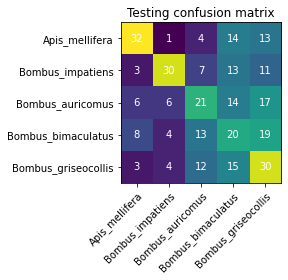

['Apis_mellifera', 'Bombus_impatiens', 'Bombus_auricomus', 'Bombus_bimaculatus', 'Bombus_griseocollis']
[50.     46.875  32.8125 31.25   46.875 ]


In [5]:
import torch
import torchvision
from torchvision import datasets, transforms
import torchvision.transforms.functional as TF
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
import torch.nn as nn
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import os, datetime

from torch.utils.tensorboard import SummaryWriter 
writer = SummaryWriter(log_dir = os.path.join('runs/',datetime.datetime.now().strftime("%Y%m%d-%H%M%S")))

classes = ['Apis_mellifera','Bombus_impatiens','Bombus_auricomus','Bombus_bimaculatus','Bombus_griseocollis']

ABS_PATH_TRAIN = '/m2docs/res/data/train'
ABS_PATH_VALID = '/m2docs/res/data/valid'
ABS_PATH_TEST = '/m2docs/res/data/test'

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

def load(dir_name, batch_size, shuffle = False):
    return(
        #create a data loader
        torch.utils.data.DataLoader(
            datasets.ImageFolder(root = dir_name, transform = transforms.ToTensor()),
            batch_size = batch_size,
            num_workers = 2,
            shuffle = shuffle
        )
    )

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.pool = nn.MaxPool2d(2, 2)
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 125 * 125, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 5)
        self.dropout = nn.Dropout(p = 0.2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 125 * 125)
        x = F.relu(self.fc1(x))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(self.fc3(x))
        return x

def validate(network,device,load_valid,criterion = nn.CrossEntropyLoss()):
    network.eval().to(device)
    correct = 0
    valid_loss = 0
    with torch.no_grad():
        for index, data in enumerate(load_valid, 0):
            inputs, labels = data[0].to(device), data[1].to(device)

            # forward + backward + optimize
            outputs = network(inputs)
            valid_loss += criterion(outputs, labels)

            # gather accuracy stats:
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).float().sum().item()
    accuracy = 100 * correct / len(load_valid.dataset)
    valid_loss = valid_loss / len(load_valid.dataset)
    return accuracy , valid_loss

def train(max_epochs = 50, min_epochs = 5, epoch_stretch = 5, train_path = ABS_PATH_TRAIN, valid_path = ABS_PATH_VALID, test_path = ABS_PATH_TEST, labels = classes, batch_size = 24):
    length = 512
    epochs = max_epochs
    class_names = labels
    num_classes = len(class_names)
    train_batch = batch_size
    test_batch = 128
    SAVE_PATH = '/m2docs/res/models'

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print(device)
    net = Net().to(device)
    print(net)

    criterion = nn.CrossEntropyLoss()
    #optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
    optimizer = optim.Adam(net.parameters(), lr=.001)

    torch.manual_seed(417)
    
    load_train = load(train_path, batch_size, shuffle=True)
    load_valid = load(valid_path, batch_size, shuffle=True)
    load_test = load(test_path, batch_size, shuffle=True)

    validation_accuracies = []
    best_epoch = 0
    epoch = 0
    while (epoch <= best_epoch + epoch_stretch or epoch < min_epochs) and epoch < max_epochs:
        net.train()
        run_loss = 0.0
        sum_loss = 0.0
        count = 0
        correct = 0.0
        categorical_correct = [0.0 for i in range(num_classes)]
        for index, data in enumerate(load_train, 0):
            inputs, labels = data[0].to(device), data[1].to(device)
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            # gather accuracy stats:
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).float().sum().item()
            for i in range(num_classes):
                categorical_correct[i] += ((predicted==i) == (labels==i)).float().sum().item()
                #print(classes[i],categorical_correct[i]/((index+1)*batch_size))
            
            # print statistics
            run_loss += loss.item()
            sum_loss += loss.item()
            count += 1 
            if index % 200 == 0:    # print every 200 mini-batches
                print('  Epoch: {} [{}/{}/{} ({:.0f}%)]\tLoss: {:.6f}\tAcc: {:.6f}%'.format(
                    epoch, int(correct), (index + 1) * batch_size, len(load_train.dataset),
                    100. * index / len(load_train), loss.item(), 100. * correct / ((index+1) * batch_size)))
                run_loss = 0.0
        accuracy = 100. * correct / len(load_train.dataset)
        print('Epoch: {}\tLoss: {:.6f}\tAcc: {:.6f}'.format(
                epoch, sum_loss/count, accuracy))
        writer.add_scalar("Loss/train", sum_loss/count, epoch)
        writer.add_scalar("Acc/train", accuracy, epoch)
        
        modules_list = iter(net.named_modules())
        next(modules_list)
        for module in modules_list:
            try:
                writer.add_histogram("Model/"+module[0]+".weights", module[1].weight, epoch)
                writer.add_histogram("Model/"+module[0]+".bias", module[1].bias, epoch)
            except:
                pass
        # Categorical accuracy:
        for i in range(num_classes):
            writer.add_scalar("Acc/" + classes[i],categorical_correct[i]/len(load_train.dataset), epoch)
        torch.save(net.state_dict(), SAVE_PATH+"_progress")
        
        # get validation accuracy: 
        valid_acc, valid_loss = validate(net, device, load_valid, criterion)
        writer.add_scalar("Loss/valid", valid_loss, epoch)
        writer.add_scalar("Acc/valid", valid_acc, epoch)
        print('Validation: acc: {:.6f}%\tloss: {:.6f}'.format(
                valid_acc, valid_loss))
        validation_accuracies.append(valid_acc)
        best_epoch = validation_accuracies.index(max(validation_accuracies))
        print('Best: {} @ {:.6f}% -> epoch target {}'.format(best_epoch,validation_accuracies[best_epoch],max([best_epoch+epoch_stretch,min_epochs])))
        epoch += 1
        
    print('Done training.')
    torch.save(net.state_dict(), SAVE_PATH)

    prediction_list = torch.zeros(0,dtype=torch.long).to(device)
    label_list = torch.zeros(0,dtype=torch.long).to(device)
              
    with torch.no_grad():
        for data in load_test:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
              
            prediction_list = torch.cat([prediction_list, predicted.view(-1)])  
            label_list = torch.cat([label_list, labels.view(-1)])
    
    matrix = confusion_matrix(label_list.cpu().numpy(), prediction_list.cpu().numpy())
    print(matrix)
    fig, ax = plt.subplots()
    im = ax.imshow(matrix)
    # We want to show all ticks...
    ax.set_xticks(np.arange(len(classes)))
    ax.set_yticks(np.arange(len(classes)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(classes)):
        for j in range(len(classes)):
            text = ax.text(j, i, matrix[i, j],
                           ha="center", va="center", color="w")

    ax.set_title("Testing confusion matrix")

    plt.show()
    writer.add_figure('Testing/conf',fig)
    
    class_accuracy=100*matrix.diagonal() / matrix.sum(1)
    print(classes)
    print(class_accuracy)

train(max_epochs = 100, min_epochs = 30, epoch_stretch = 10, train_path = ABS_PATH_TRAIN, valid_path = ABS_PATH_VALID, test_path = ABS_PATH_TEST, labels = classes, batch_size = 32)